Función para leer los datos a partir de un .txt

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


def cargar_laberinto(archivo):
    with open(archivo, 'r') as f:
        data = f.readlines()
    
    N, M = map(int, data[0].split())

    habitaciones = eval(data[1].strip())
    
    puentes = eval(data[2].strip())
    
    entrada = eval(data[3].strip())
    salida = eval(data[4].strip())
    
    return N, M, habitaciones, puentes, entrada, salida

In [2]:
# Función para construir el grafo del laberinto
def construir_grafo(N, M, puentes):
    G = nx.Graph()
    
    # Añadir nodos (habitaciones) al grafo
    for torre in range(2):  # Hay dos torres
        for piso in range(N):
            for hab in range(M):
                G.add_node((torre, piso, hab))
    
    # Conectar habitaciones adyacentes en la misma torre
    for torre in range(2):
        for piso in range(N):
            for hab in range(M):
                if hab + 1 < M:
                    G.add_edge((torre, piso, hab), (torre, piso, hab + 1))
                if piso + 1 < N:
                    G.add_edge((torre, piso, hab), (torre, piso + 1, hab))
                if piso - 1 >= 0:
                    G.add_edge((torre, piso, hab), (torre, piso - 1, hab))
    
    # Añadir los puentes al grafo
    for (i1, j1, k1, i2, j2, k2) in puentes:
        G.add_edge((i1, j1, k1), (i2, j2, k2))
    
    return G

Aplicamos un DFS y un backtracking para encontrar todas las rutas posibles. Nos apoyamos de la variable camino para construir una posible ruta. Es backtracking porque si encontramos un bloqueo, el algoritmo "retrocede" al paso anterior. Esto nos permite ser eficientes al no tener que buscar una solución por fuerza bruta. Además, se utilizó DFS porque está más optimizado para encontrar todas las rutas posibles, a diferencia del BFS que su principal utilidad estaría en encontrar el camino más corto entre dos nodos no ponderados.

In [6]:

# Función de backtracking para encontrar todas las rutas
def encontrar_todas_las_rutas(grafo, entrada, salida, visitado=None, camino=None, rutas=None):
    if visitado is None:
        visitado = set()
    if camino is None:
        camino = []
    if rutas is None:
        rutas = []
    
    # Añadir el nodo actual al camino
    camino.append(entrada)
    visitado.add(entrada)
    
    # Si llegamos a la salida, guardamos el camino
    if entrada == salida:
        rutas.append(list(camino))  # Clonamos el camino actual
    
    else:
        # Recorrer los vecinos
        for vecino in grafo[entrada]:
            if vecino not in visitado:
                encontrar_todas_las_rutas(grafo, vecino, salida, visitado, camino, rutas)
    
    # Al finalizar la exploración de este nodo, lo eliminamos del camino y del visitado
    camino.pop()
    visitado.remove(entrada)
    
    return rutas

Funciones para dibujar

In [5]:
# Función para visualizar el grafo original
def dibujar_grafo_original(grafo):
    pos = {nodo: (nodo[1], nodo[2] + nodo[0] * 10) for nodo in grafo.nodes()}  # Posiciones ajustadas para las torres
    labels = {nodo: str(nodo) for nodo in grafo.nodes()}
    
    plt.figure(figsize=(10, 10))
    nx.draw(grafo, pos, with_labels=True, labels=labels, node_color='lightblue', node_size=500, font_size=8)
    plt.title("Grafo Original del Laberinto")
    plt.show()

# Función para visualizar el grafo y una ruta específica
def dibujar_ruta_individual(grafo, ruta, ruta_id):
    pos = {nodo: (nodo[1], nodo[2] + nodo[0] * 10) for nodo in grafo.nodes()}  # Posiciones ajustadas para las torres
    labels = {nodo: str(nodo) for nodo in grafo.nodes()}
    
    plt.figure(figsize=(10, 10))
    nx.draw(grafo, pos, with_labels=True, labels=labels, node_color='lightblue', node_size=500, font_size=8)
    
    # Dibujar la ruta en rojo
    edges = [(ruta[i], ruta[i+1]) for i in range(len(ruta)-1)]
    nx.draw_networkx_edges(grafo, pos, edgelist=edges, edge_color='r', width=2)
    
    plt.title(f'Ruta {ruta_id}')
    plt.show()

Output: dibujo del grafo original y resultante de cada posible camino

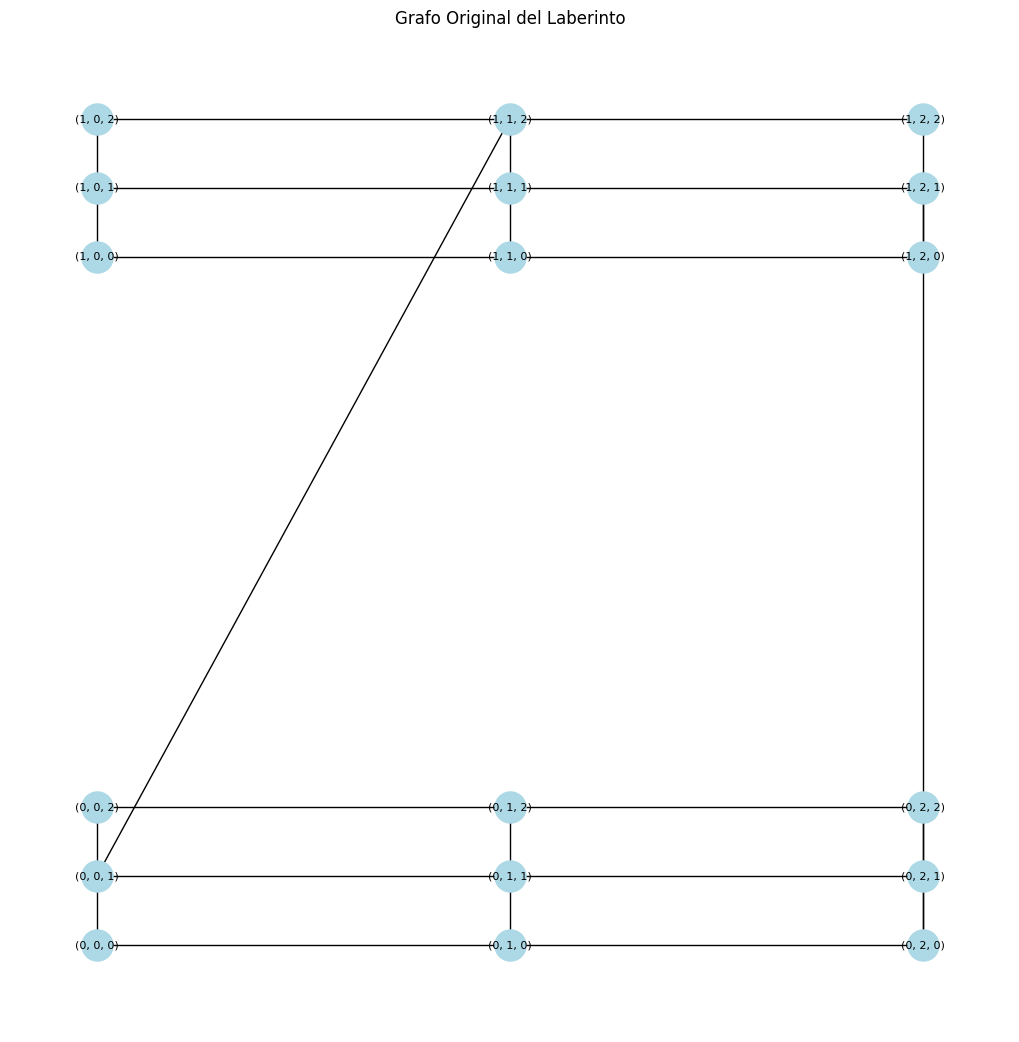

Se encontraron 152 rutas:
Ruta 1: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


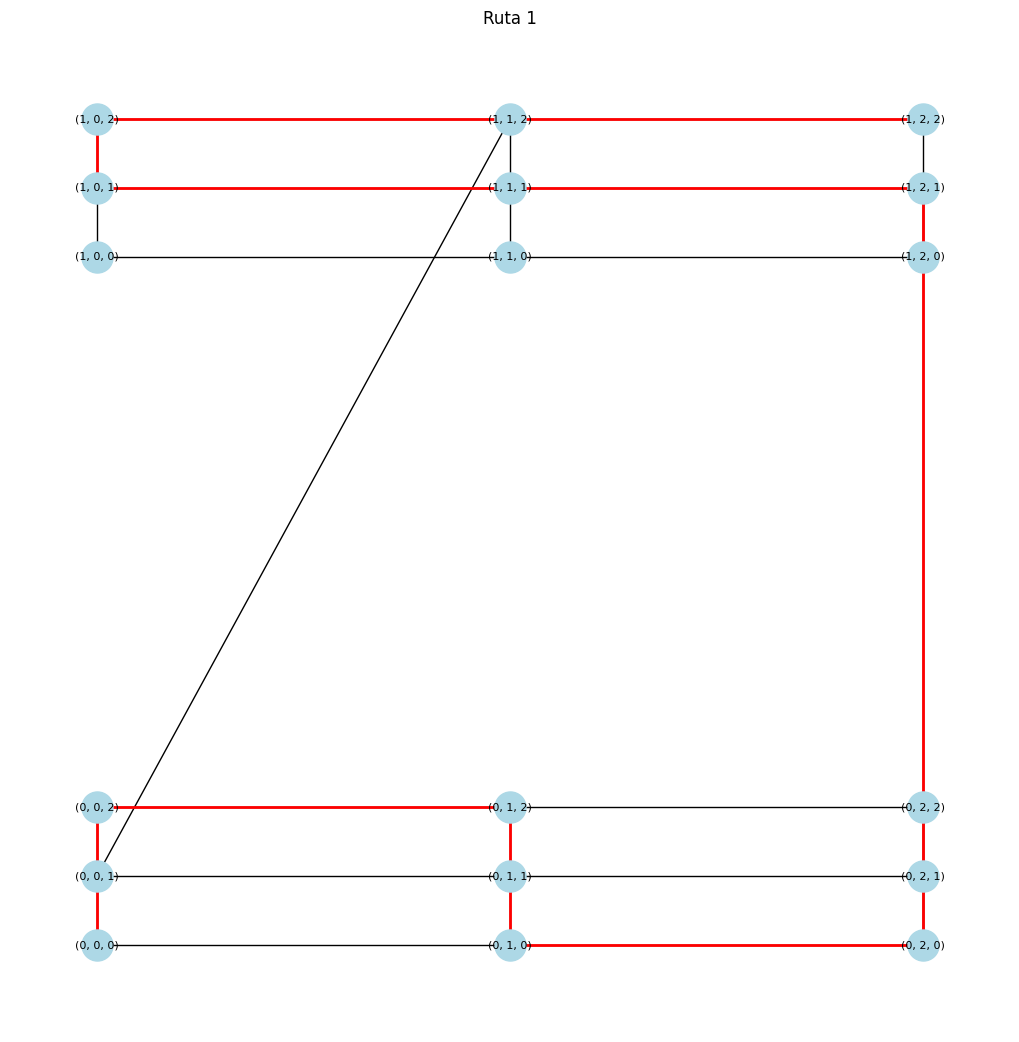

Ruta 2: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


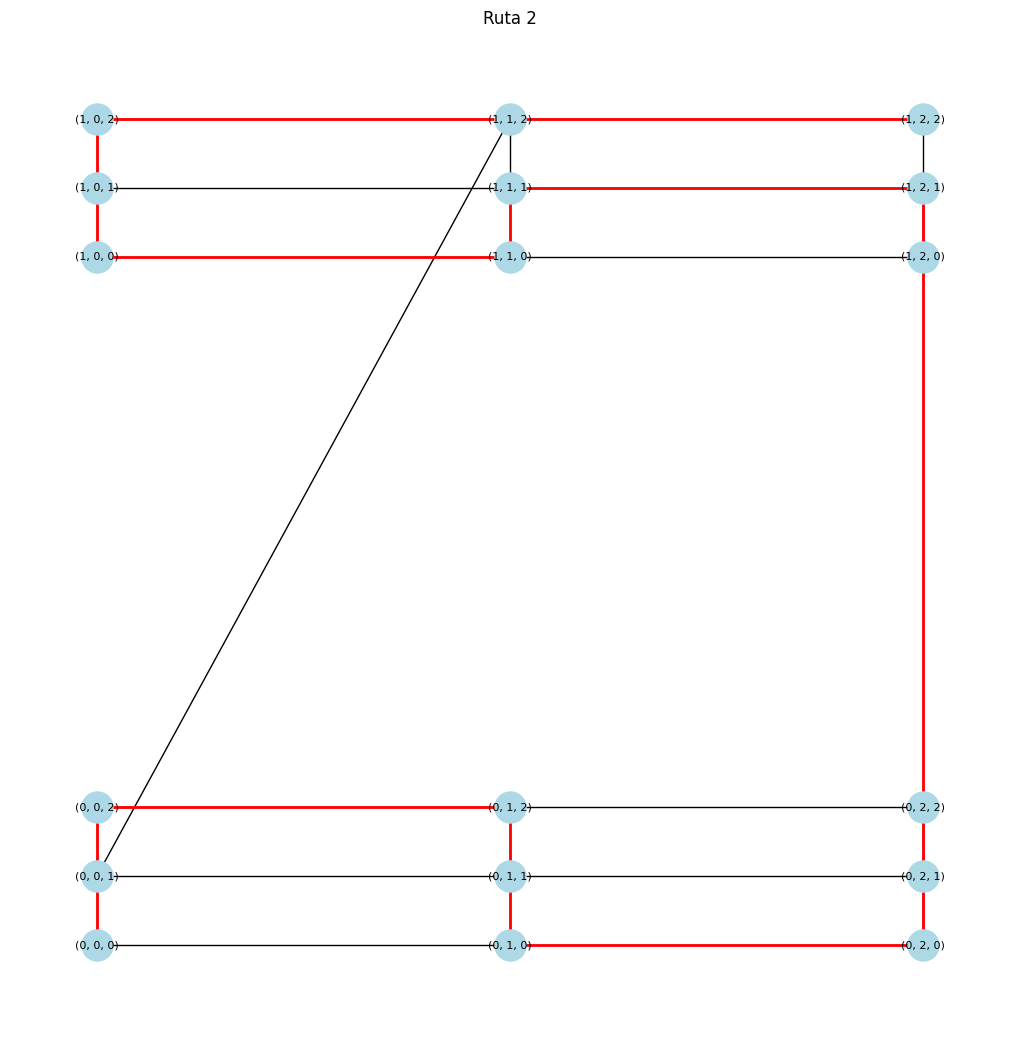

Ruta 3: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


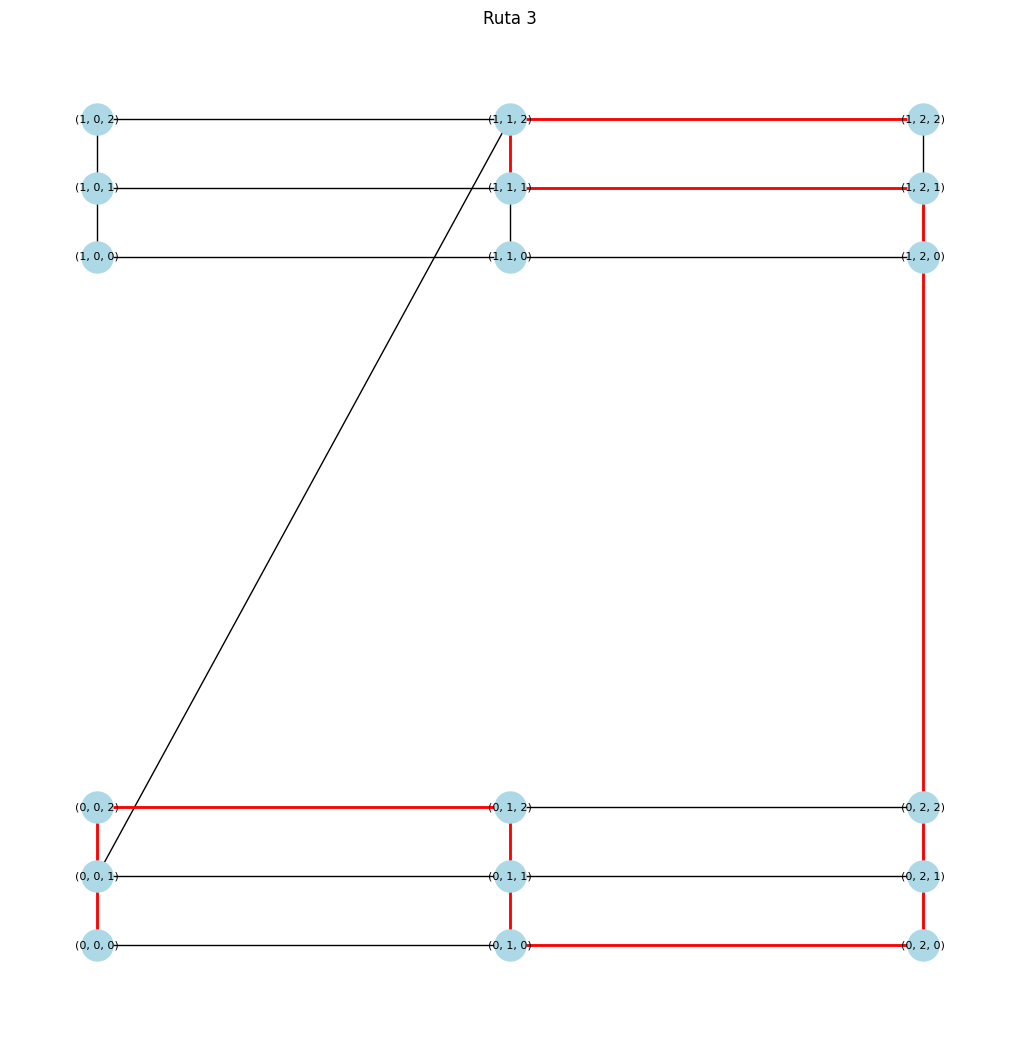

Ruta 4: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


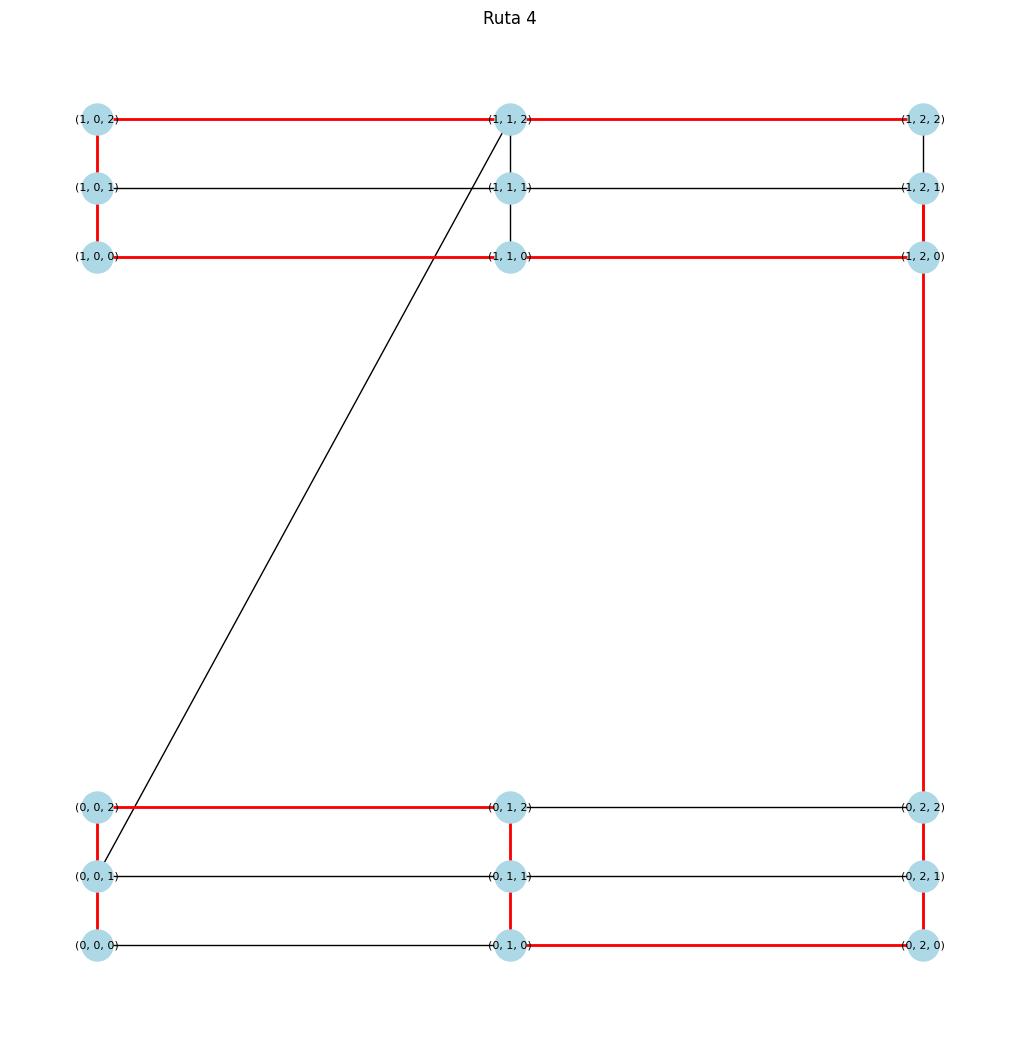

Ruta 5: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


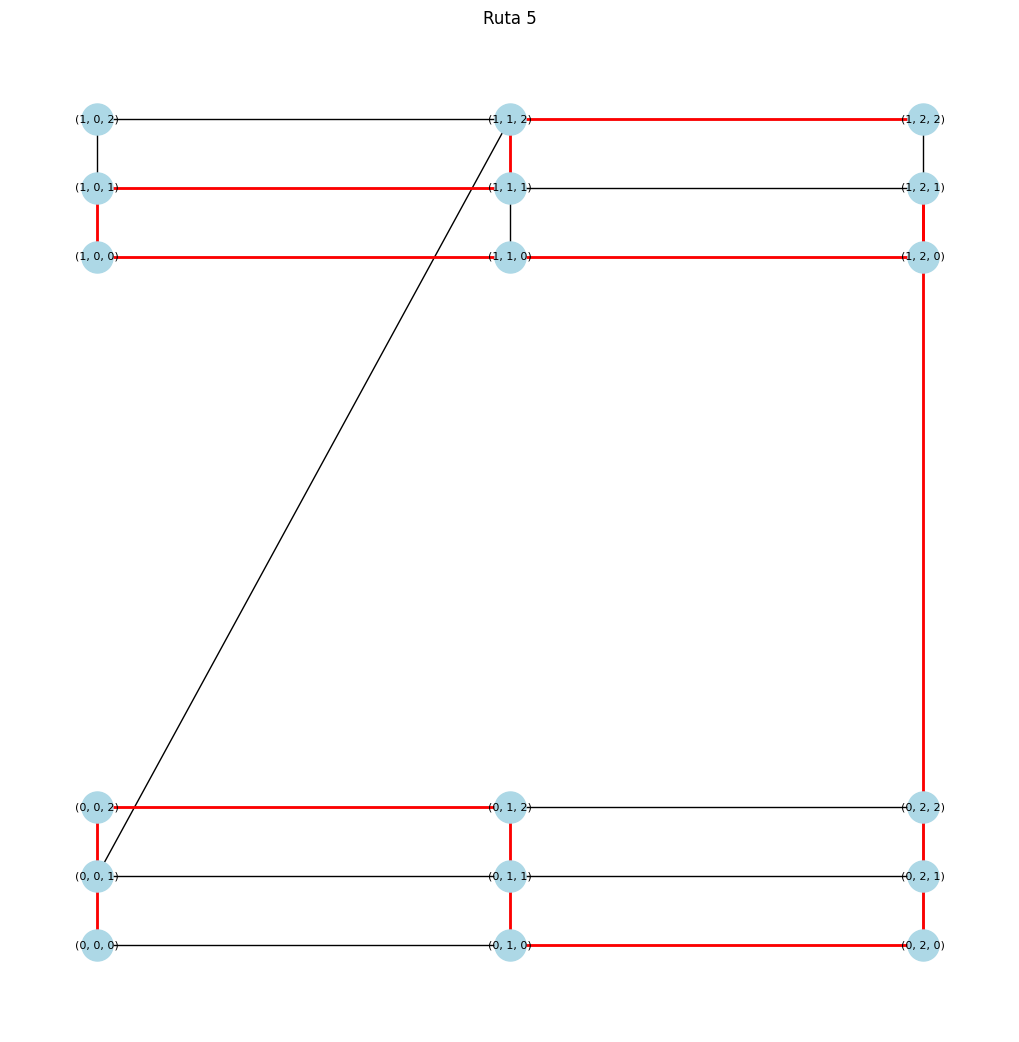

Ruta 6: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


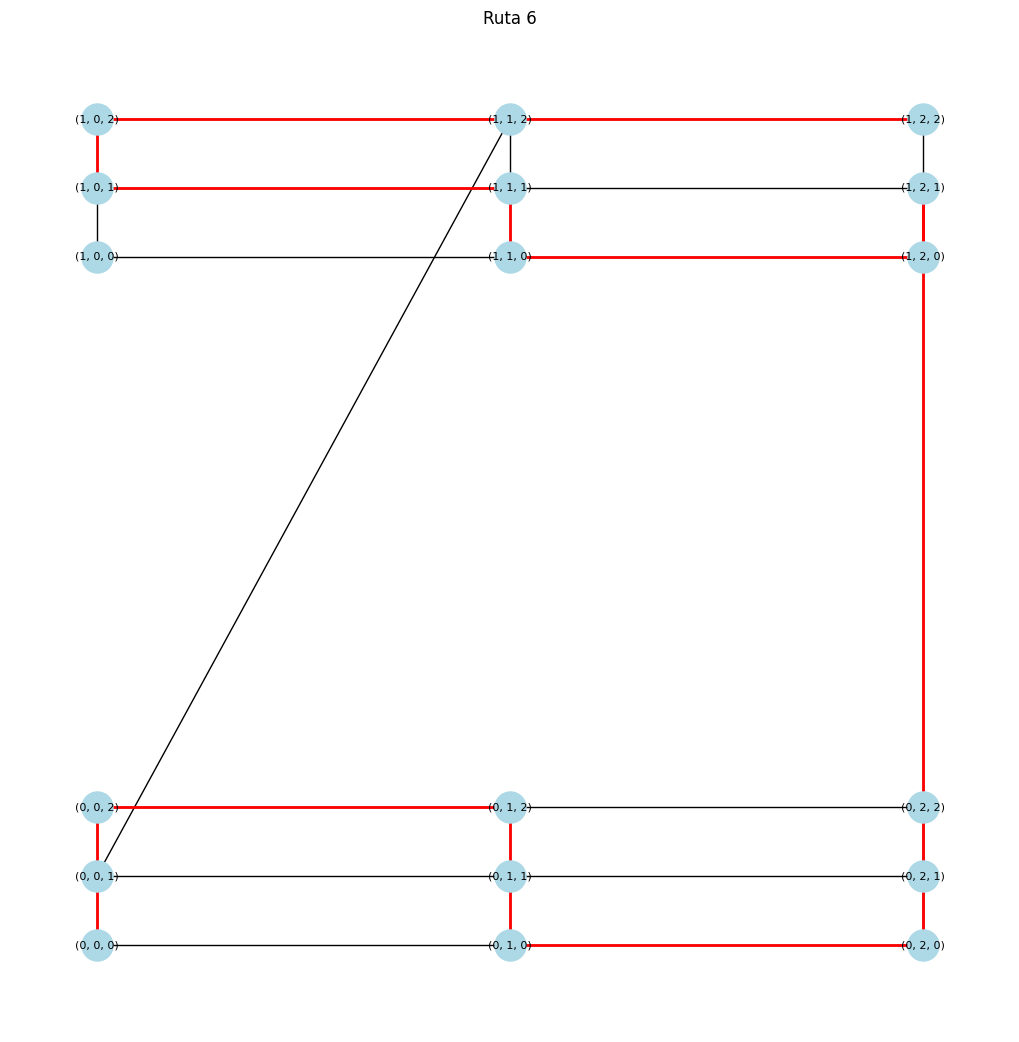

Ruta 7: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


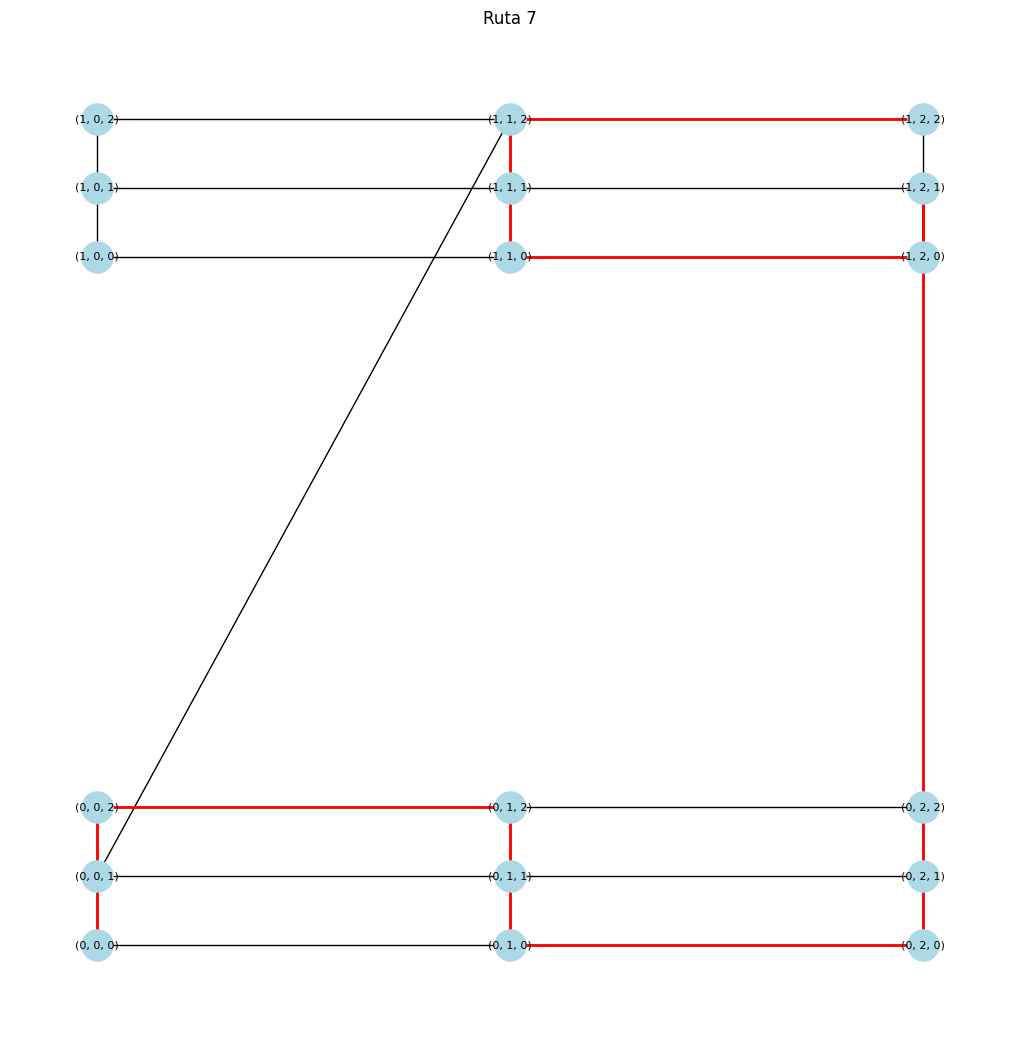

Ruta 8: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 2)]


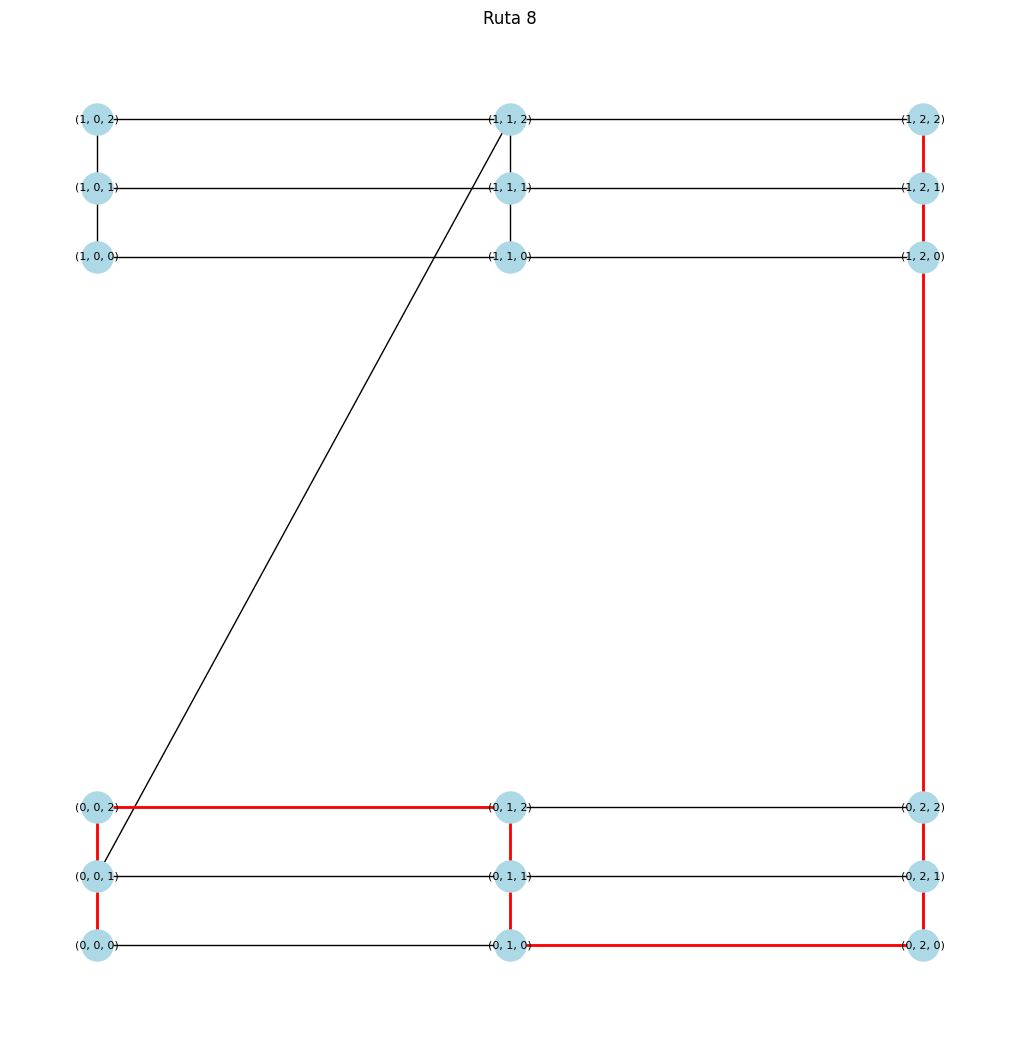

Ruta 9: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


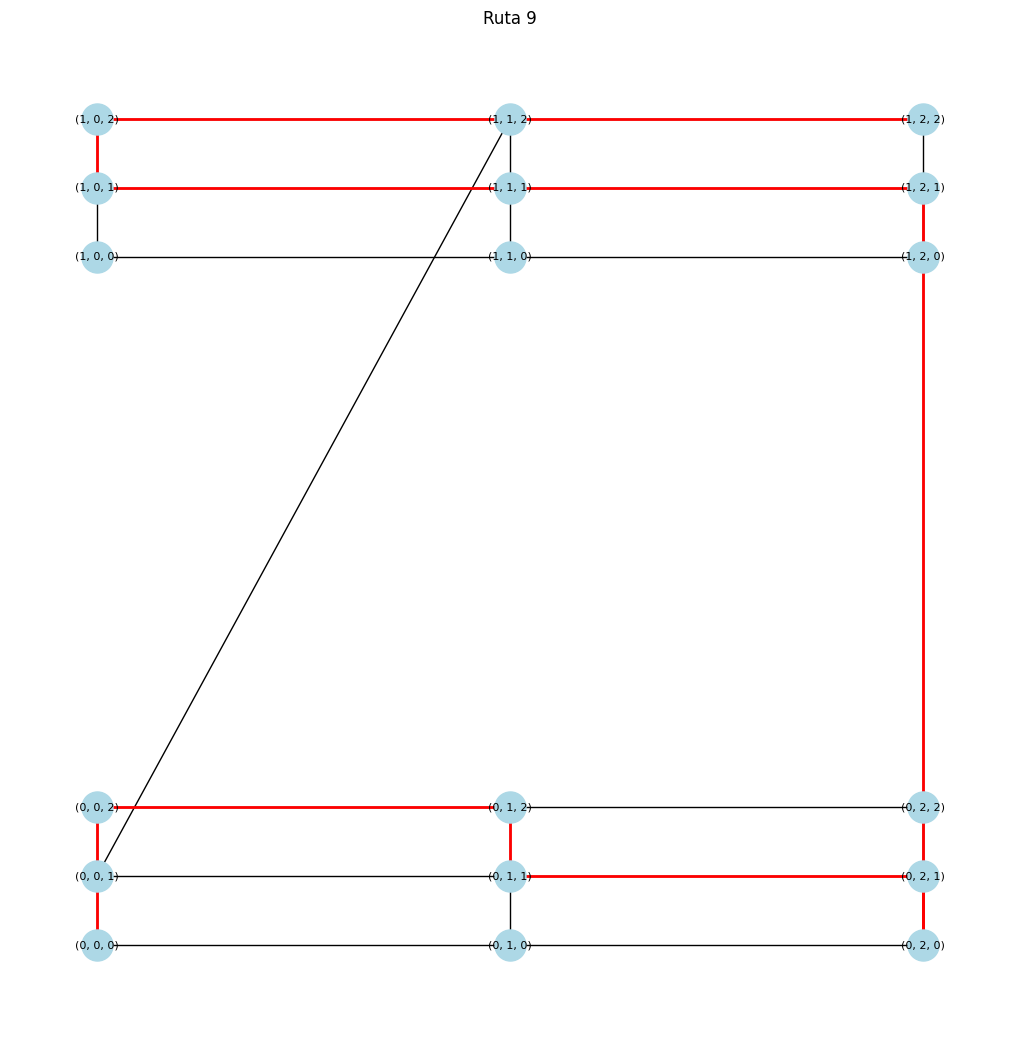

Ruta 10: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


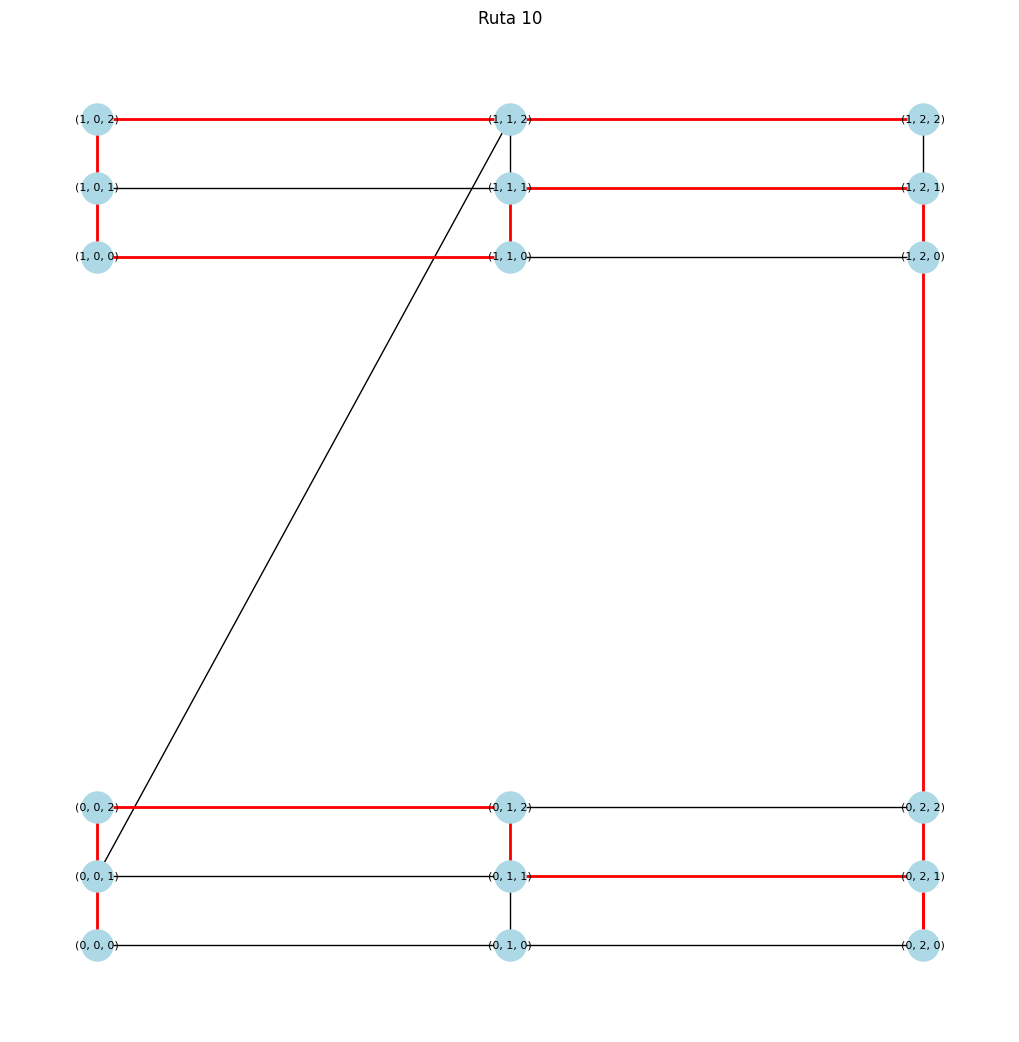

Ruta 11: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


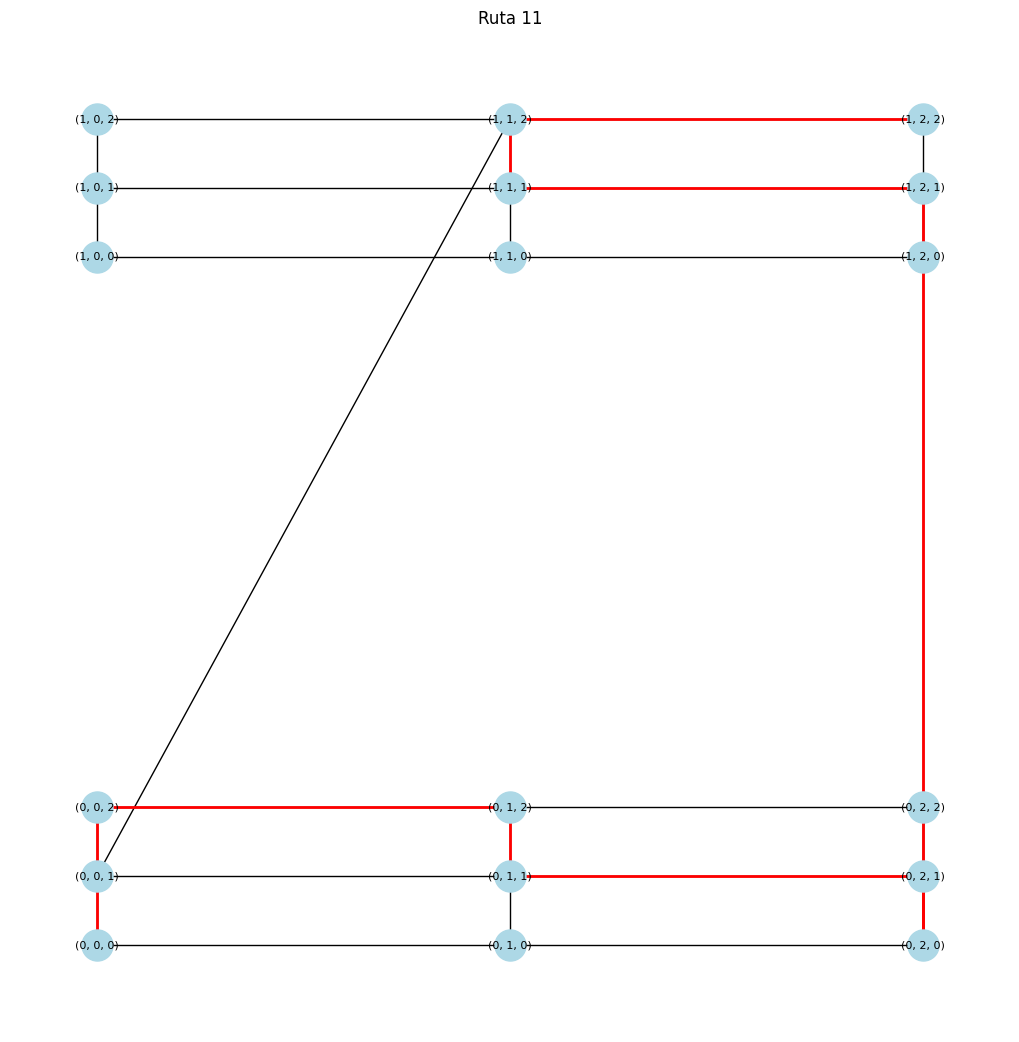

Ruta 12: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


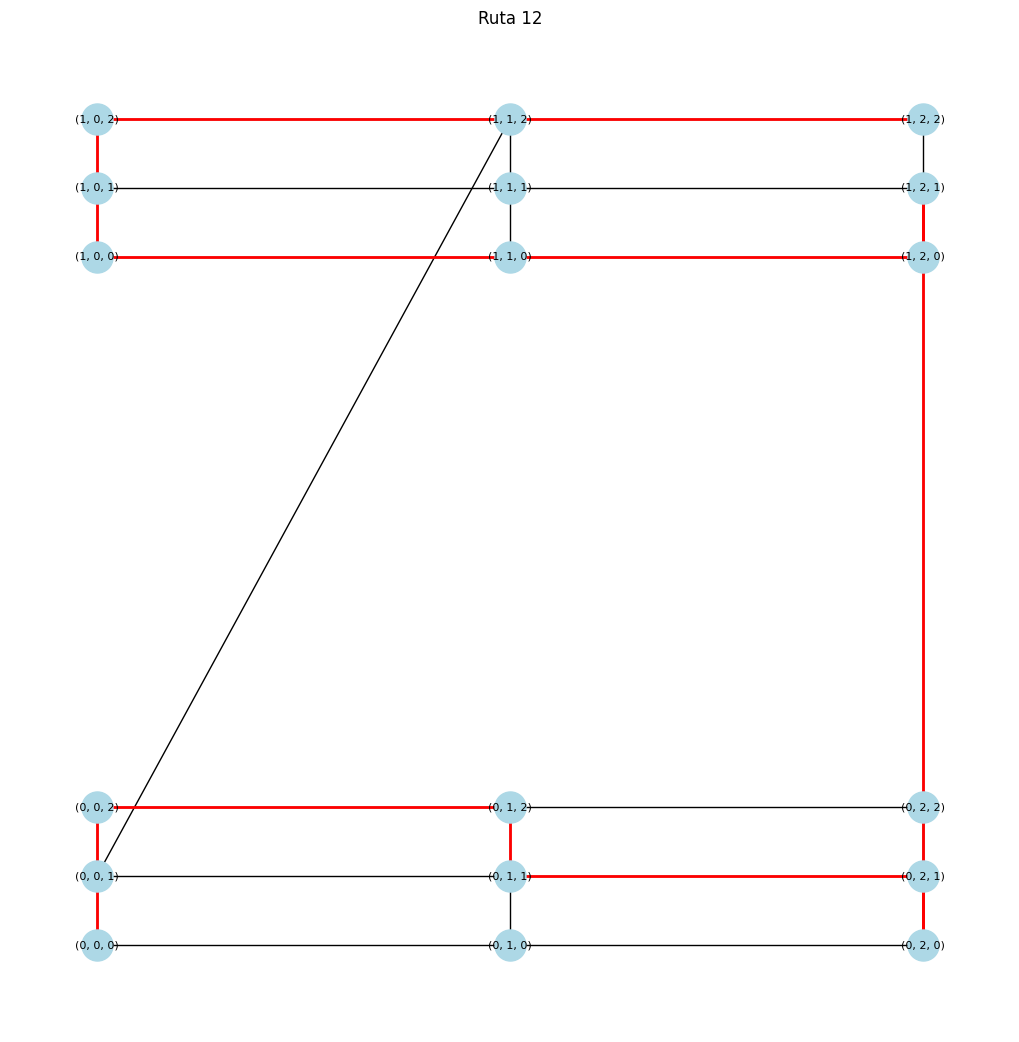

Ruta 13: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


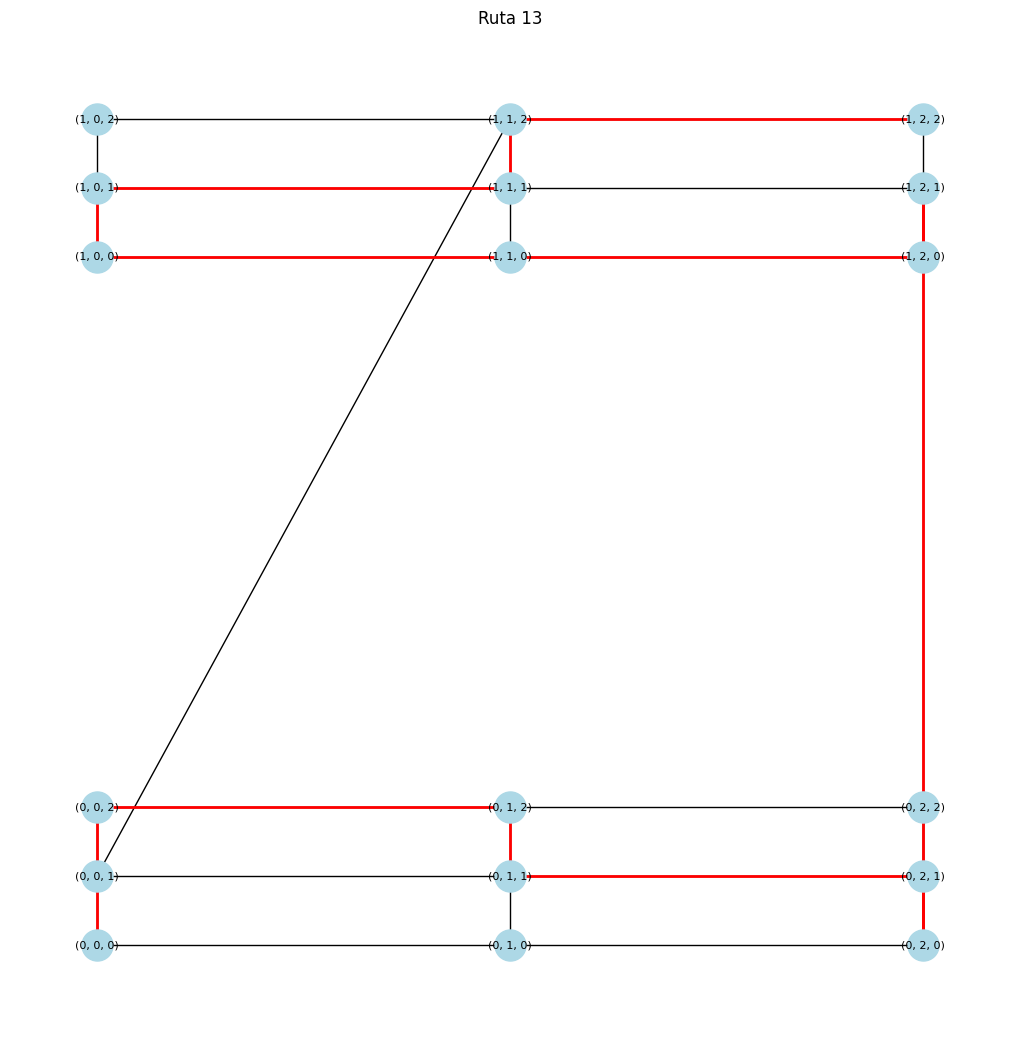

Ruta 14: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


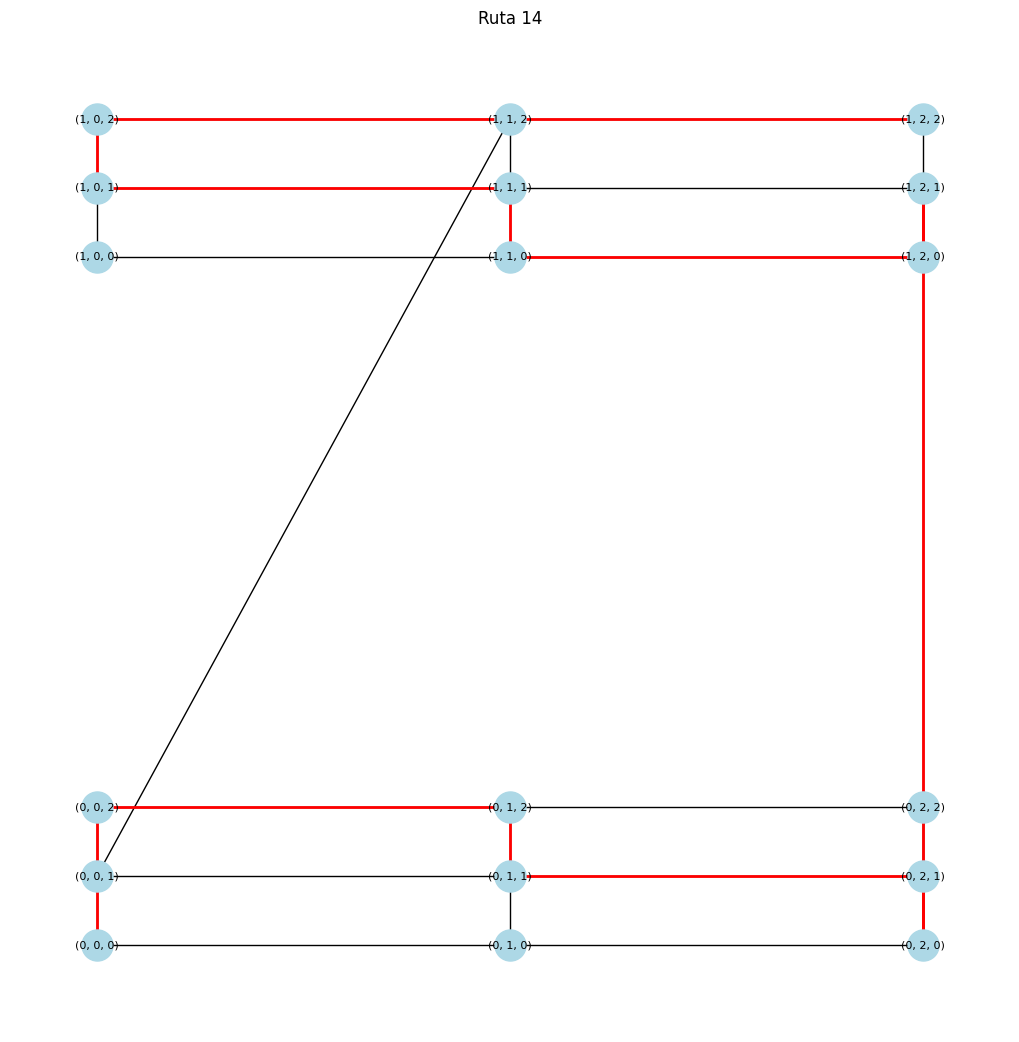

Ruta 15: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


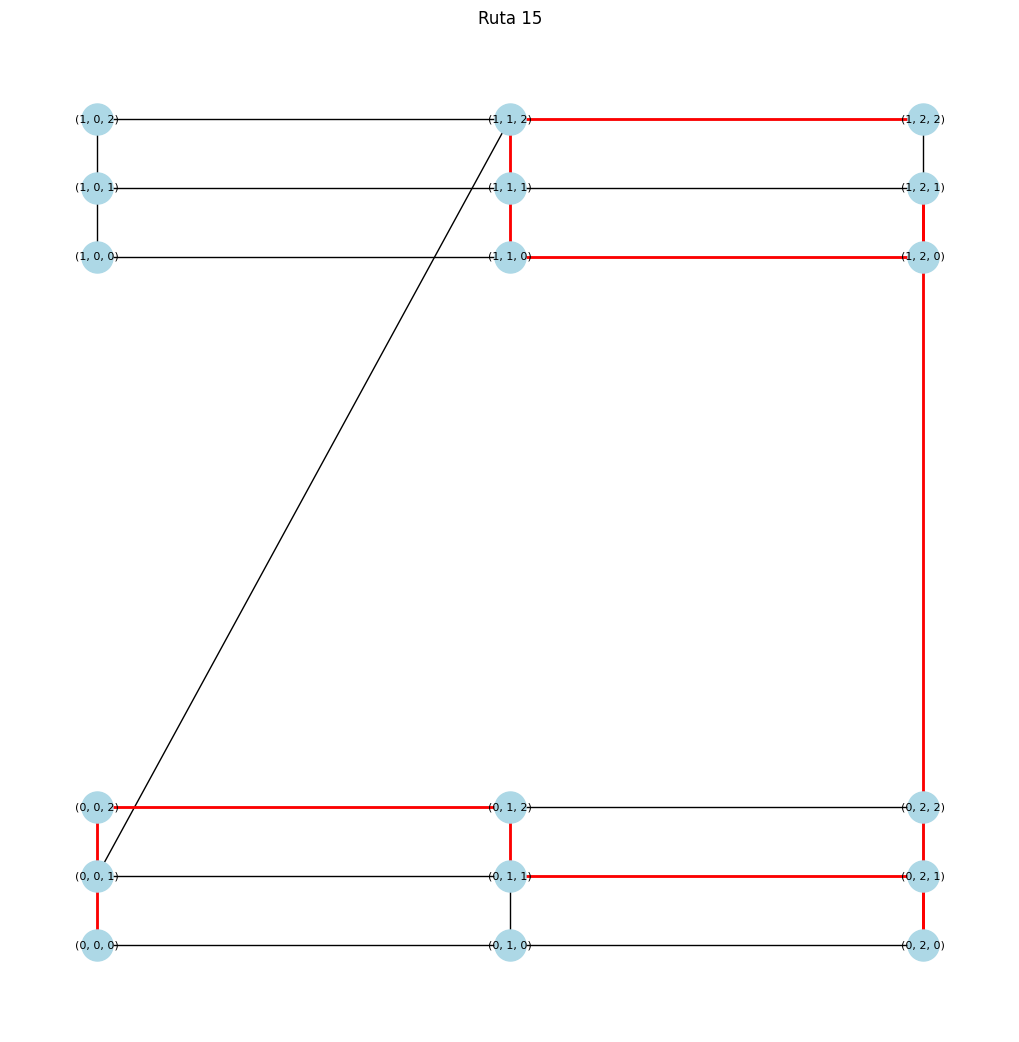

Ruta 16: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 2)]


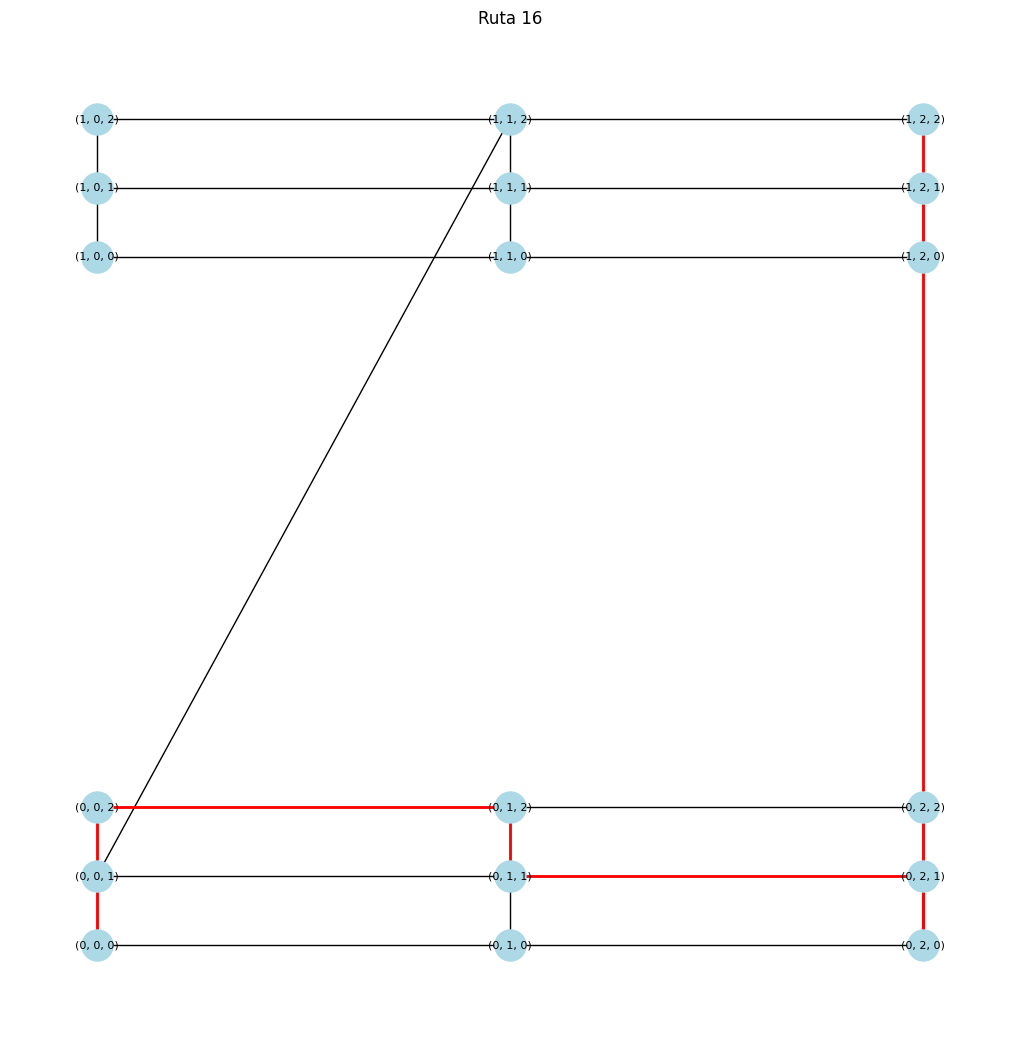

Ruta 17: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


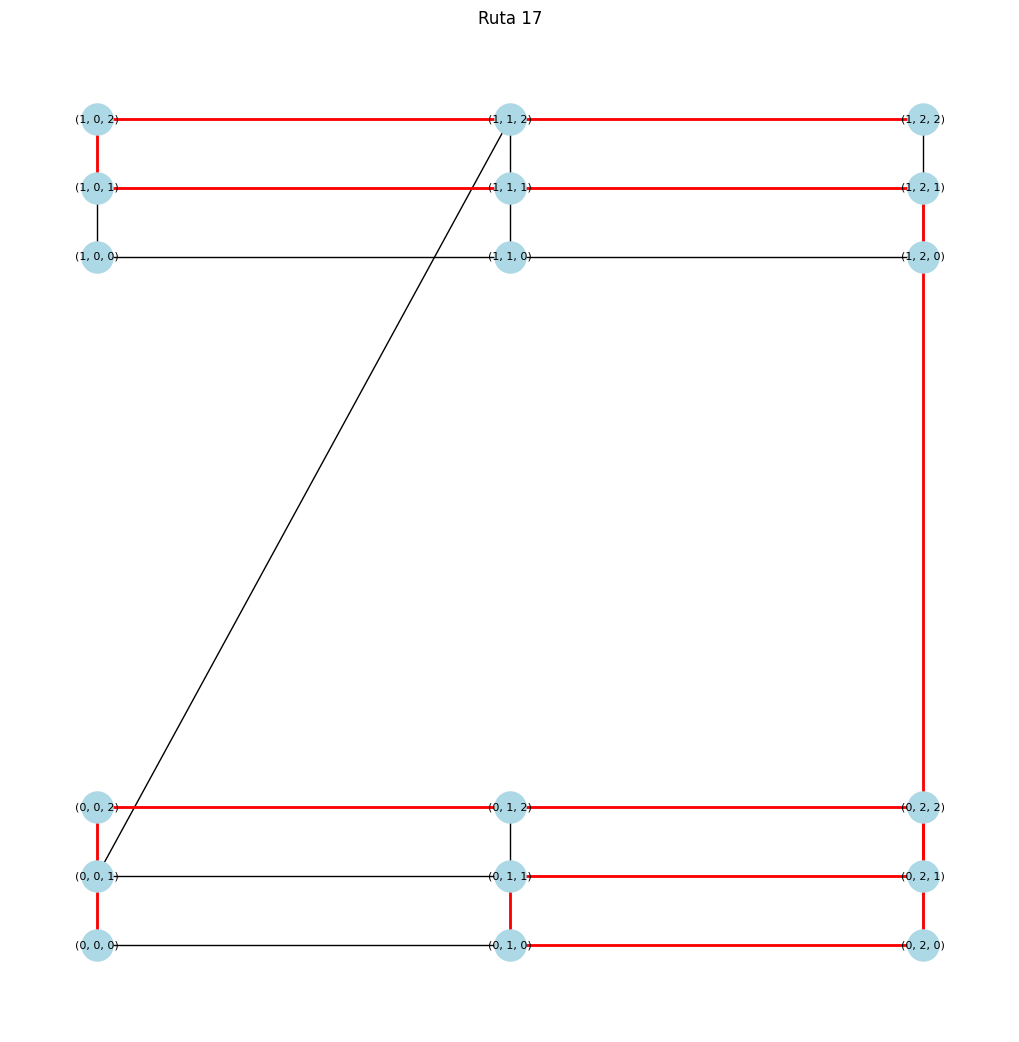

Ruta 18: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


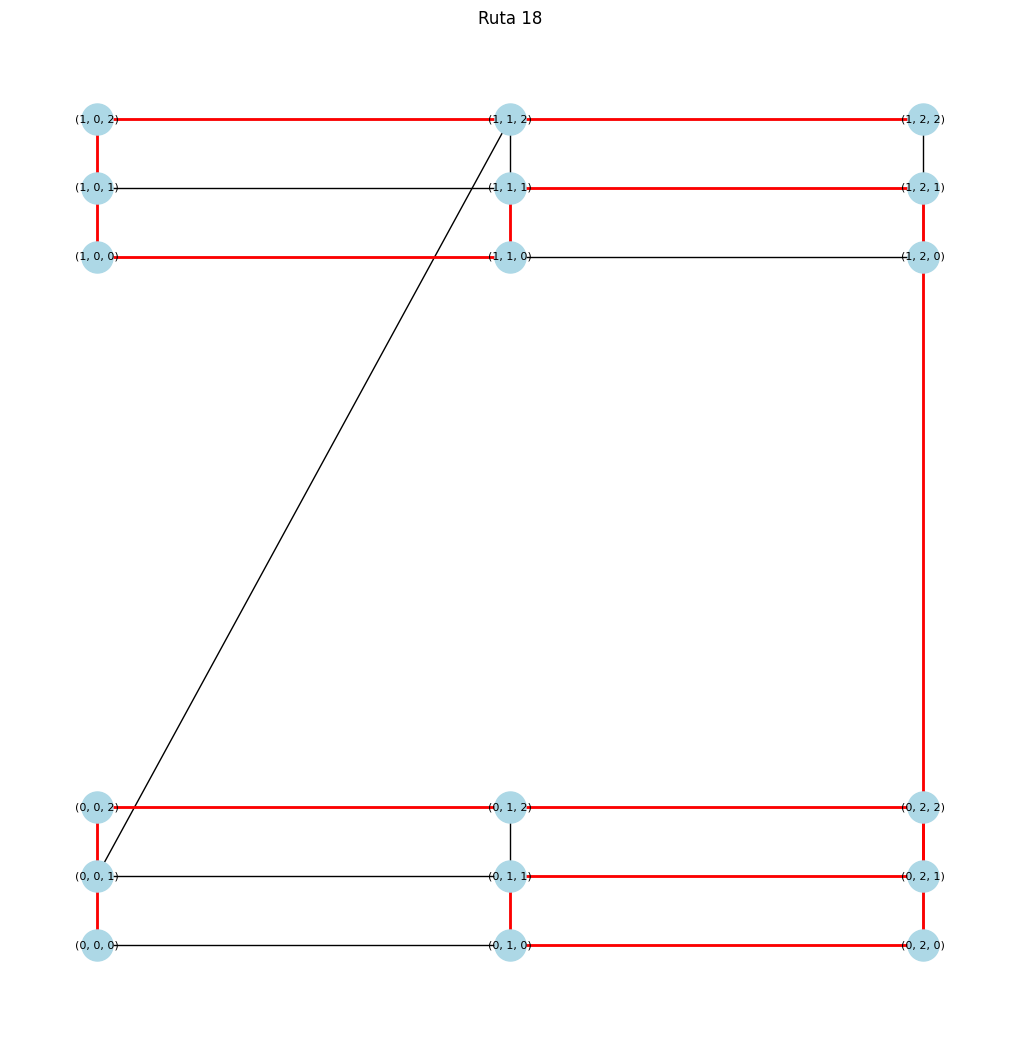

Ruta 19: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


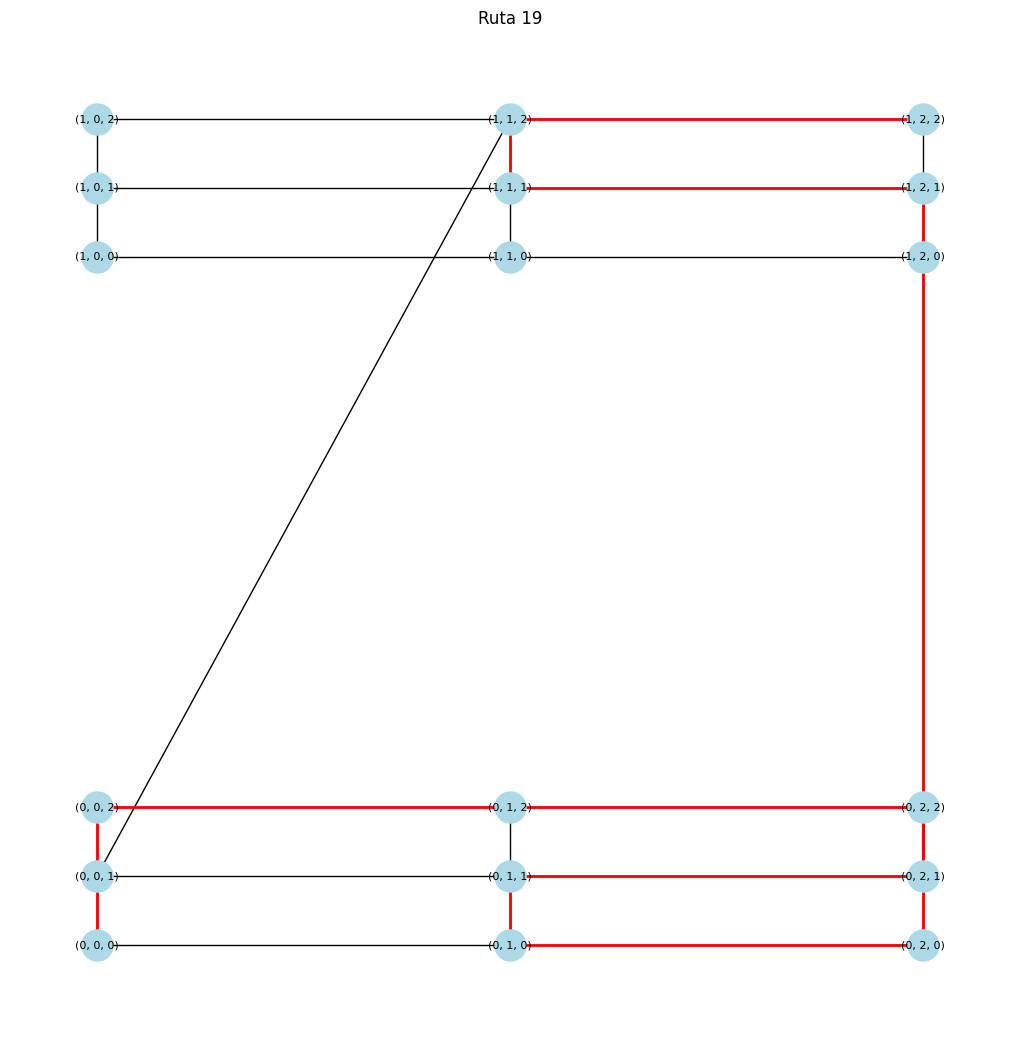

Ruta 20: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


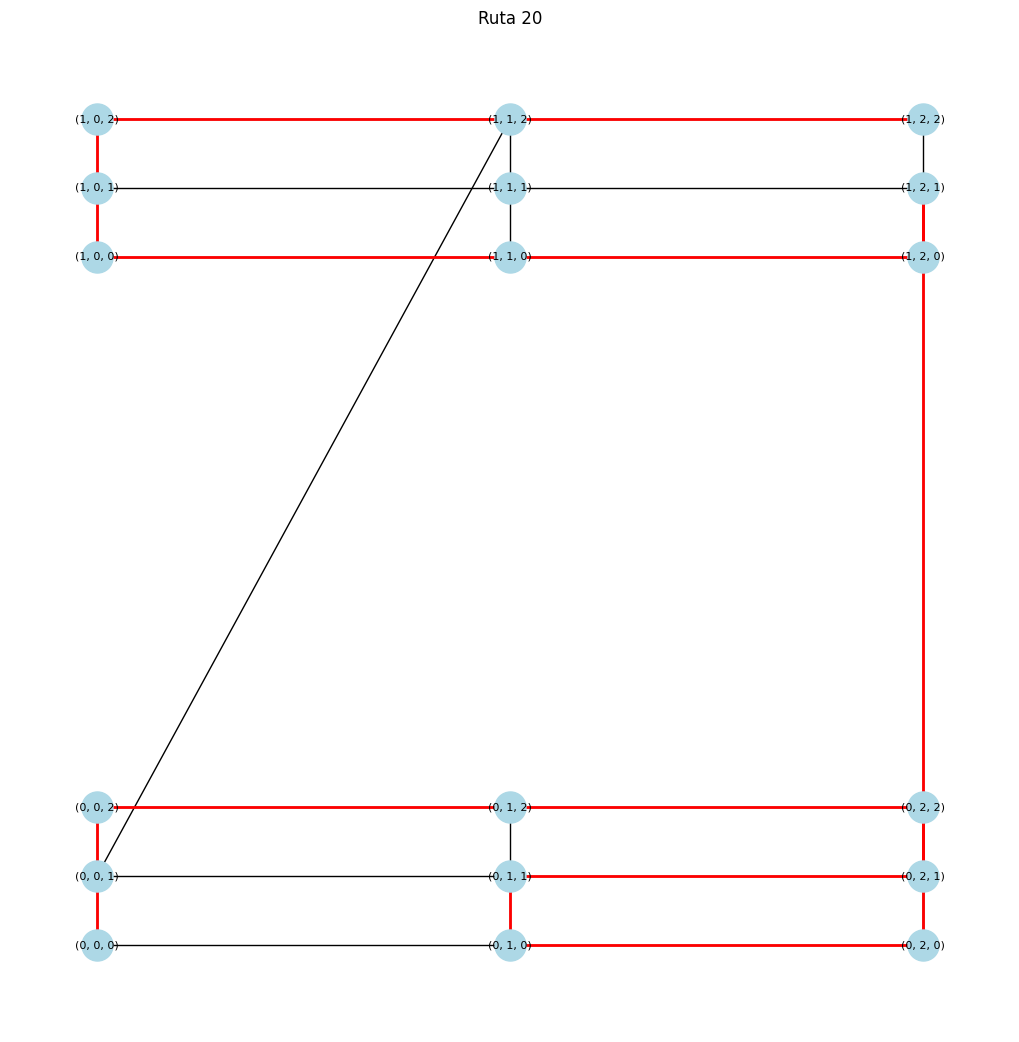

Ruta 21: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


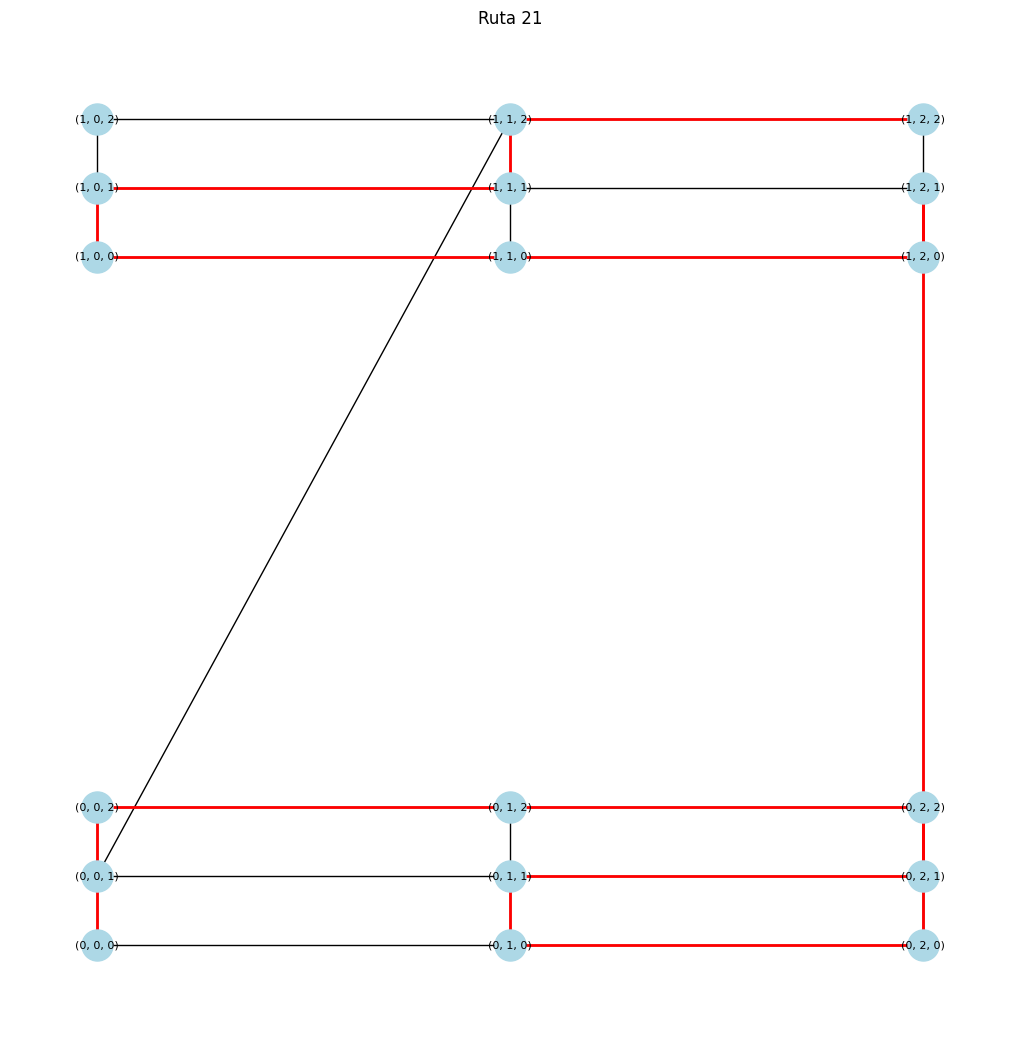

Ruta 22: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


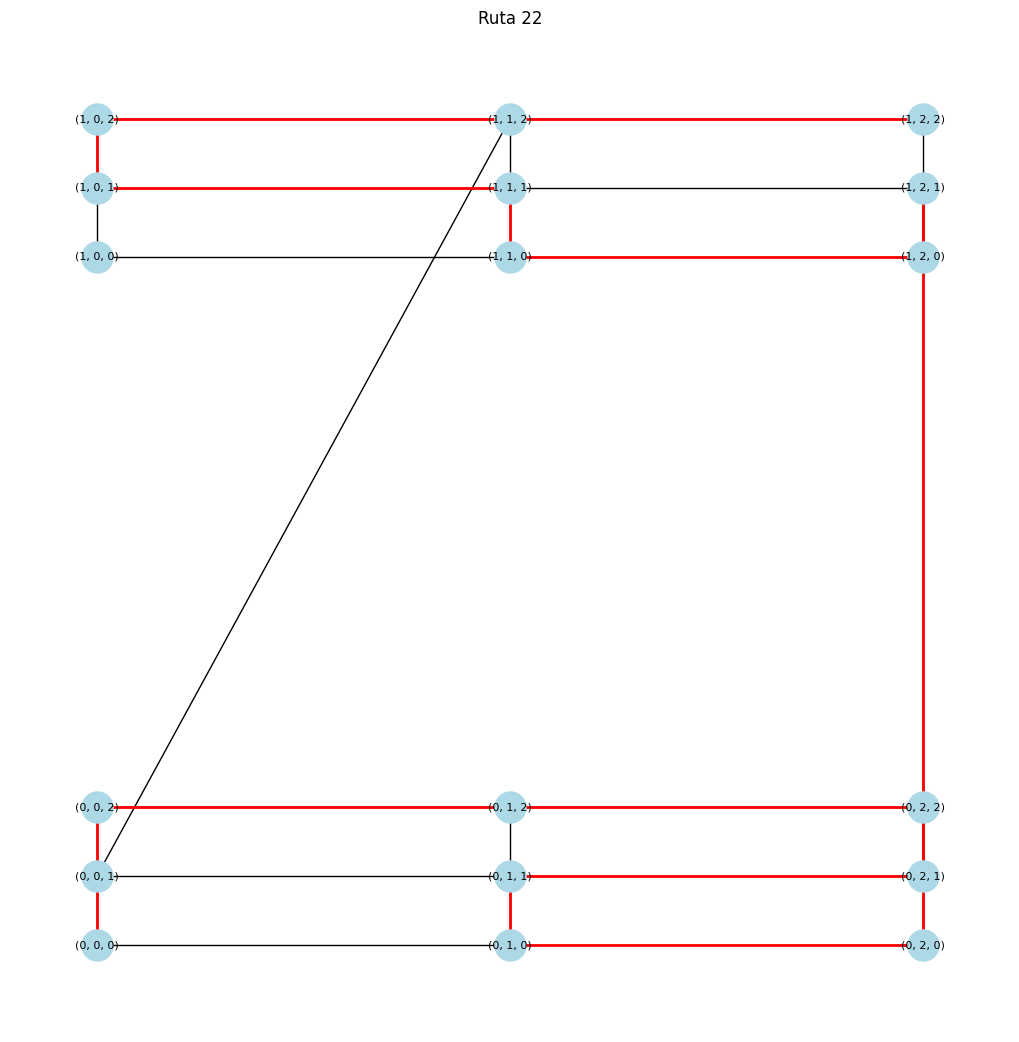

Ruta 23: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


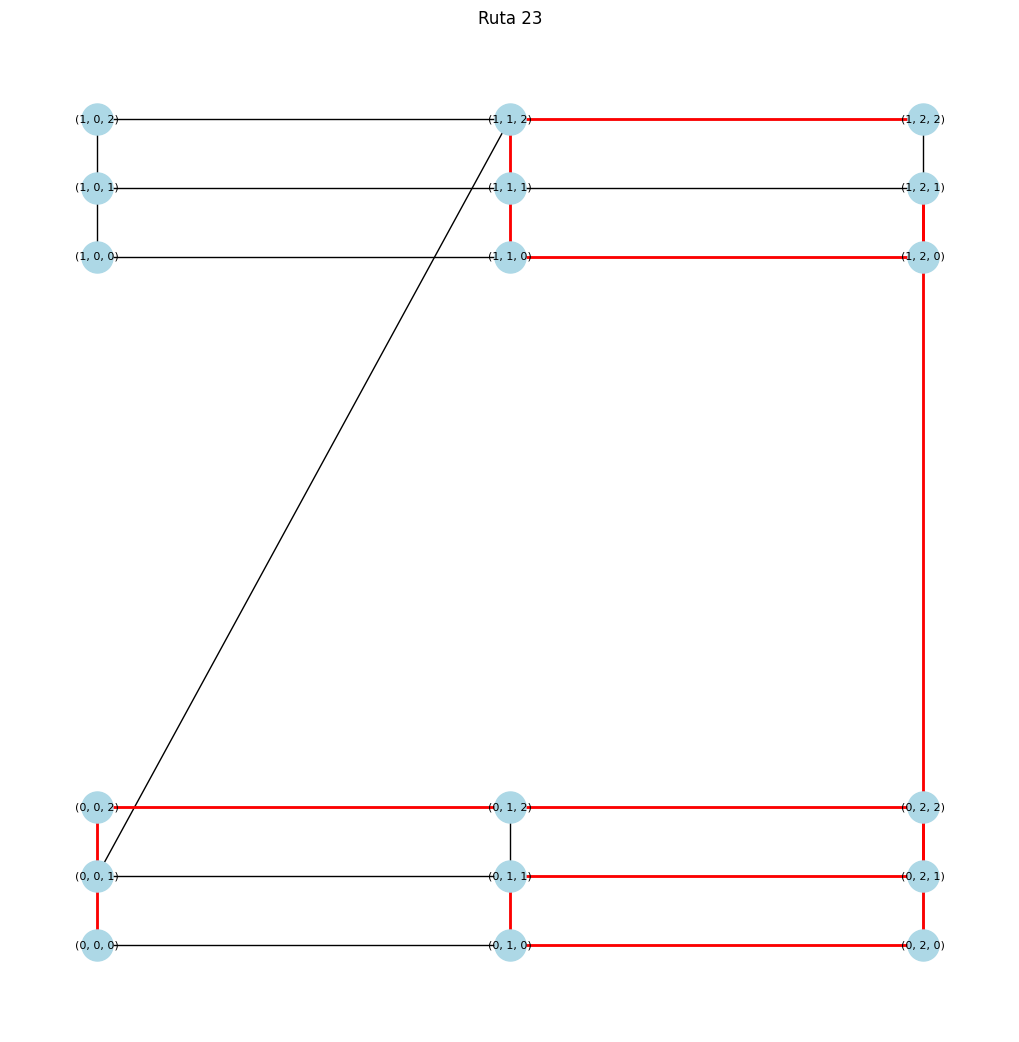

Ruta 24: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 2)]


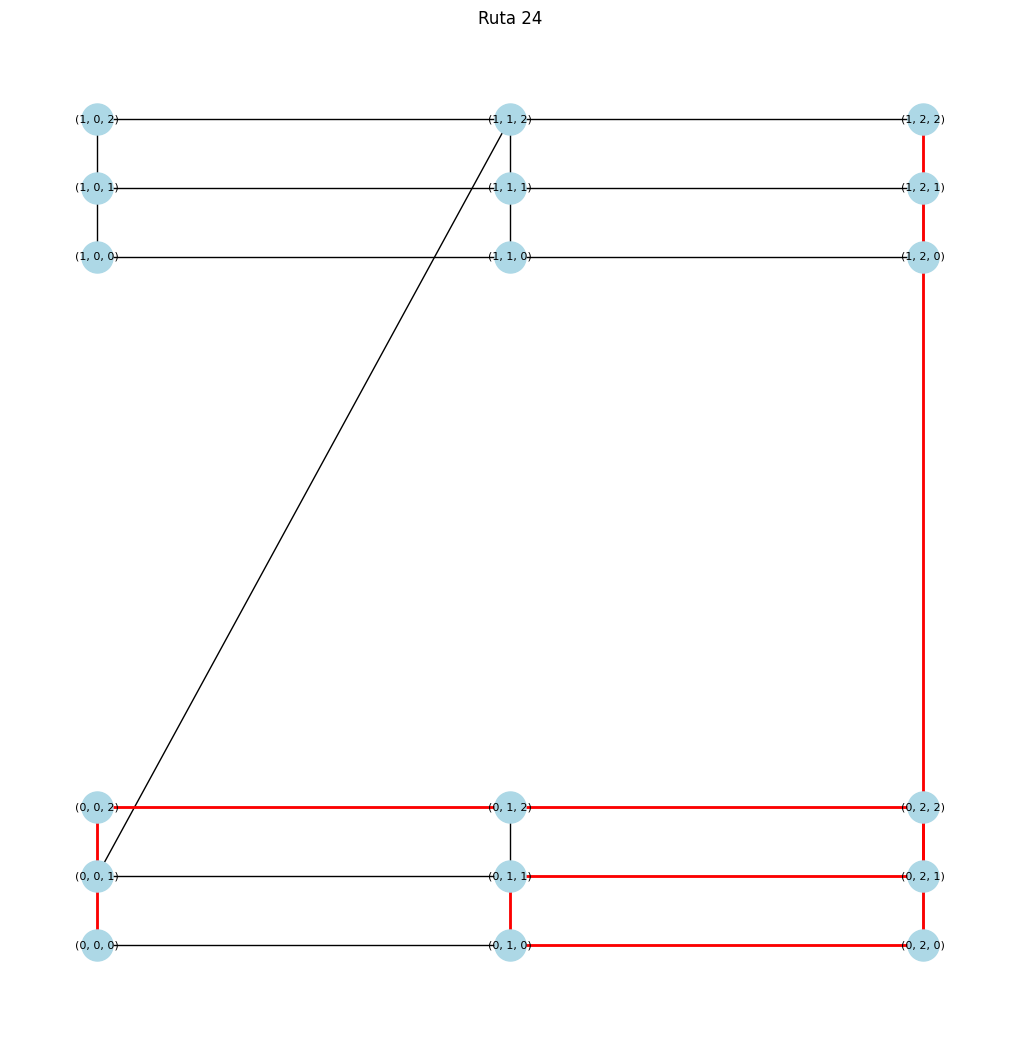

Ruta 25: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


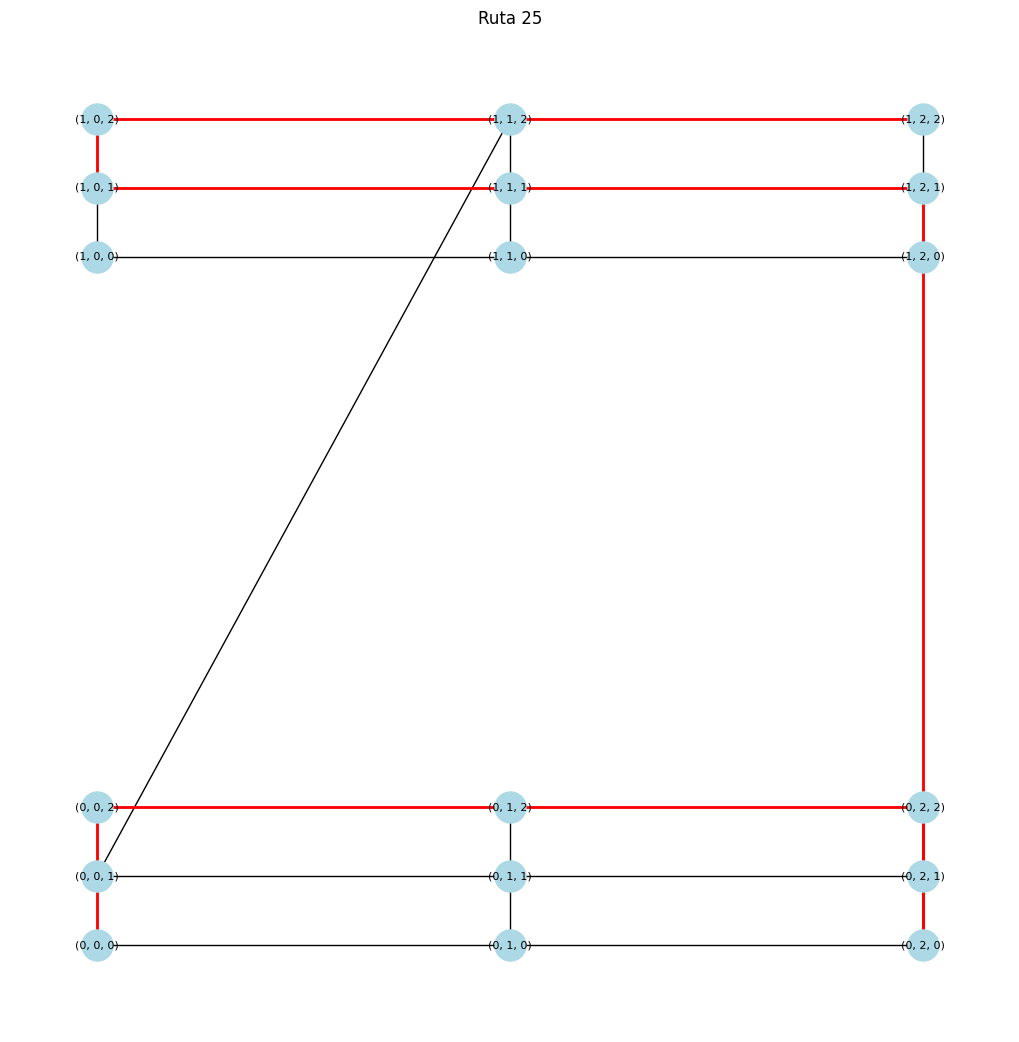

Ruta 26: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


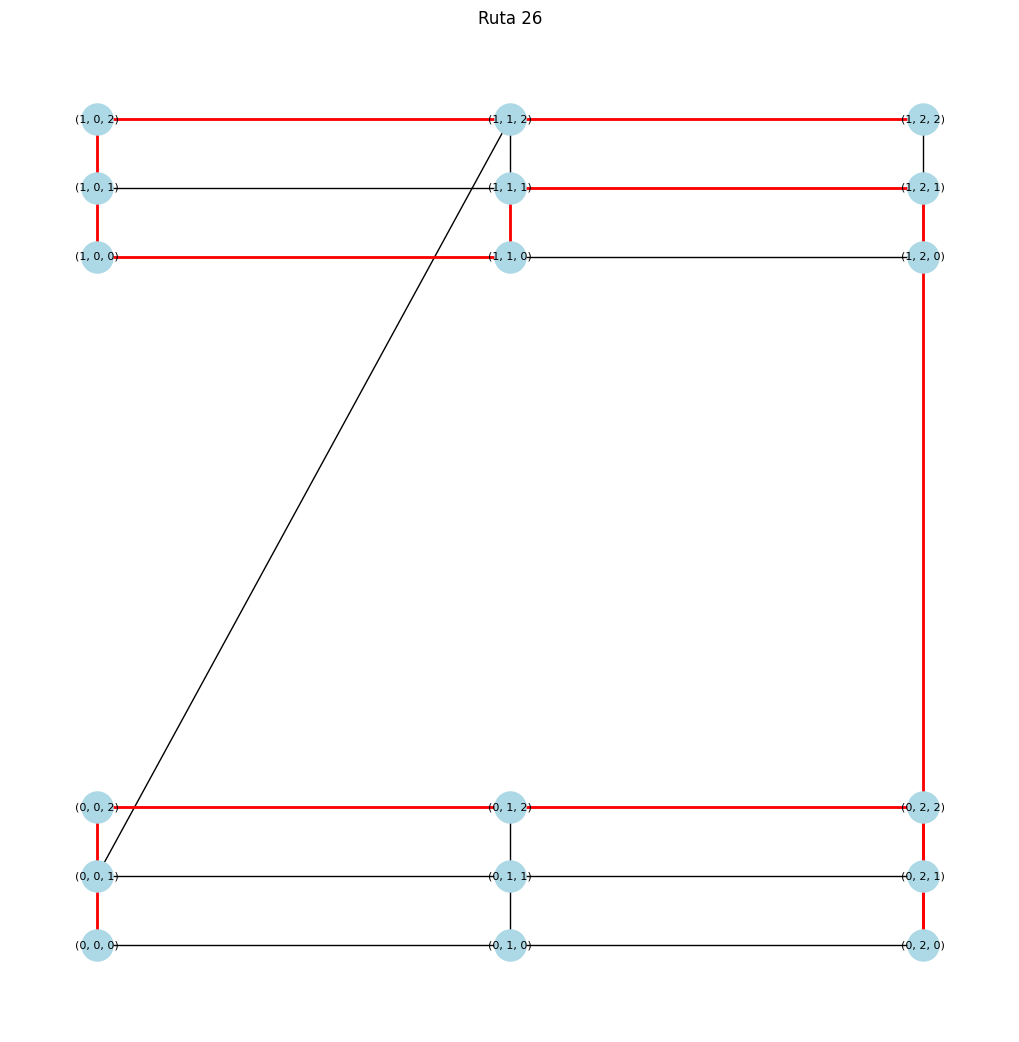

Ruta 27: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


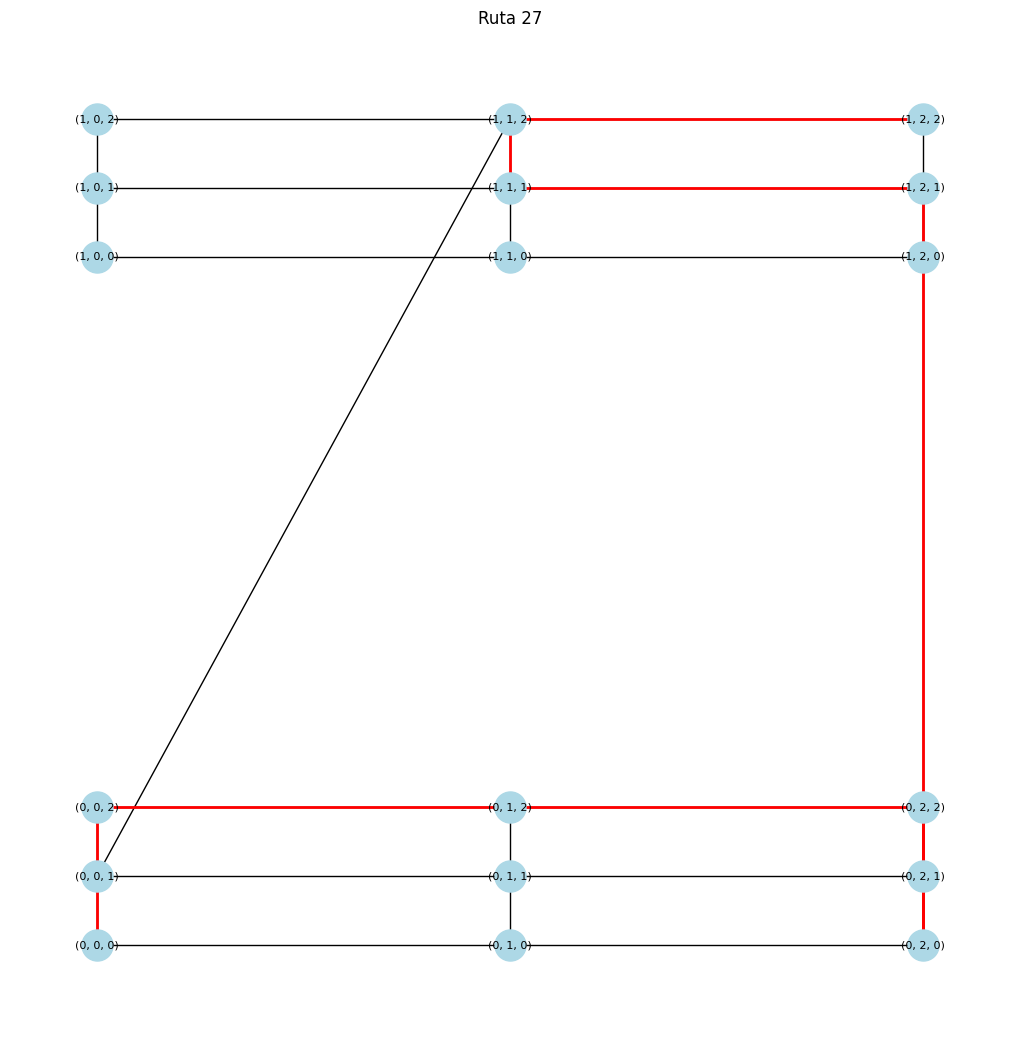

Ruta 28: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


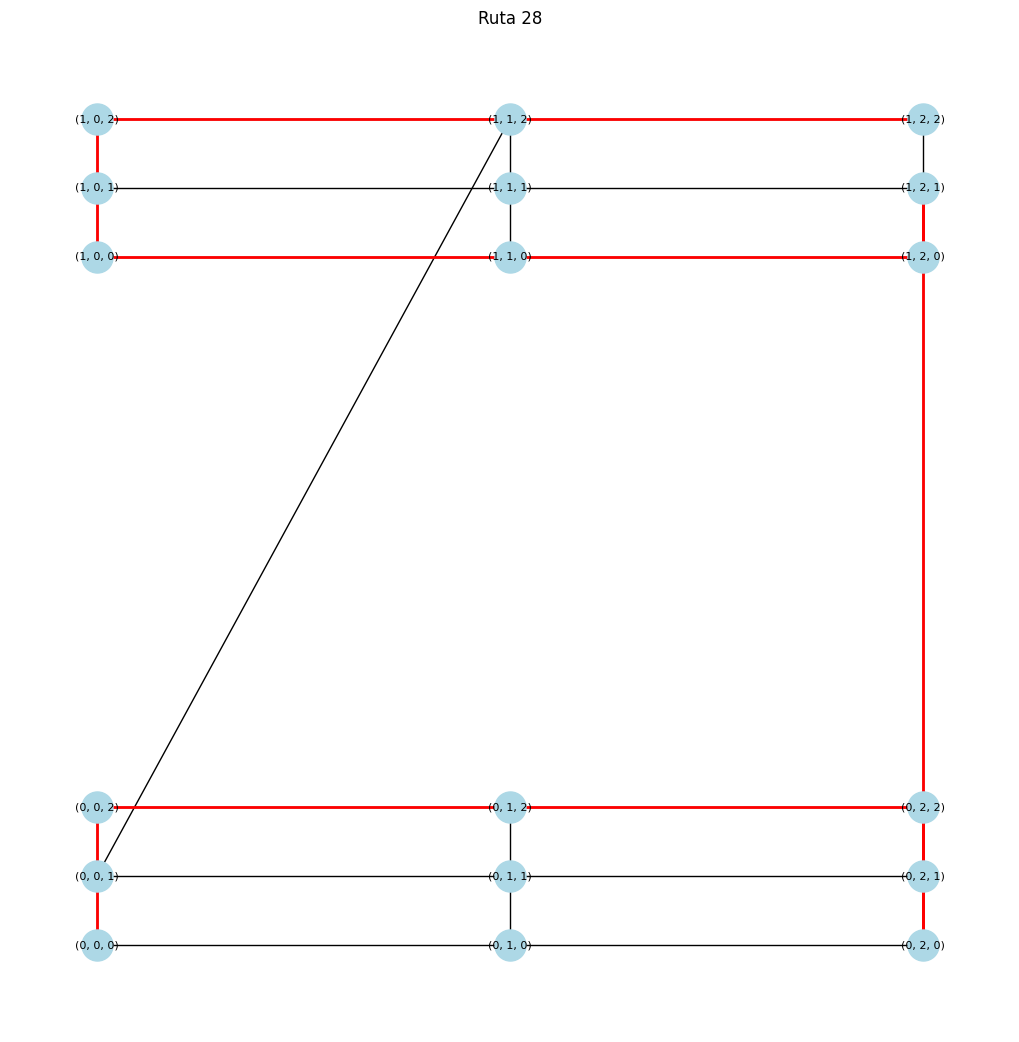

Ruta 29: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


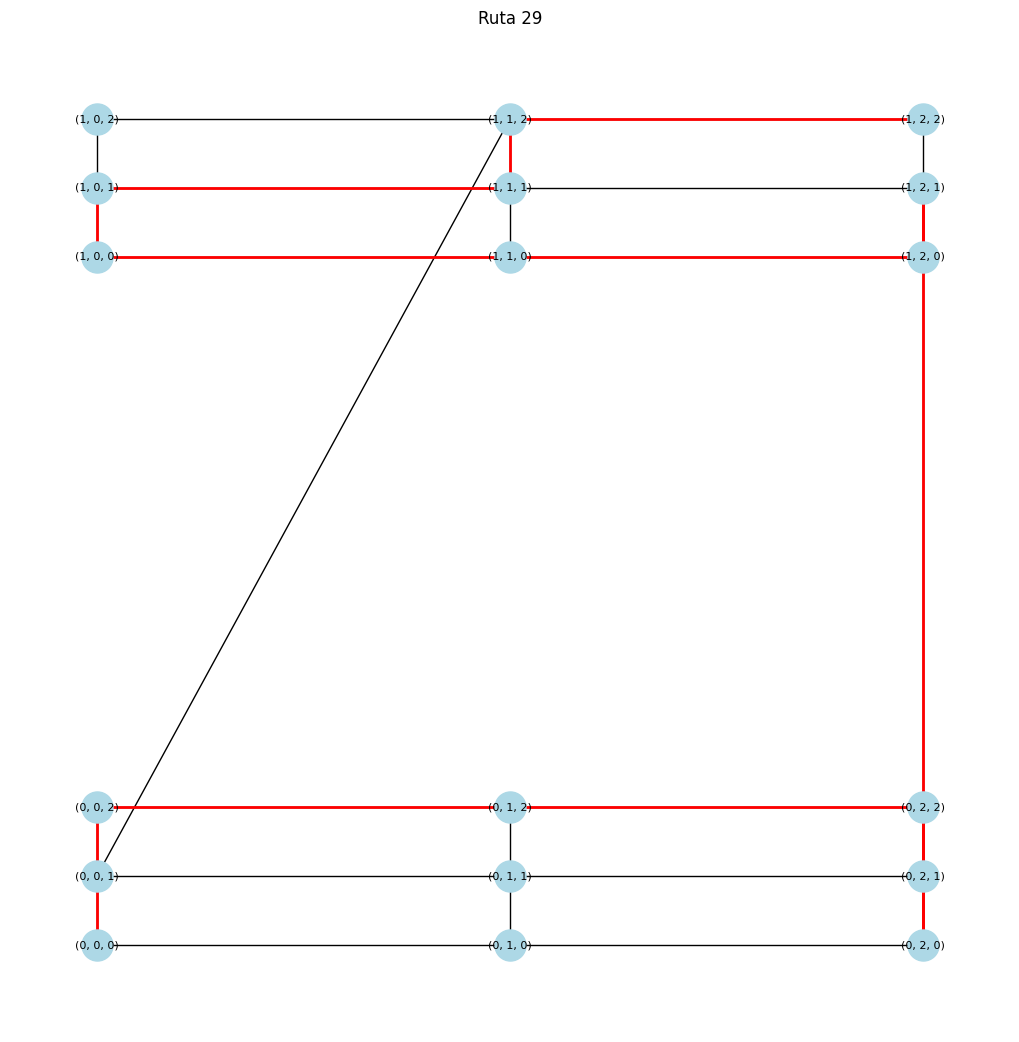

Ruta 30: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


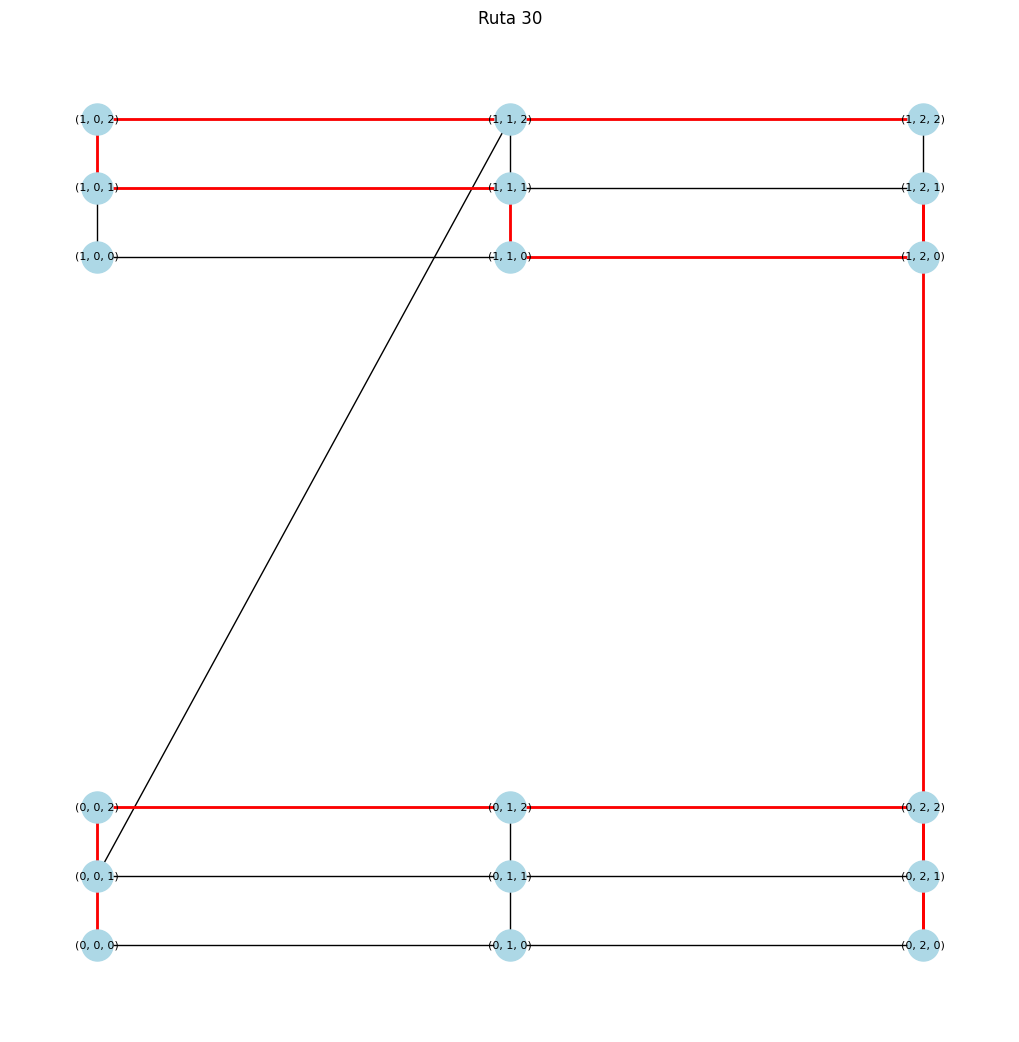

Ruta 31: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


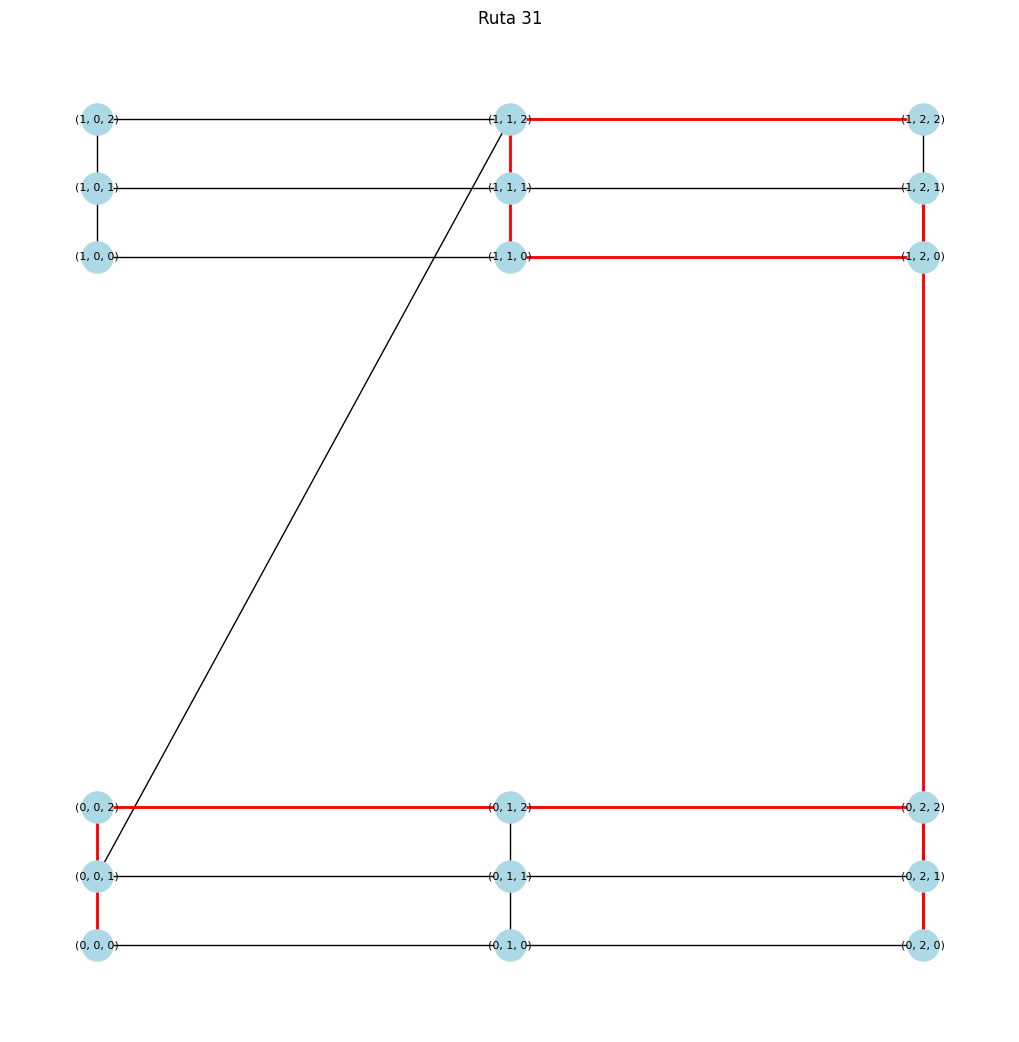

Ruta 32: [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 2)]


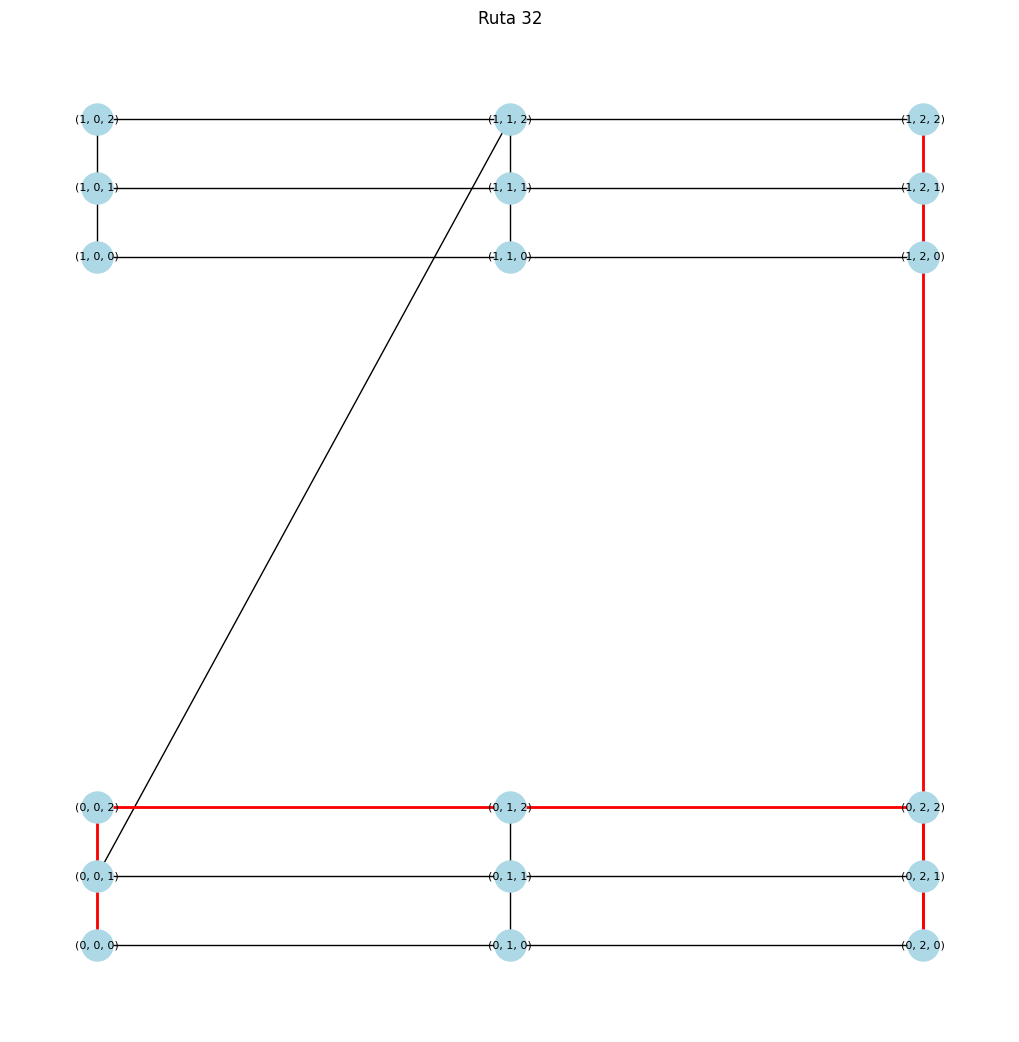

Ruta 33: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


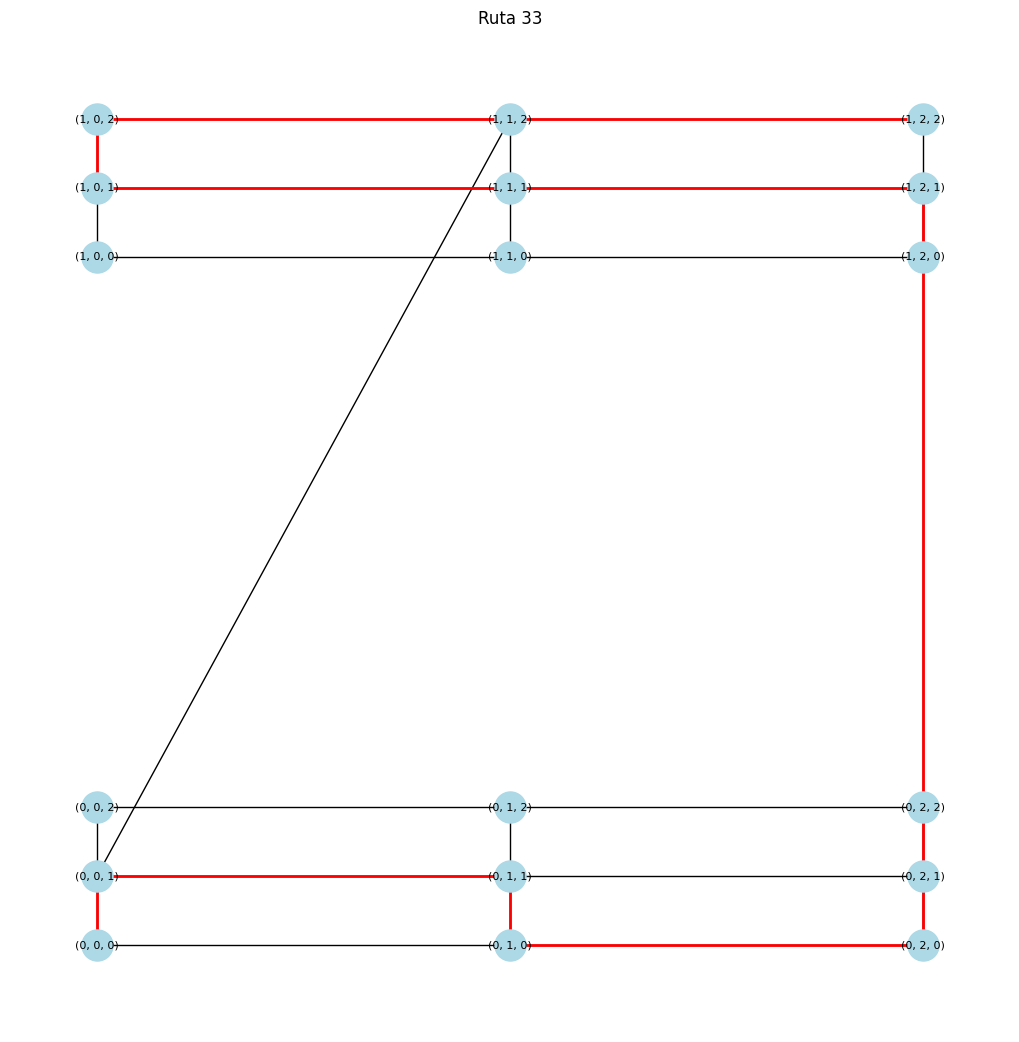

Ruta 34: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


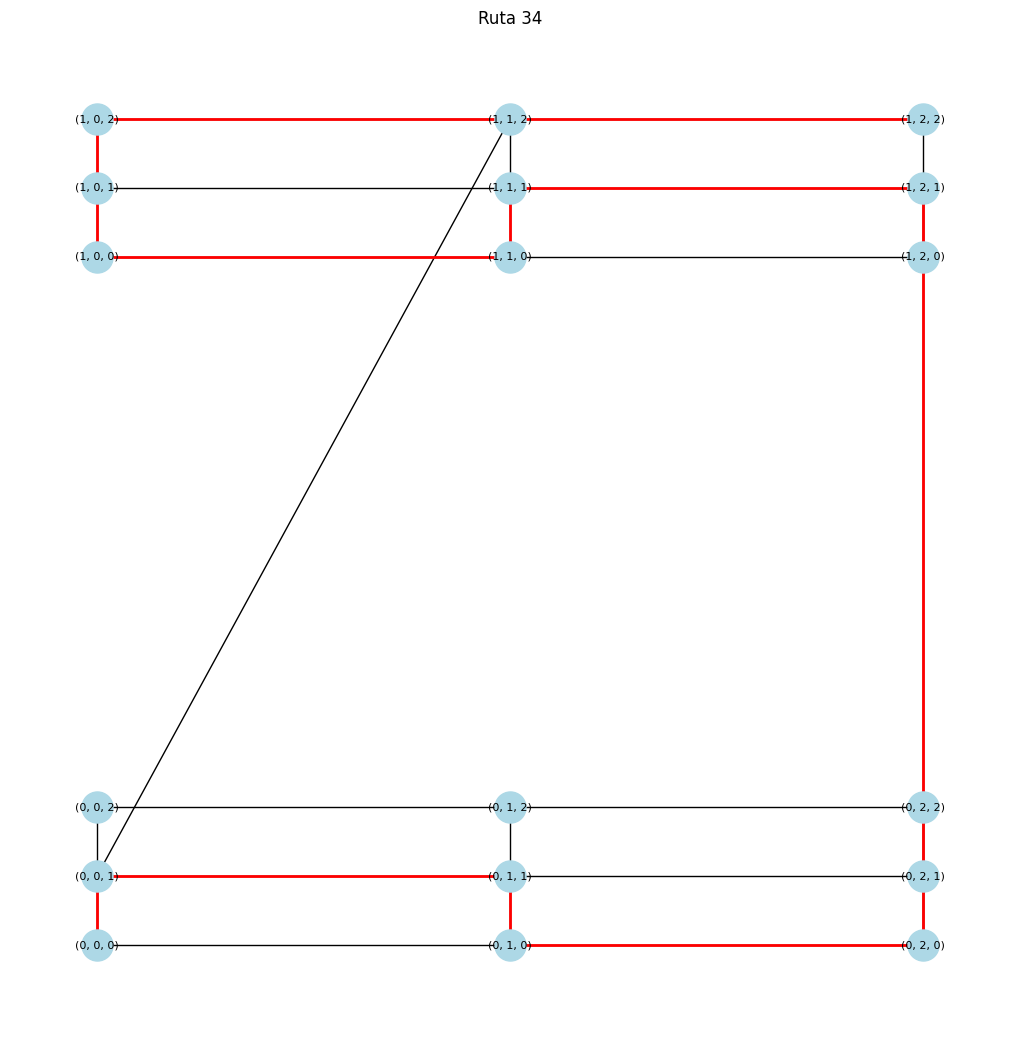

Ruta 35: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


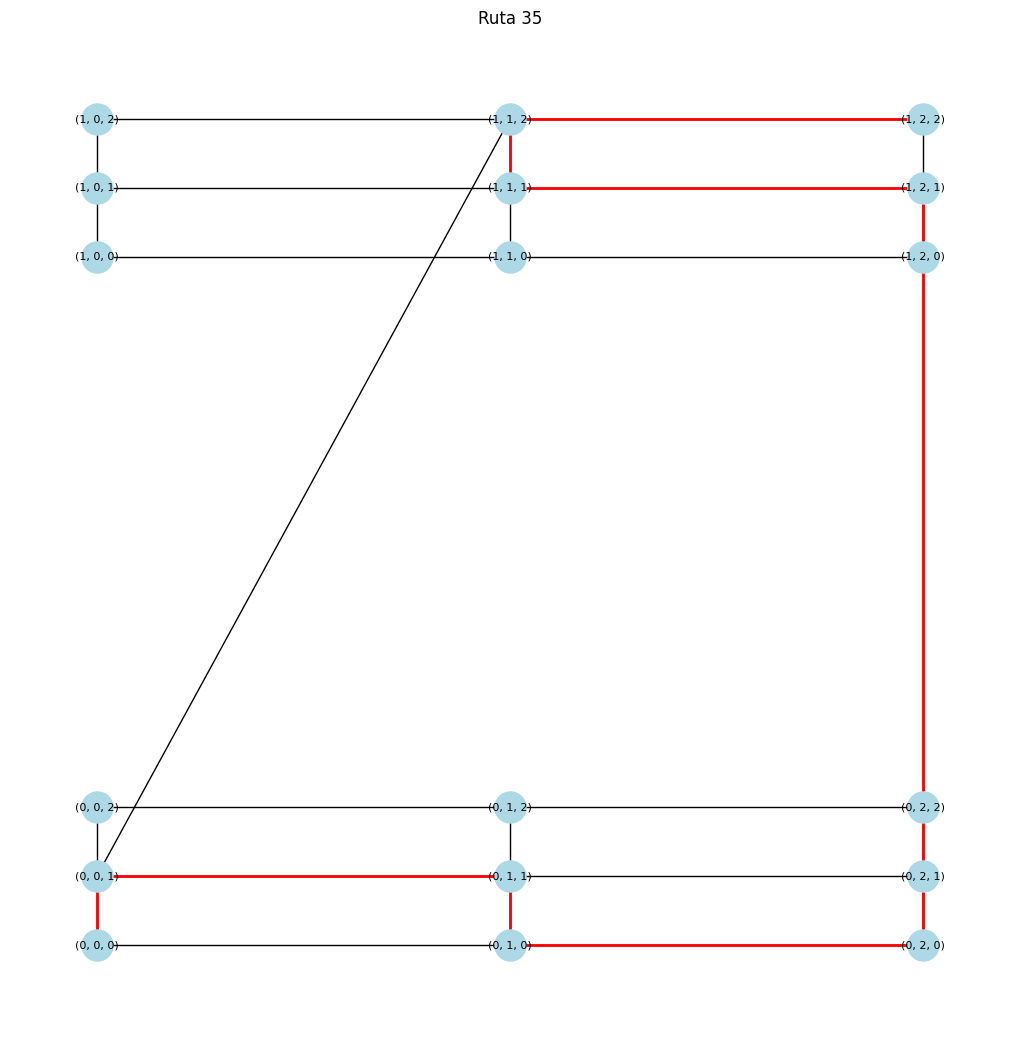

Ruta 36: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


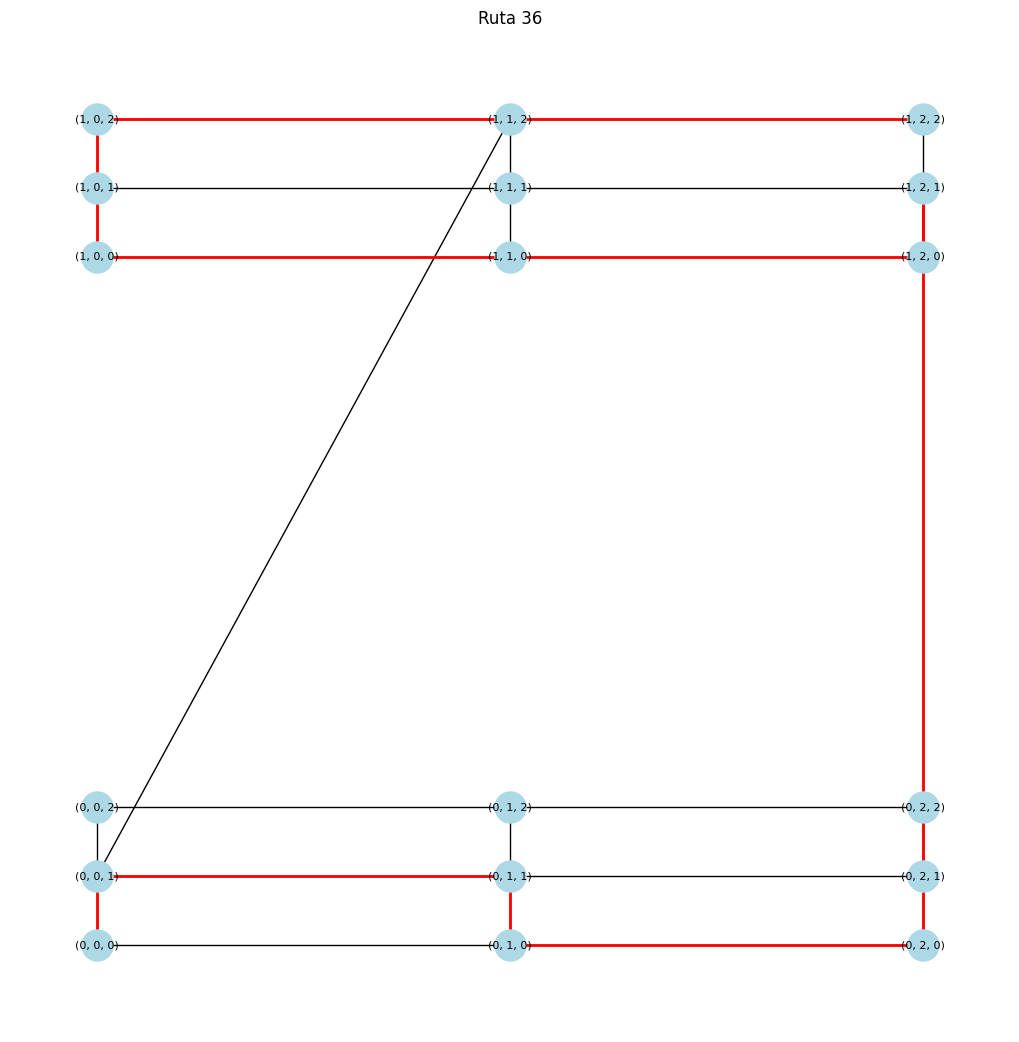

Ruta 37: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


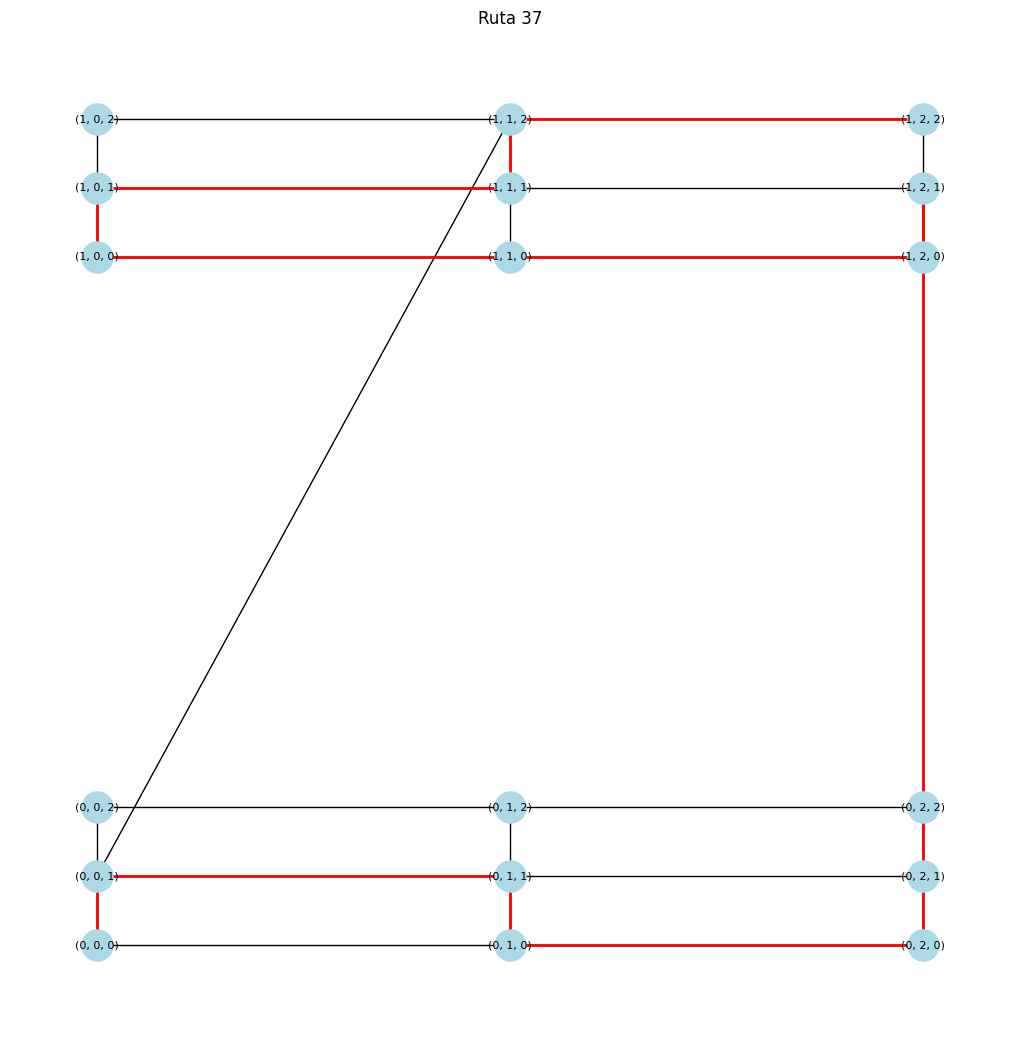

Ruta 38: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


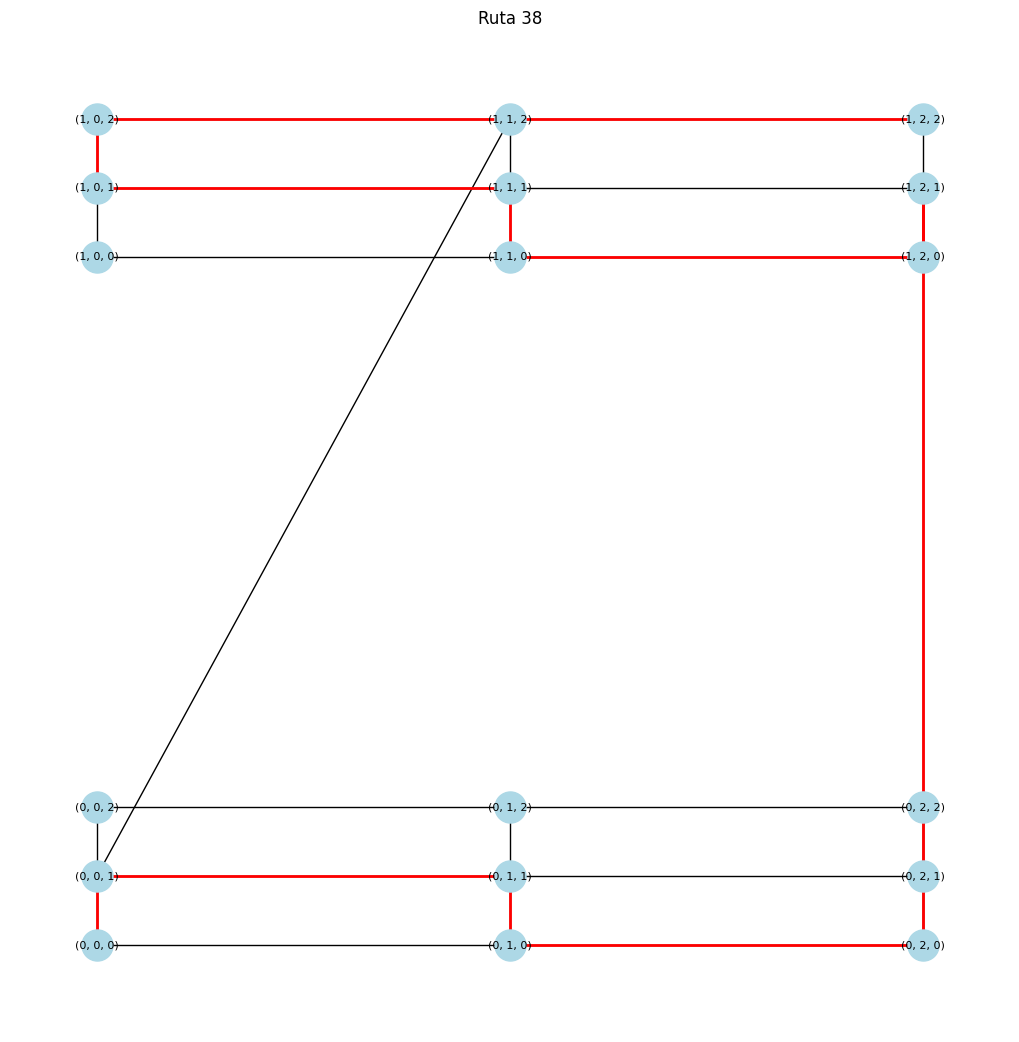

Ruta 39: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


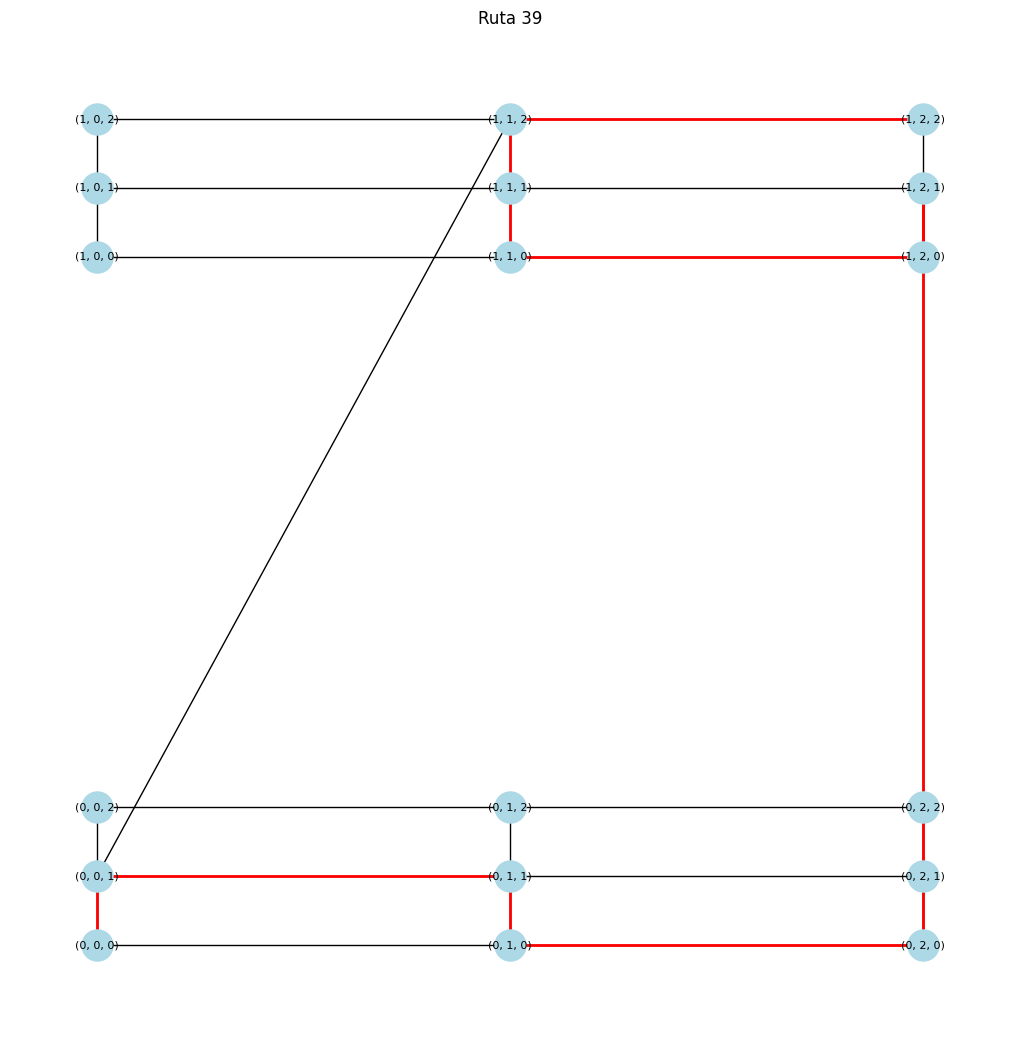

Ruta 40: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 2)]


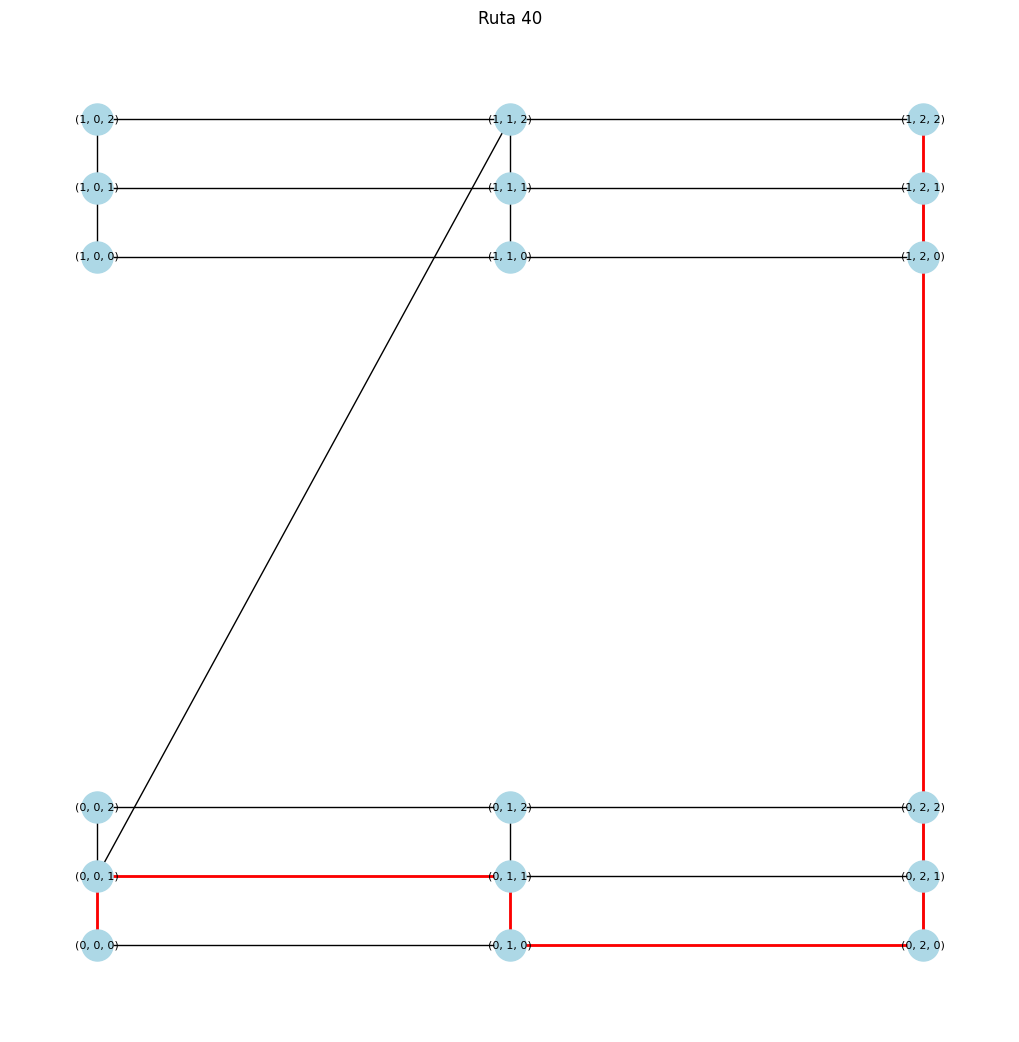

Ruta 41: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


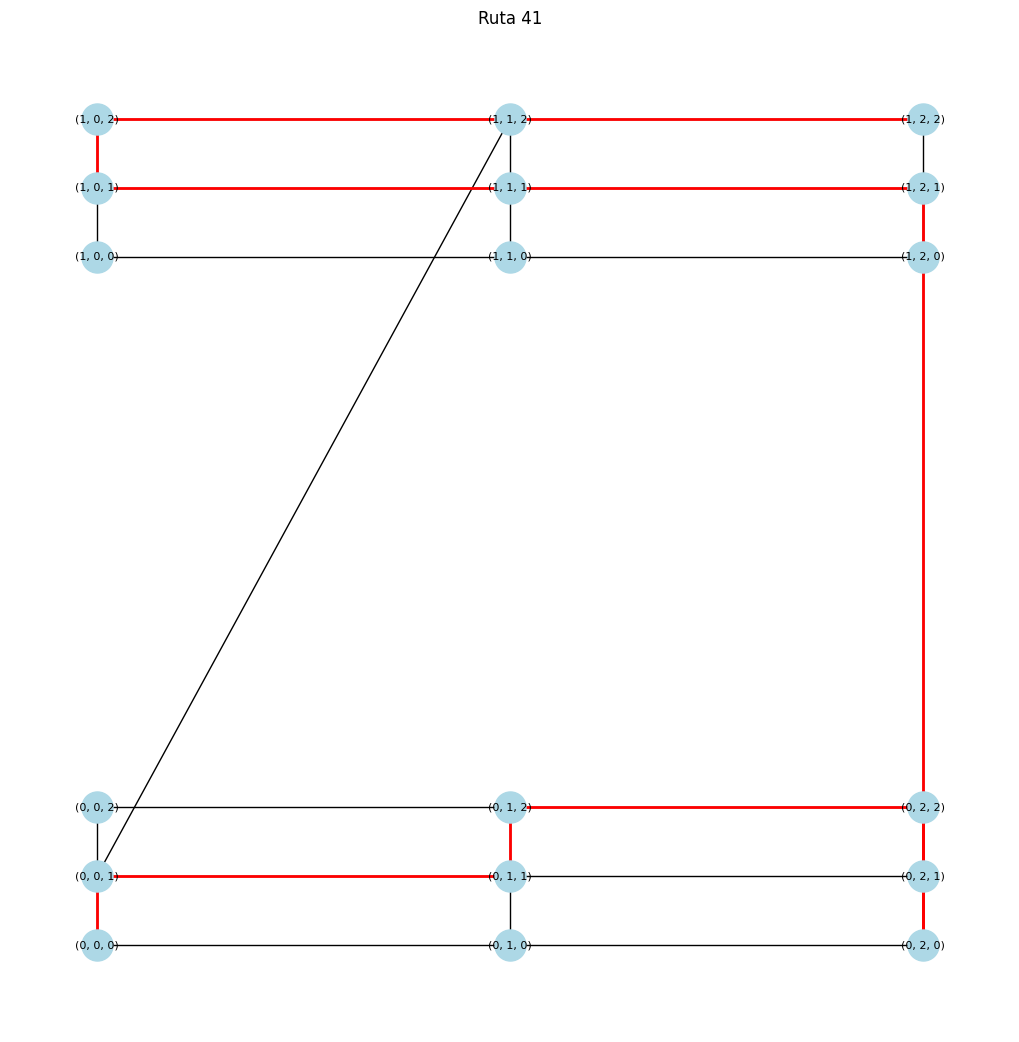

Ruta 42: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


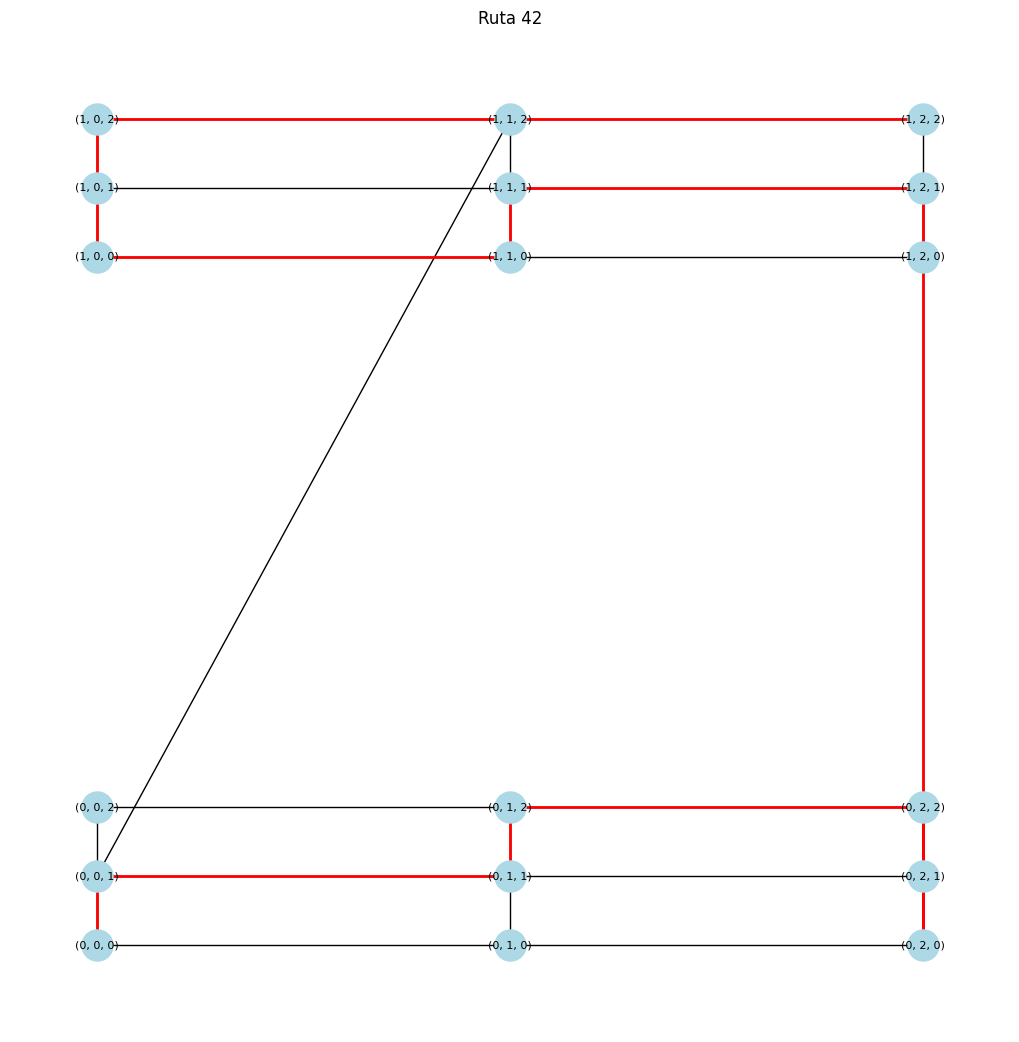

Ruta 43: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


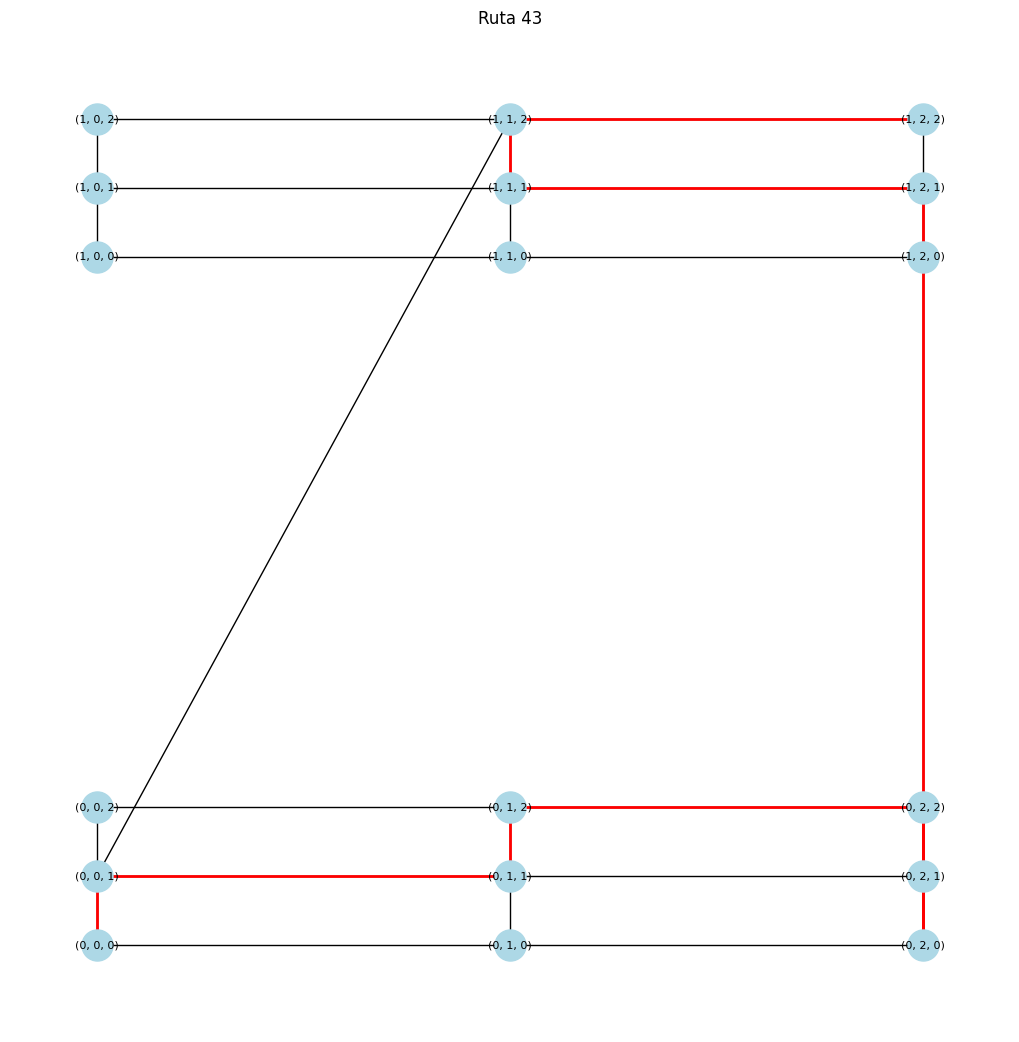

Ruta 44: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


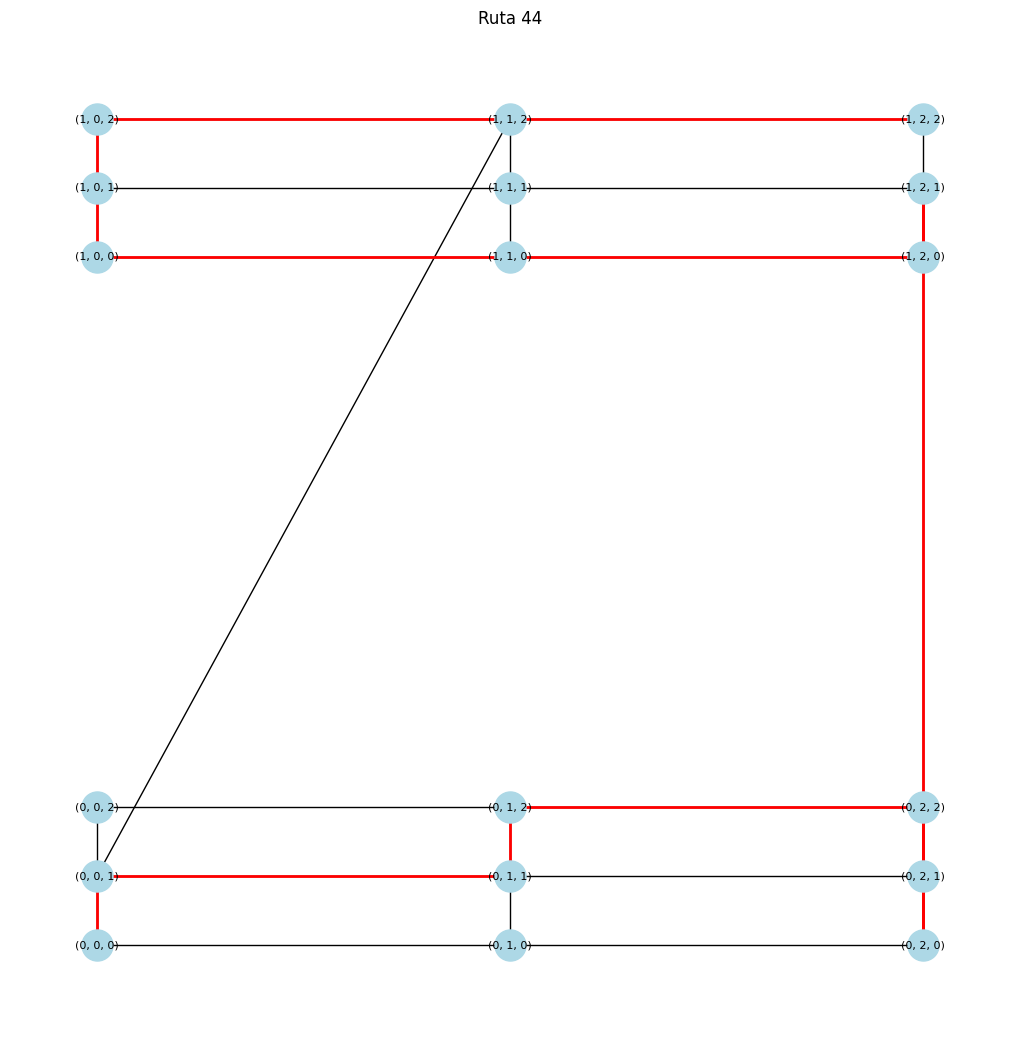

Ruta 45: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


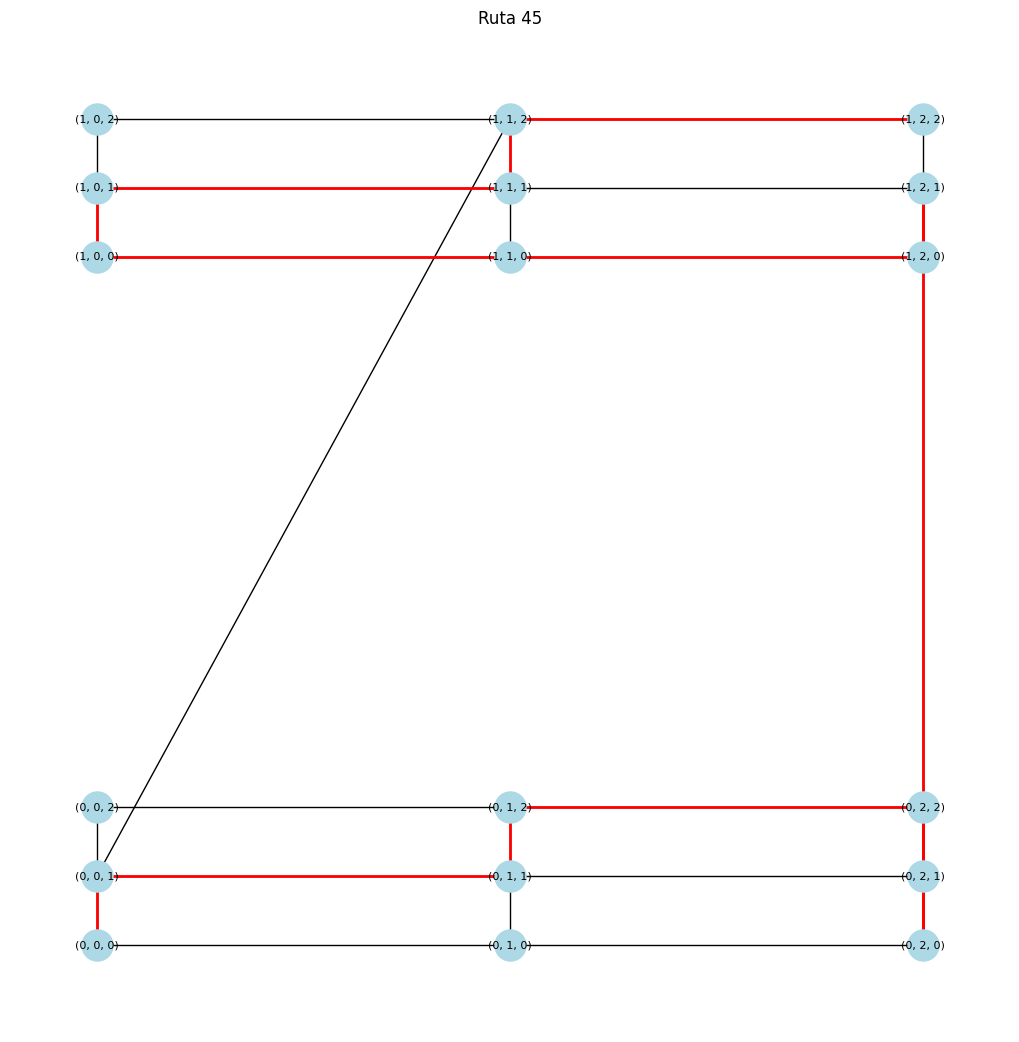

Ruta 46: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


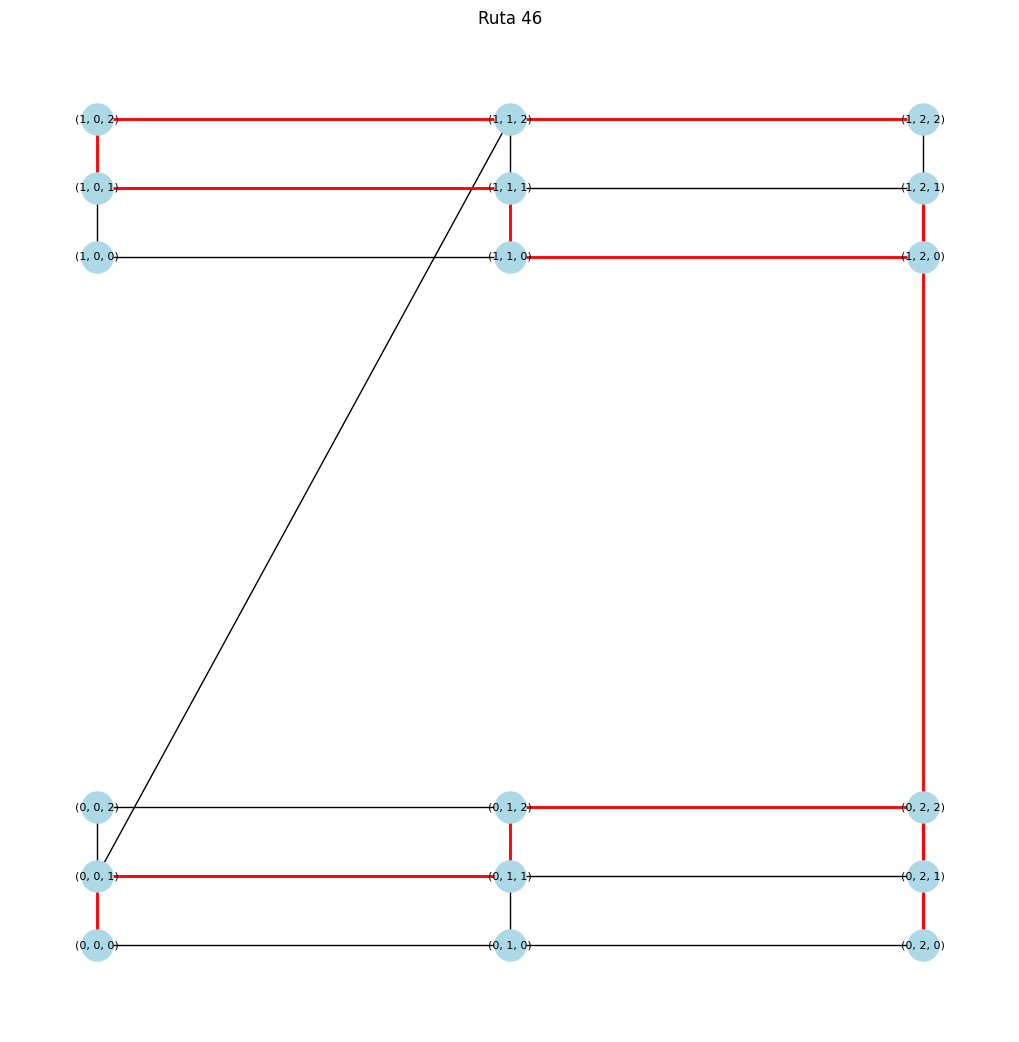

Ruta 47: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


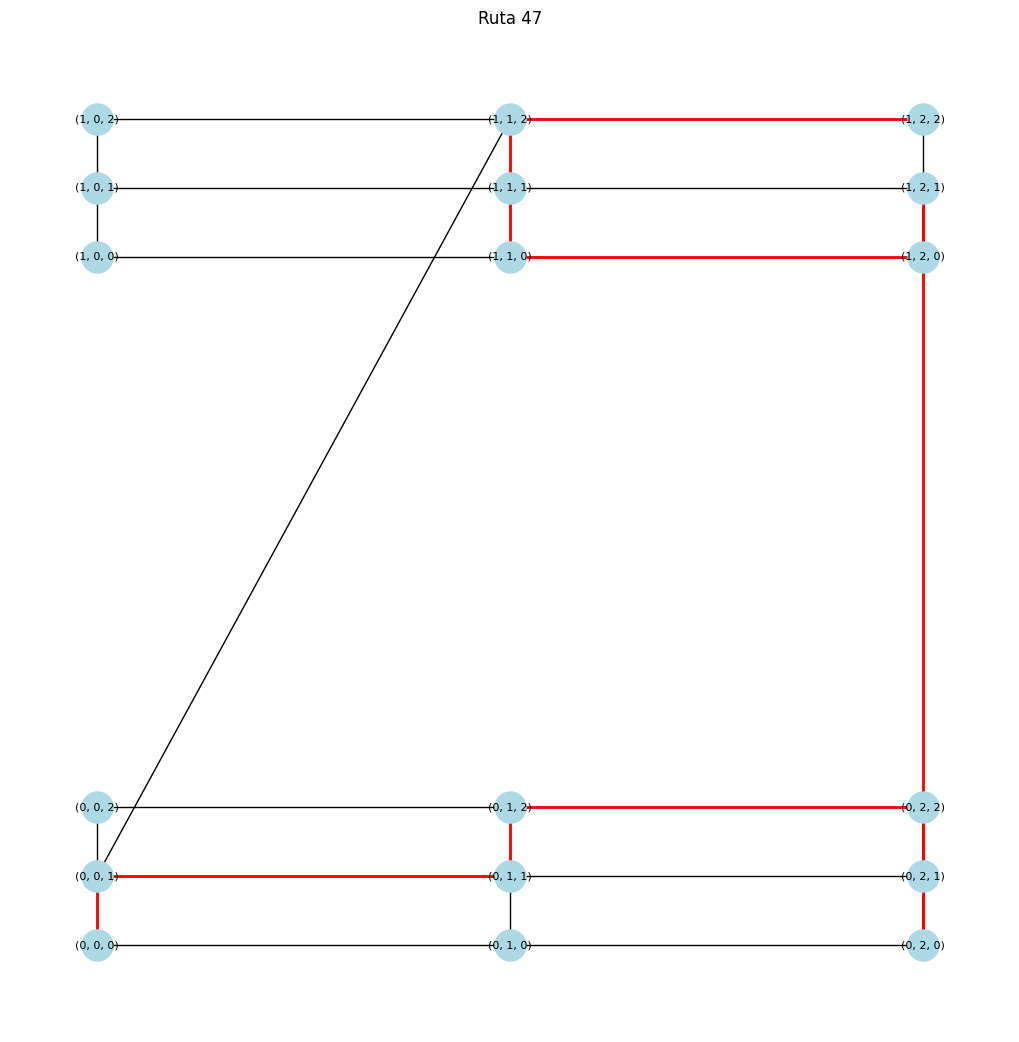

Ruta 48: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 2)]


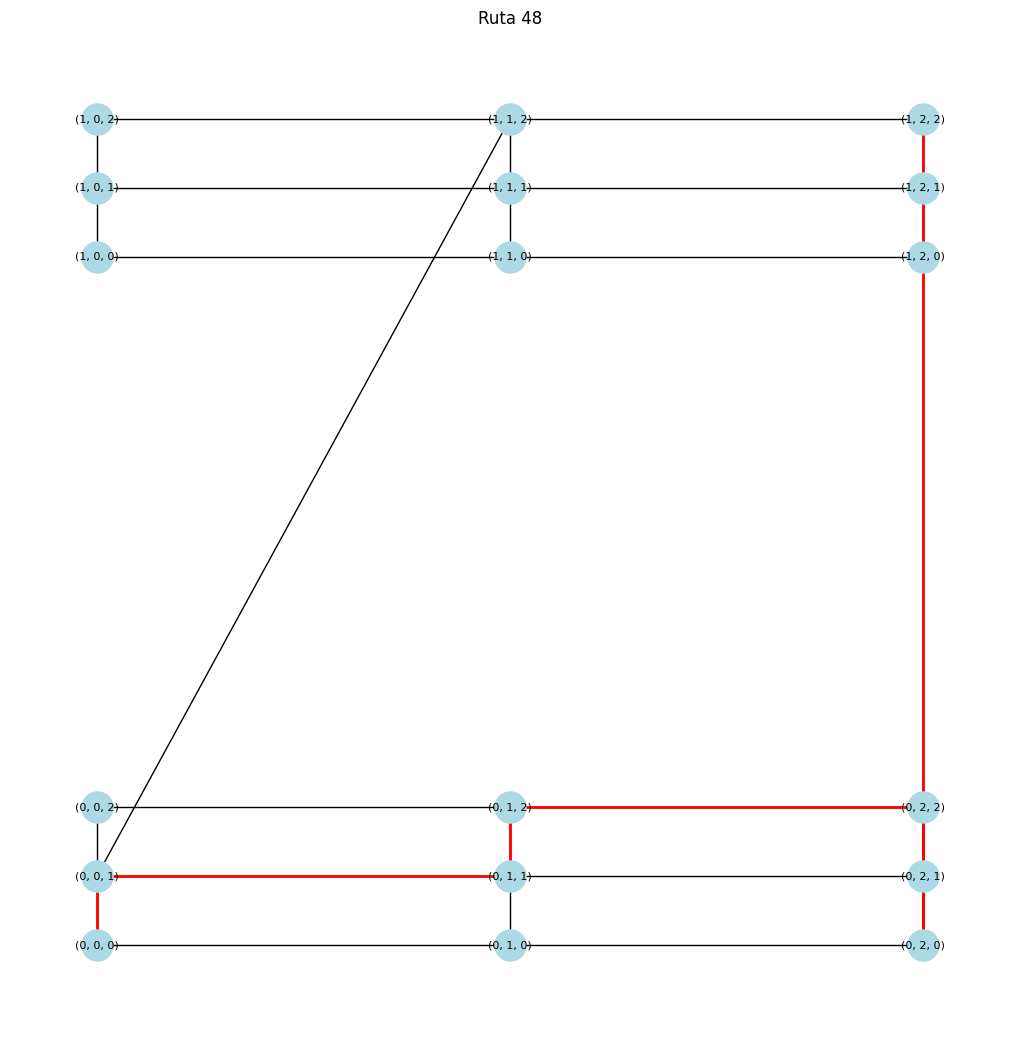

Ruta 49: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


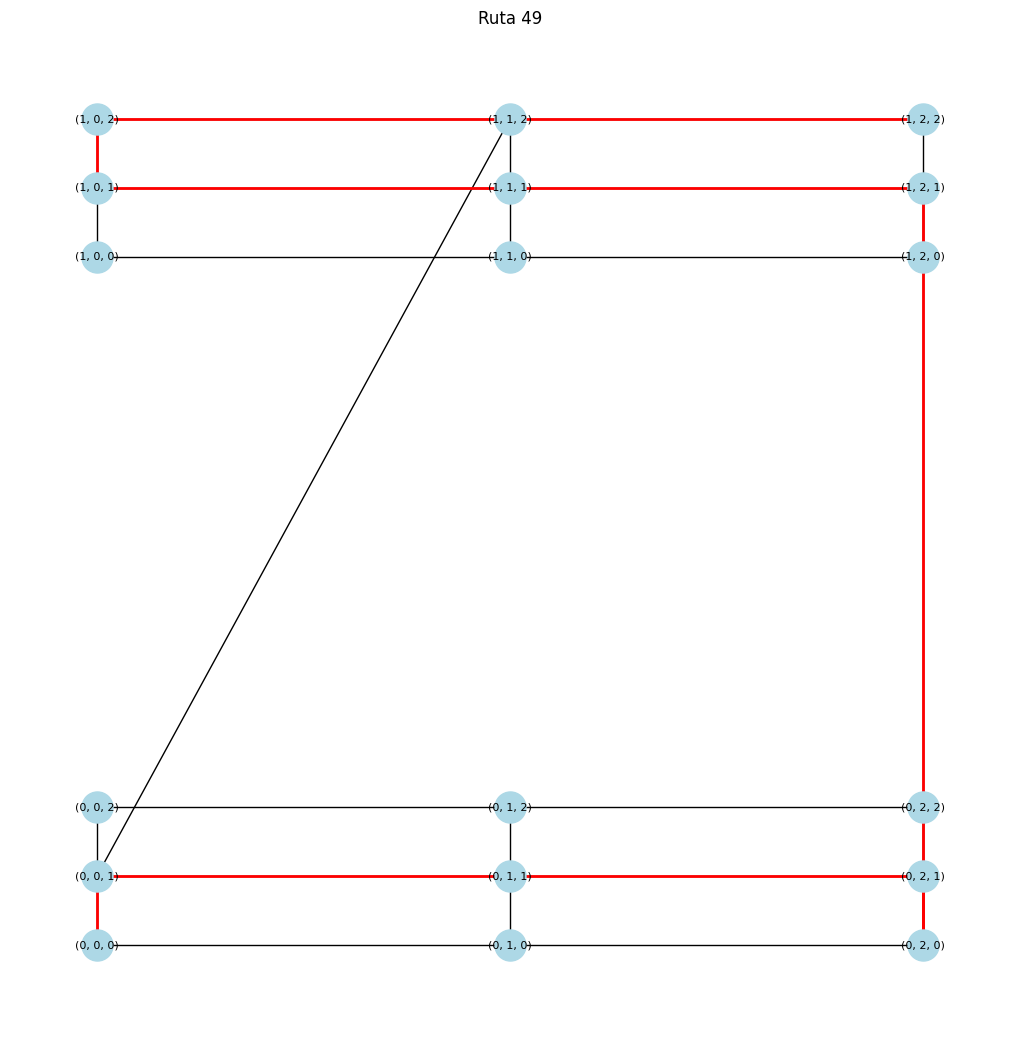

Ruta 50: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


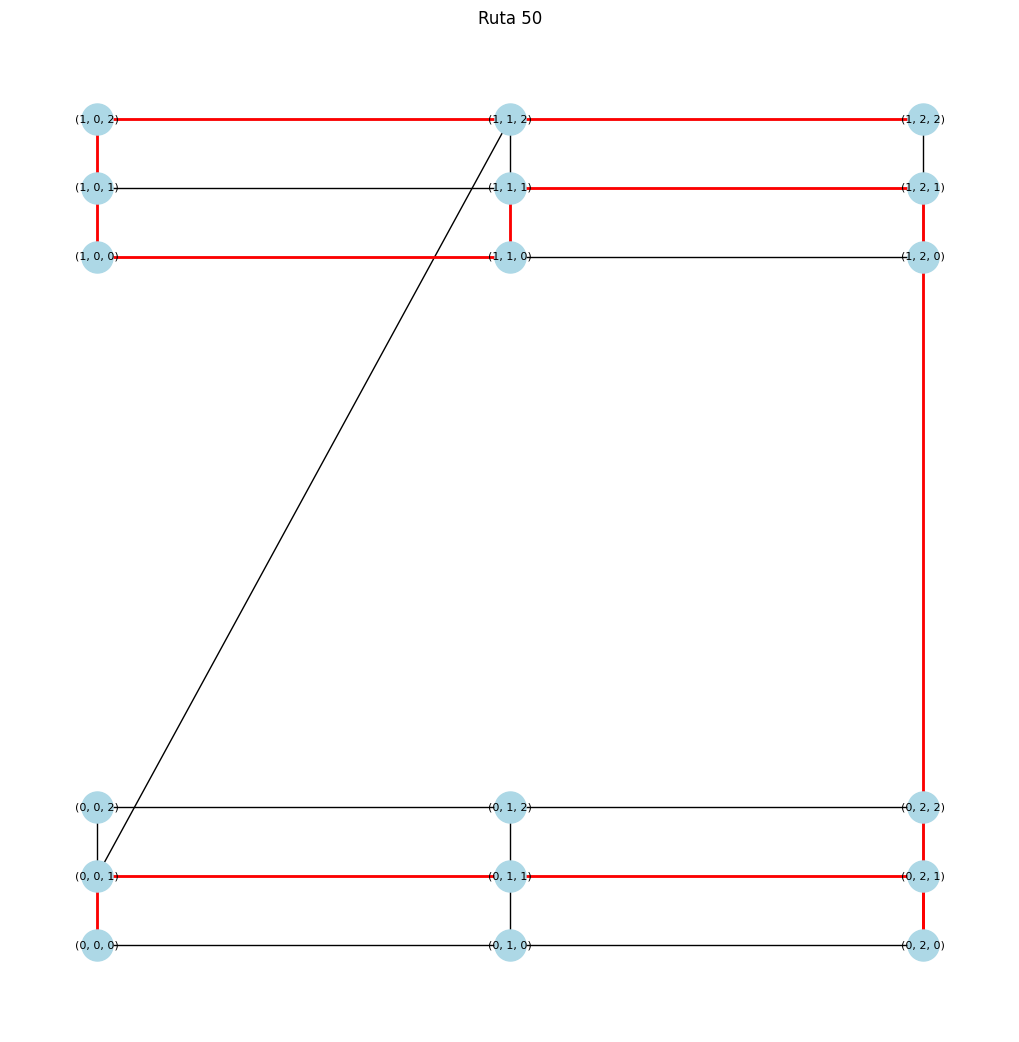

Ruta 51: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


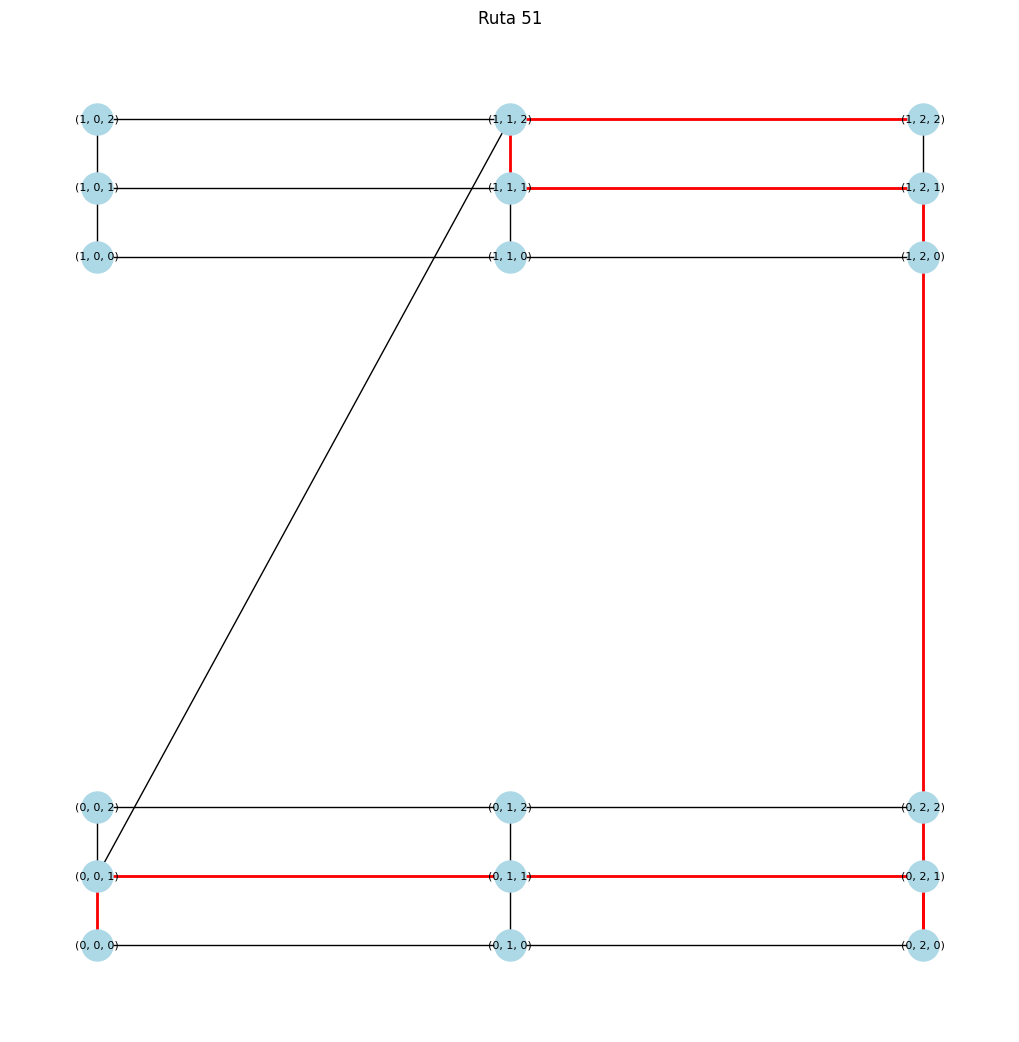

Ruta 52: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


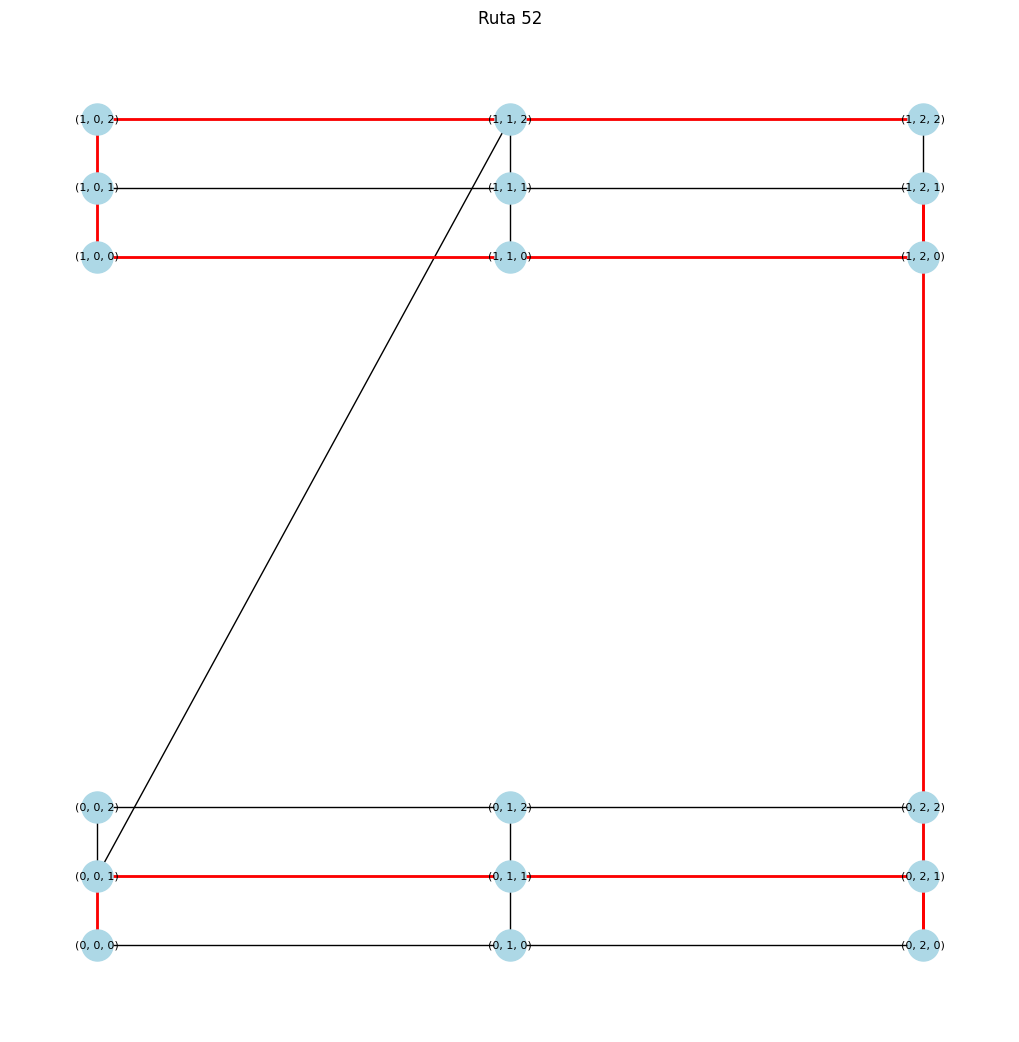

Ruta 53: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


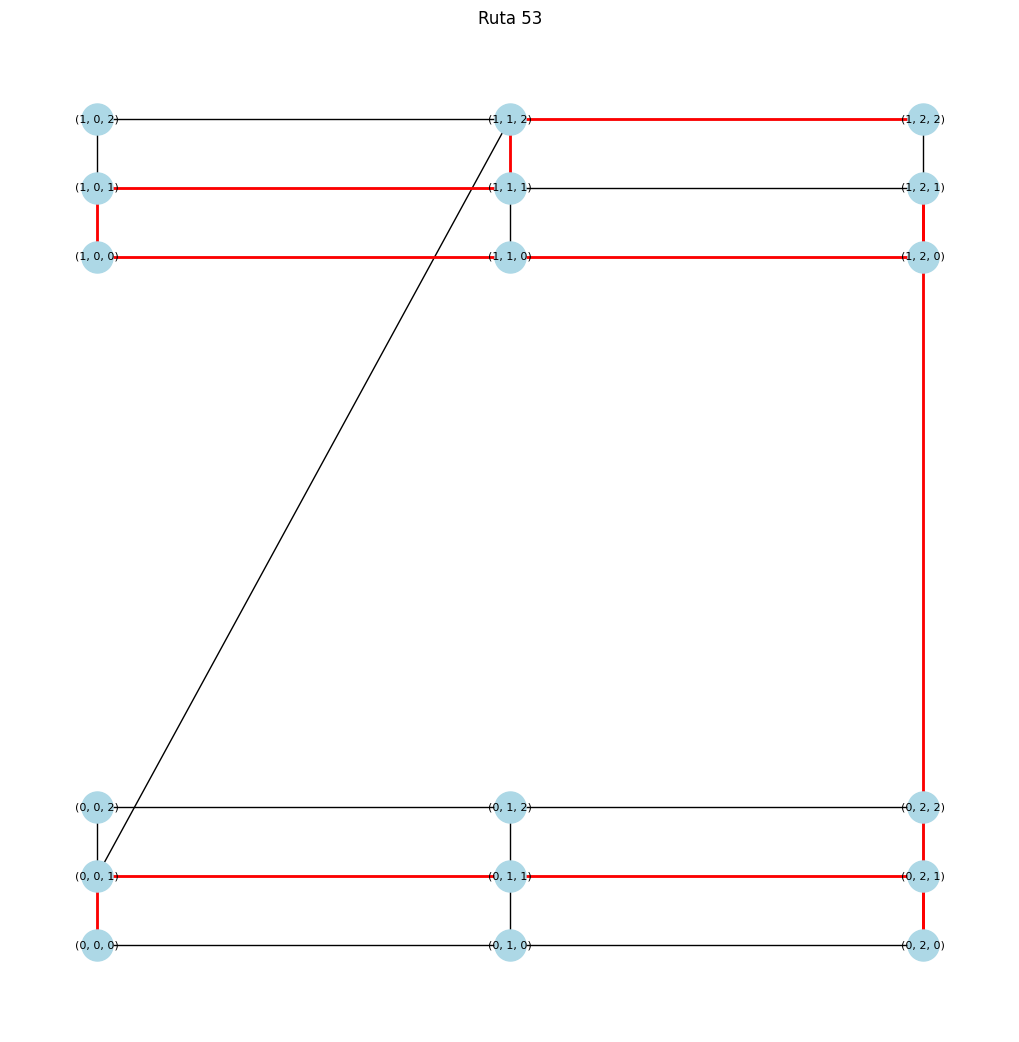

Ruta 54: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


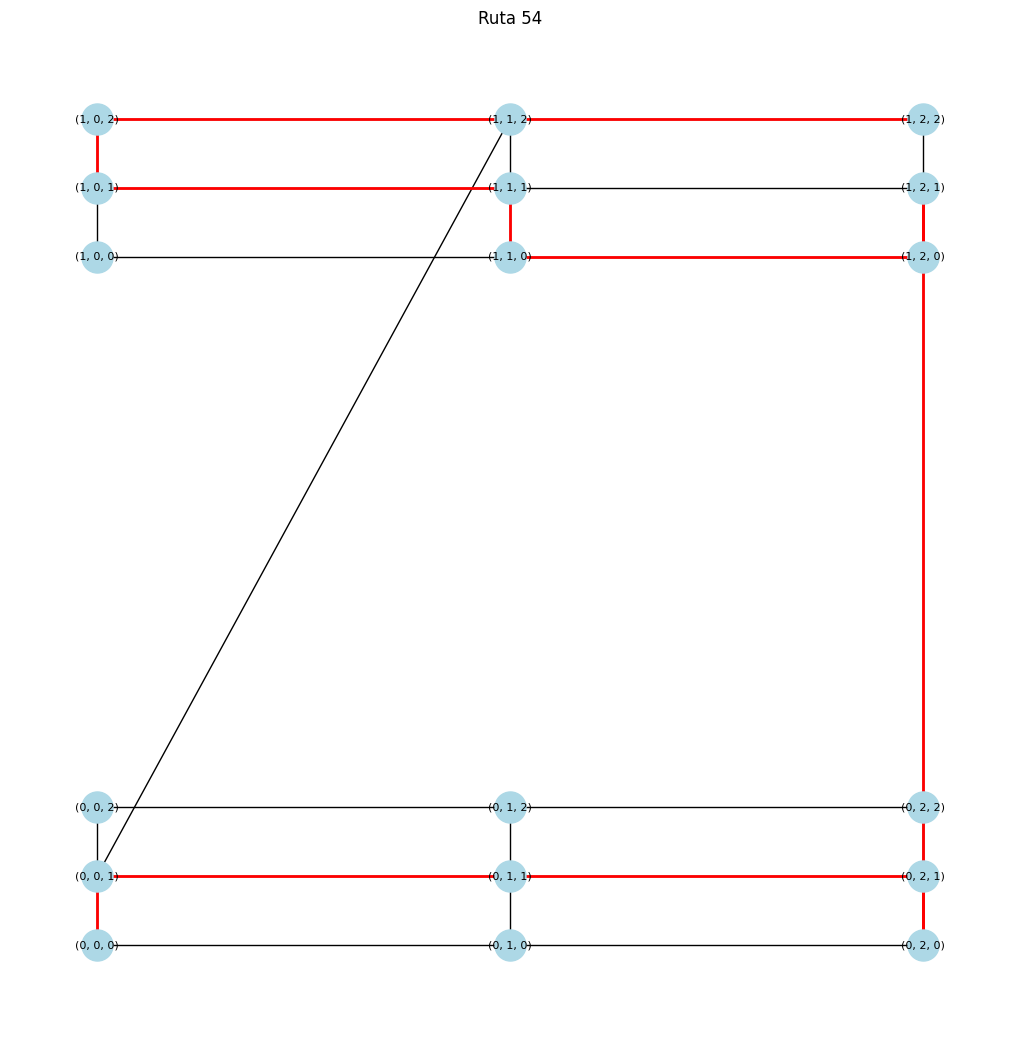

Ruta 55: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


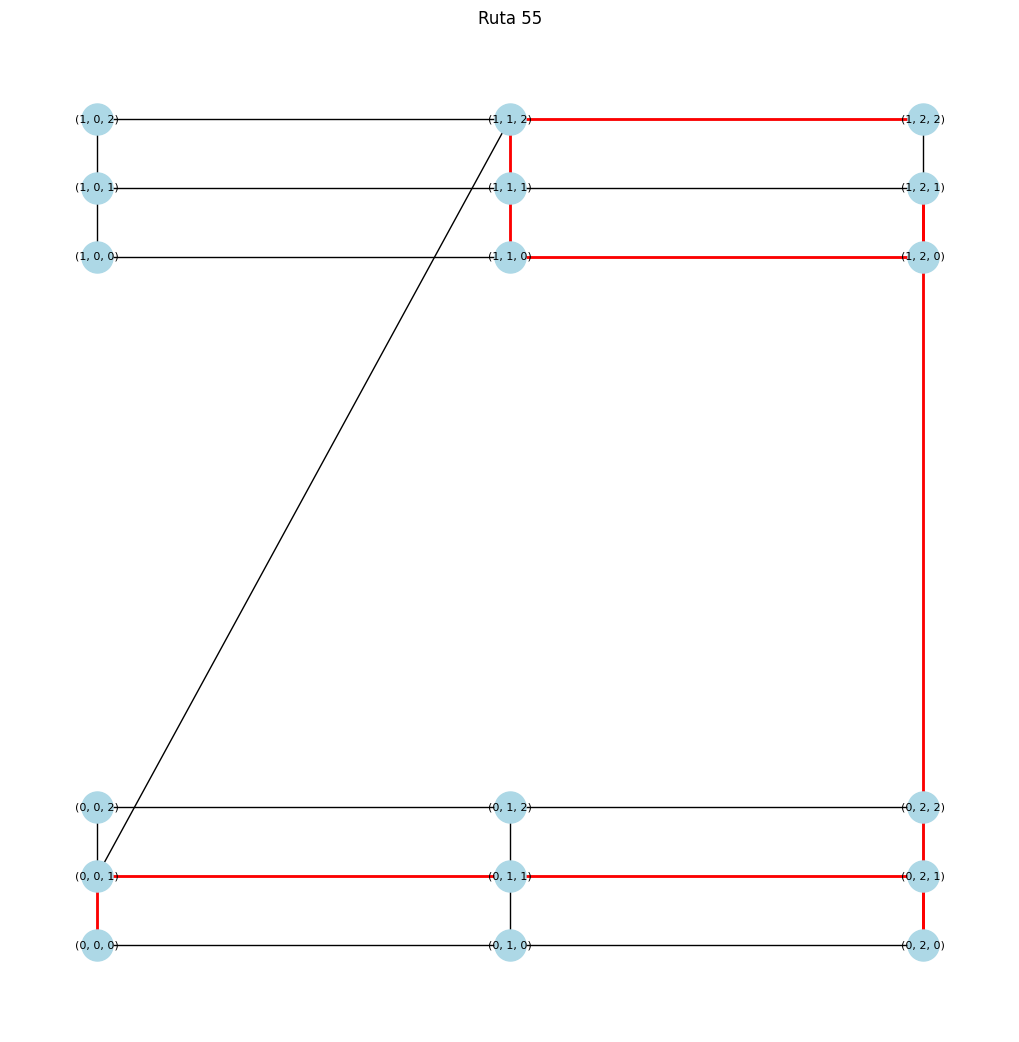

Ruta 56: [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 2)]


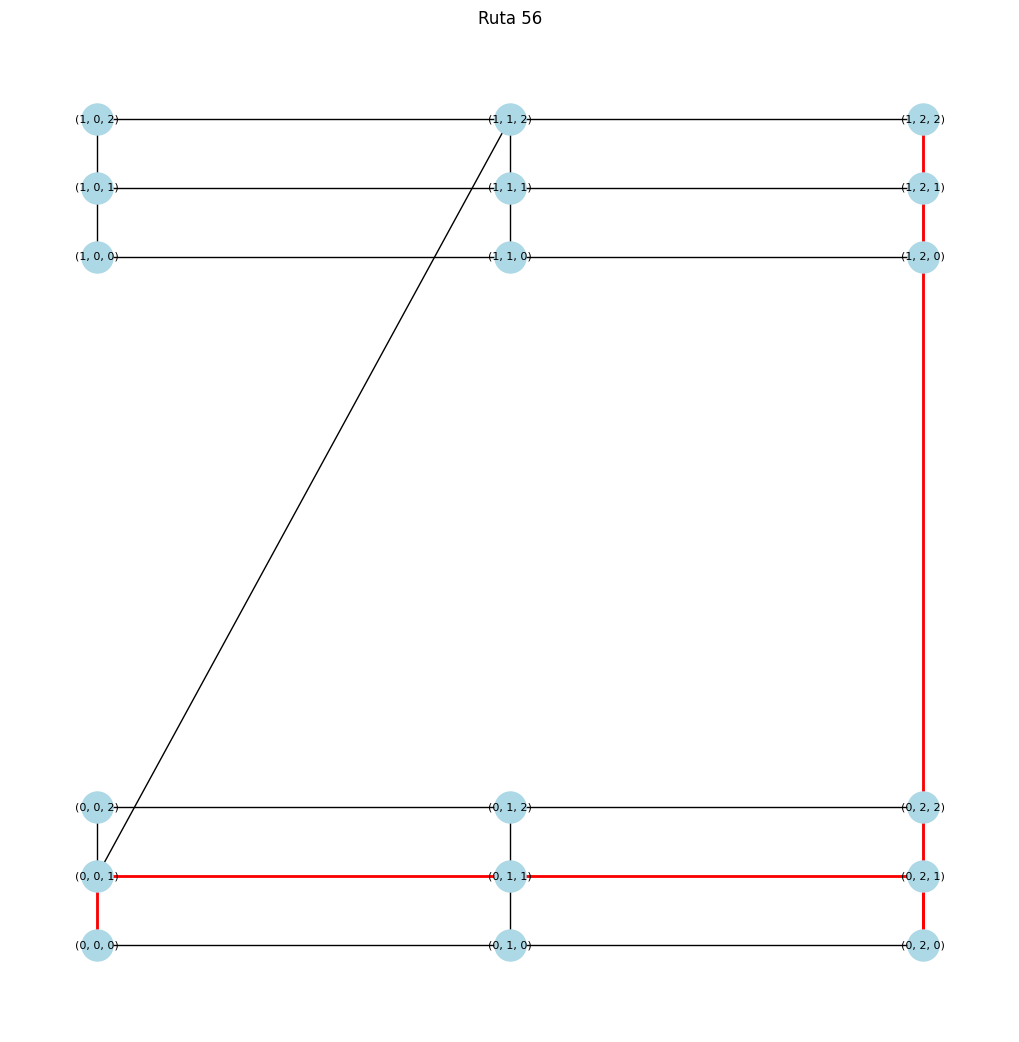

Ruta 57: [(0, 0, 0), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


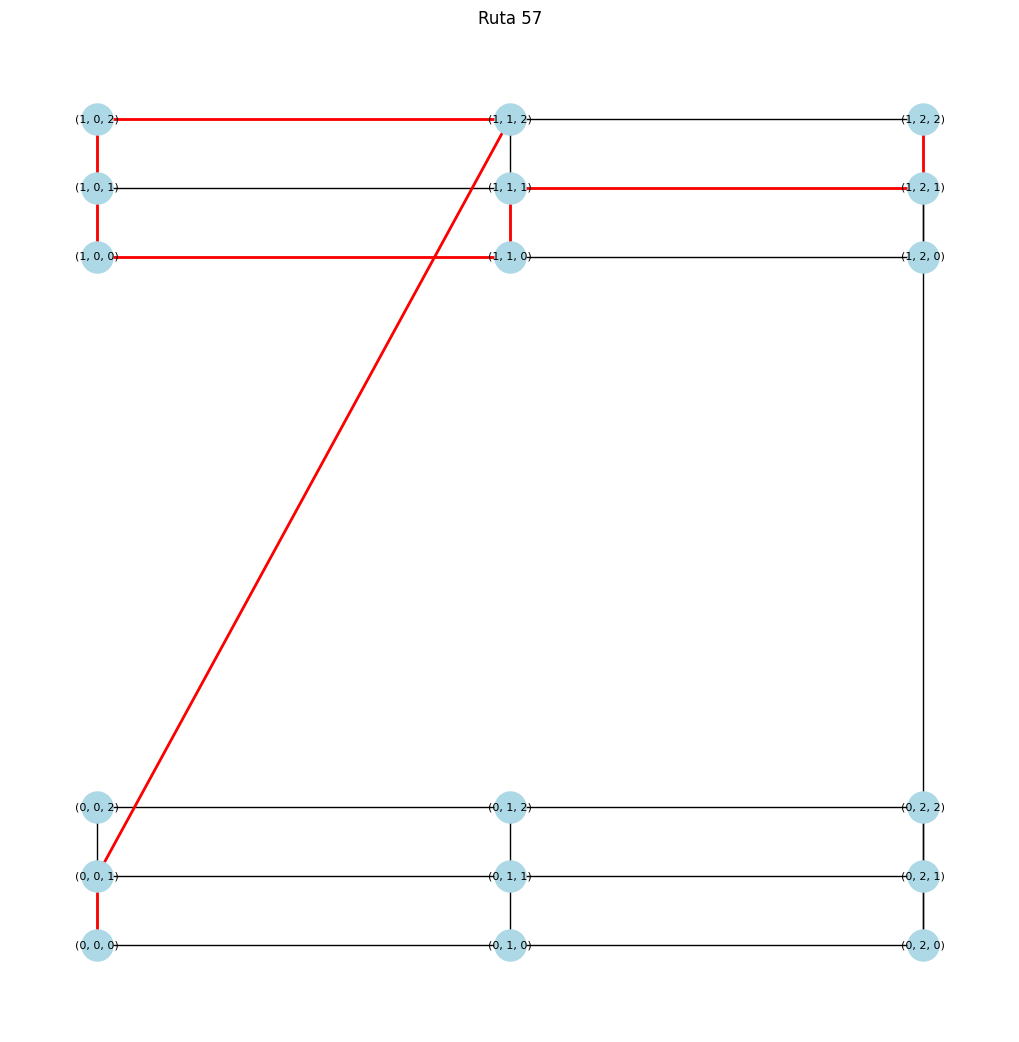

Ruta 58: [(0, 0, 0), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


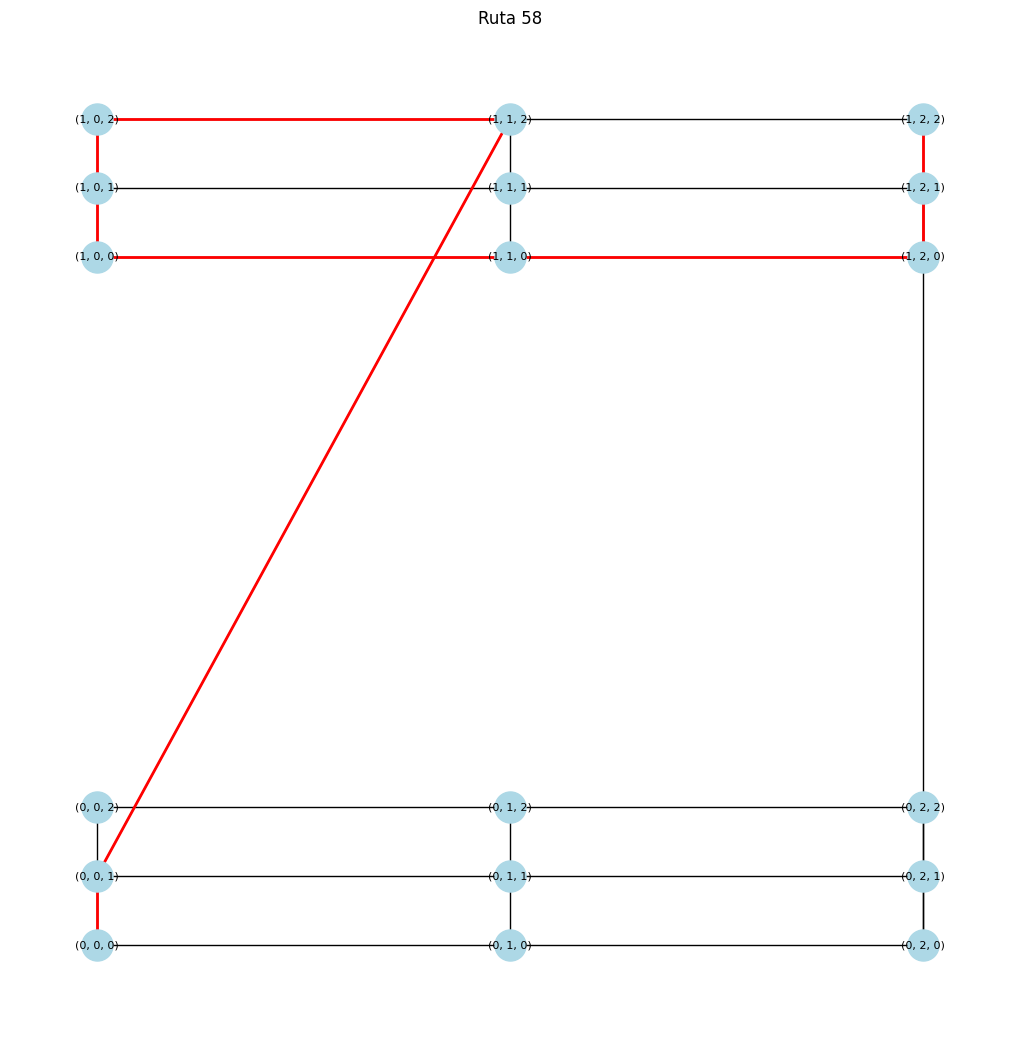

Ruta 59: [(0, 0, 0), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


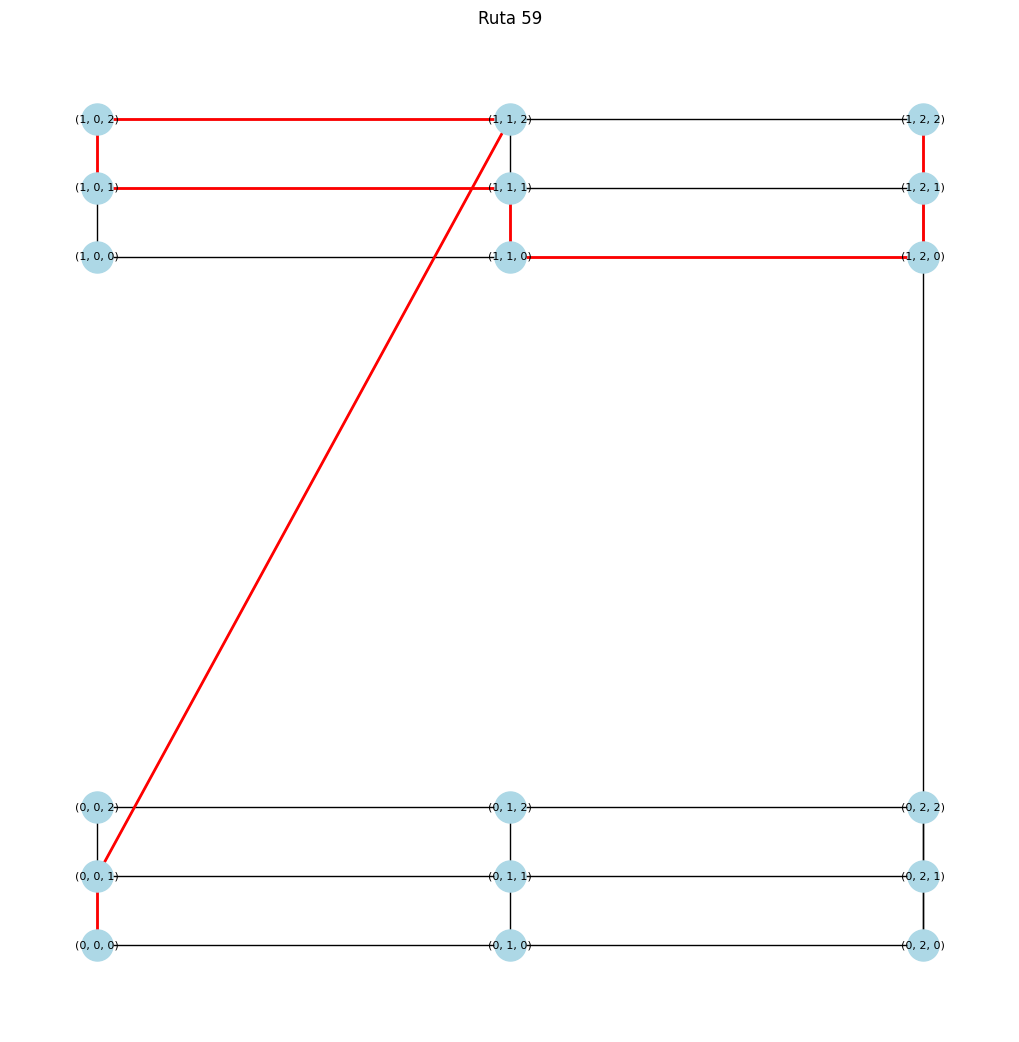

Ruta 60: [(0, 0, 0), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


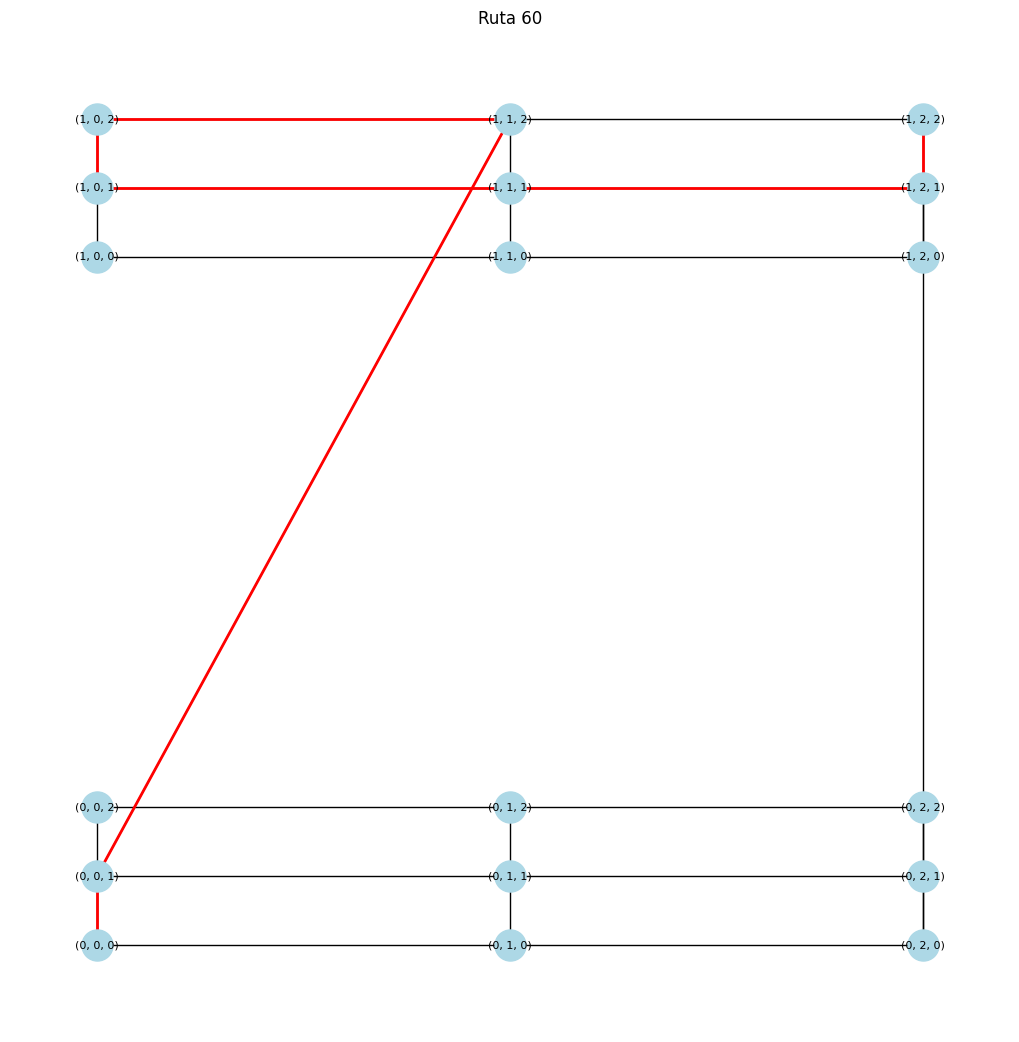

Ruta 61: [(0, 0, 0), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


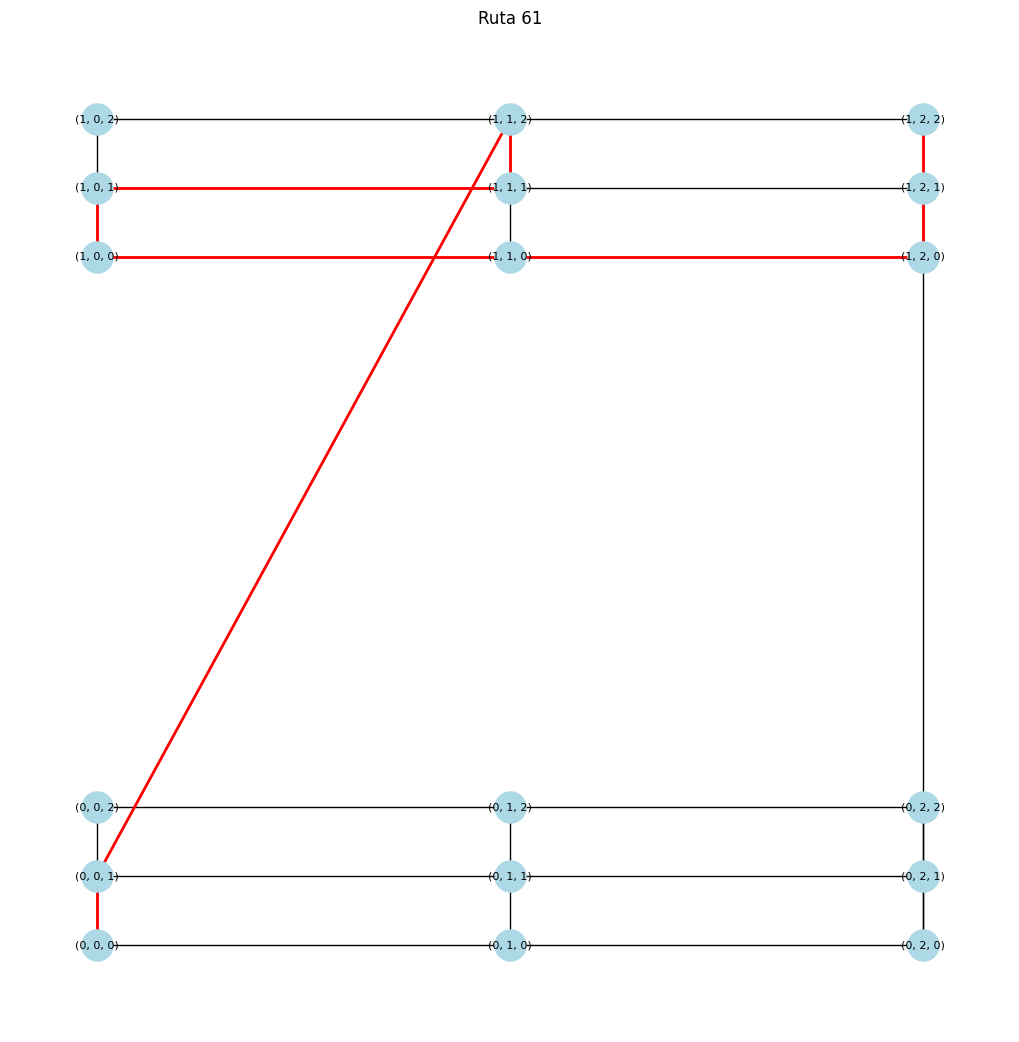

Ruta 62: [(0, 0, 0), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


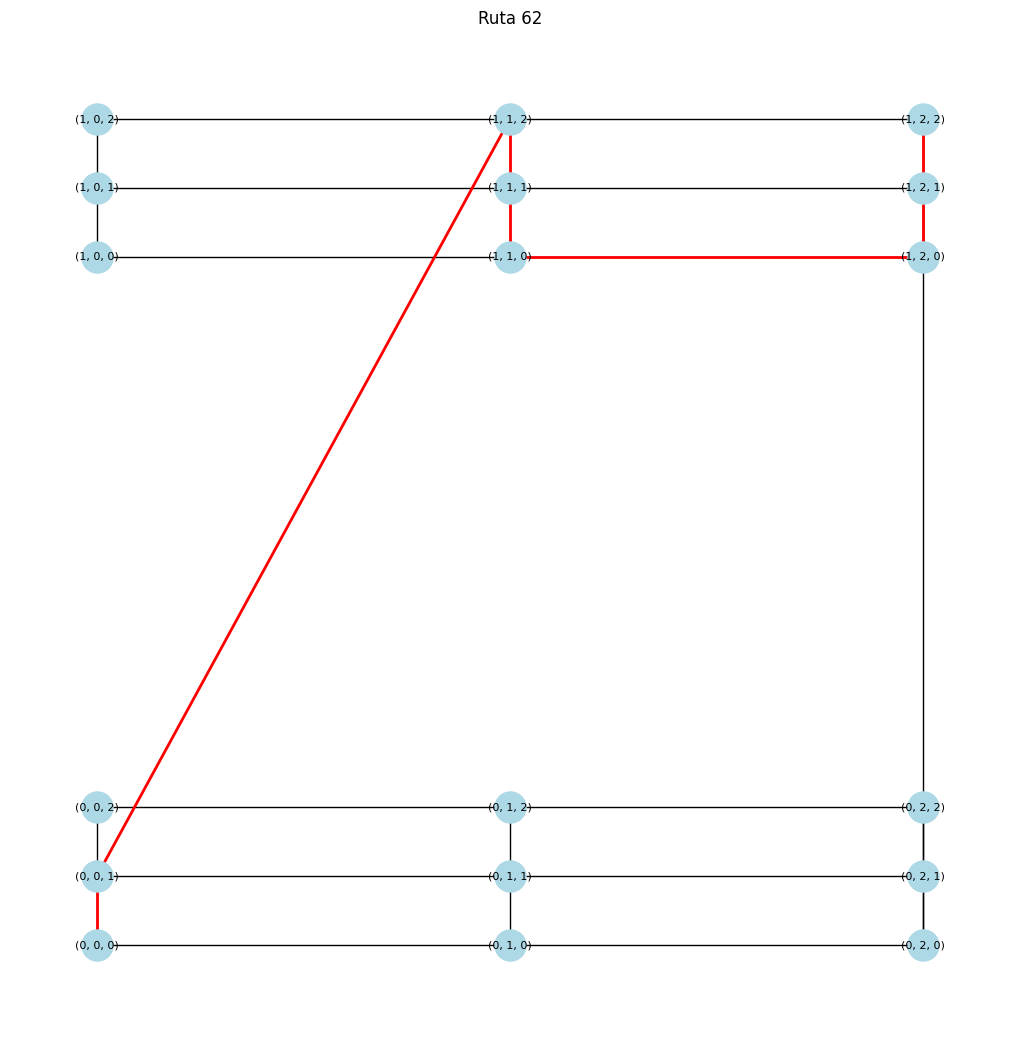

Ruta 63: [(0, 0, 0), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


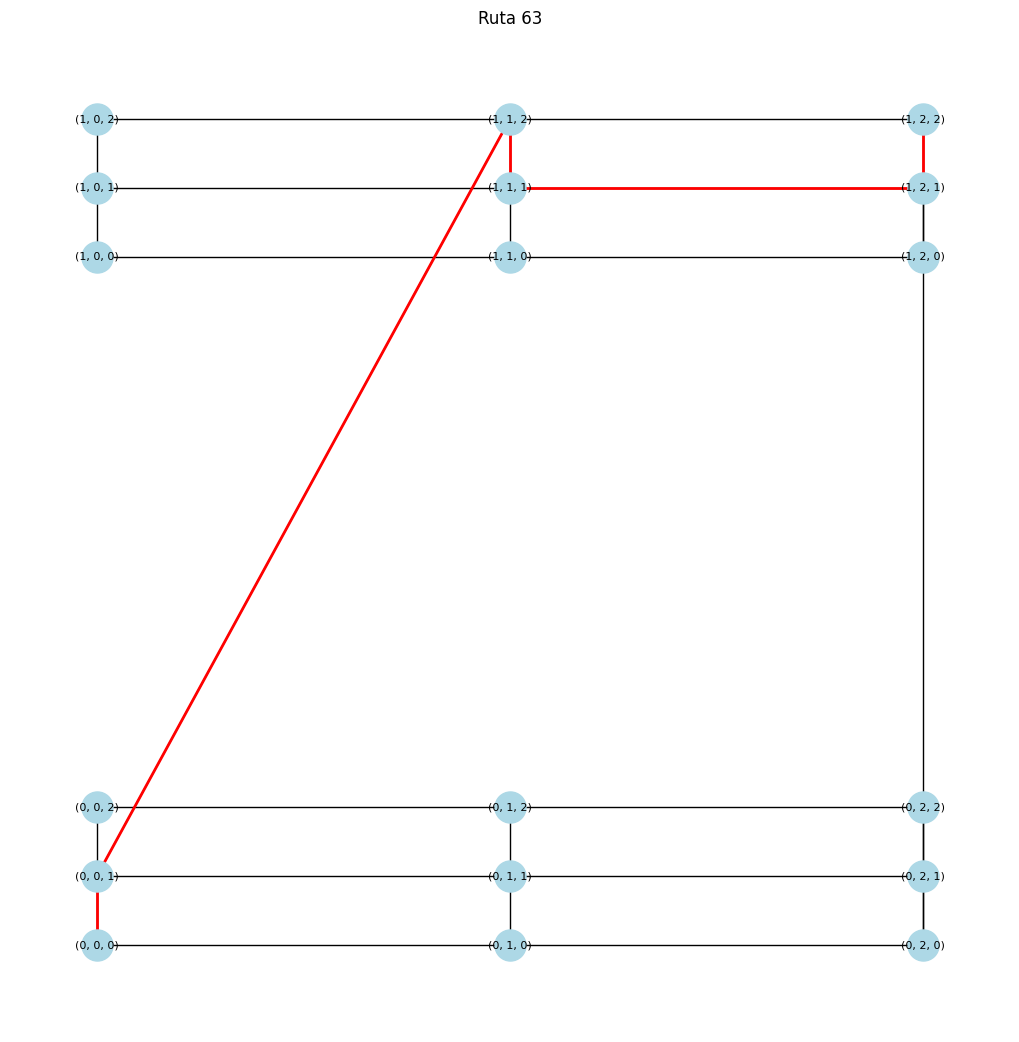

Ruta 64: [(0, 0, 0), (0, 0, 1), (1, 1, 2), (1, 2, 2)]


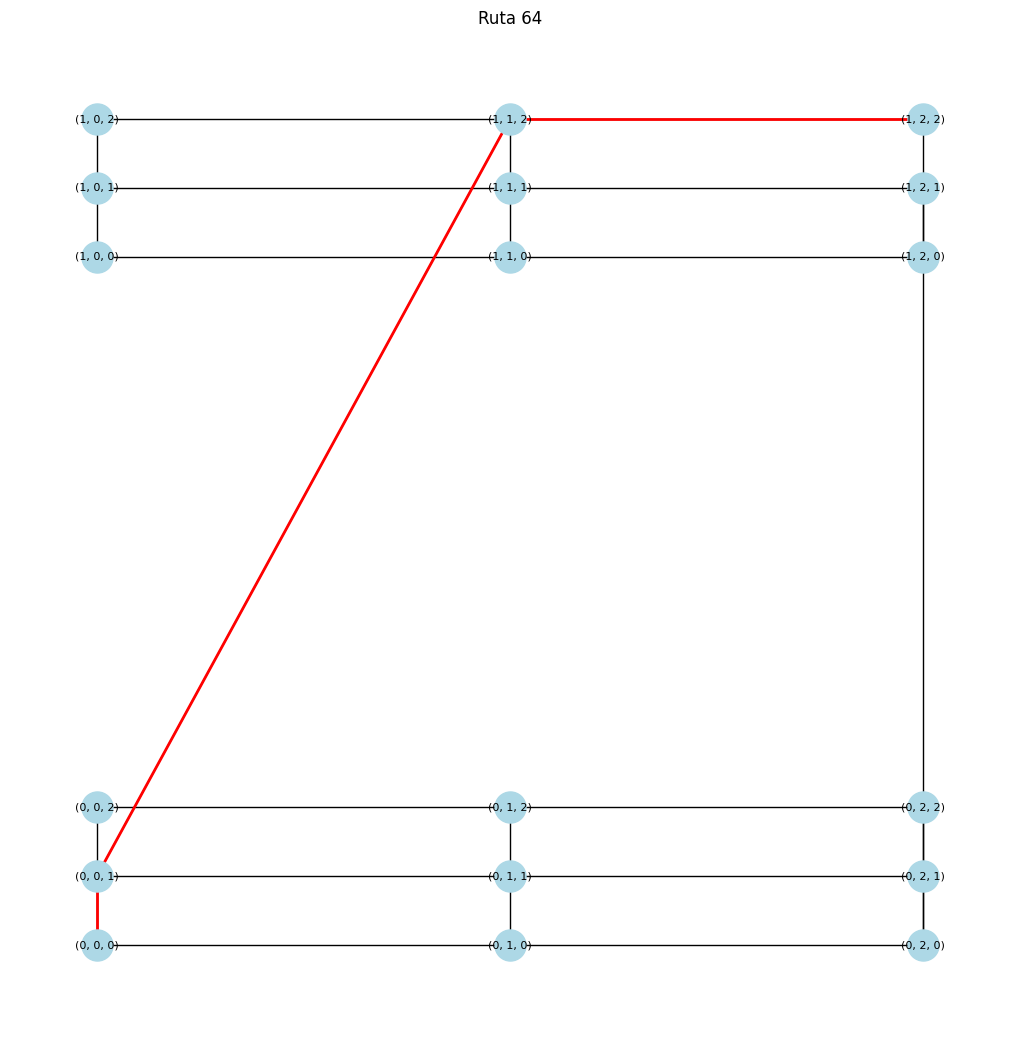

Ruta 65: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


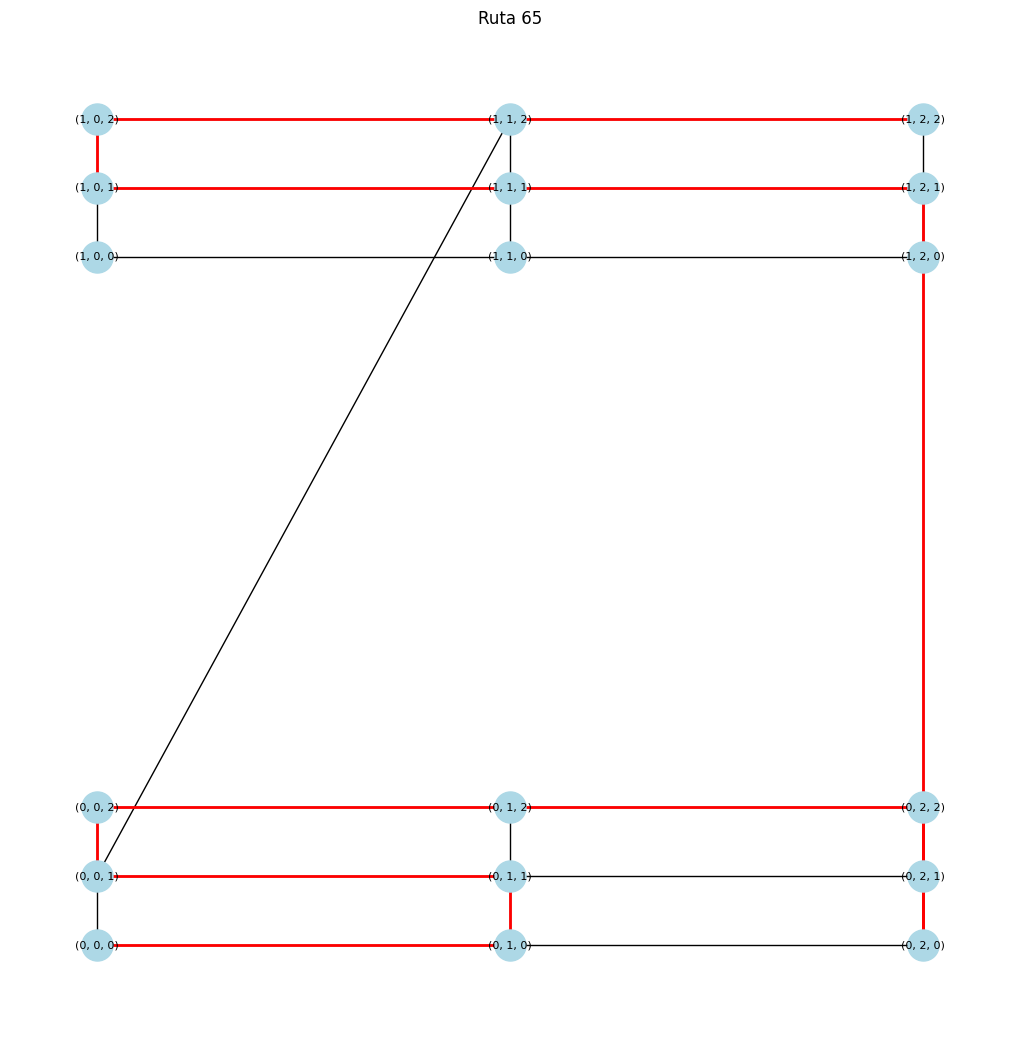

Ruta 66: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


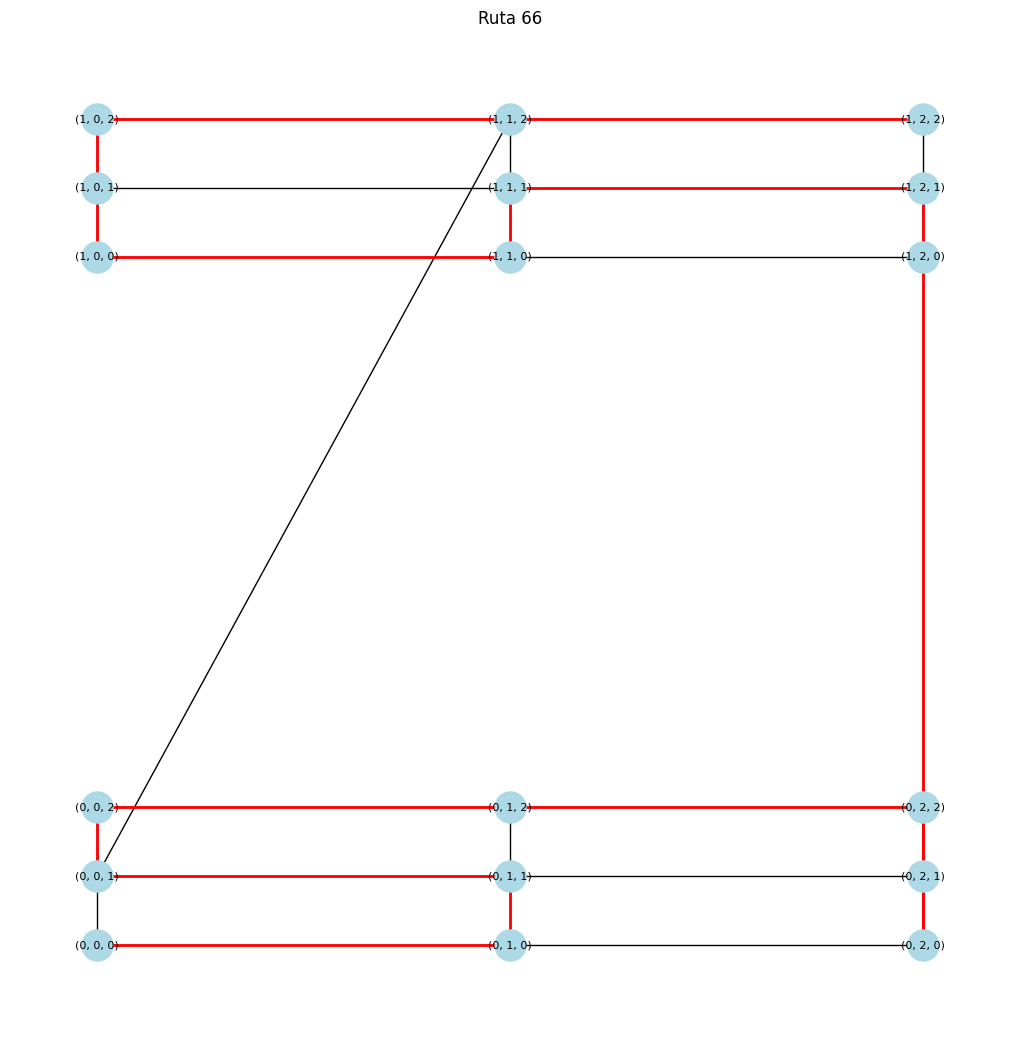

Ruta 67: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


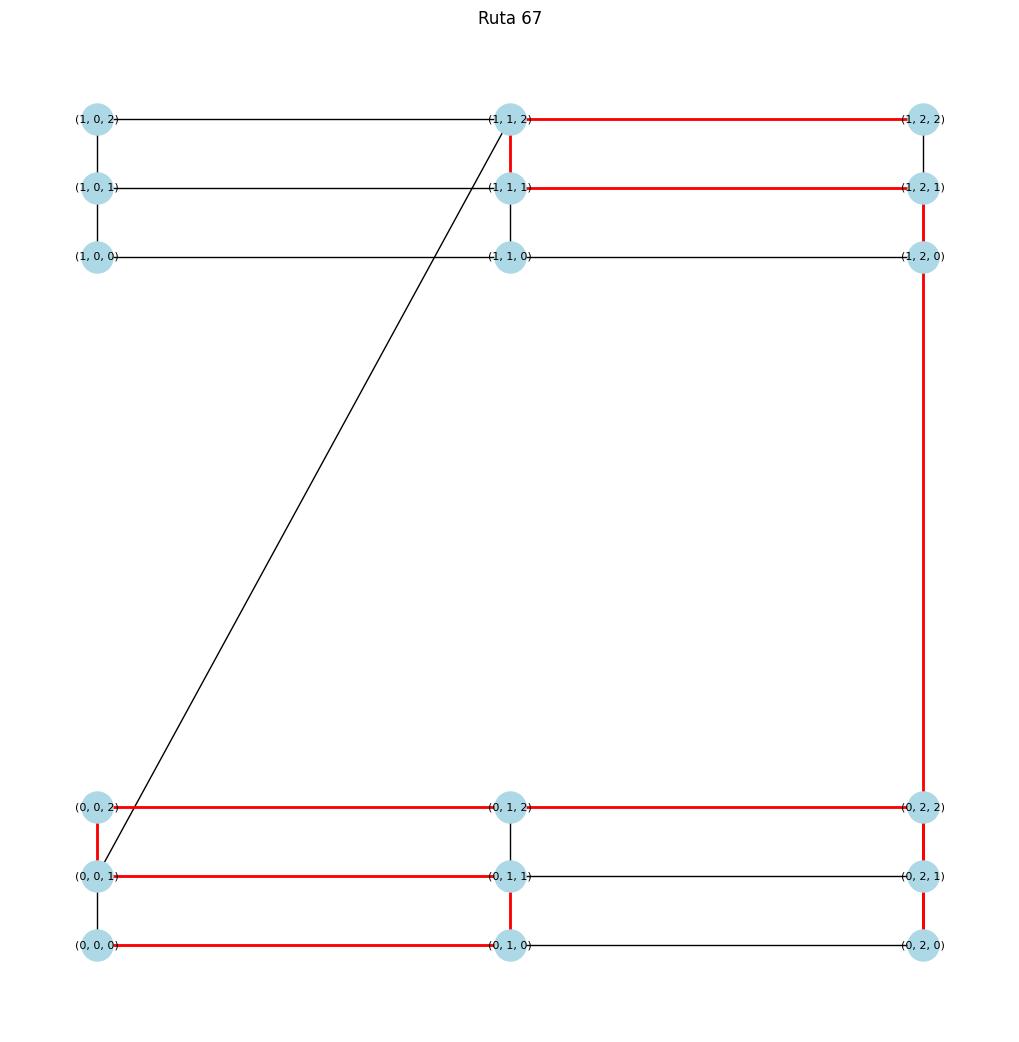

Ruta 68: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


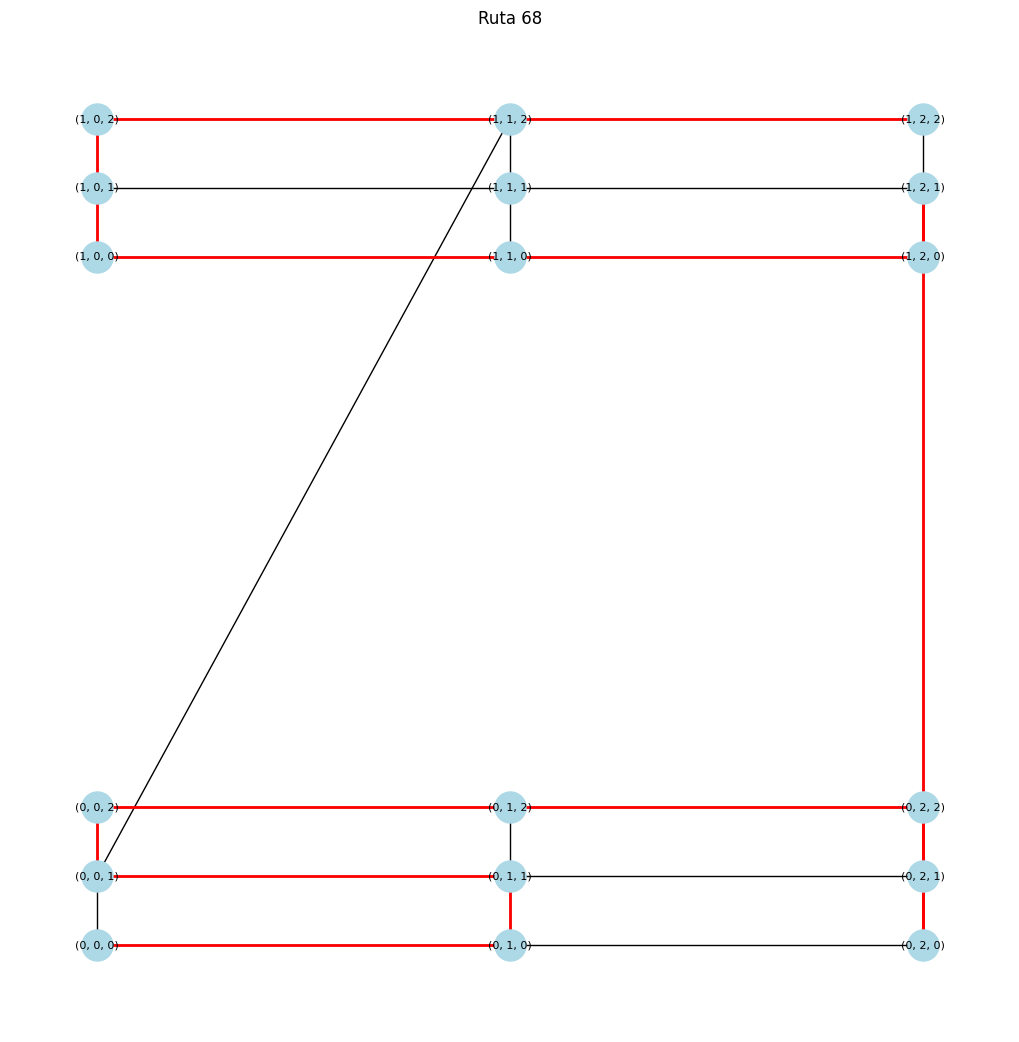

Ruta 69: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


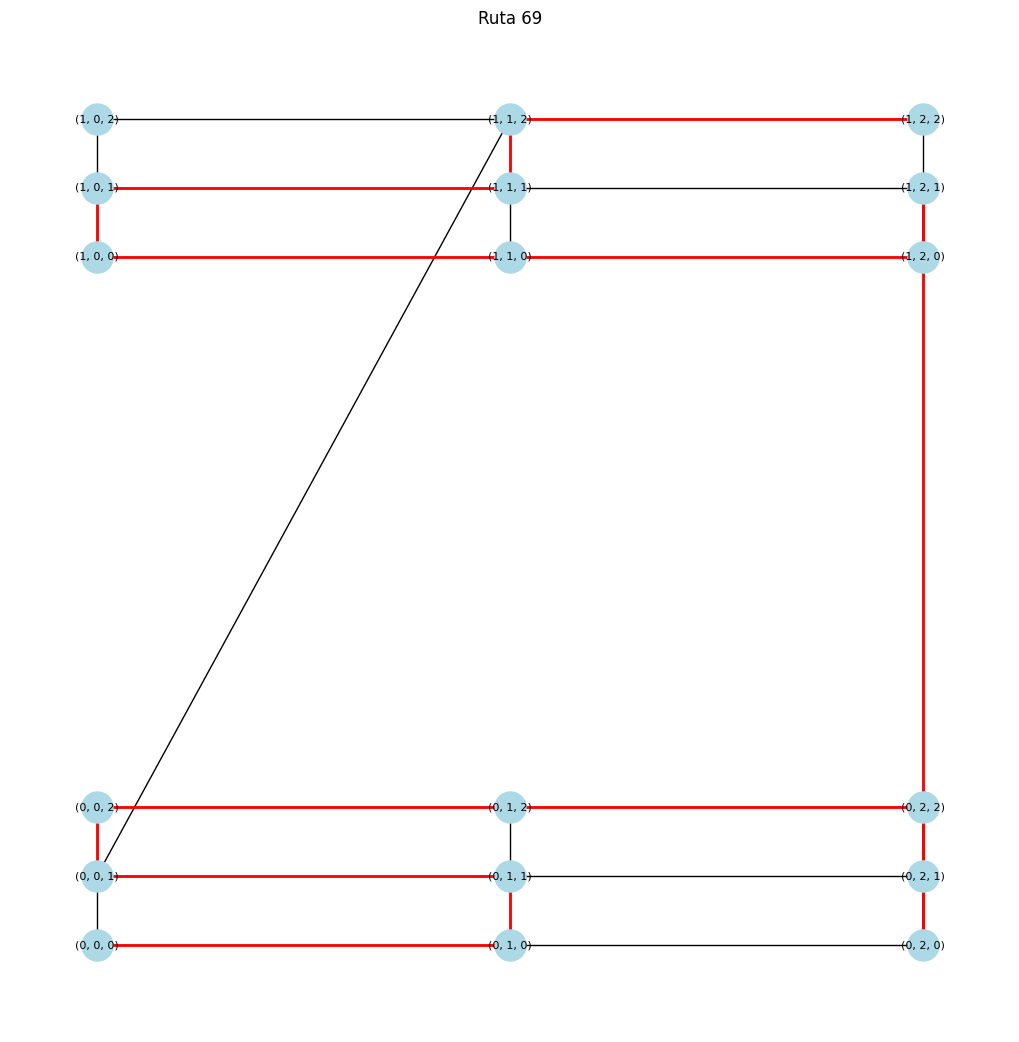

Ruta 70: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


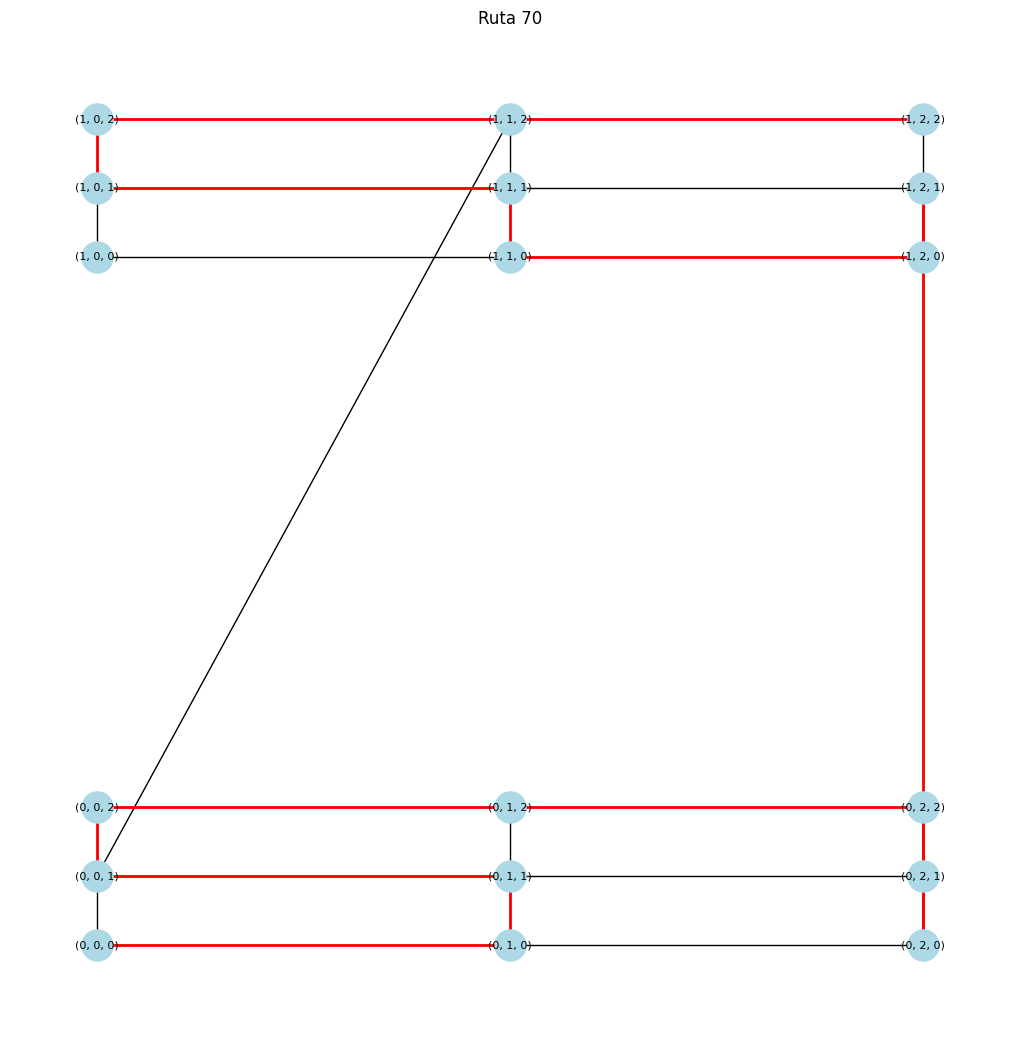

Ruta 71: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


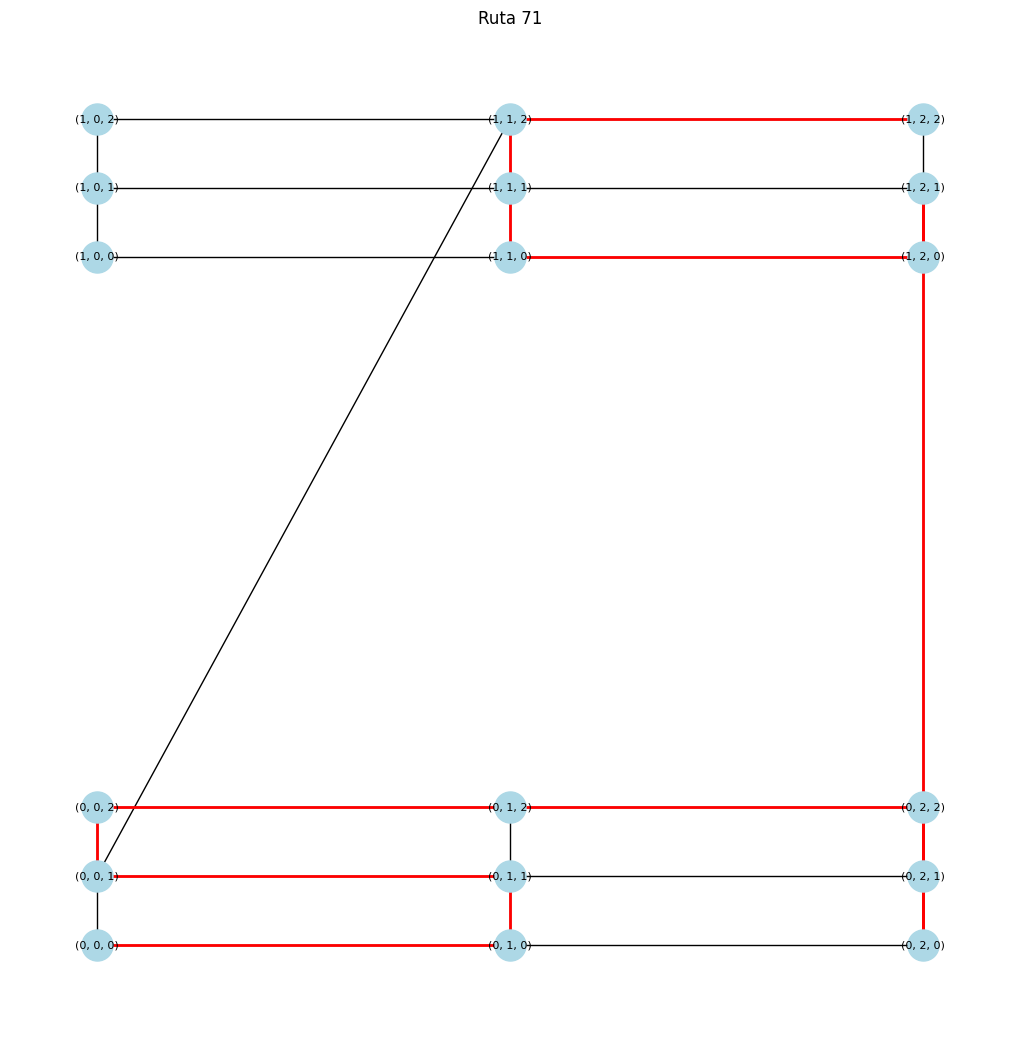

Ruta 72: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0, 0, 2), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 2)]


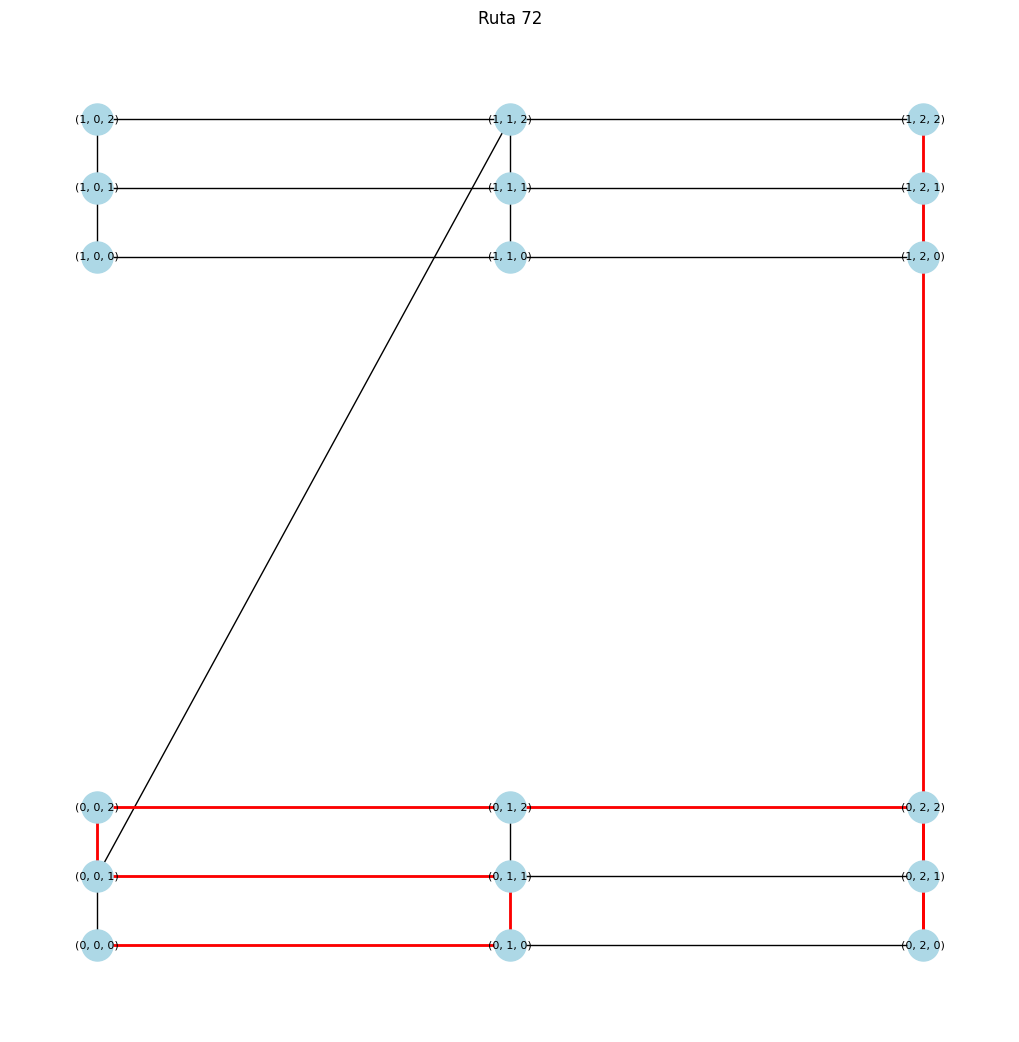

Ruta 73: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


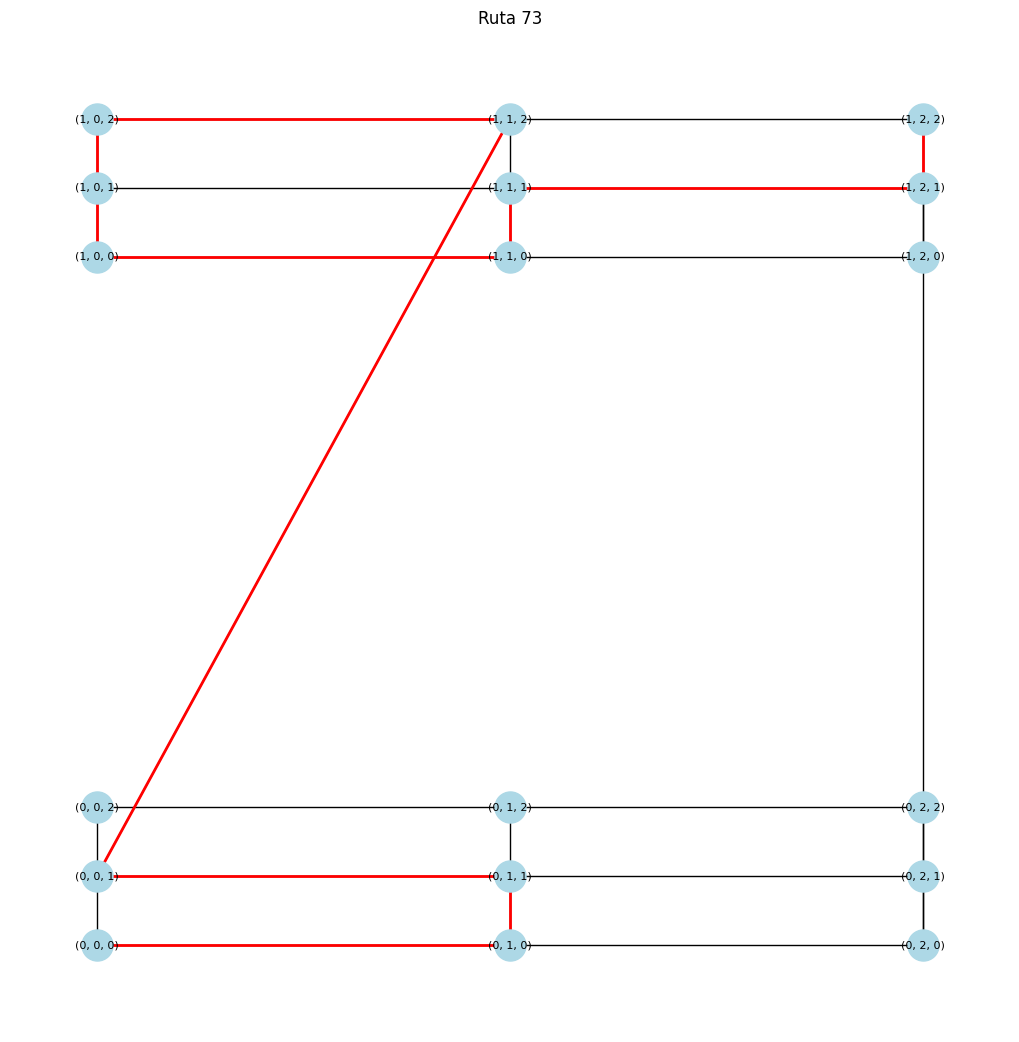

Ruta 74: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


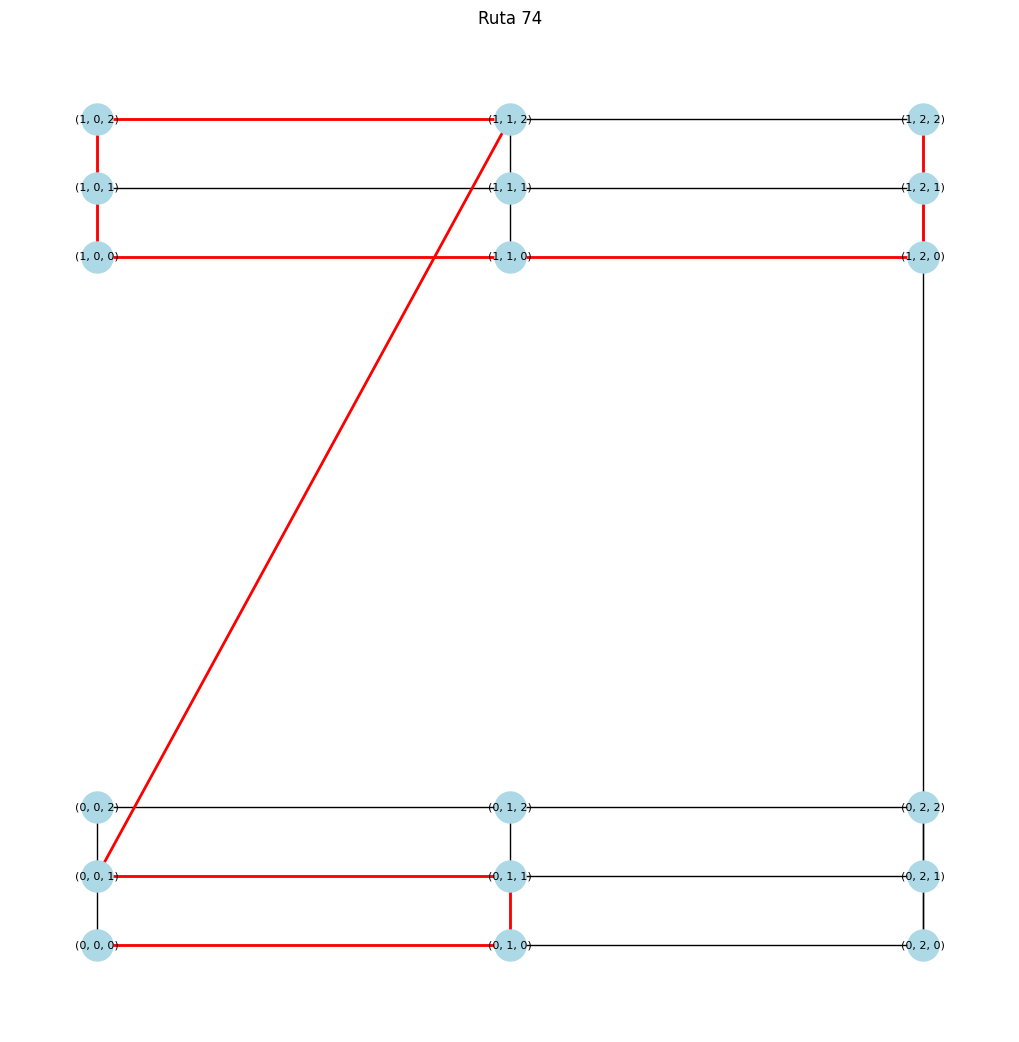

Ruta 75: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


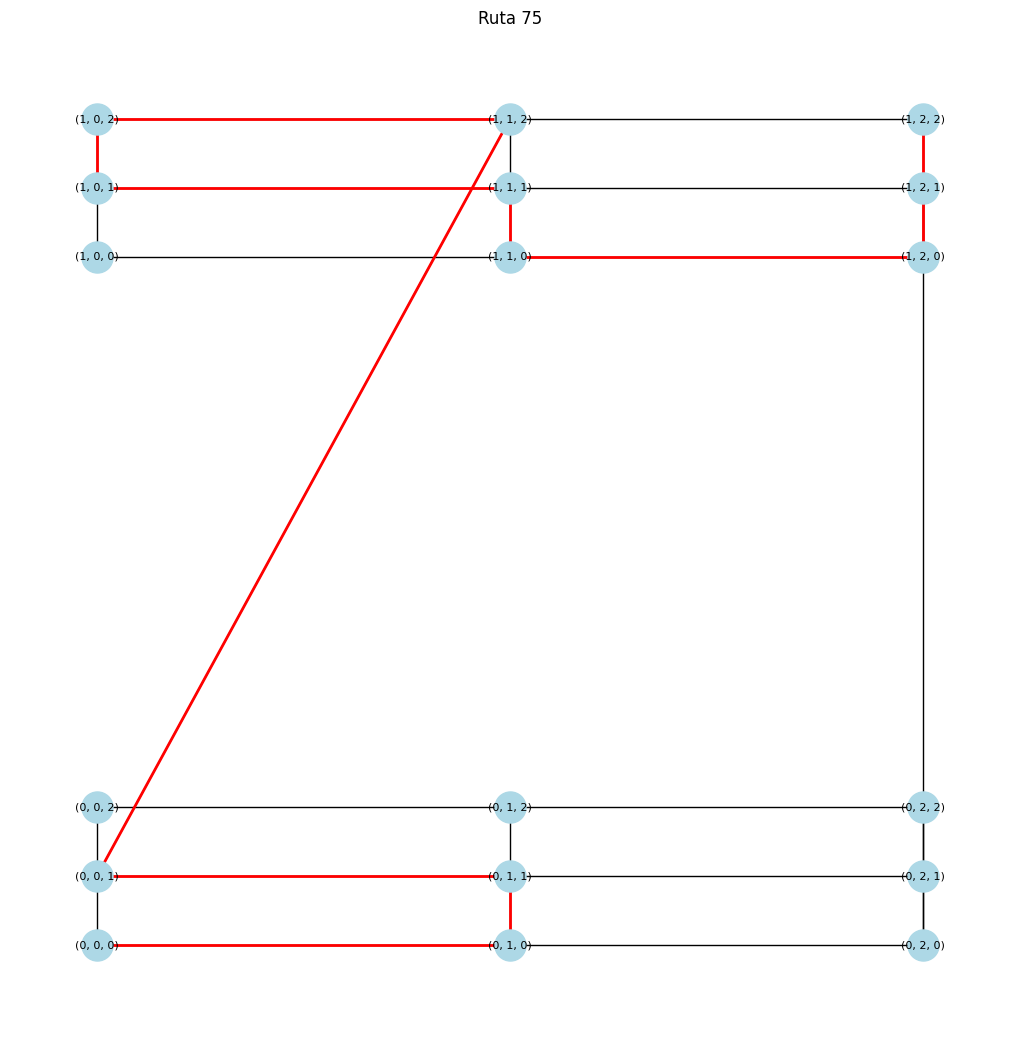

Ruta 76: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


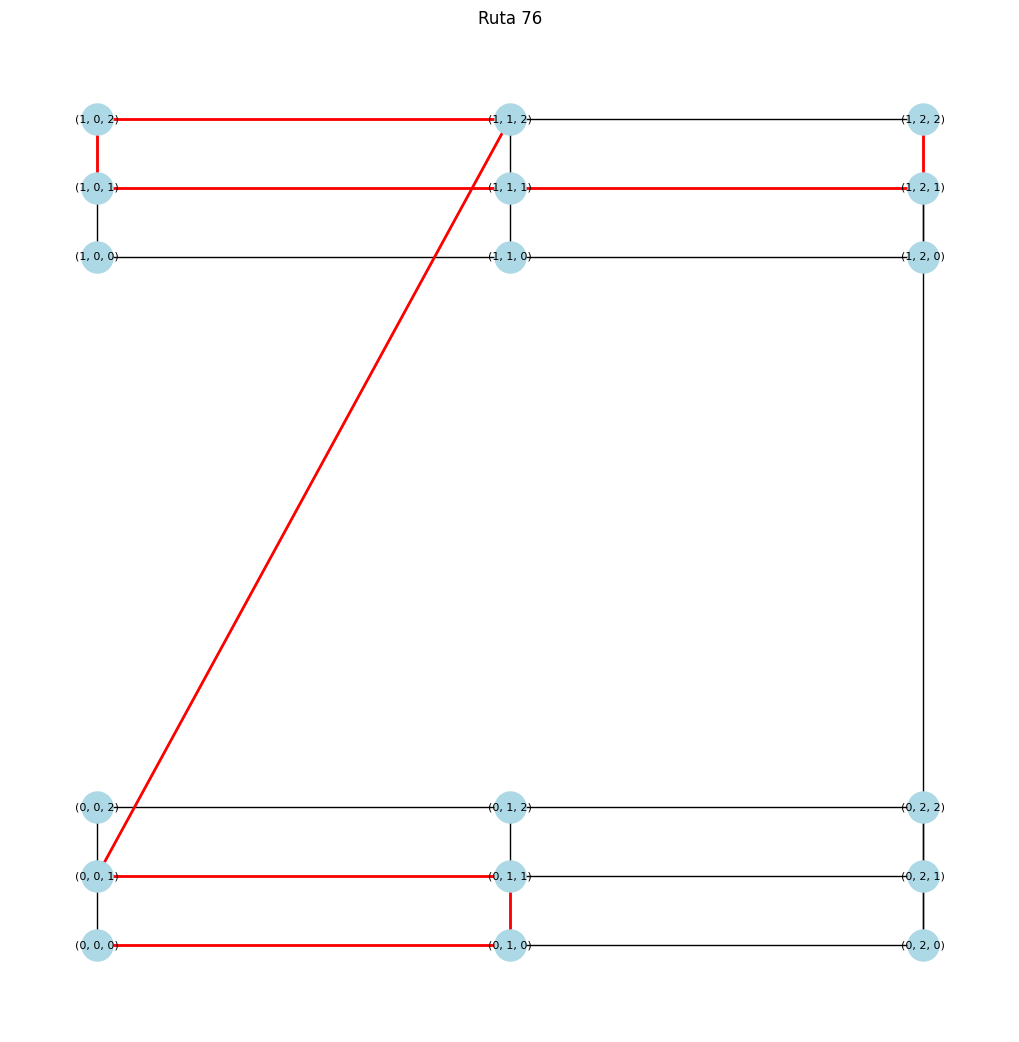

Ruta 77: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


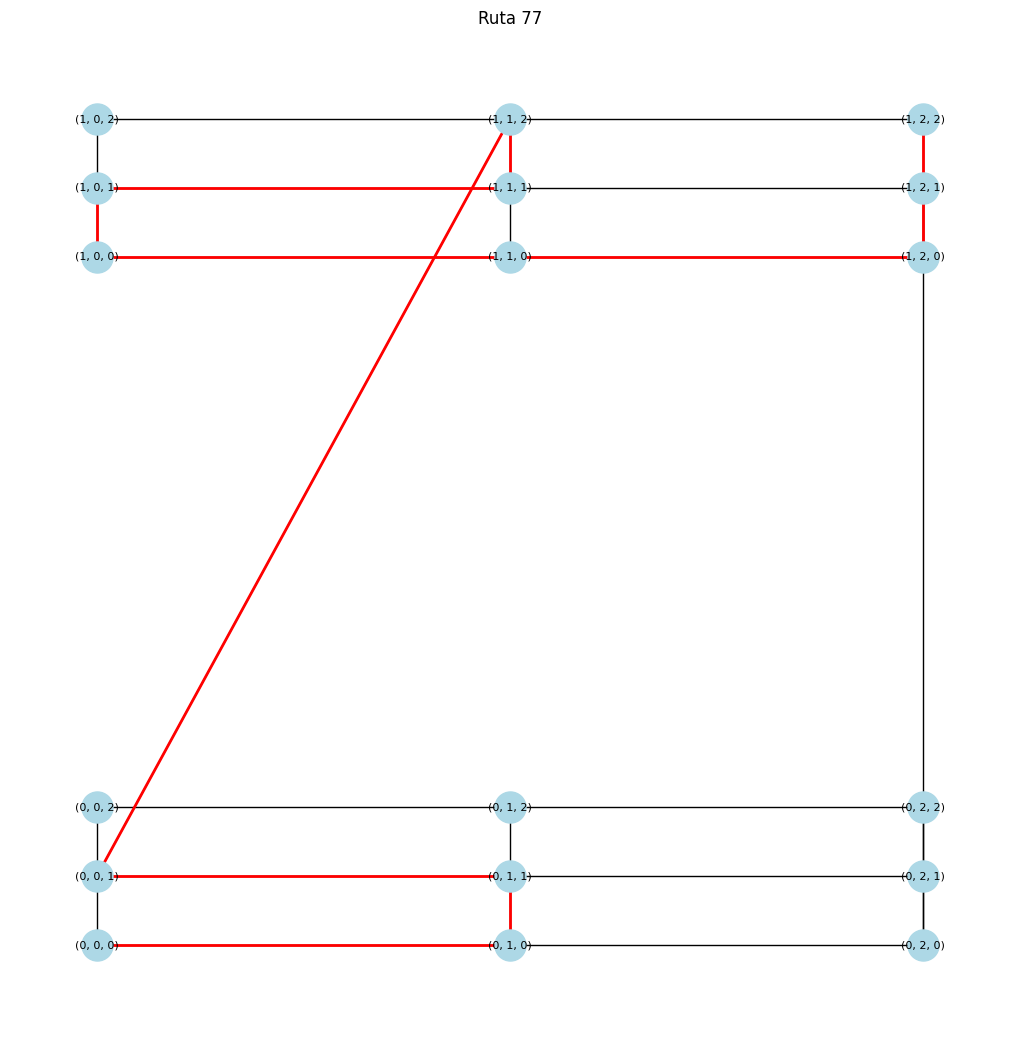

Ruta 78: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


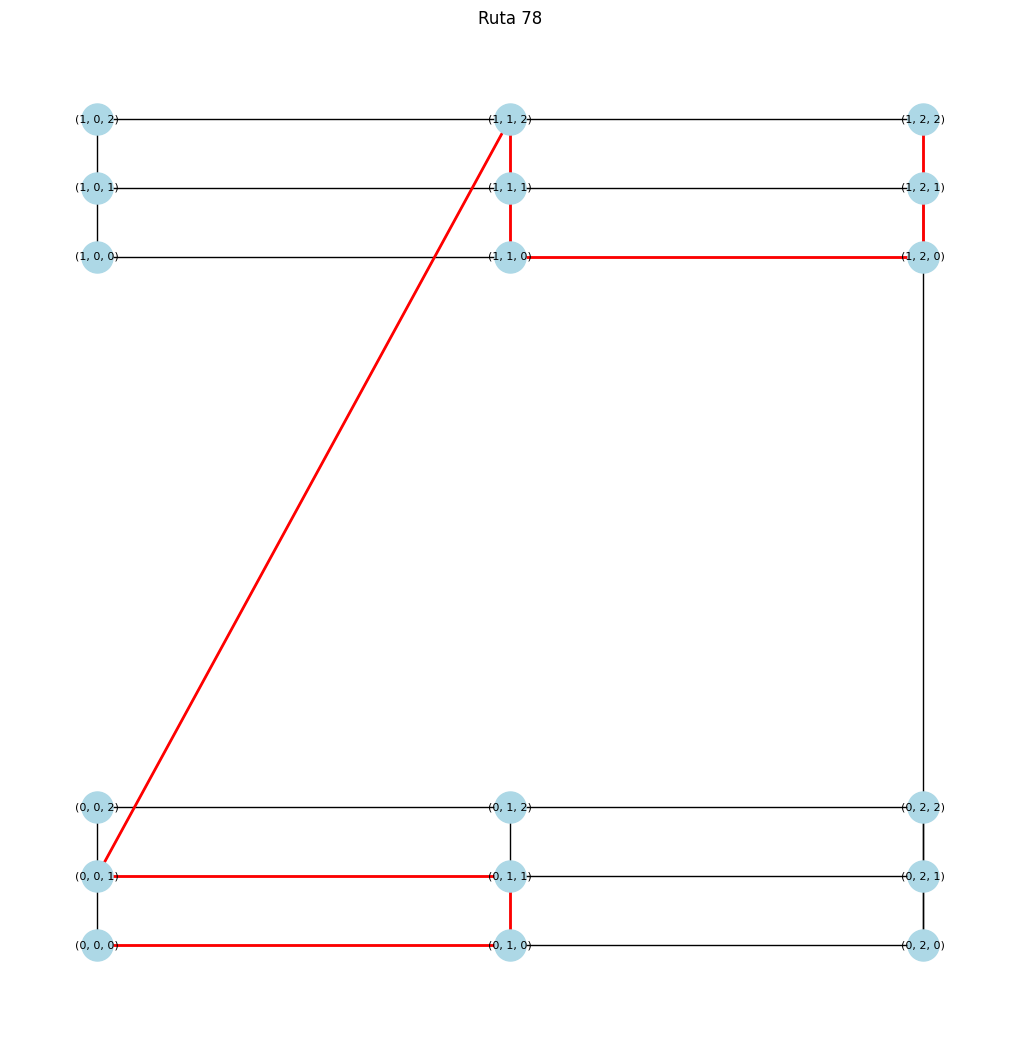

Ruta 79: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


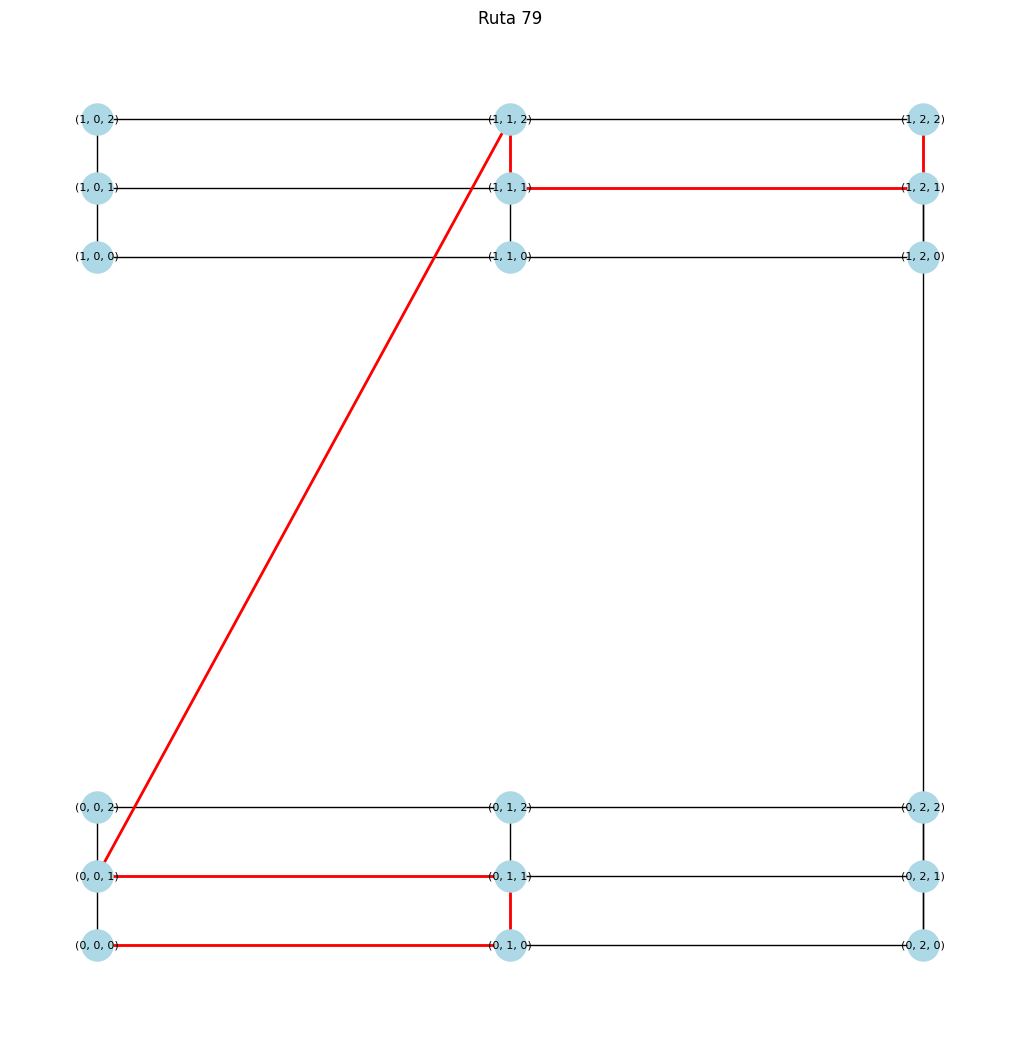

Ruta 80: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 2, 2)]


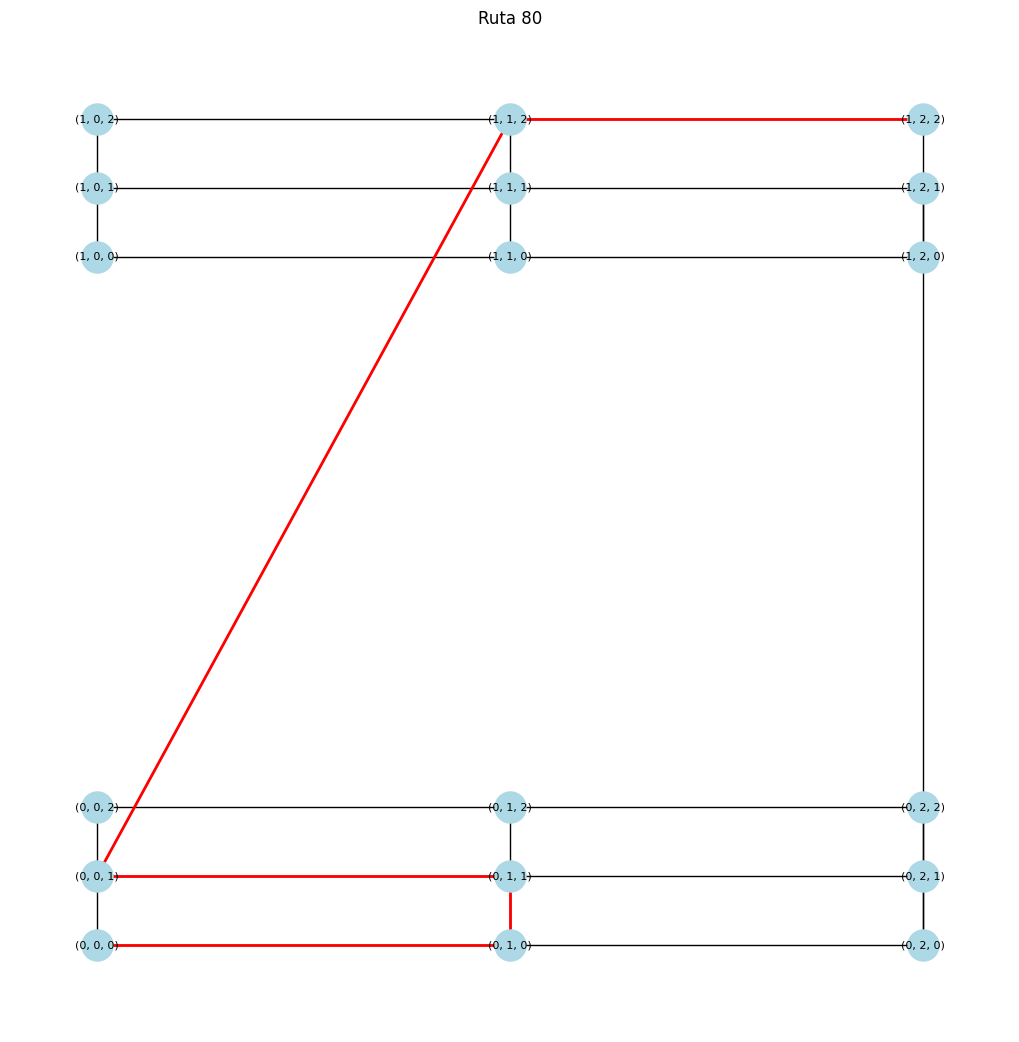

Ruta 81: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


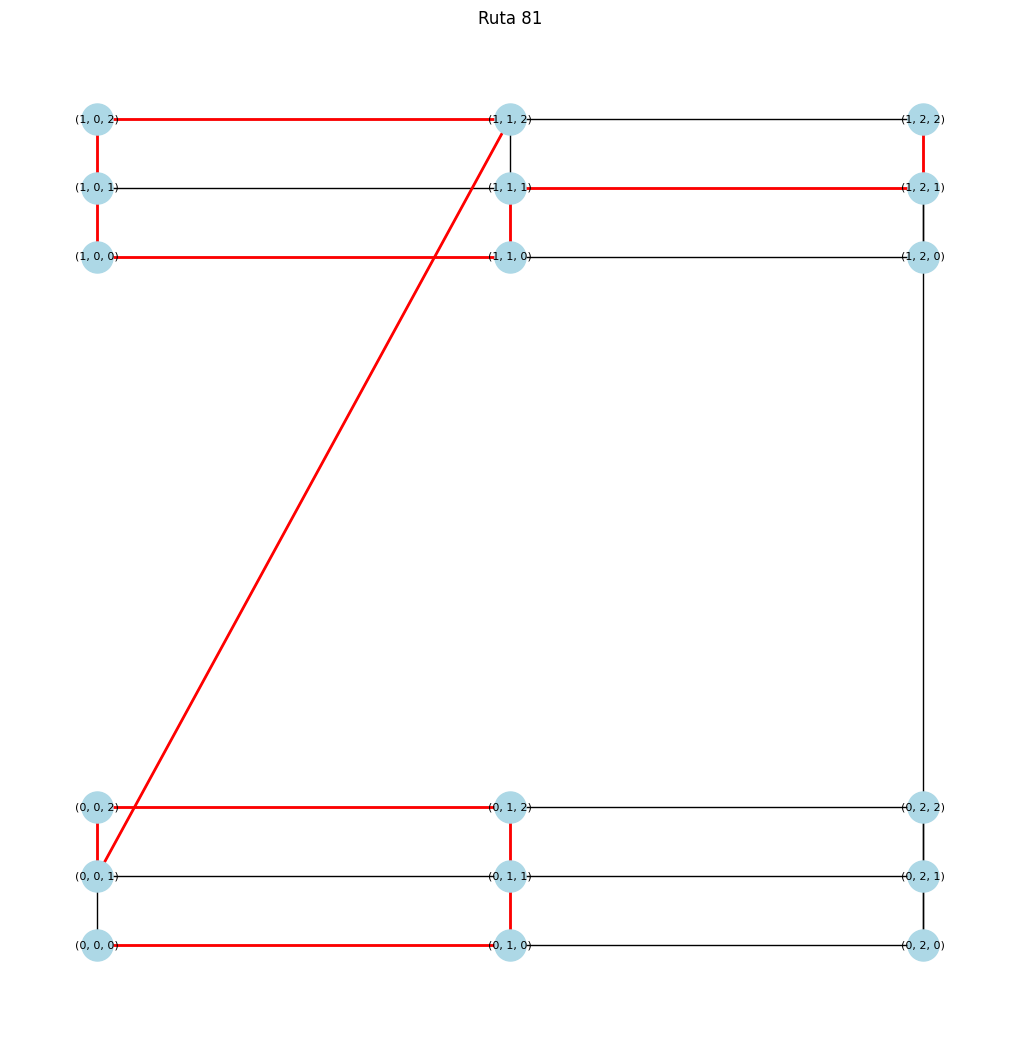

Ruta 82: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


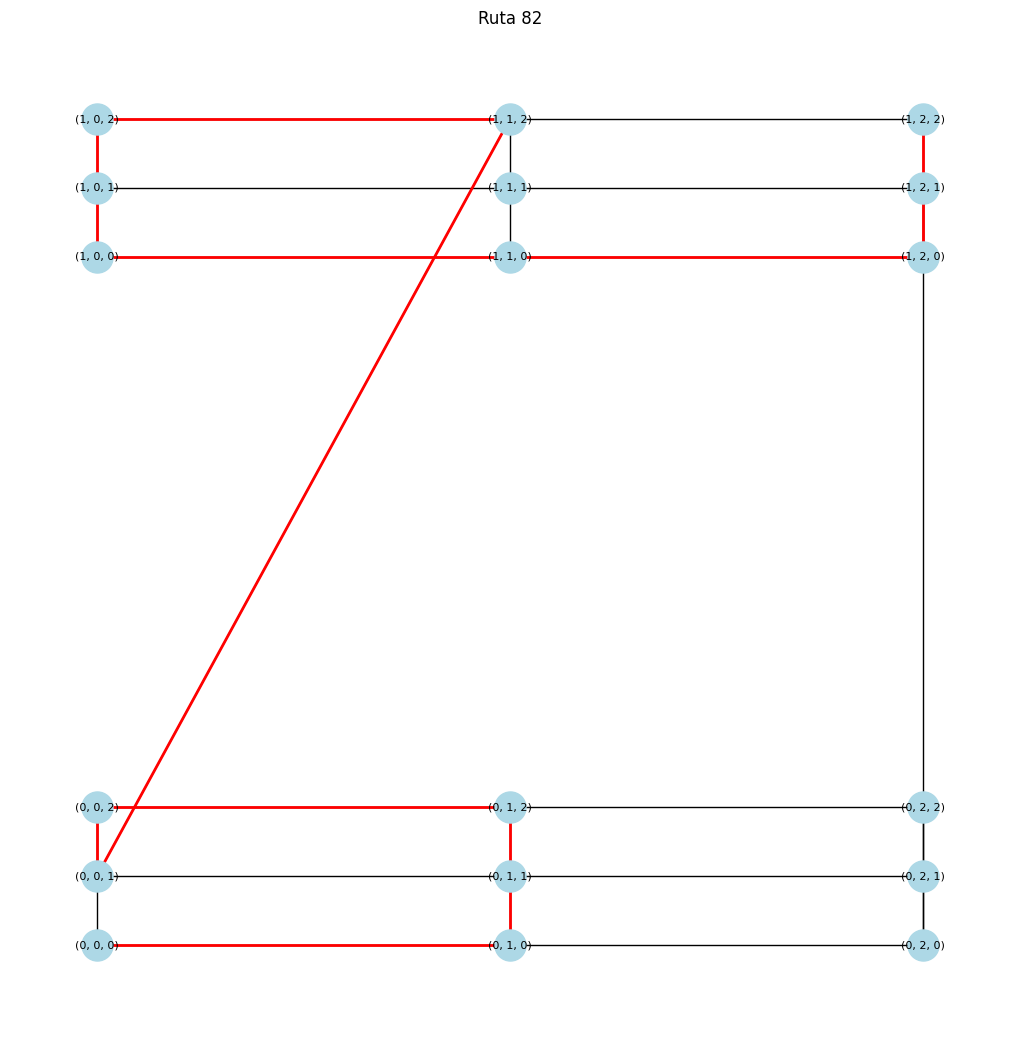

Ruta 83: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


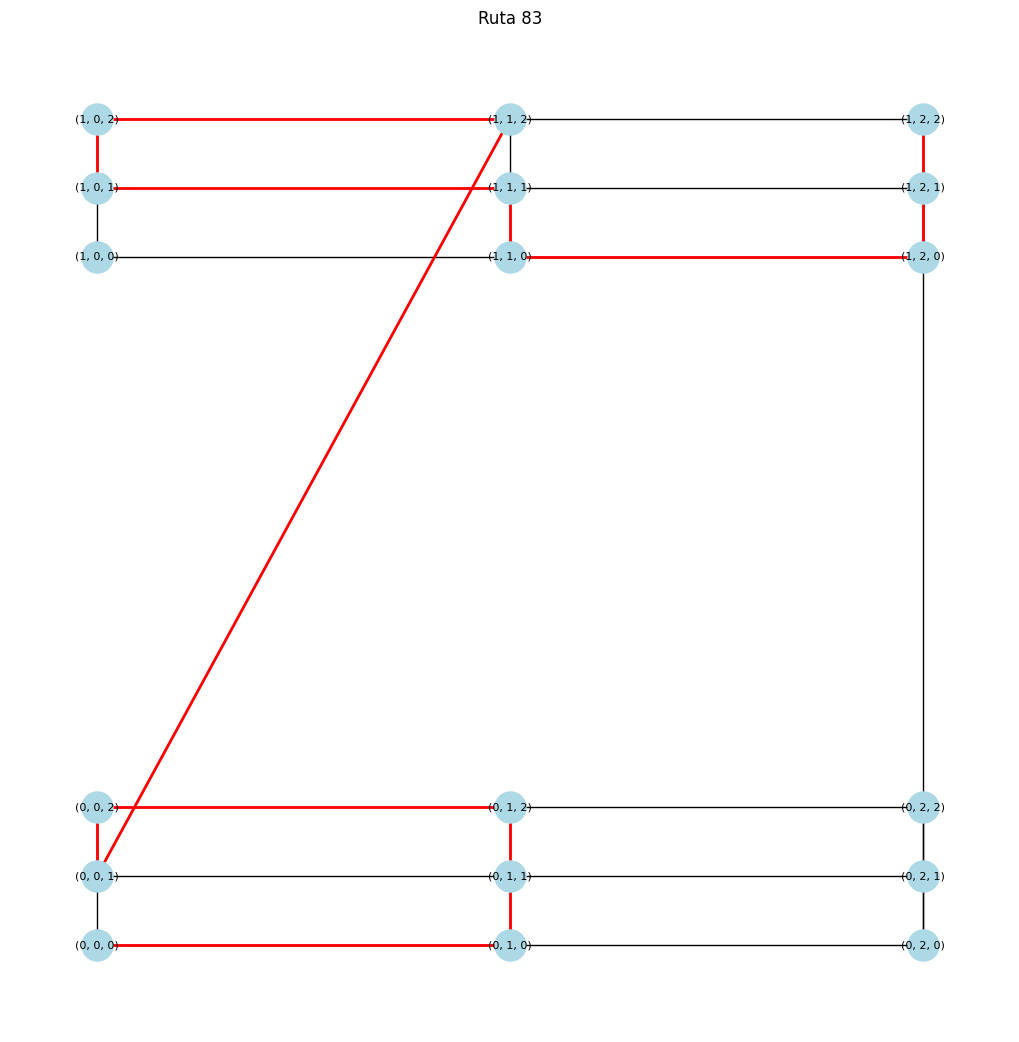

Ruta 84: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


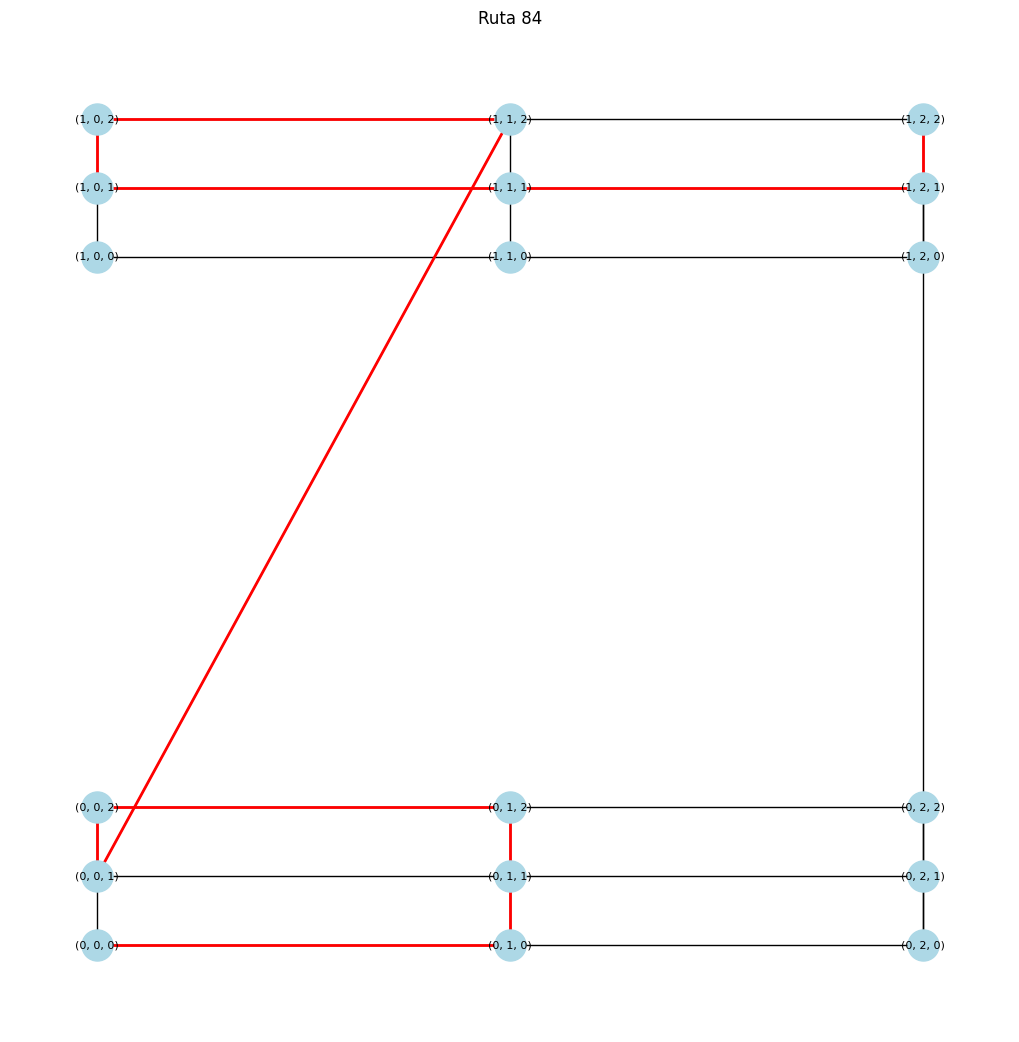

Ruta 85: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


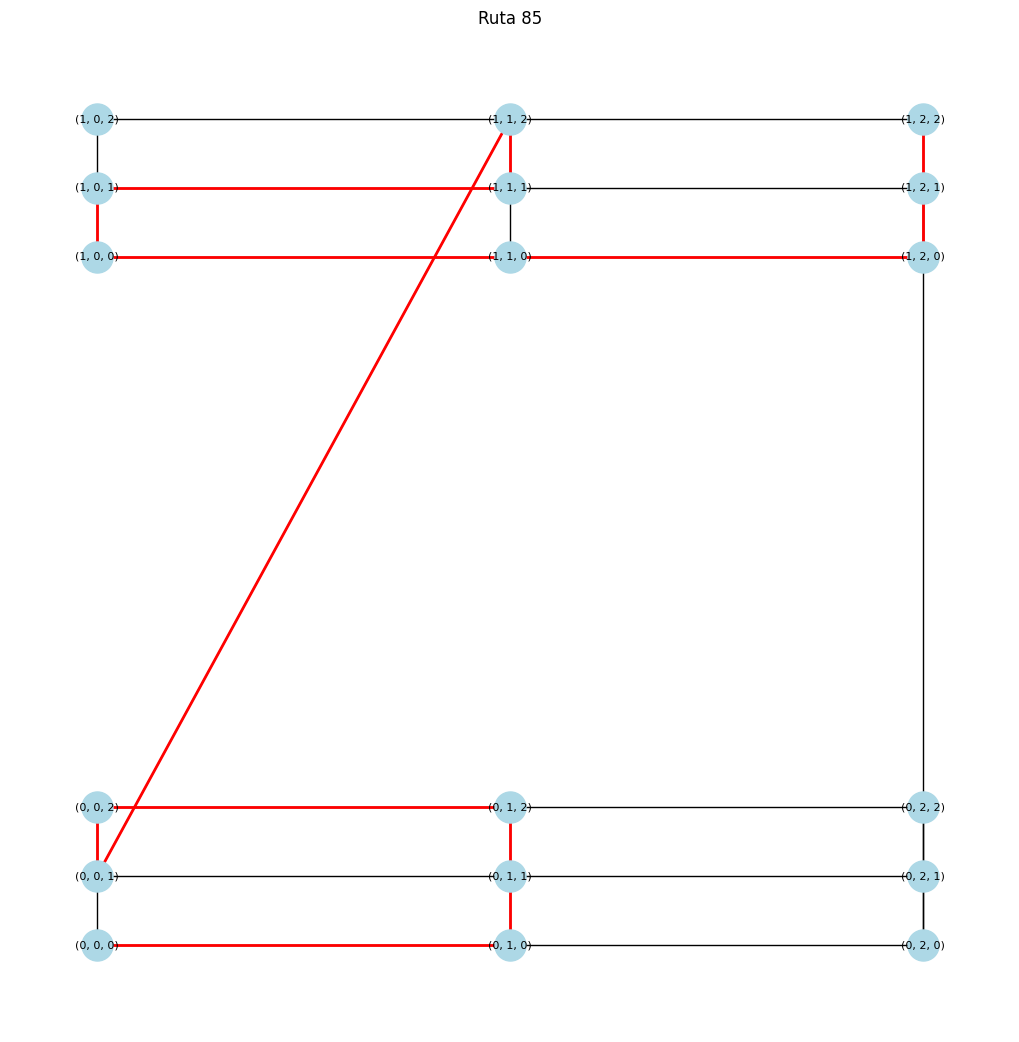

Ruta 86: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


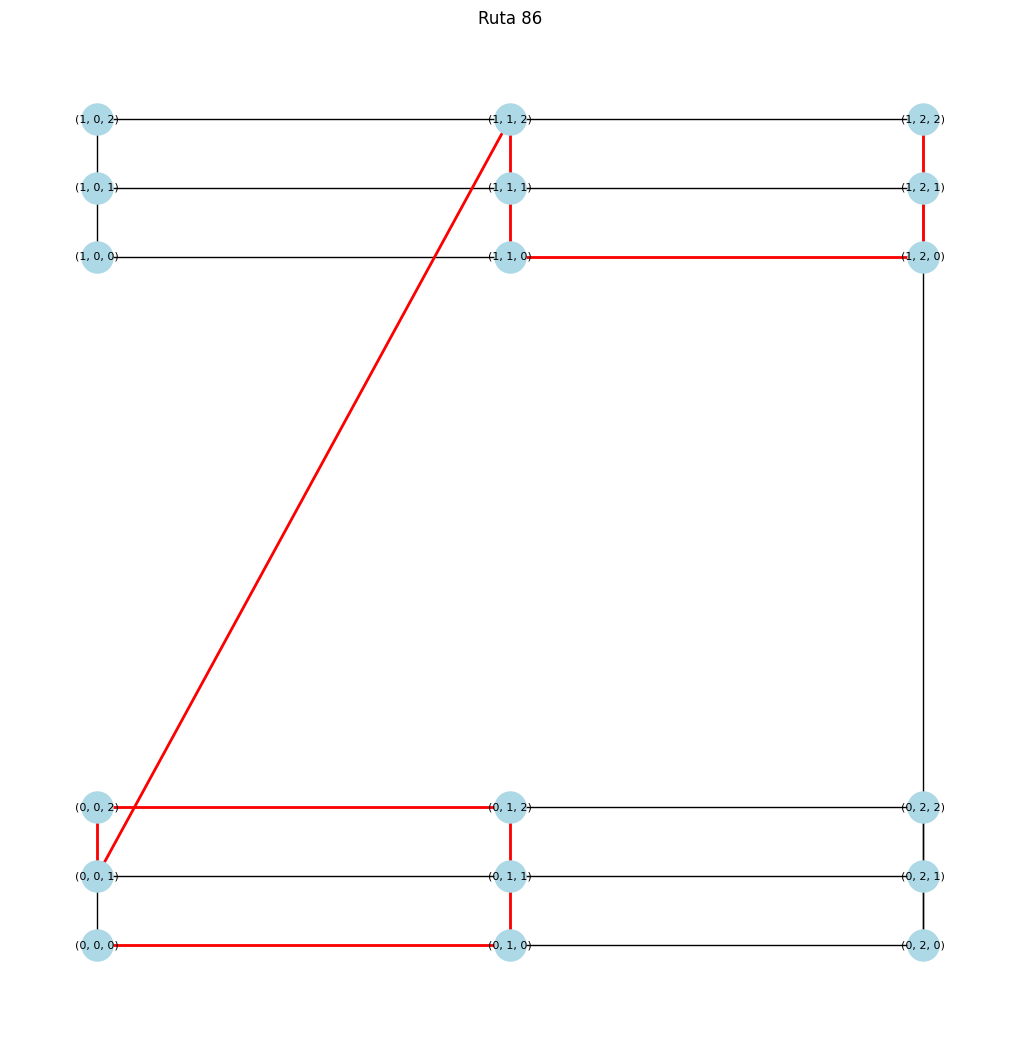

Ruta 87: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


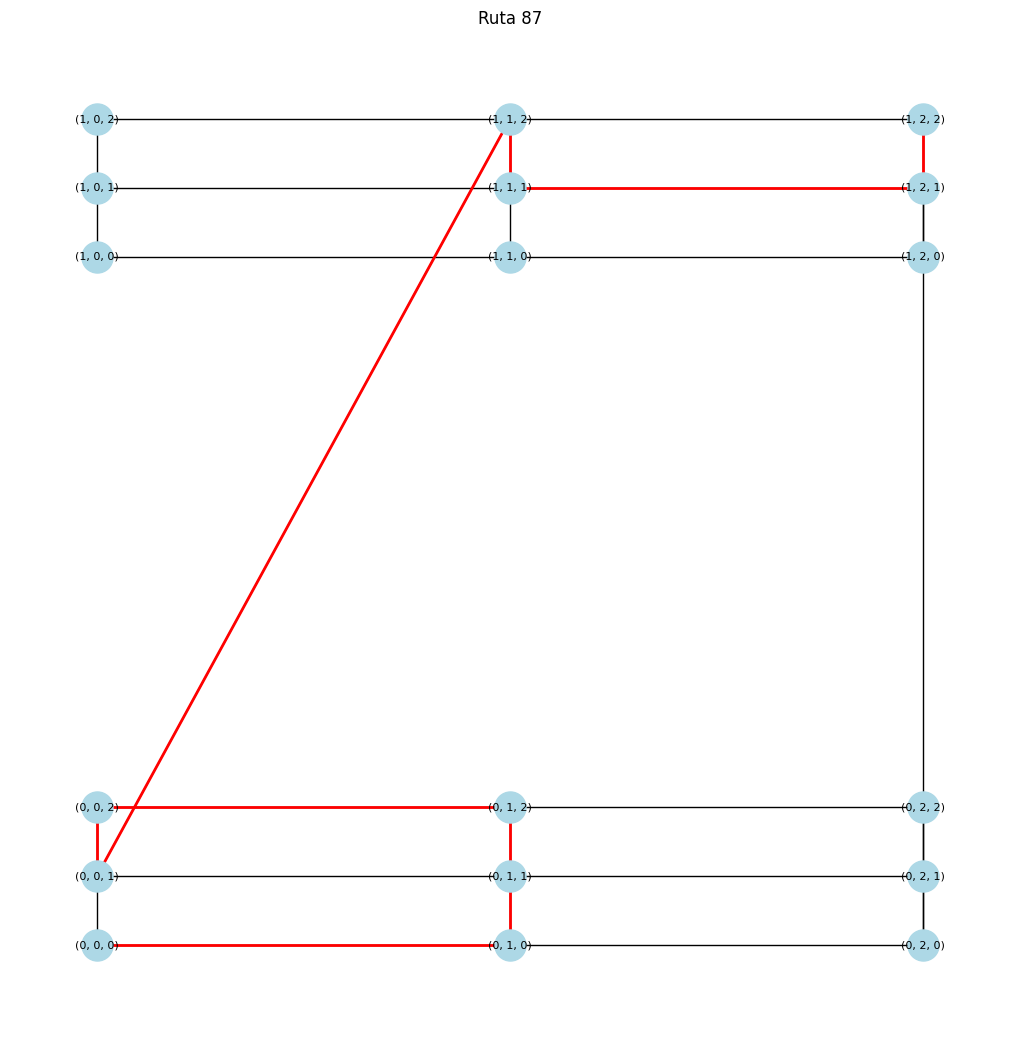

Ruta 88: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 2, 2)]


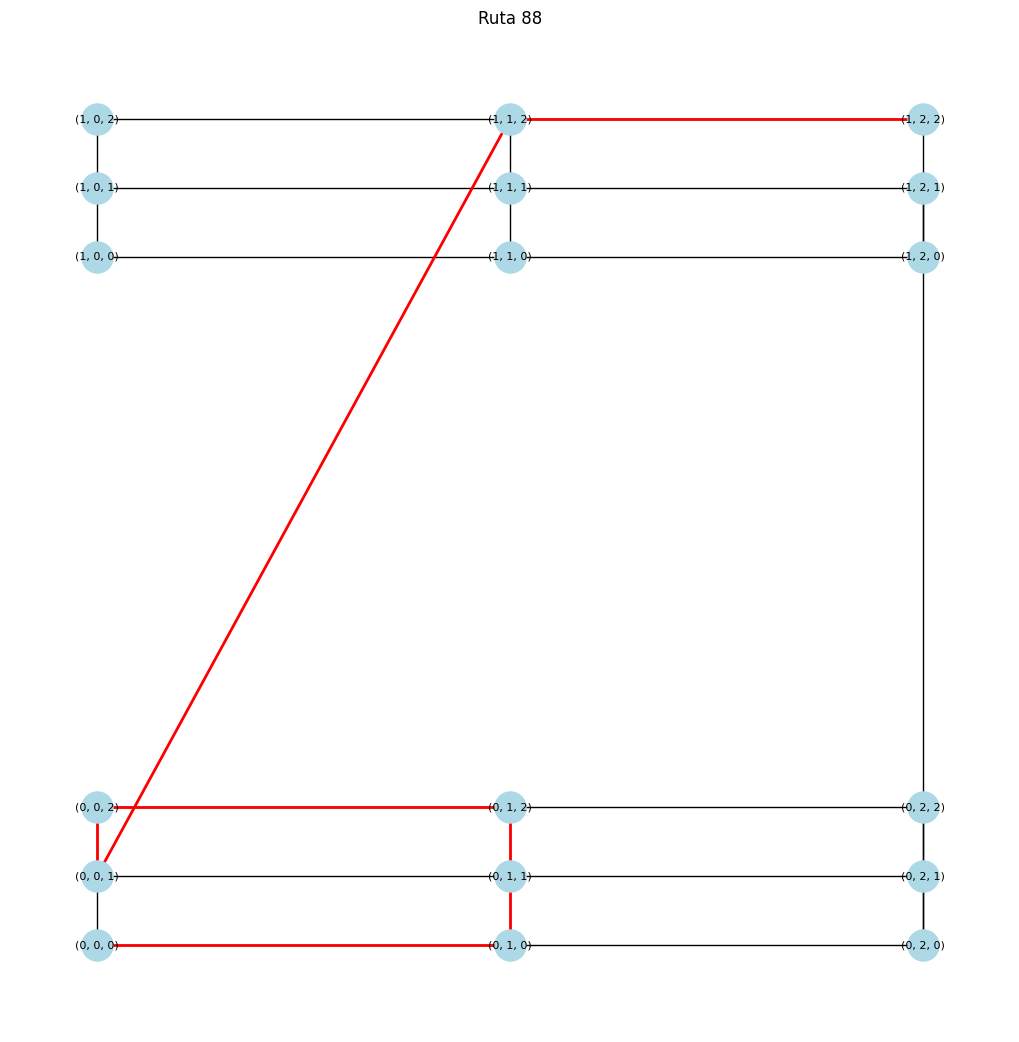

Ruta 89: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


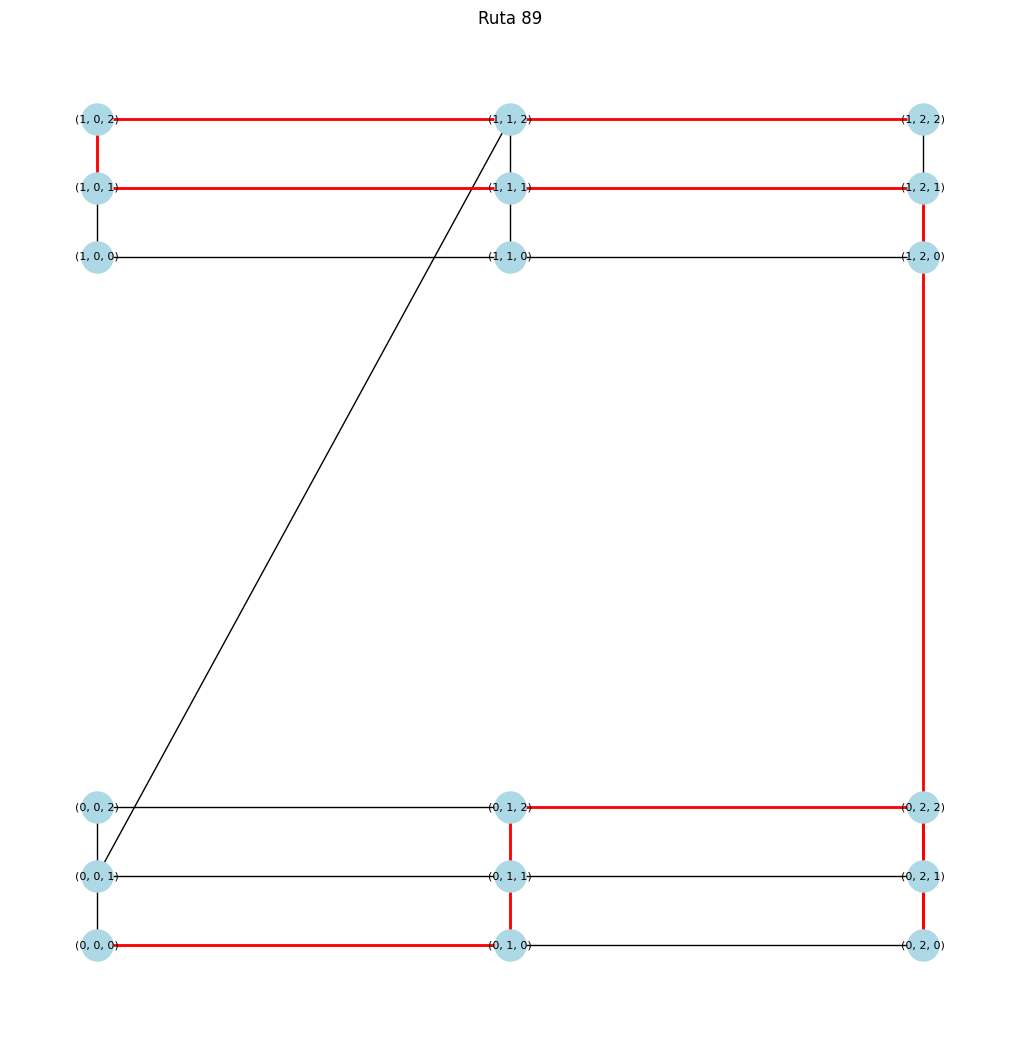

Ruta 90: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


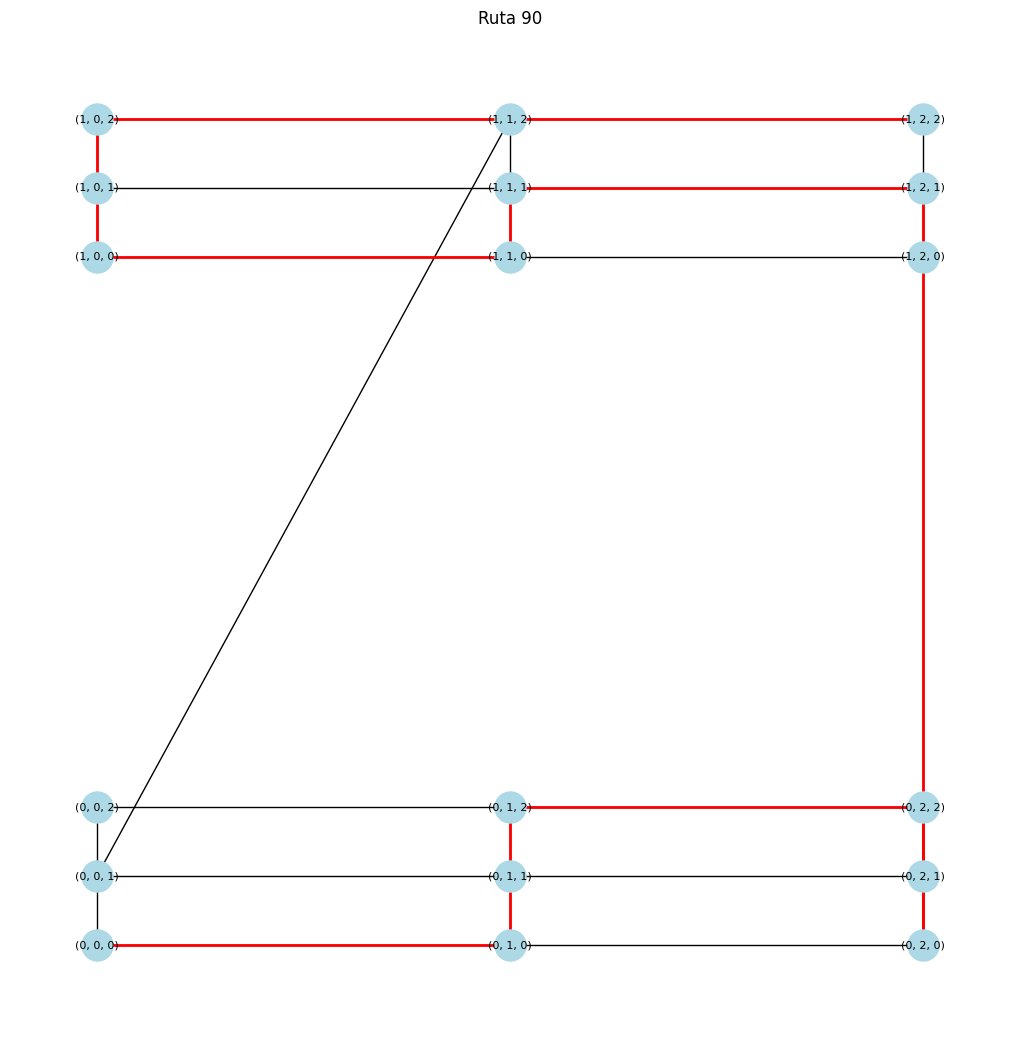

Ruta 91: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


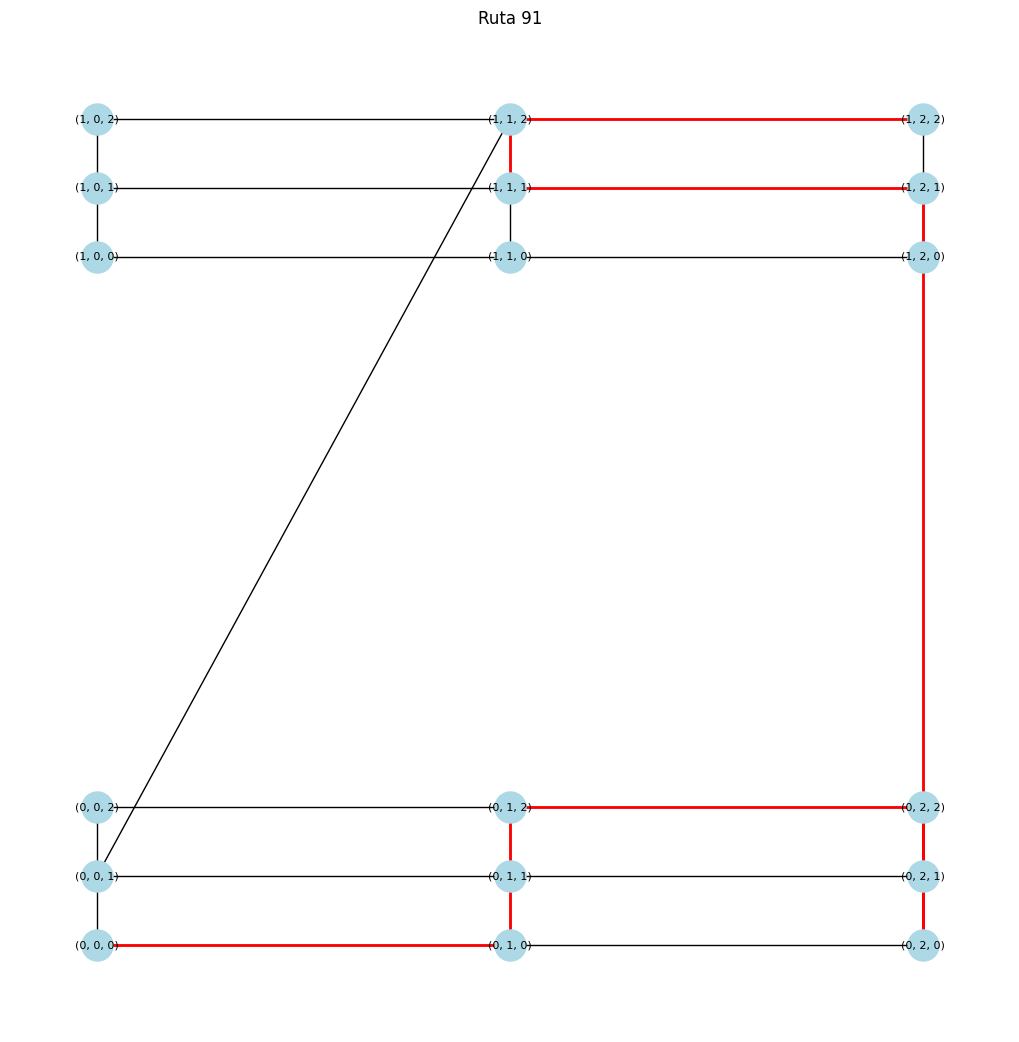

Ruta 92: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


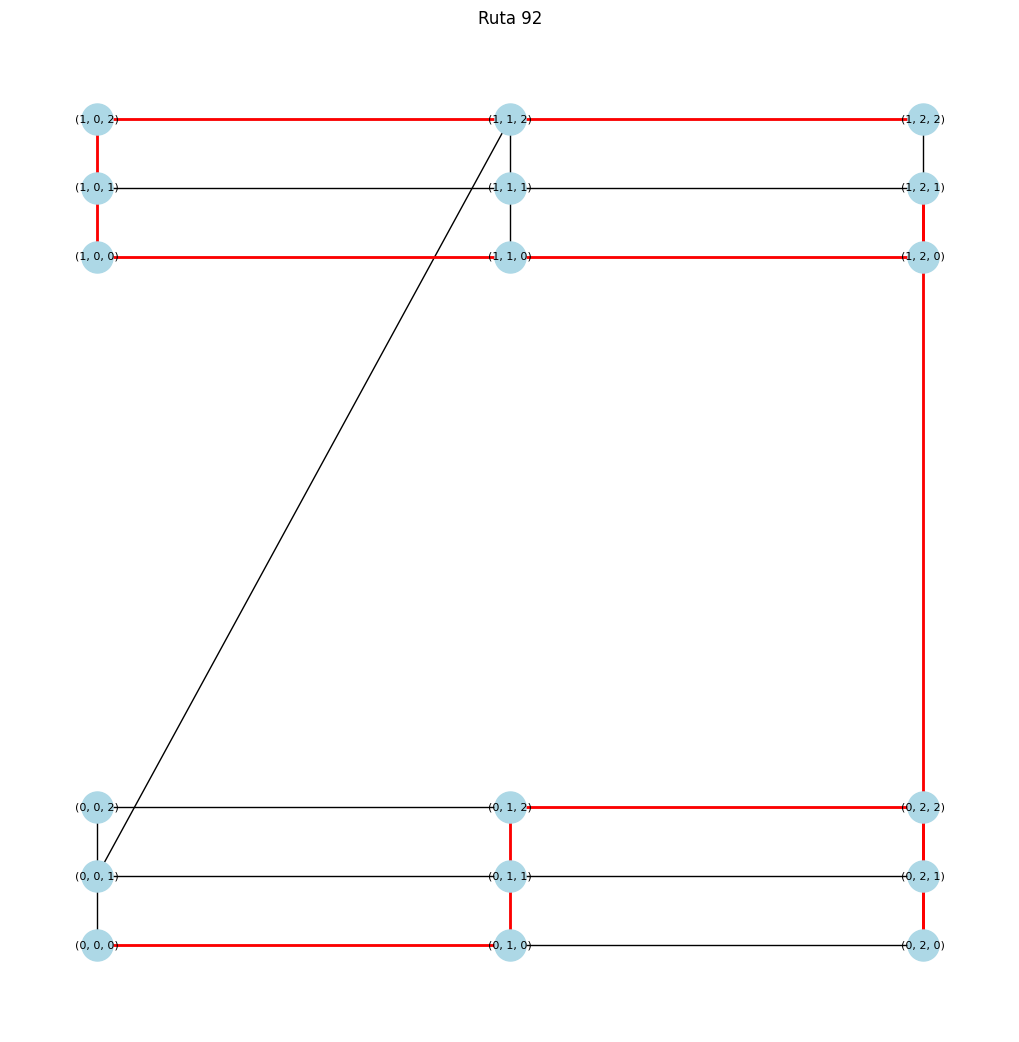

Ruta 93: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


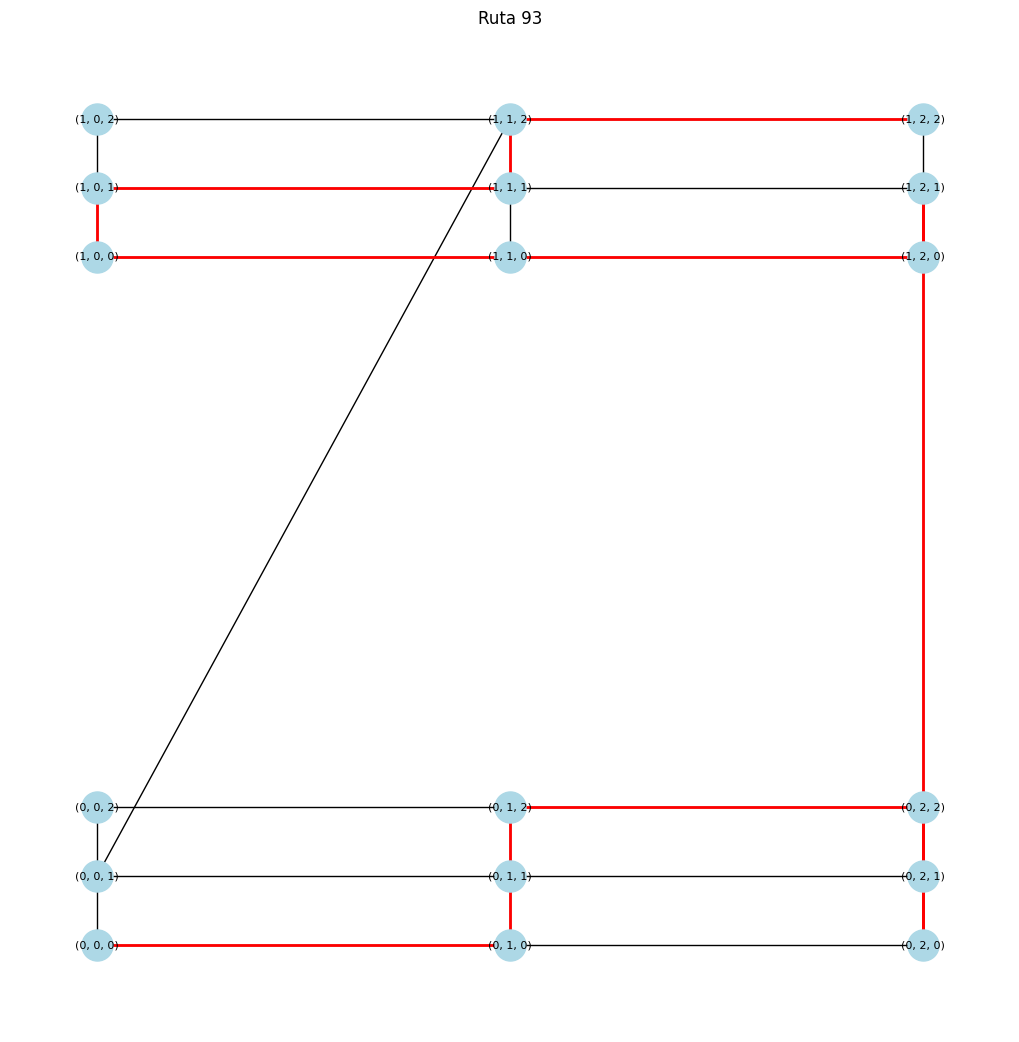

Ruta 94: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


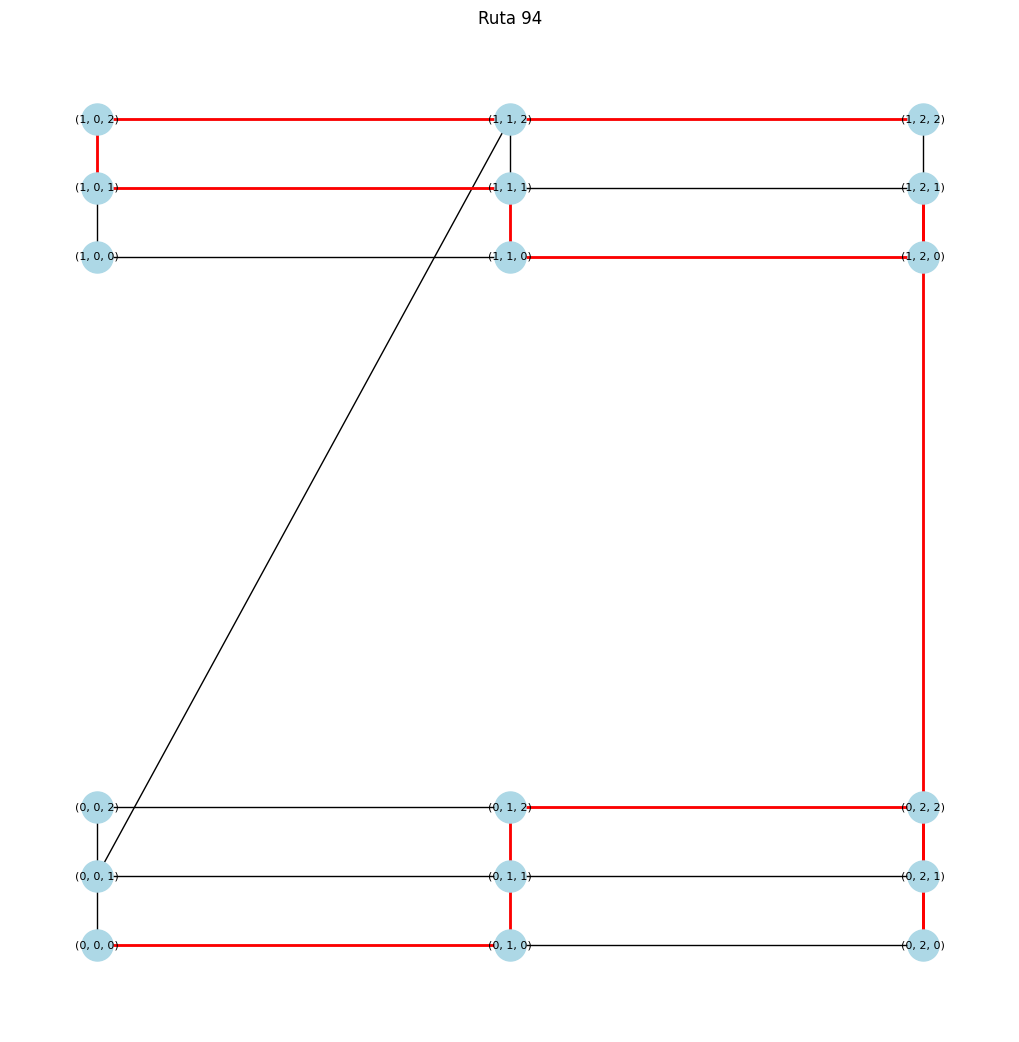

Ruta 95: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


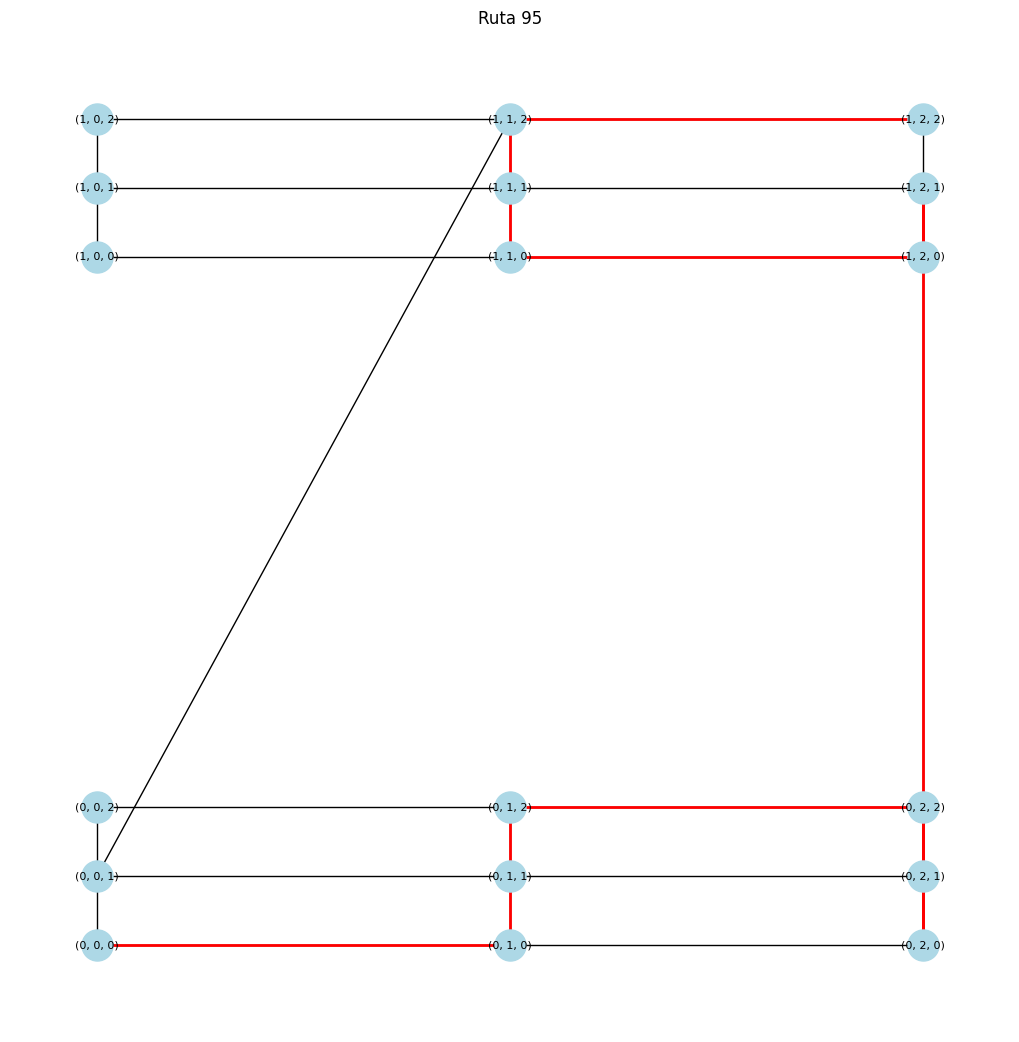

Ruta 96: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 2), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 2)]


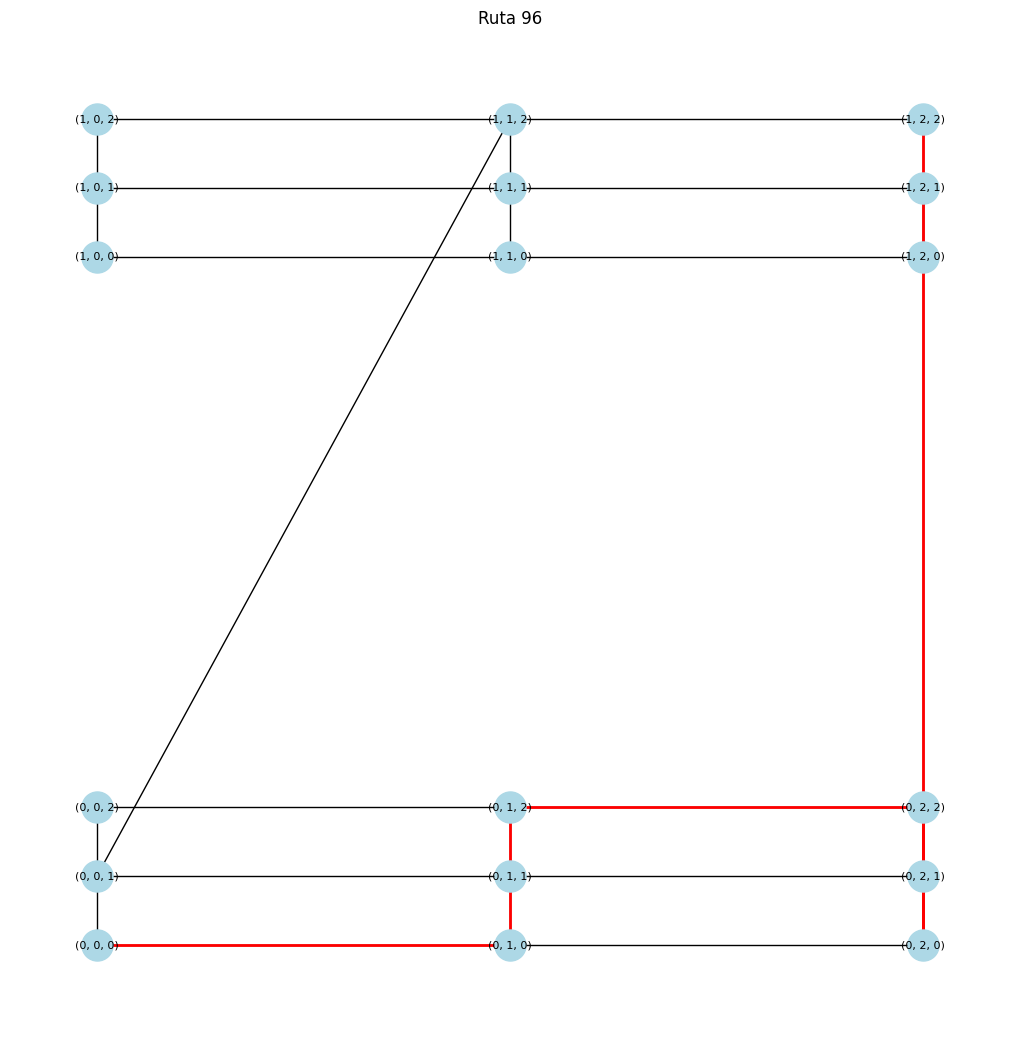

Ruta 97: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


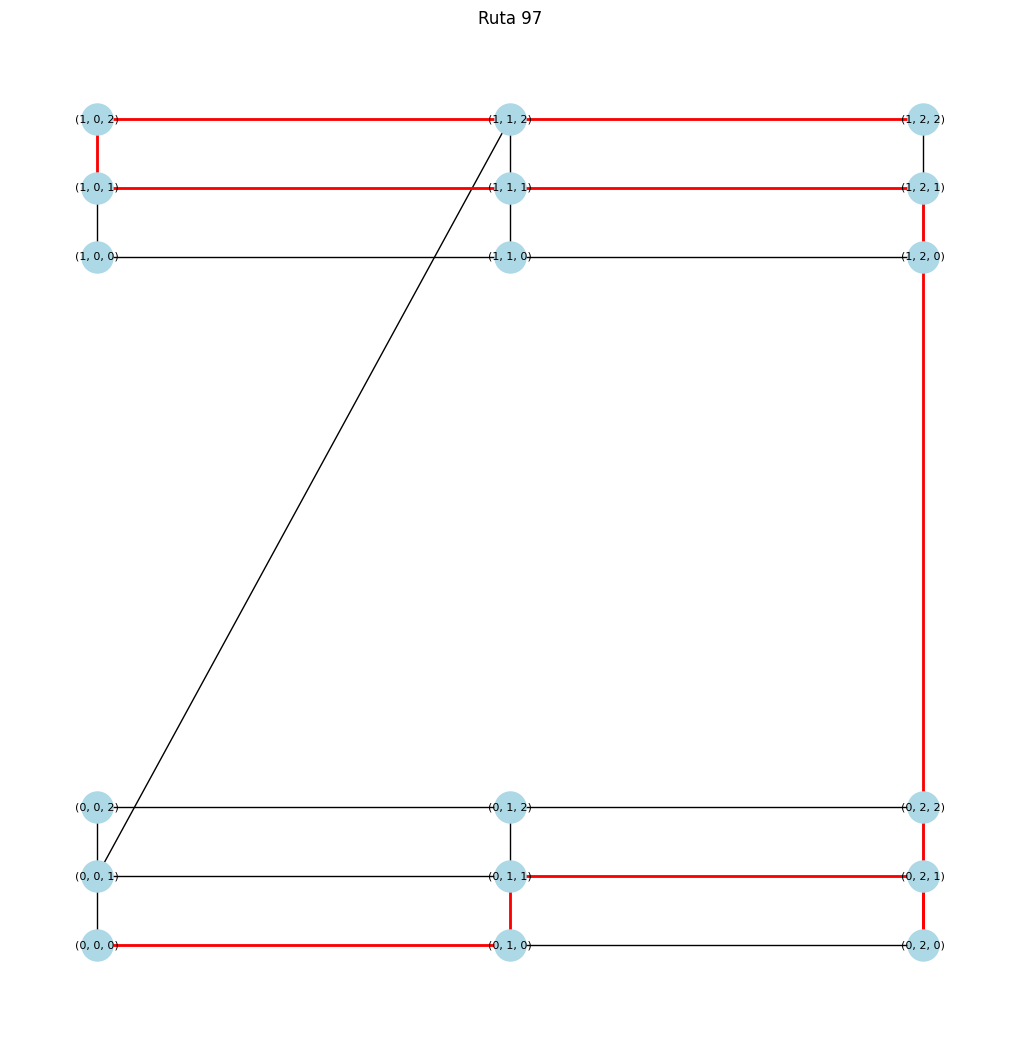

Ruta 98: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


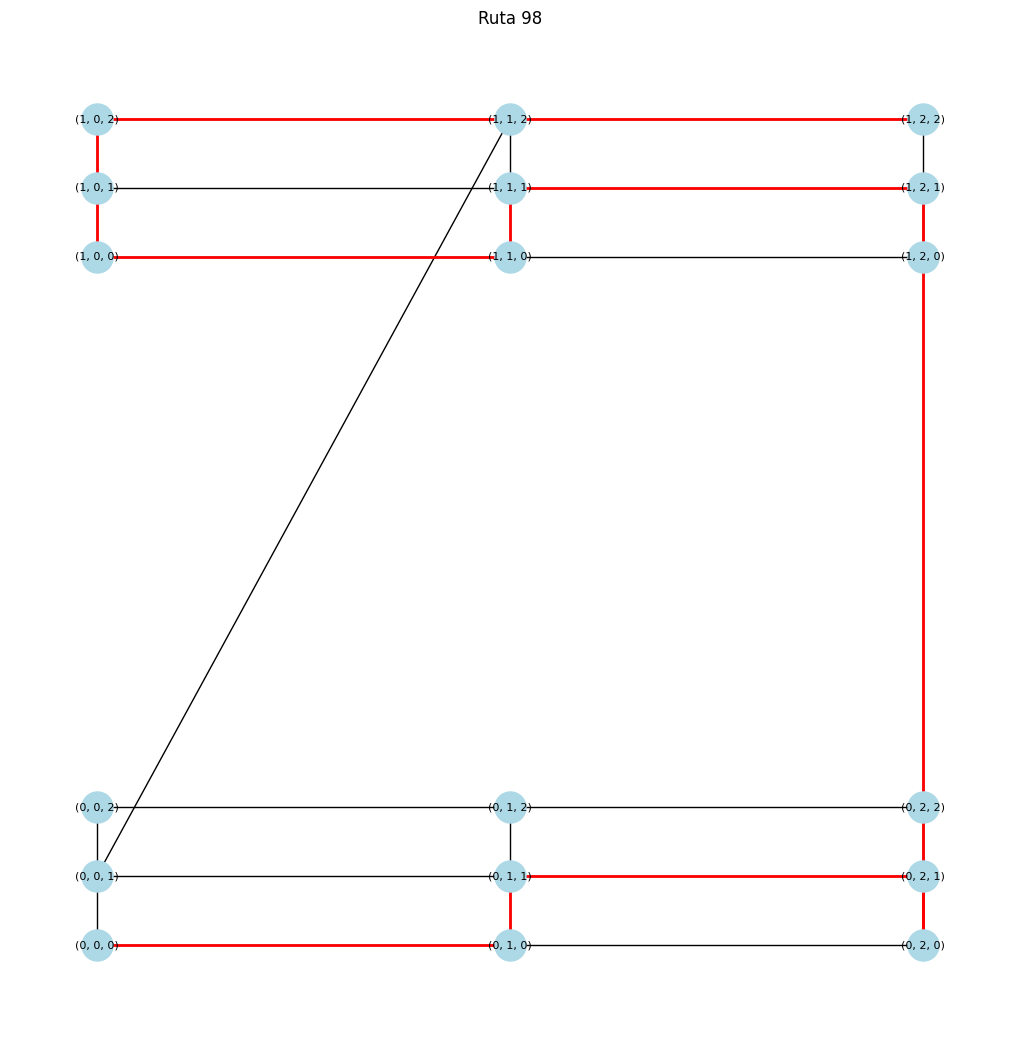

Ruta 99: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


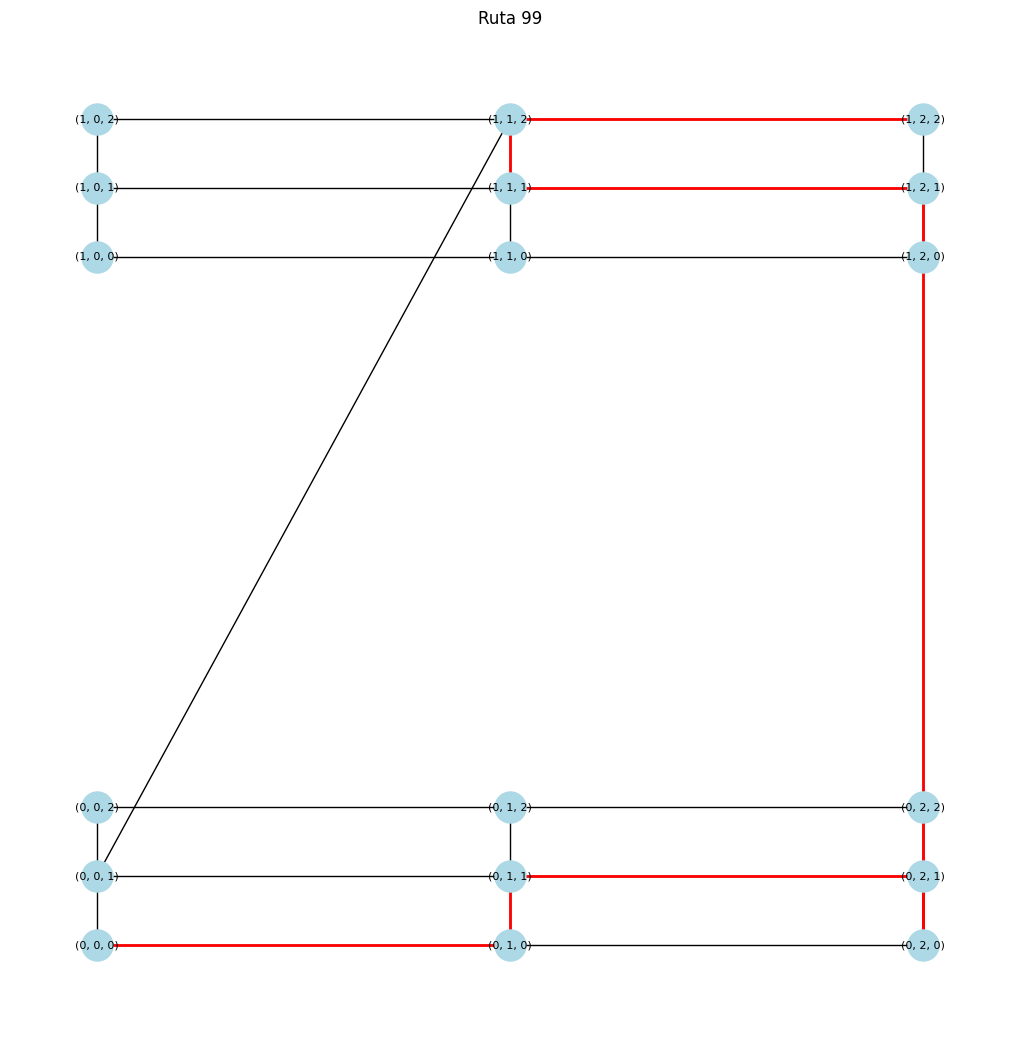

Ruta 100: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


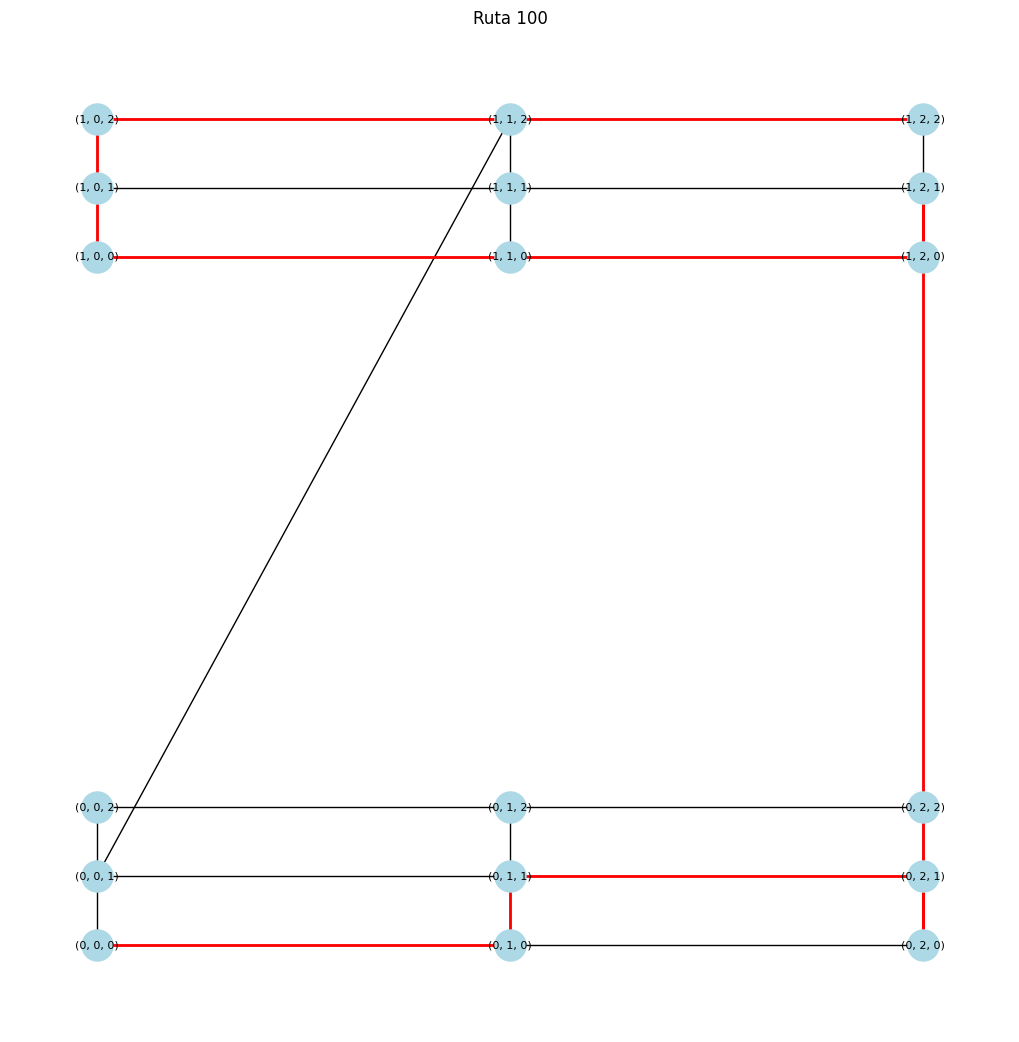

Ruta 101: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


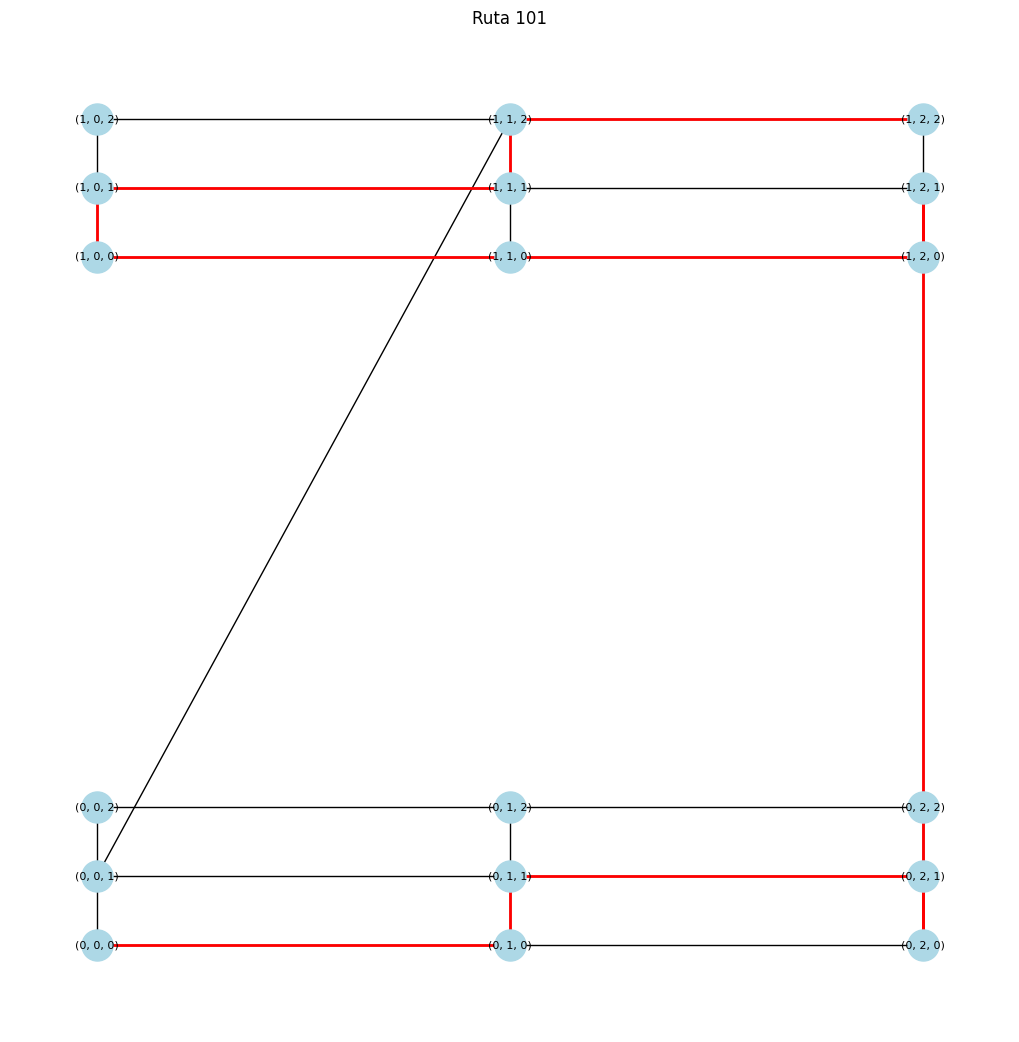

Ruta 102: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


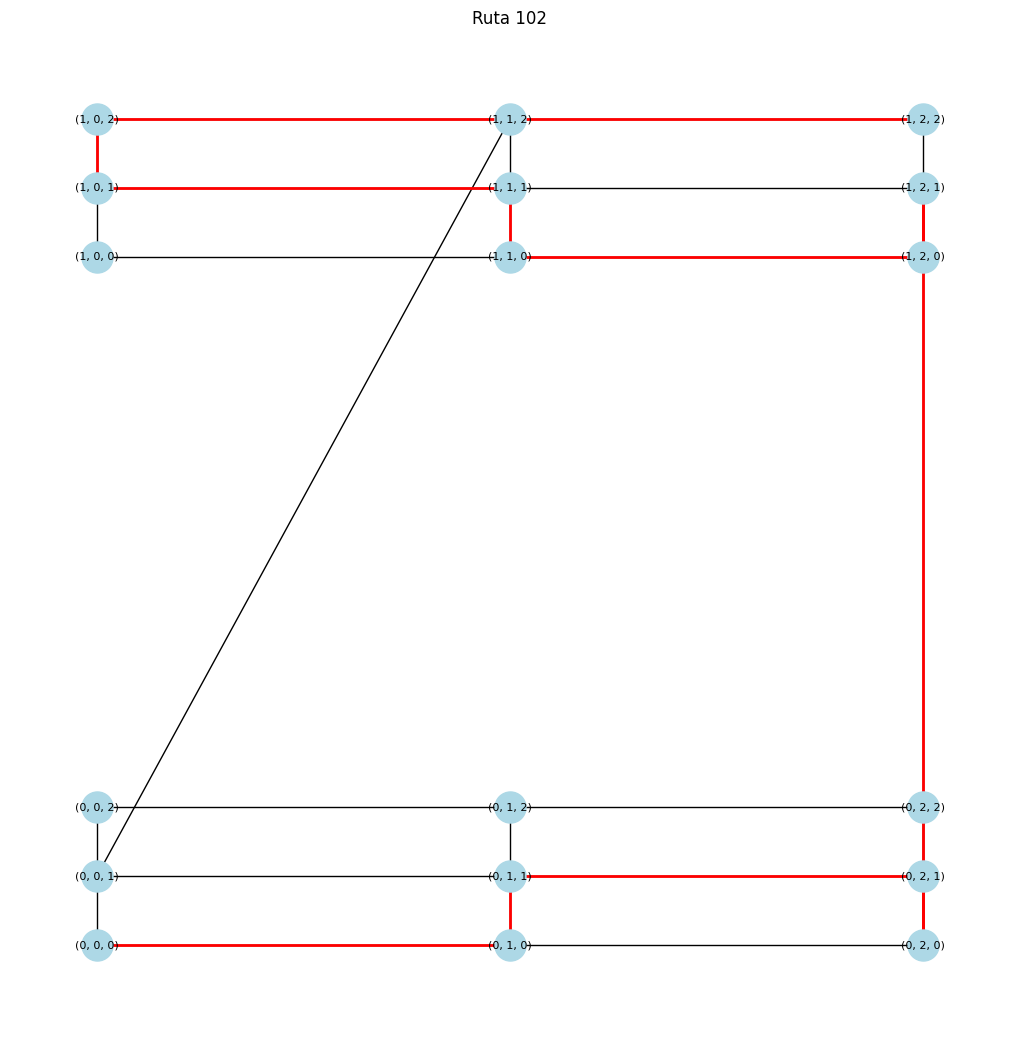

Ruta 103: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


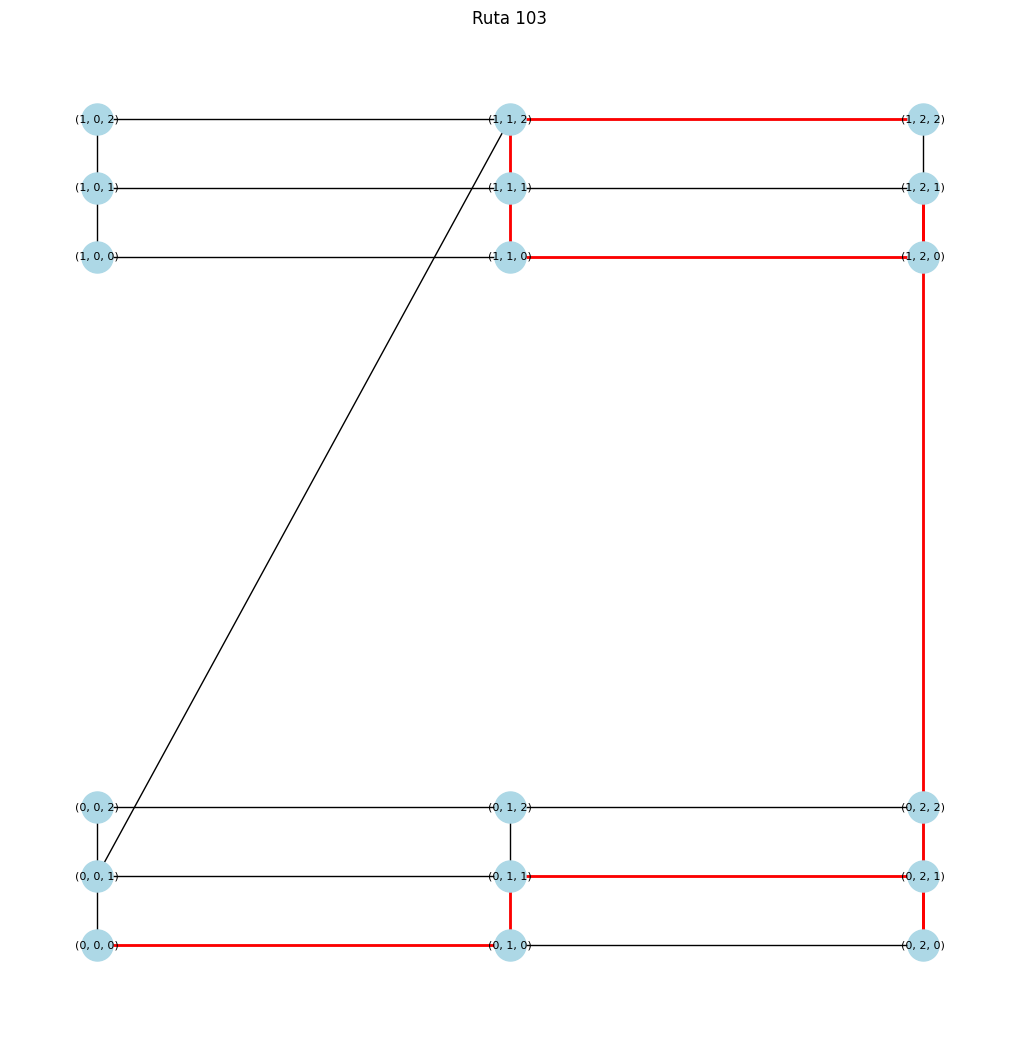

Ruta 104: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 0), (1, 2, 1), (1, 2, 2)]


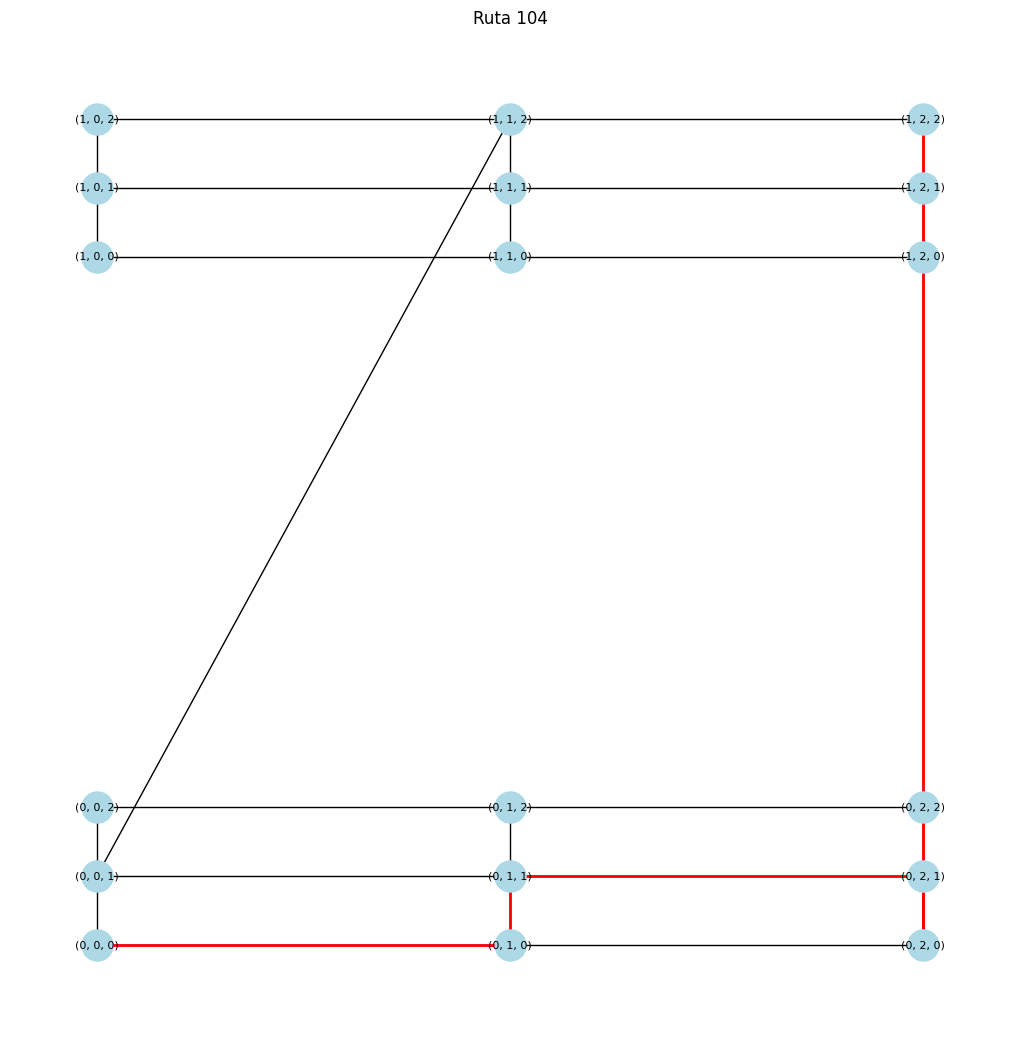

Ruta 105: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


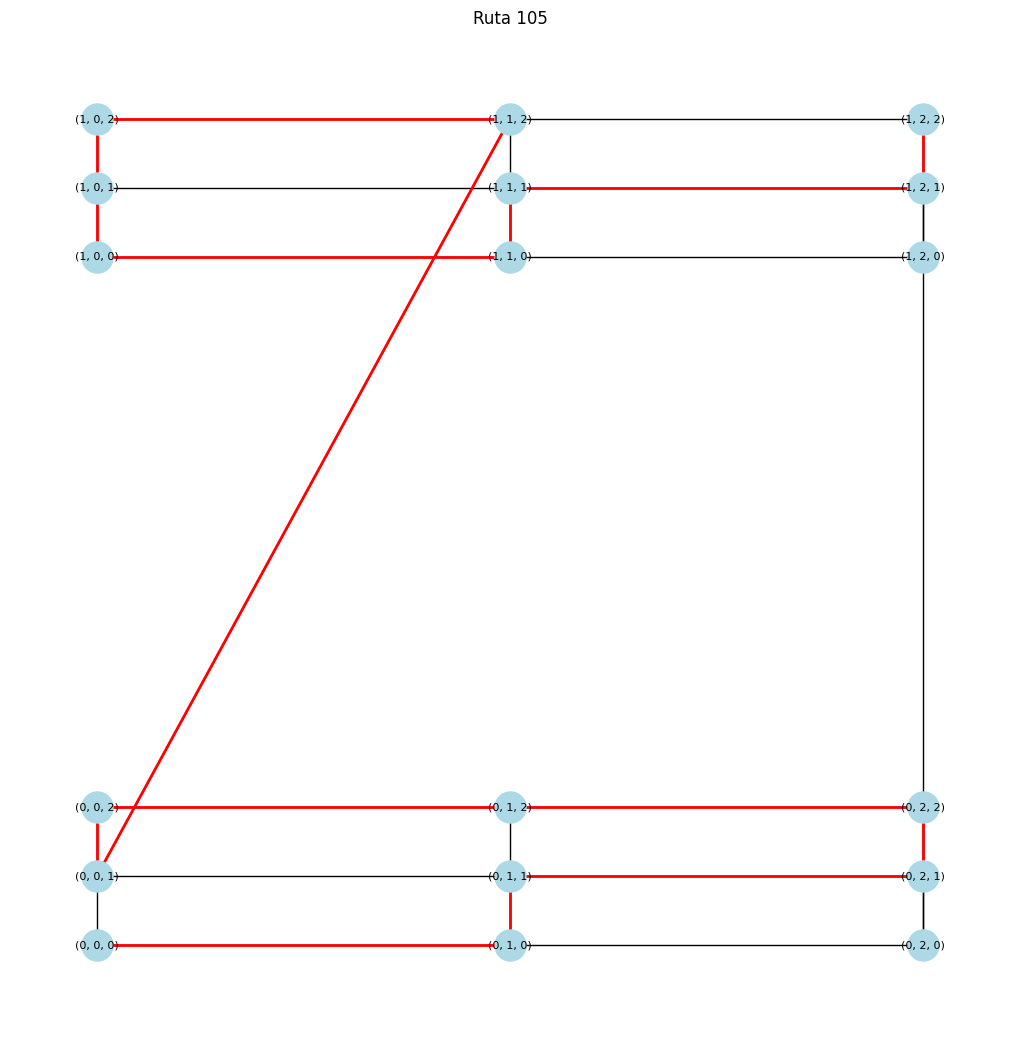

Ruta 106: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


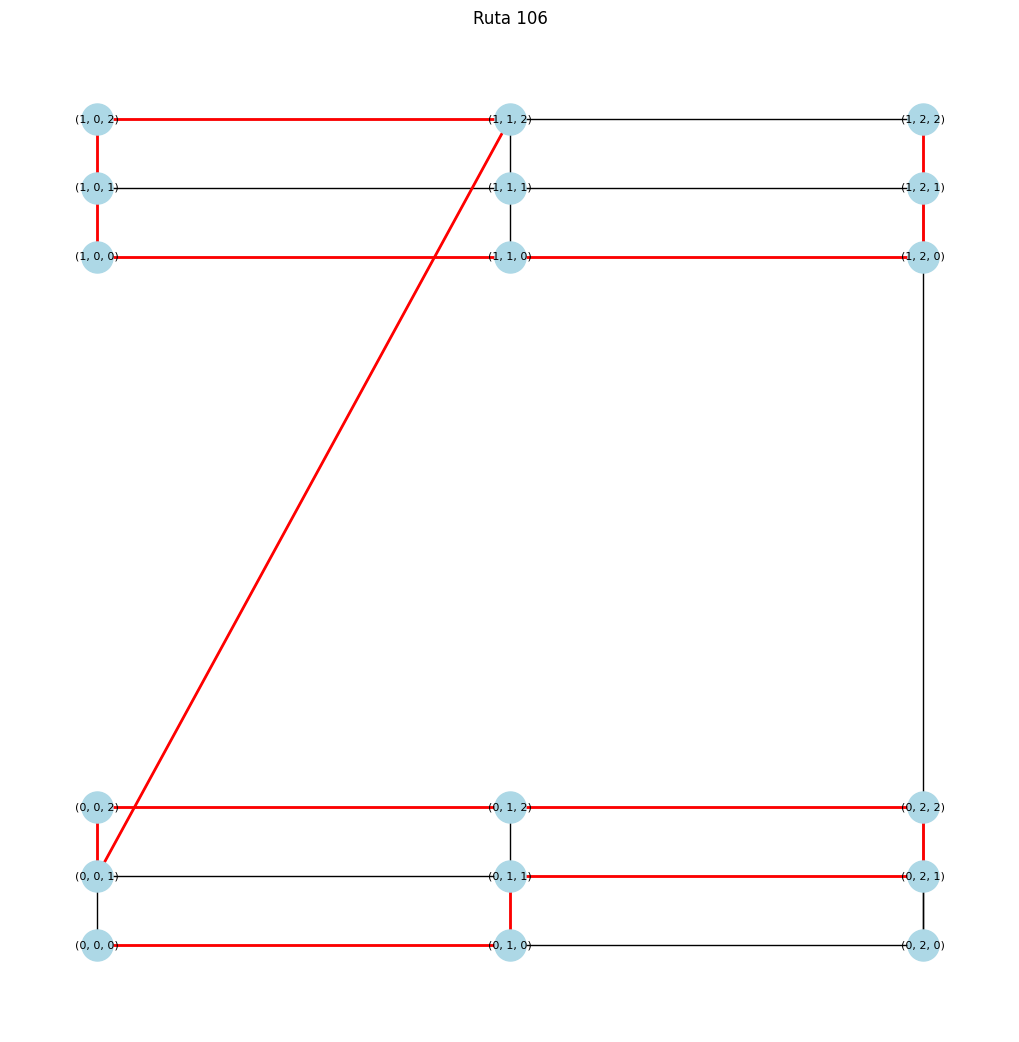

Ruta 107: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


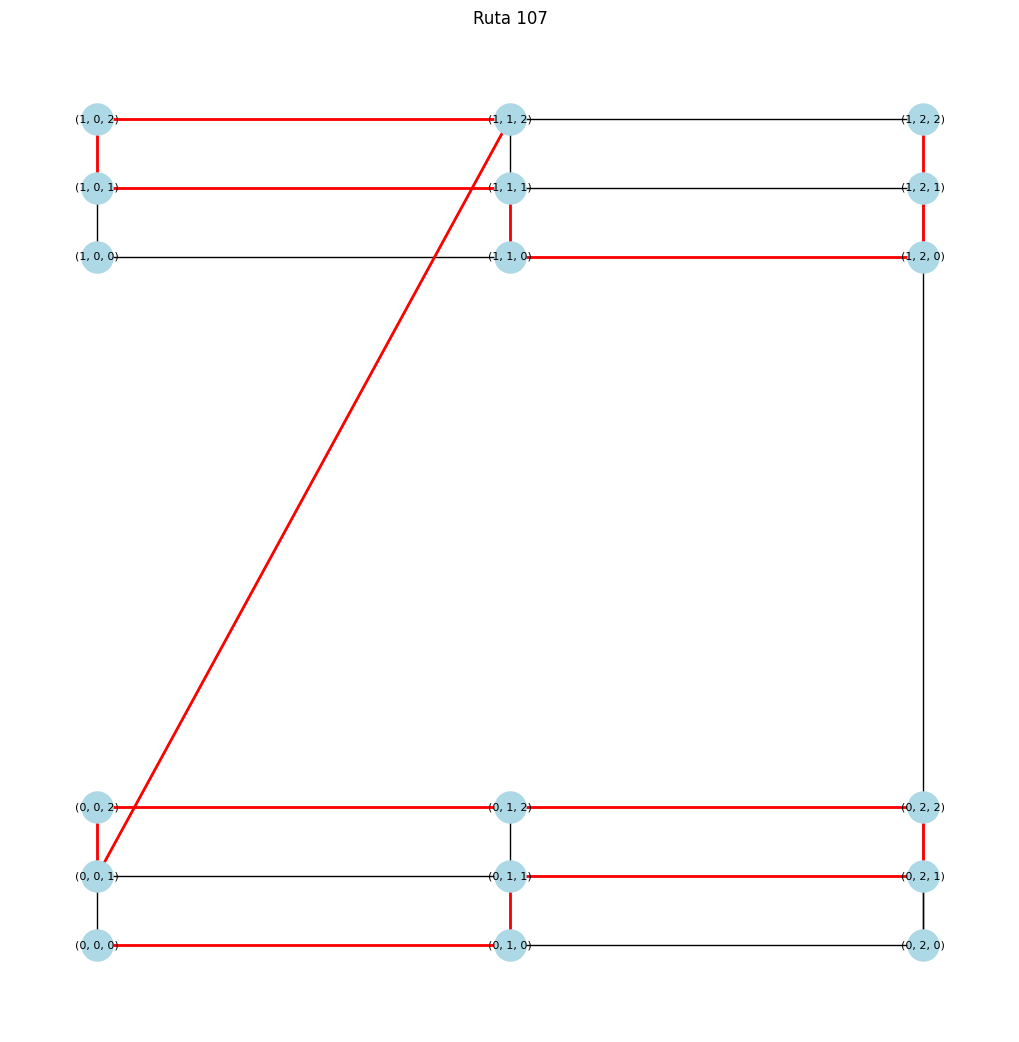

Ruta 108: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


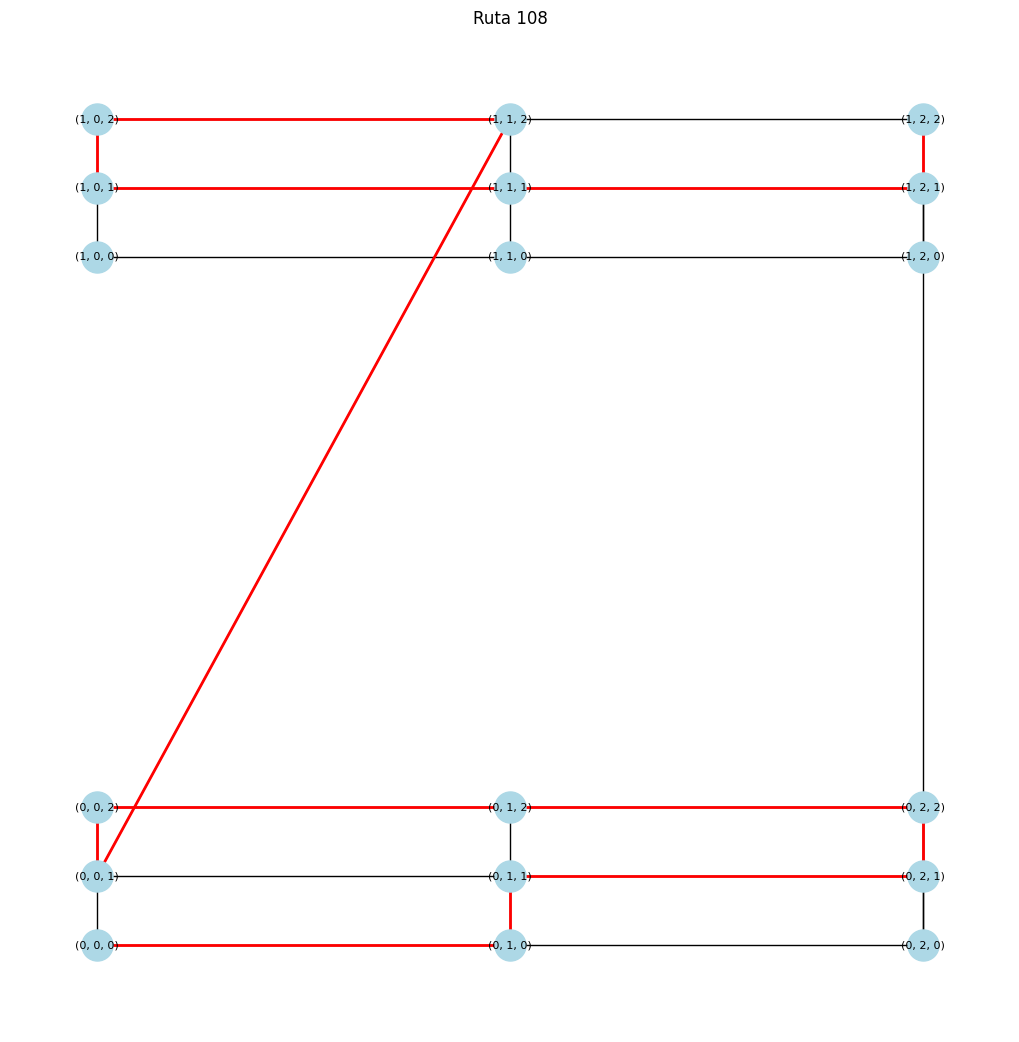

Ruta 109: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


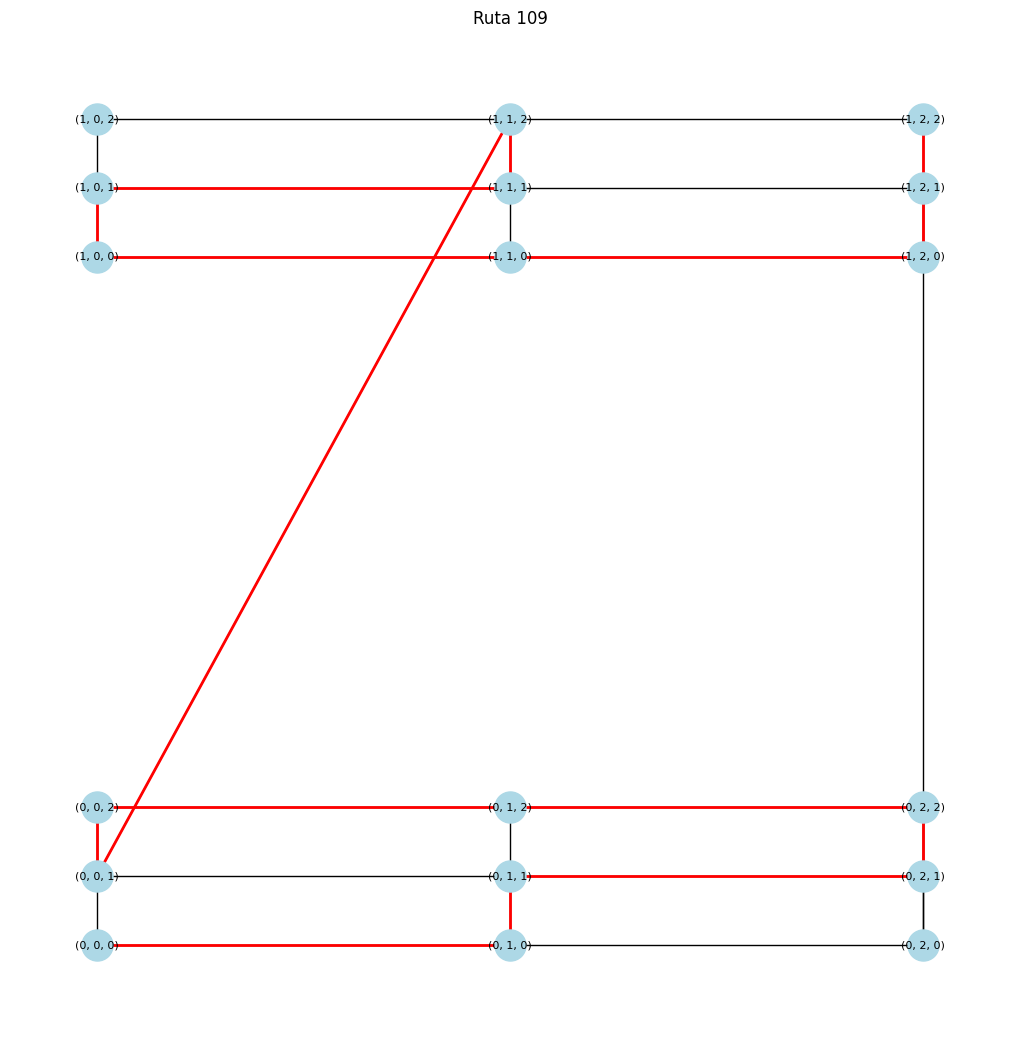

Ruta 110: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


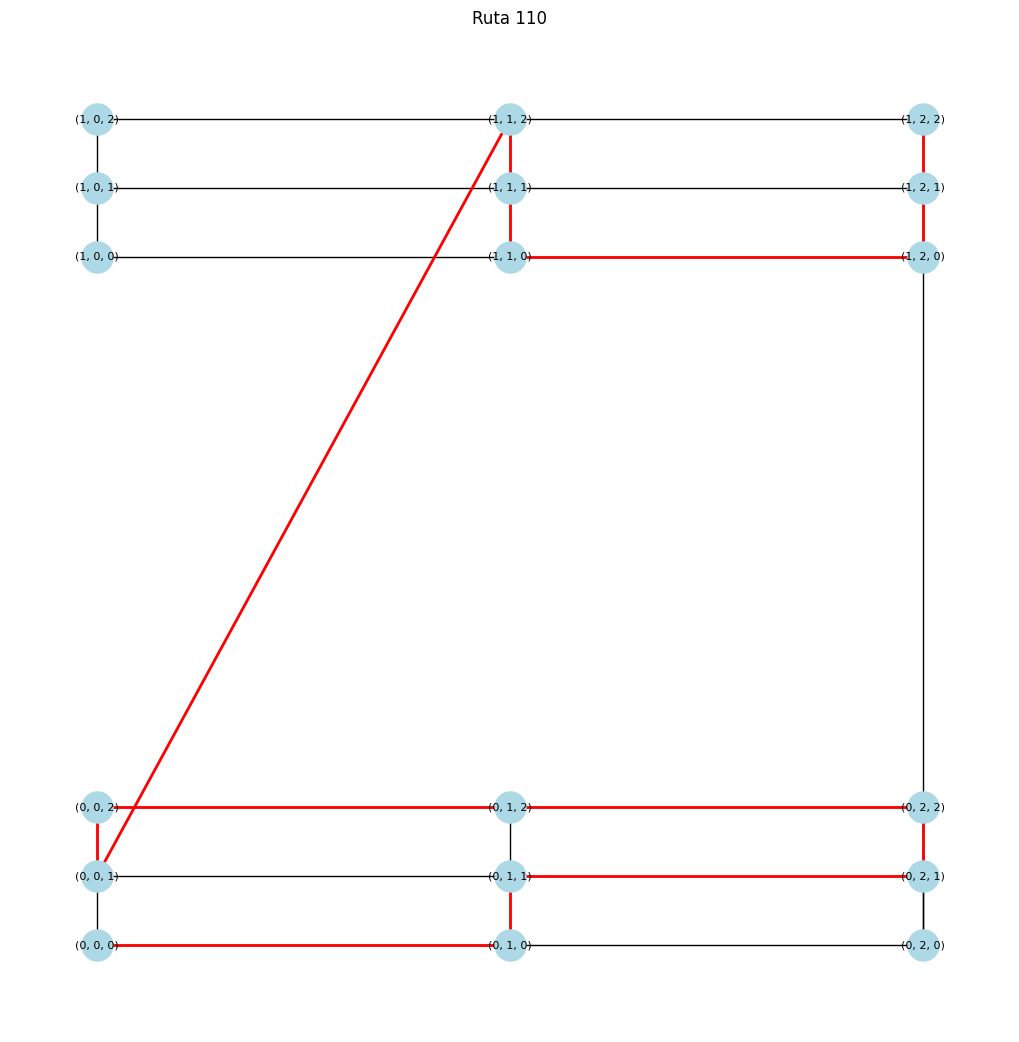

Ruta 111: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


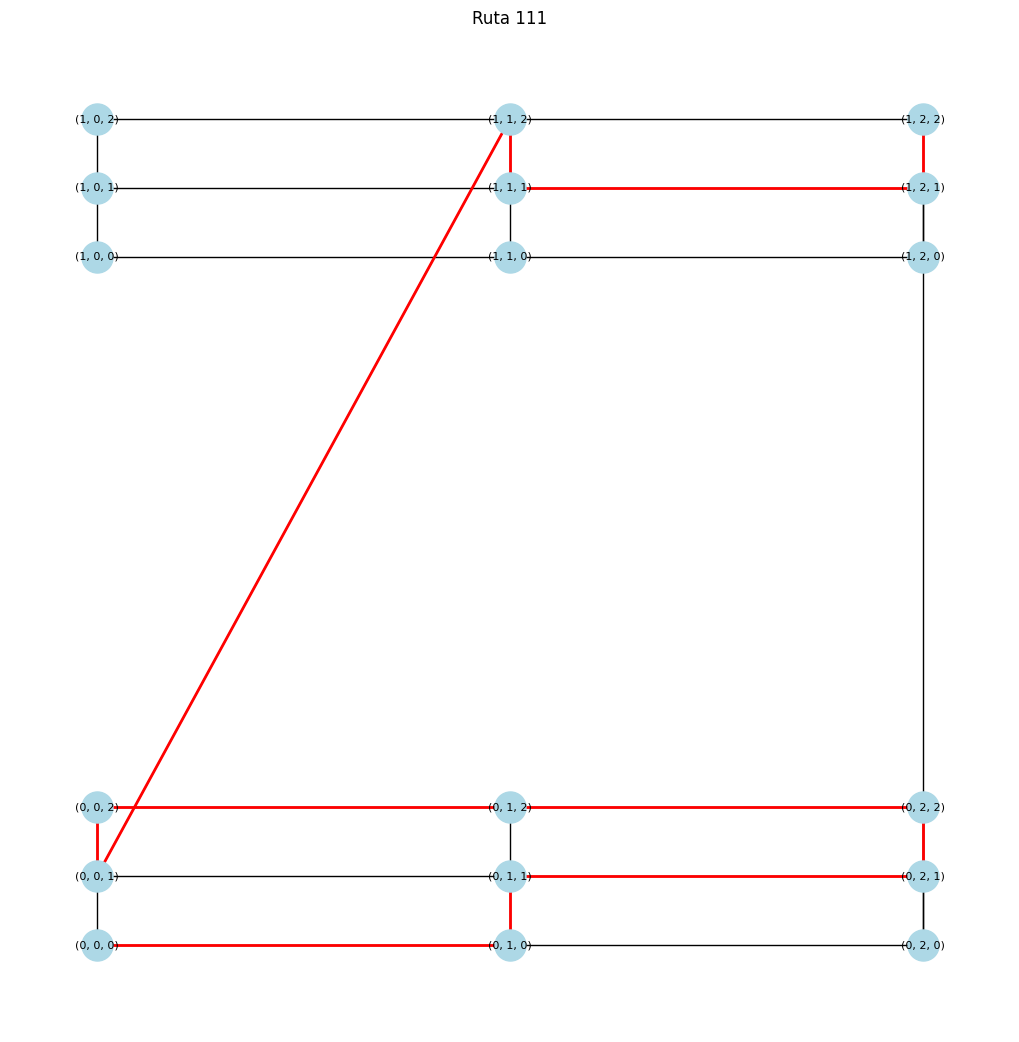

Ruta 112: [(0, 0, 0), (0, 1, 0), (0, 1, 1), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 2, 2)]


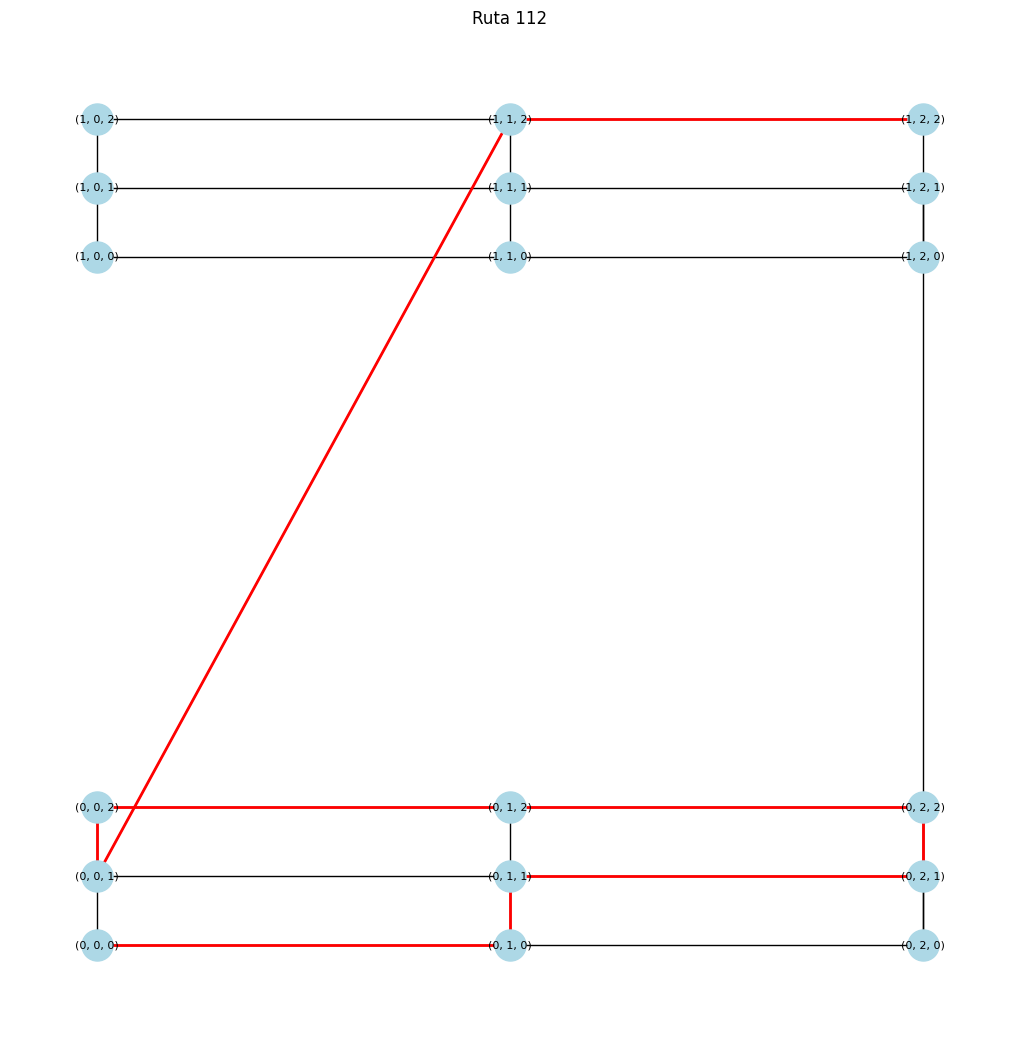

Ruta 113: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


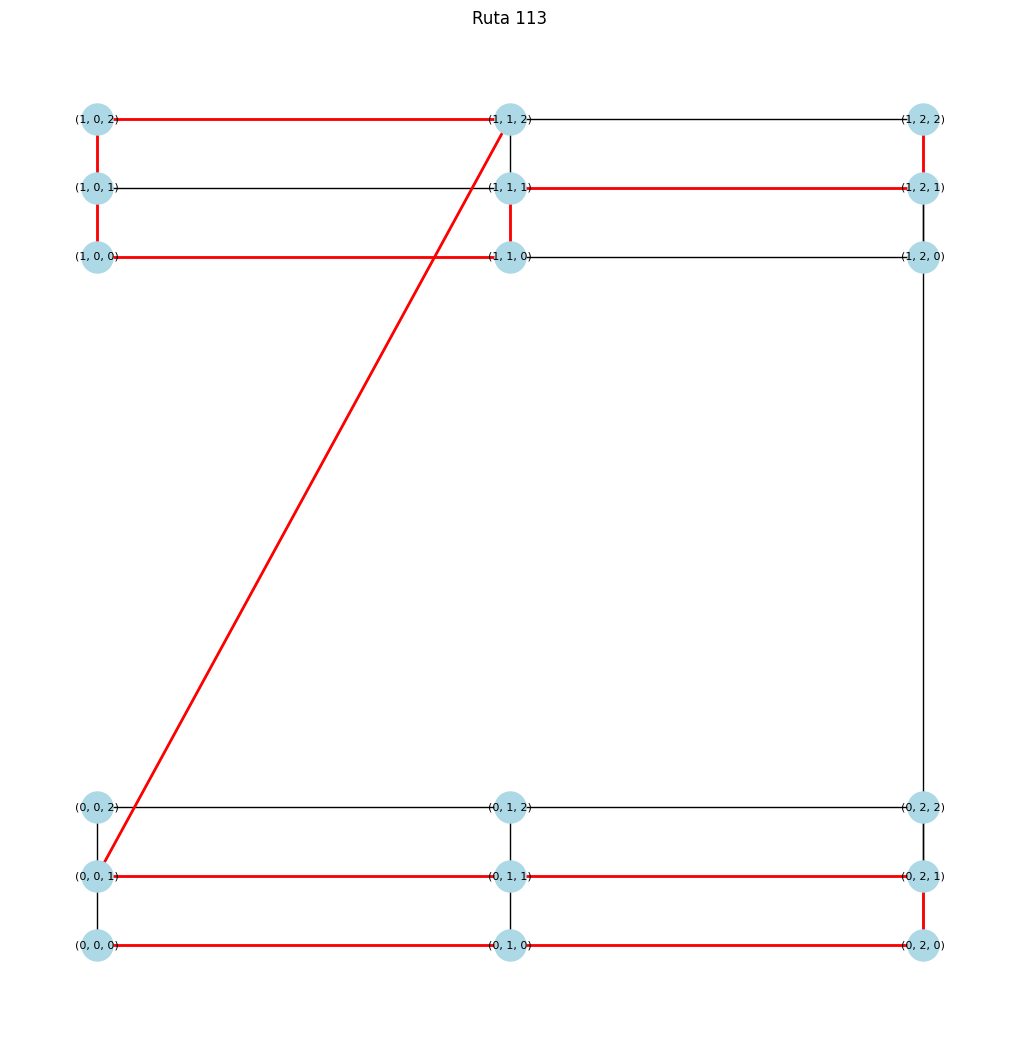

Ruta 114: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


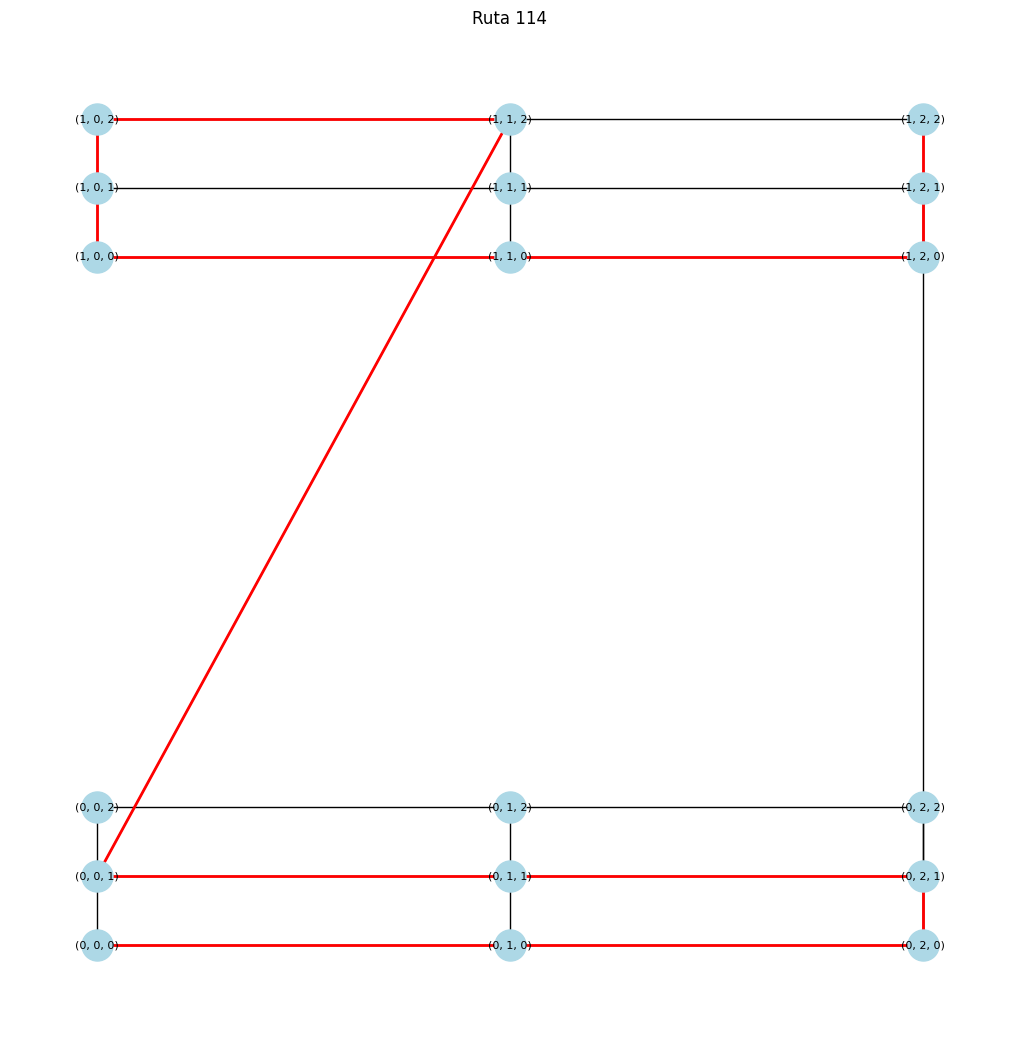

Ruta 115: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


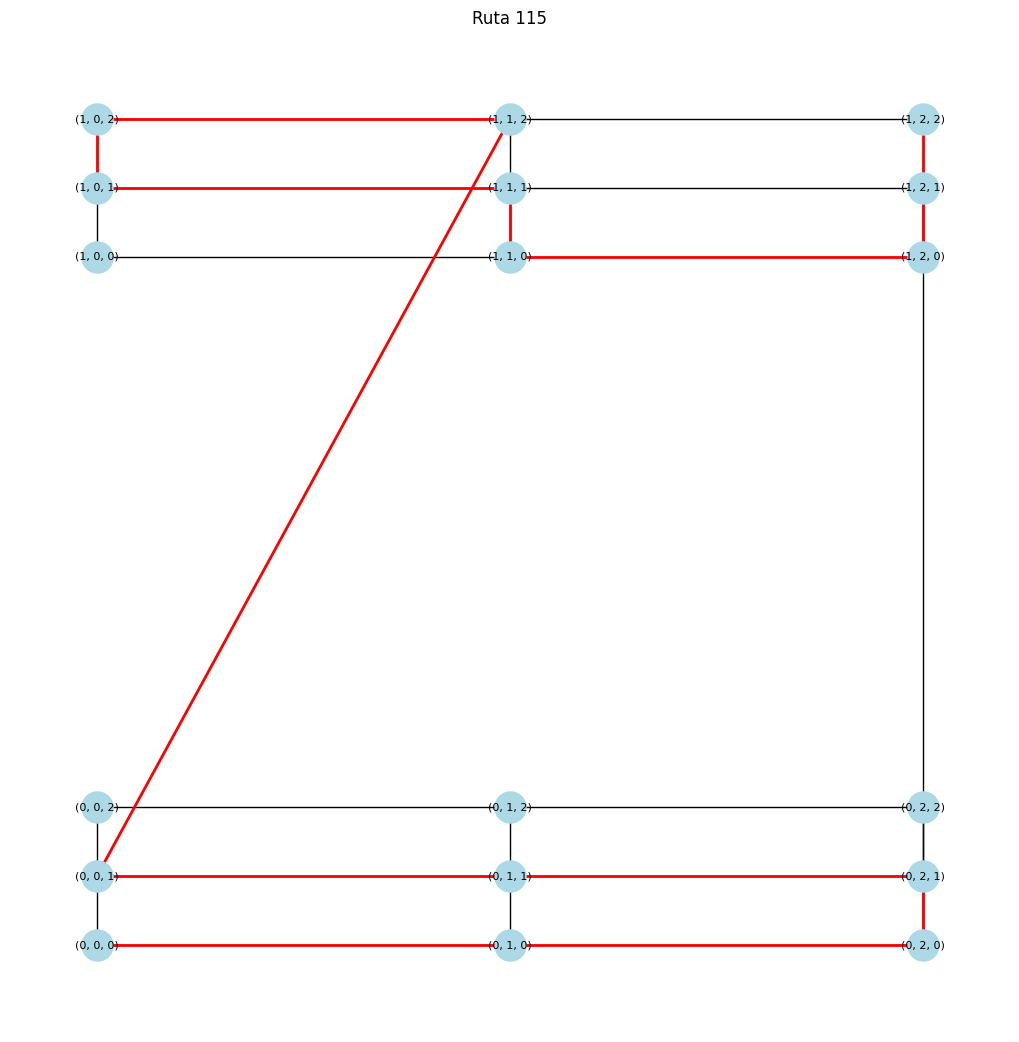

Ruta 116: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


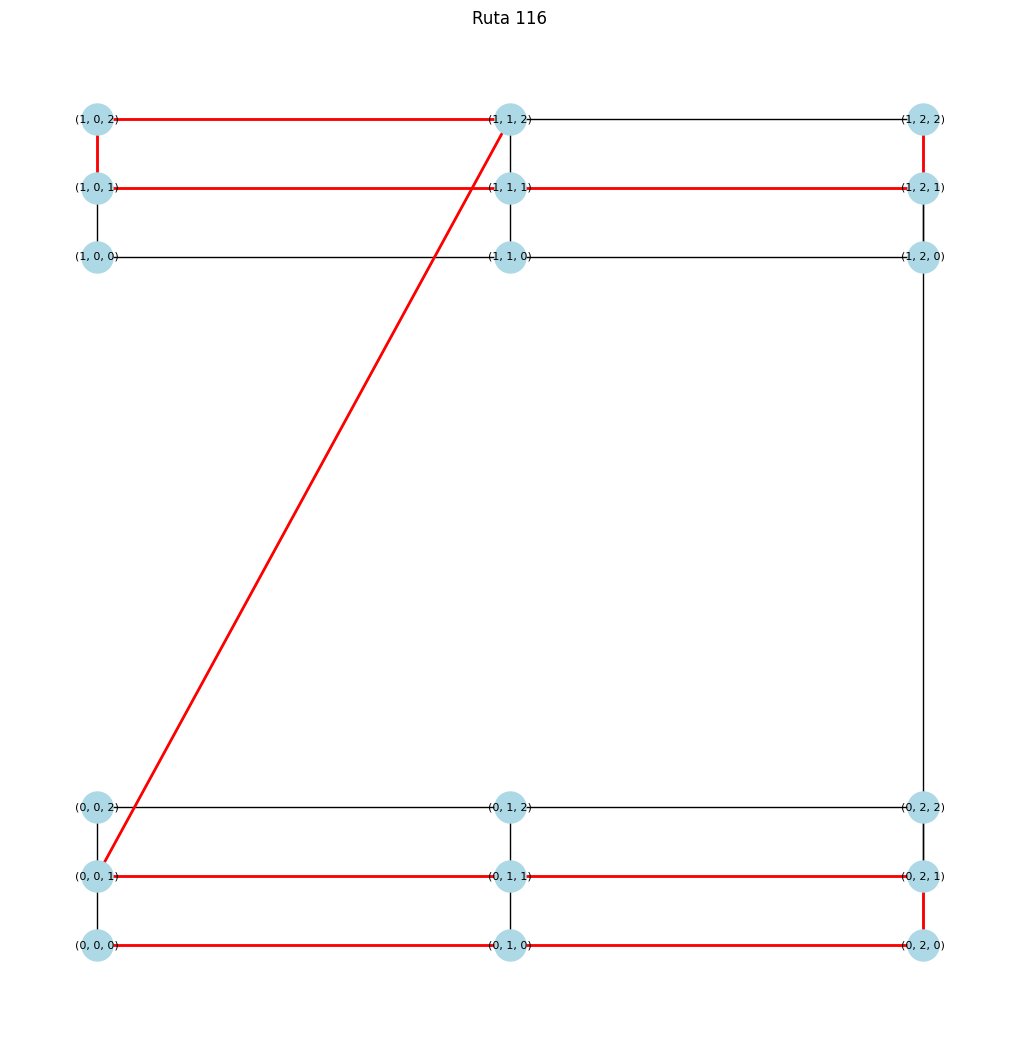

Ruta 117: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


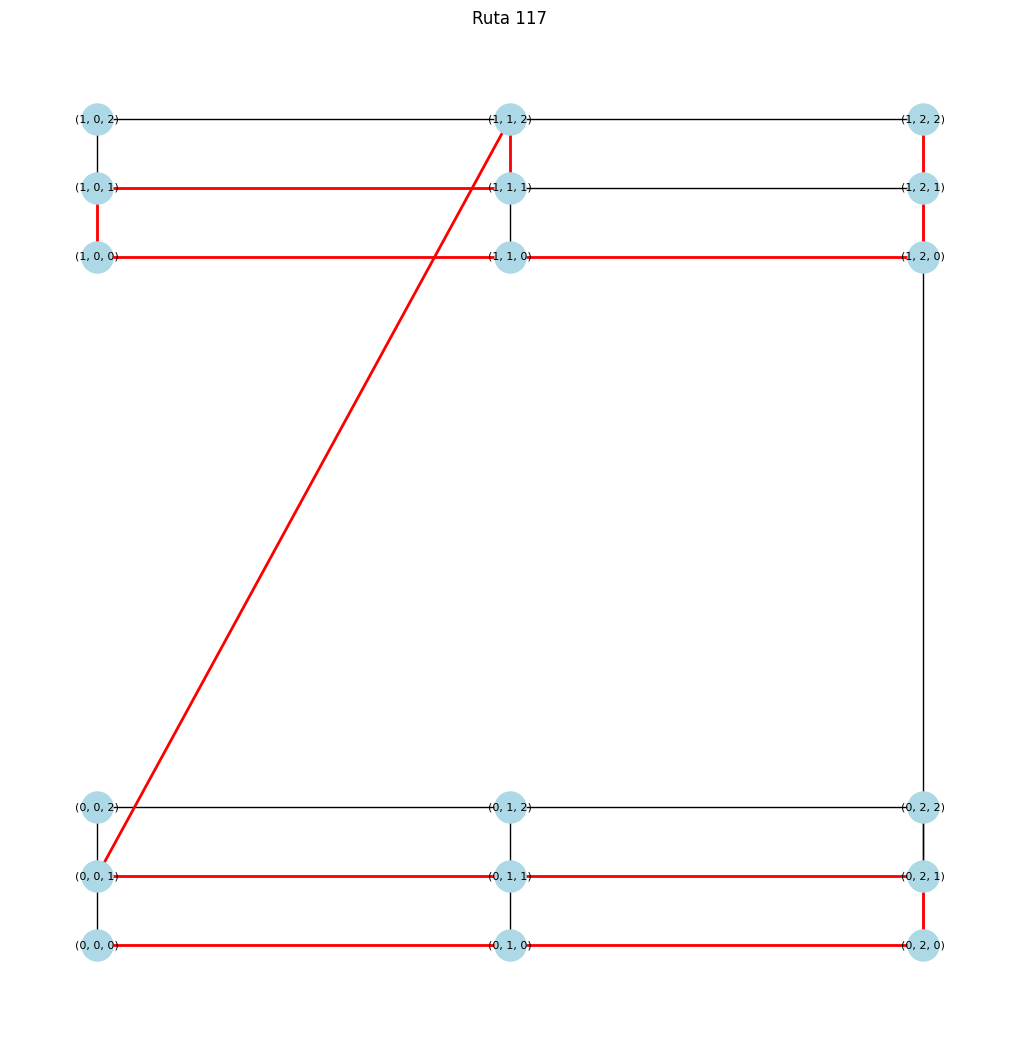

Ruta 118: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


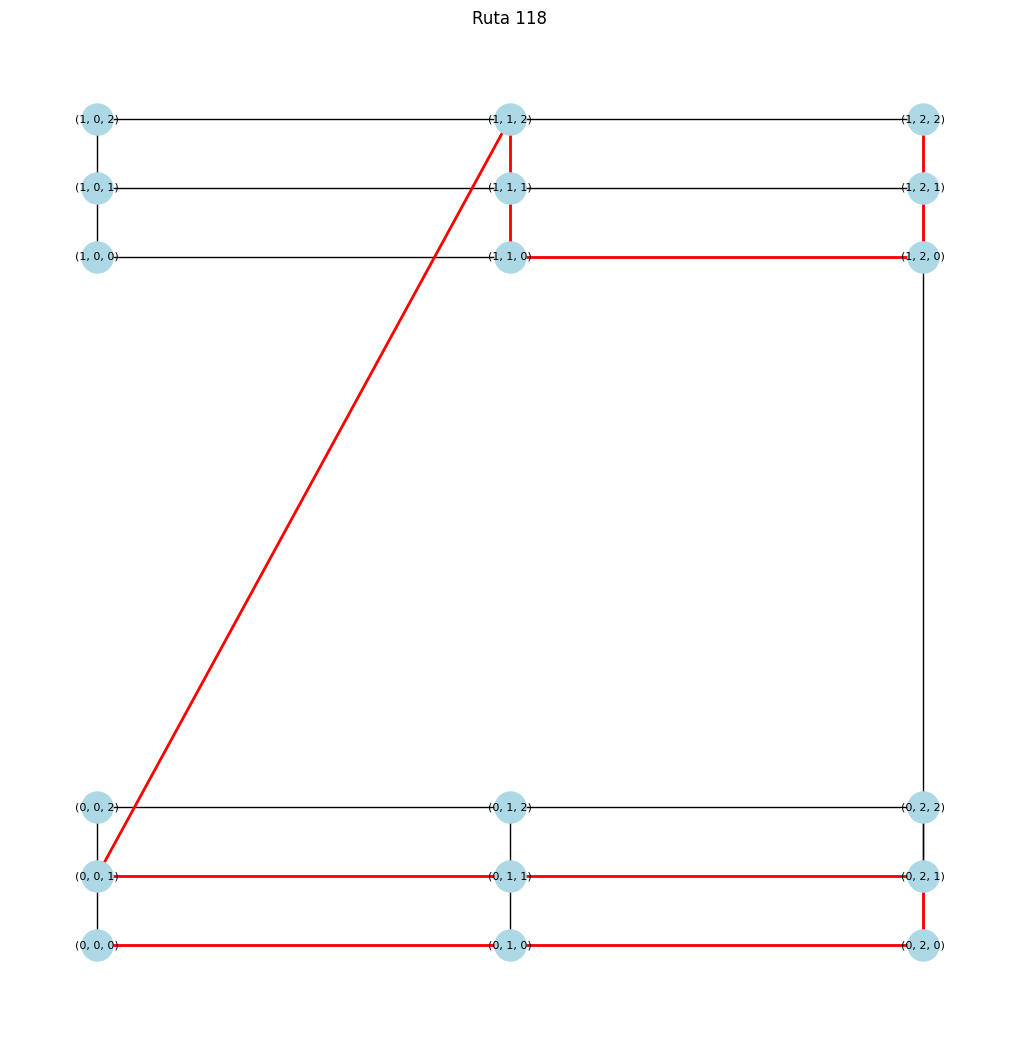

Ruta 119: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


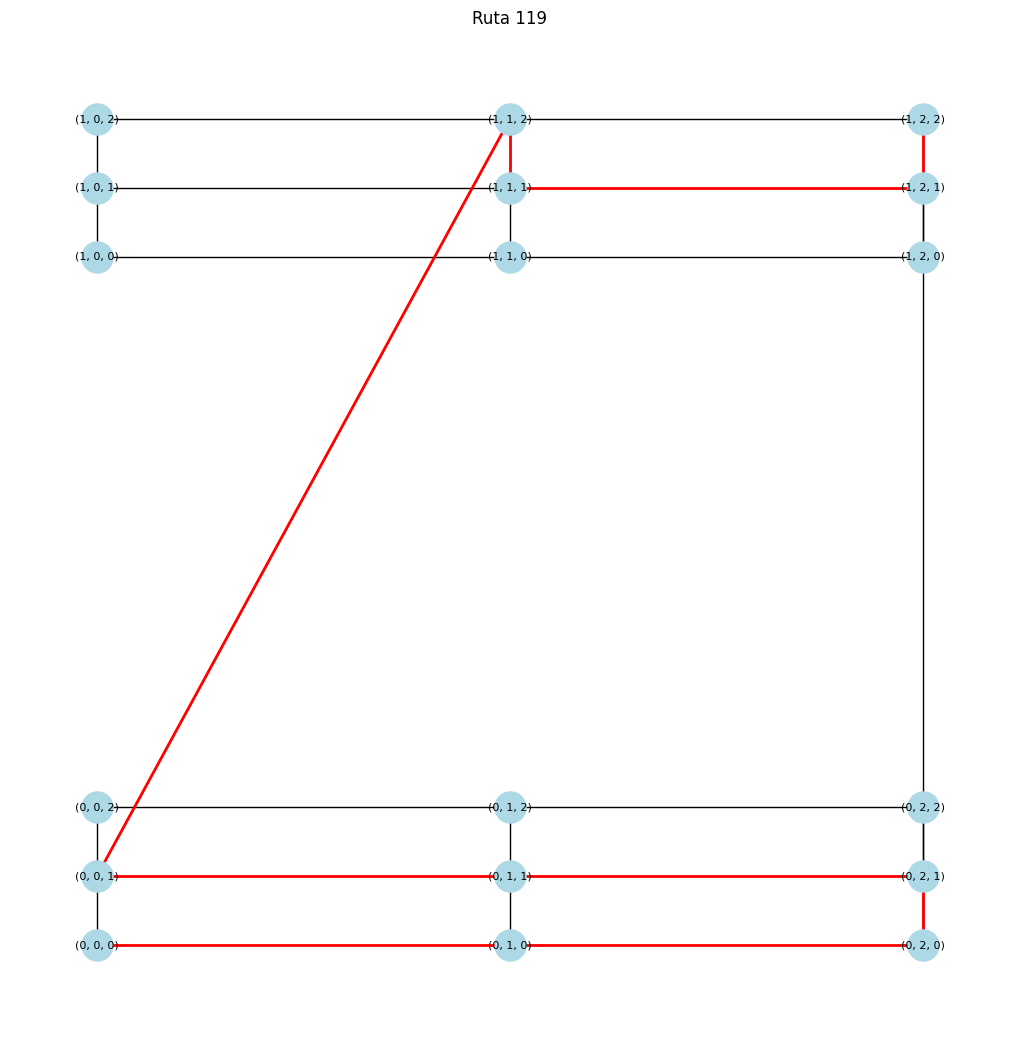

Ruta 120: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 2, 2)]


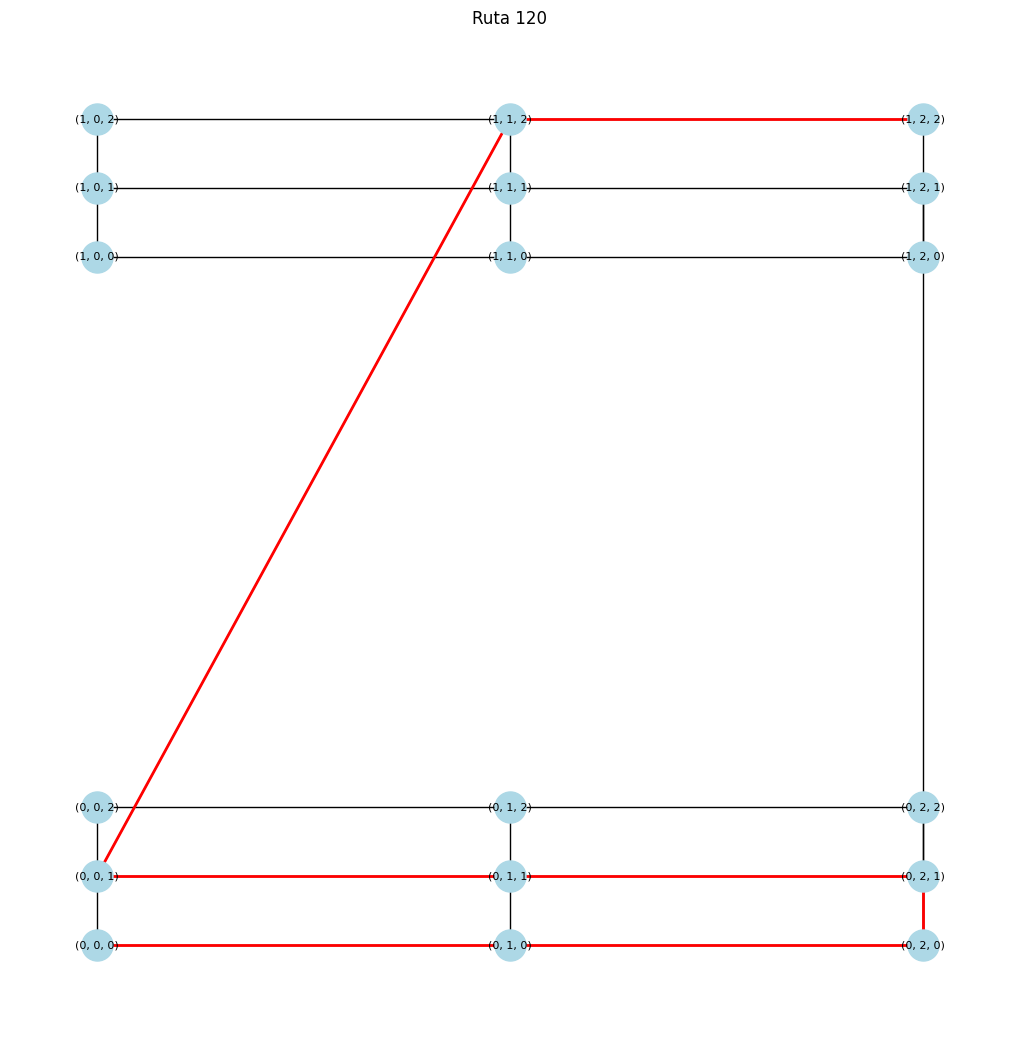

Ruta 121: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


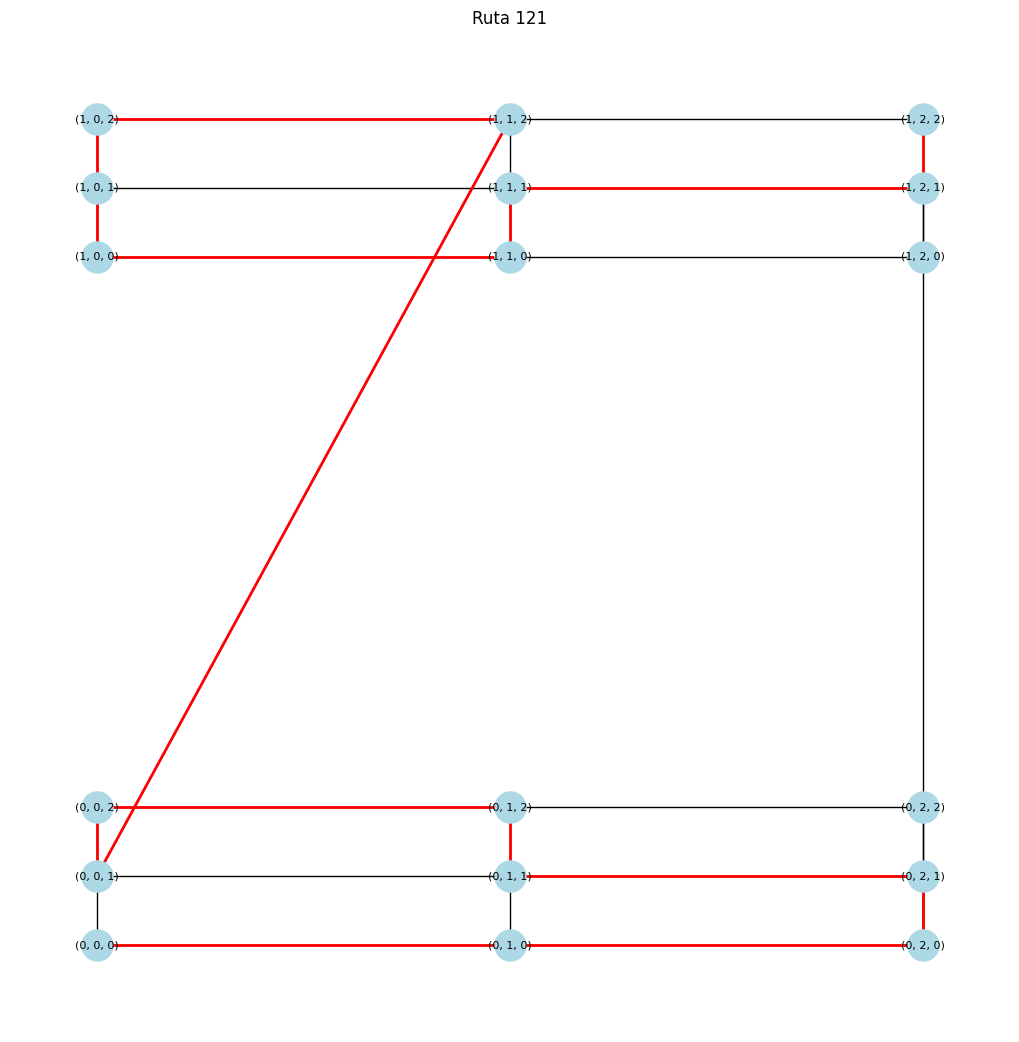

Ruta 122: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


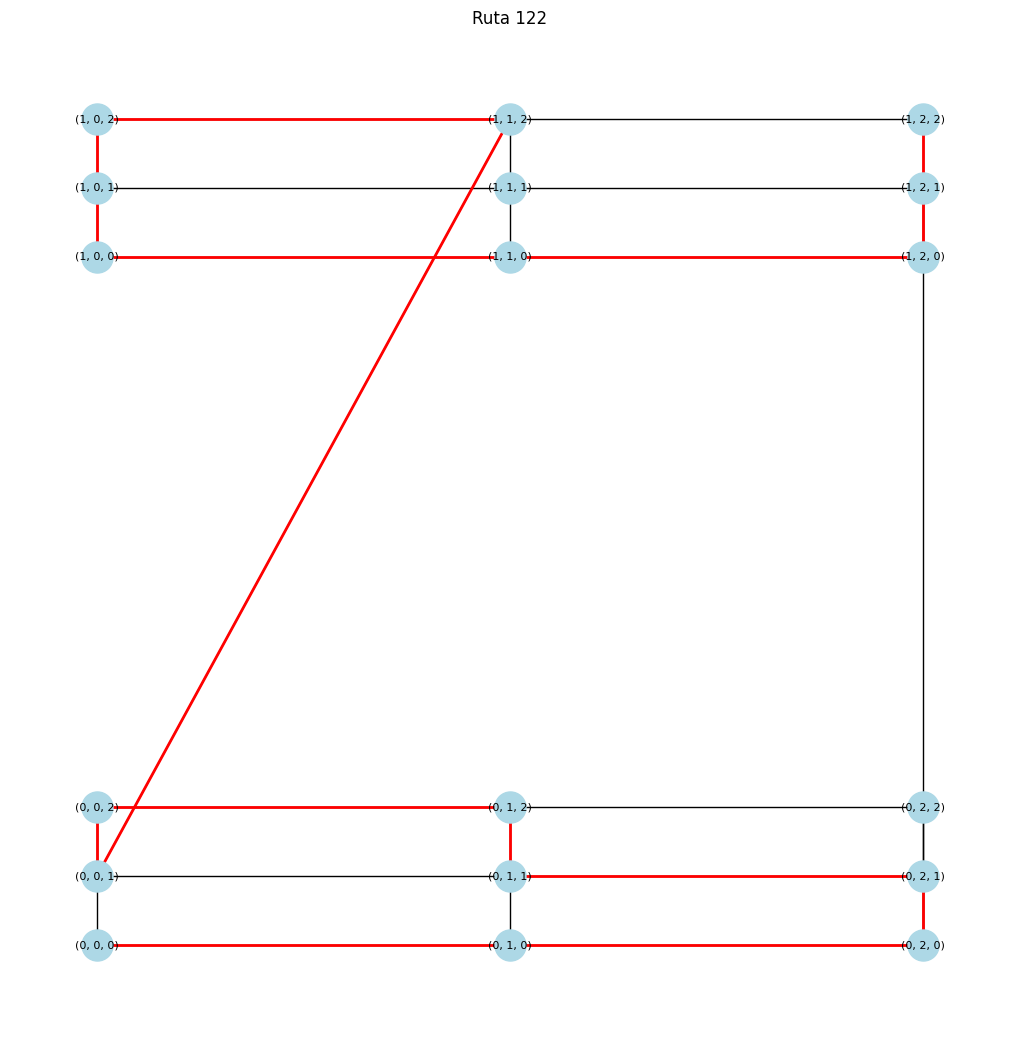

Ruta 123: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


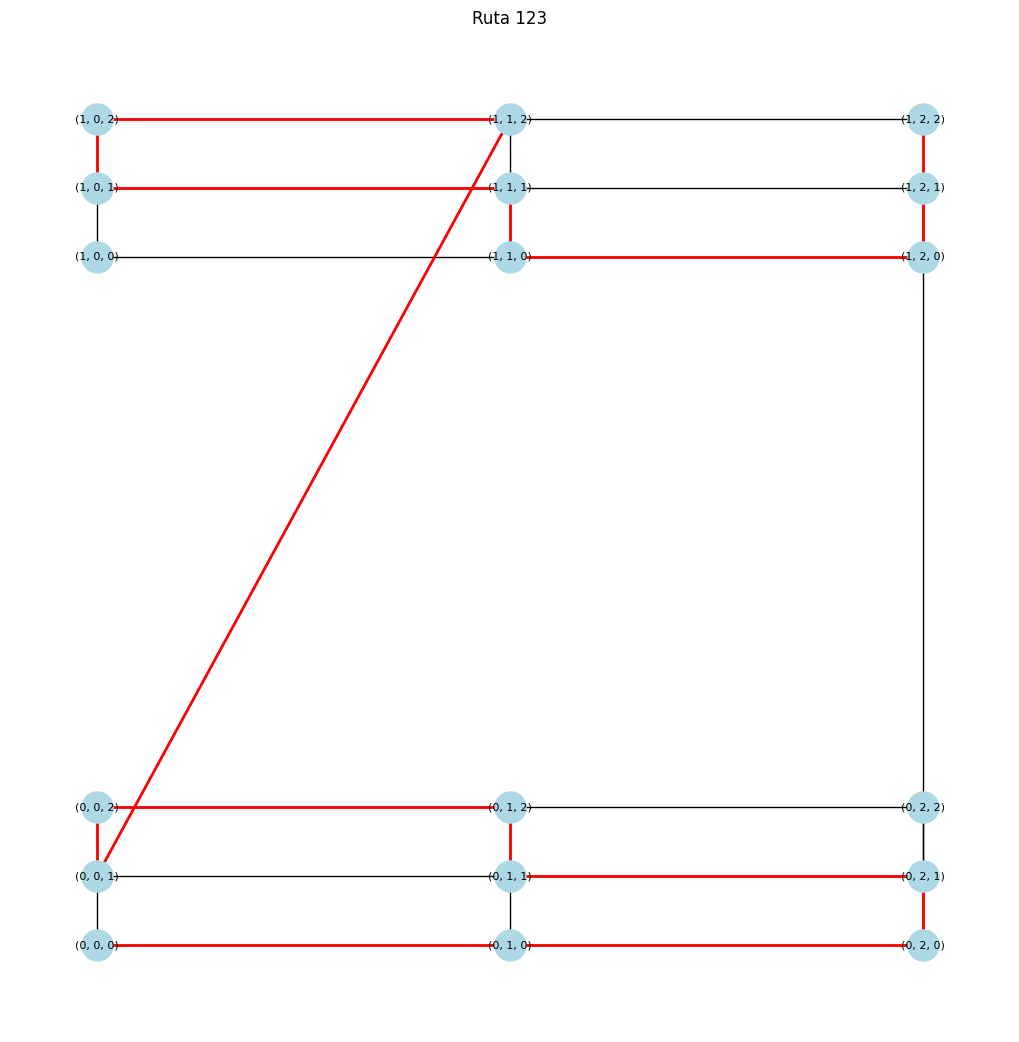

Ruta 124: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


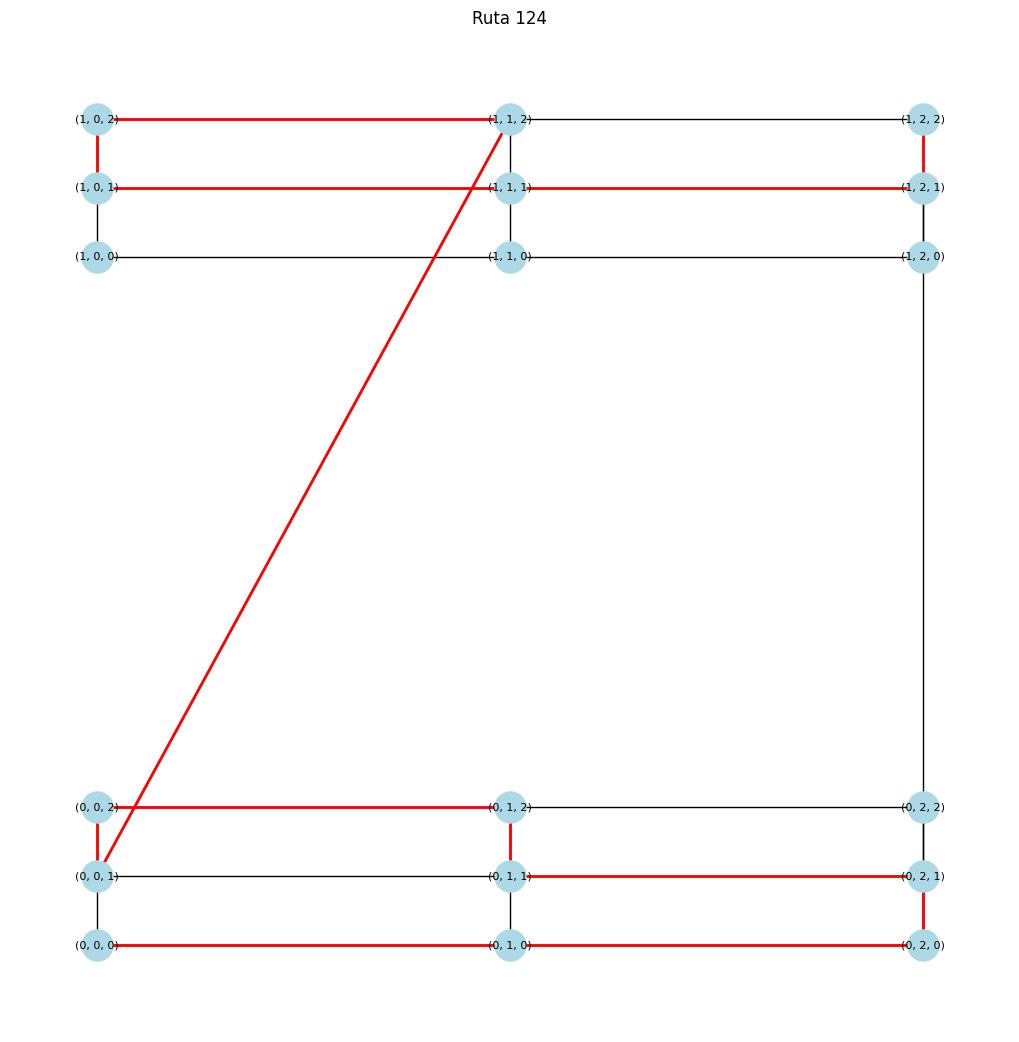

Ruta 125: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


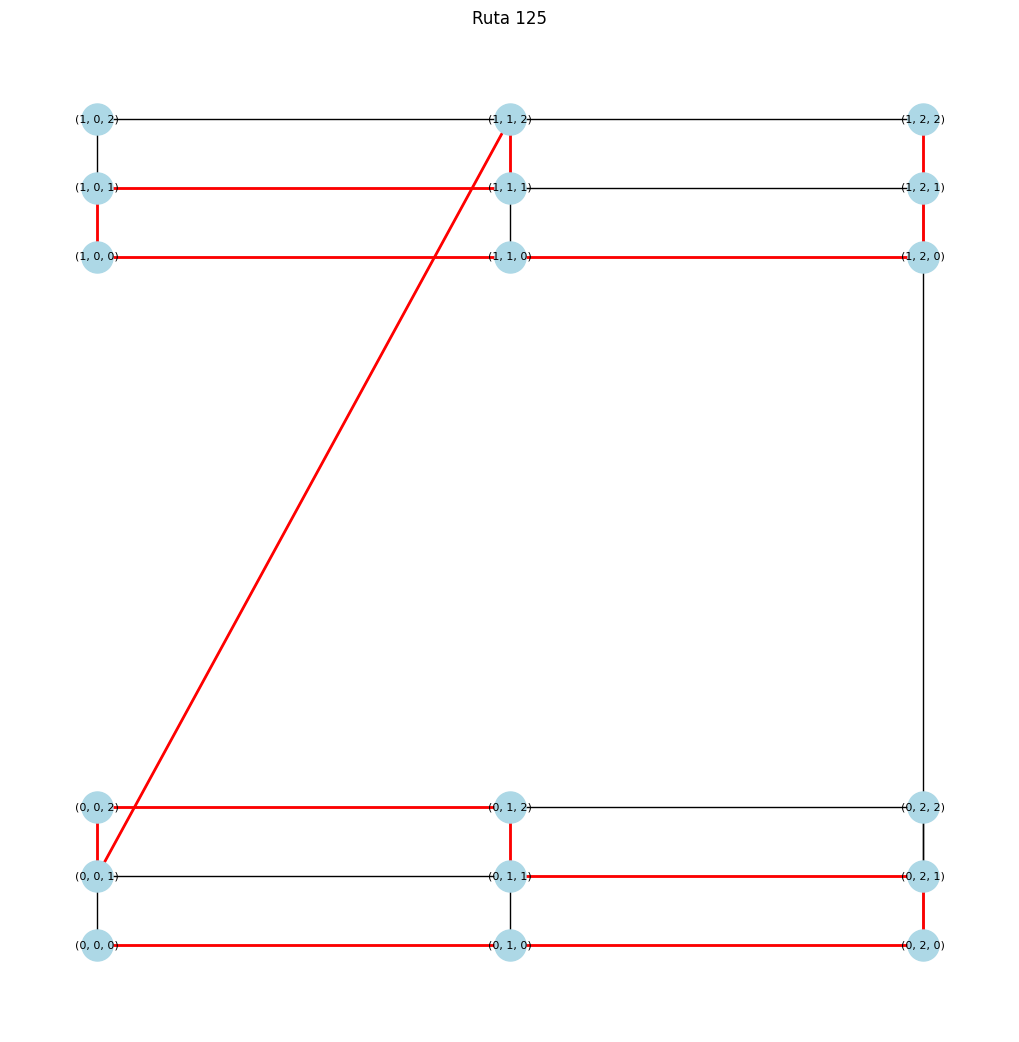

Ruta 126: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


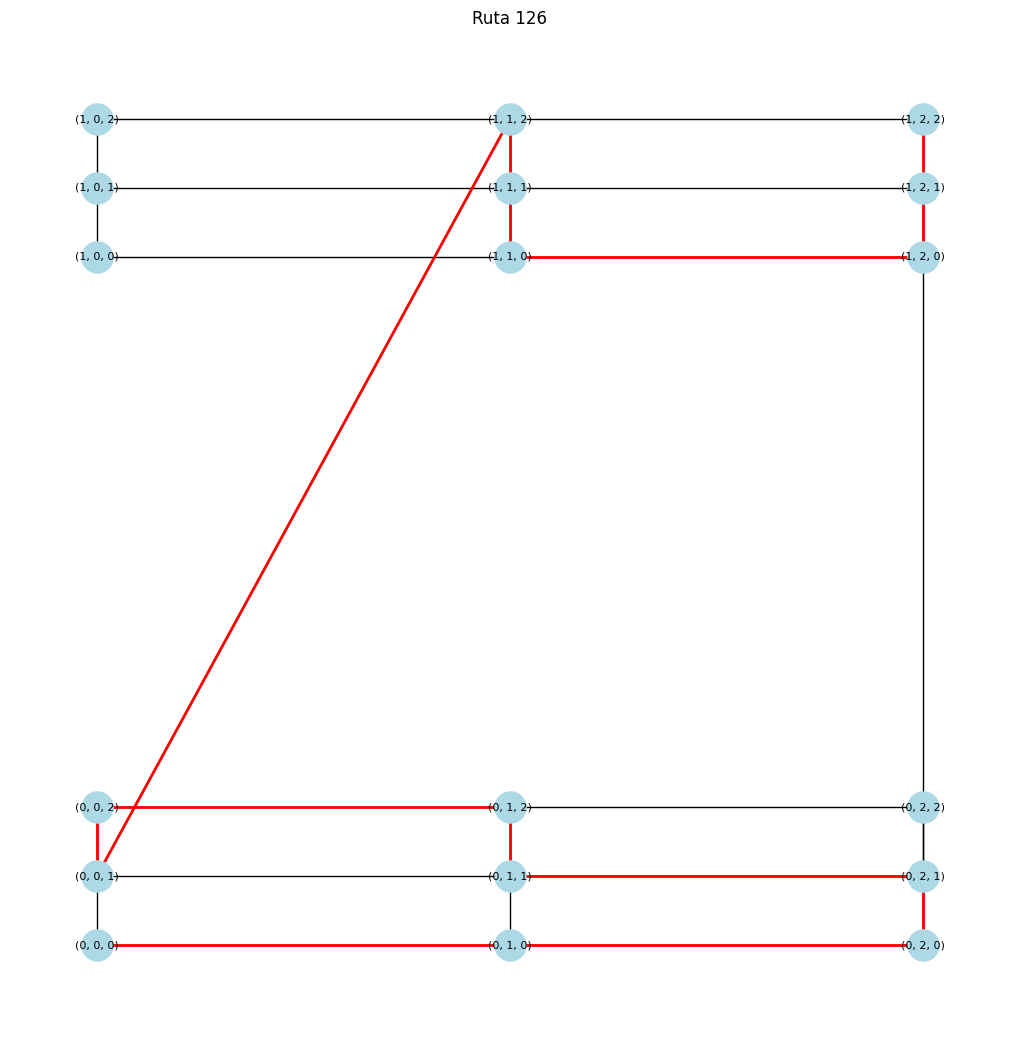

Ruta 127: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


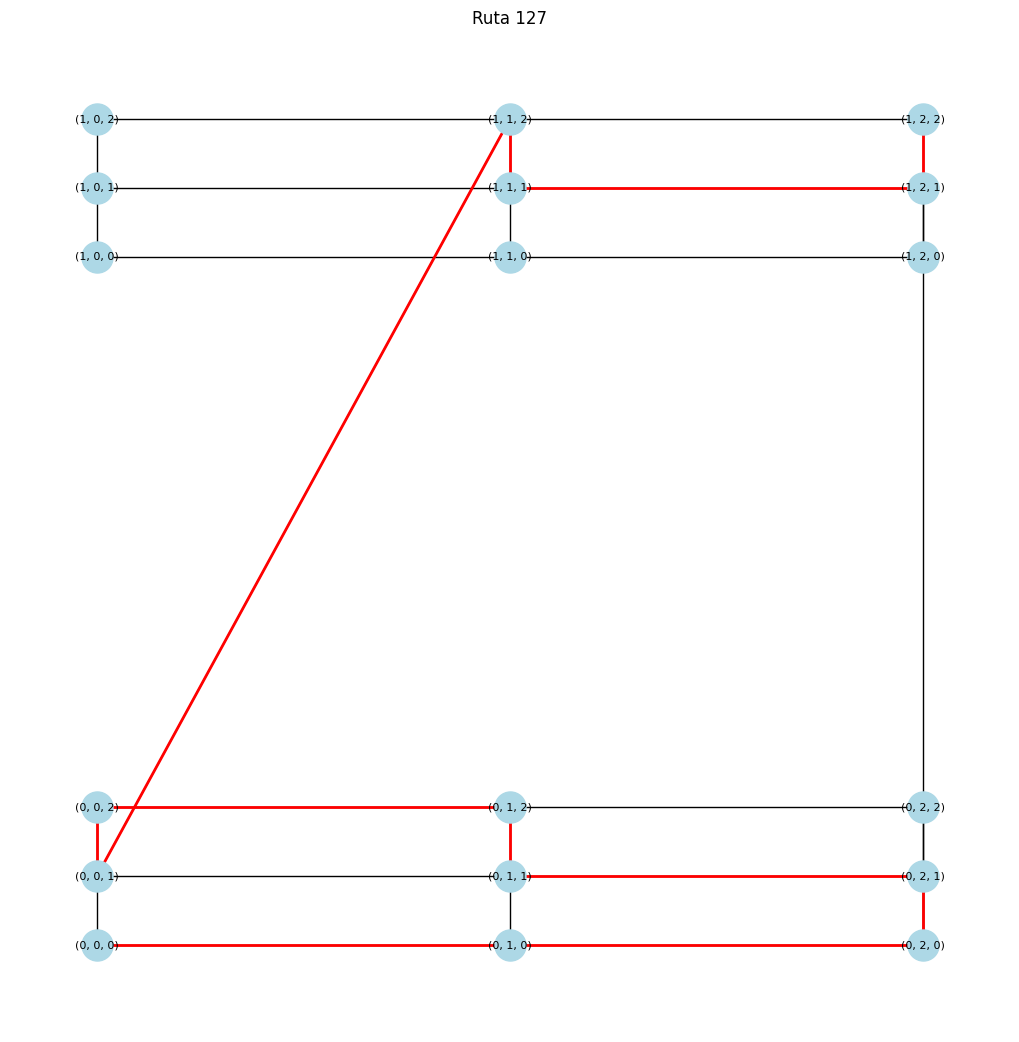

Ruta 128: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 1, 1), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 2, 2)]


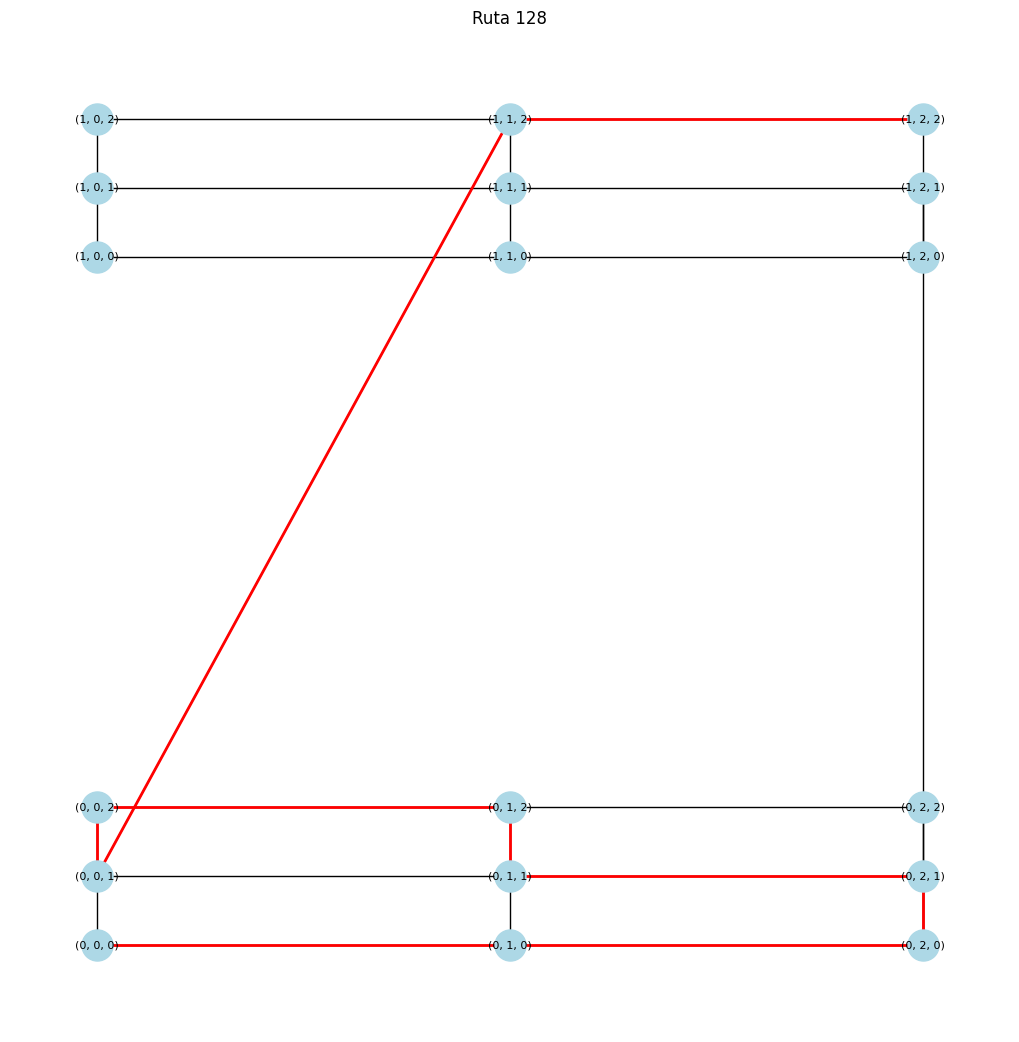

Ruta 129: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


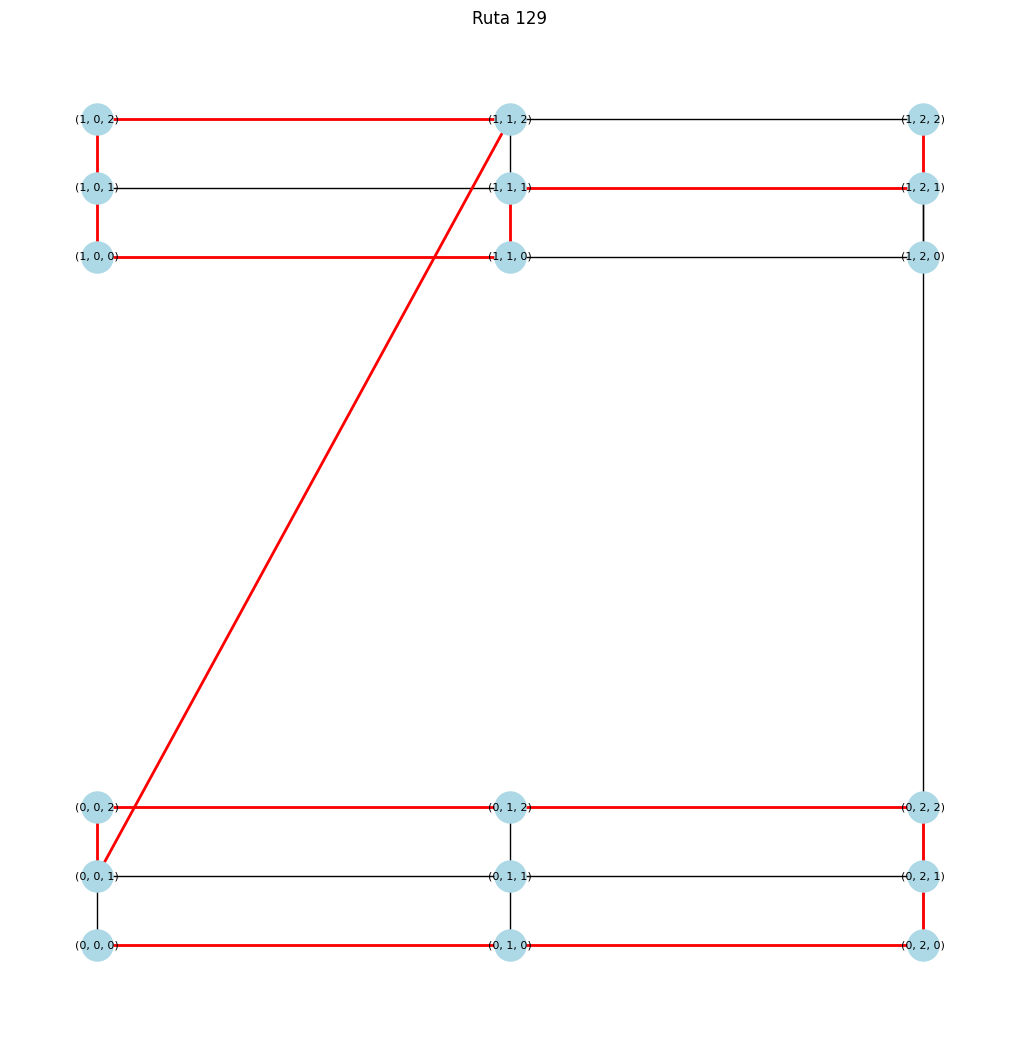

Ruta 130: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


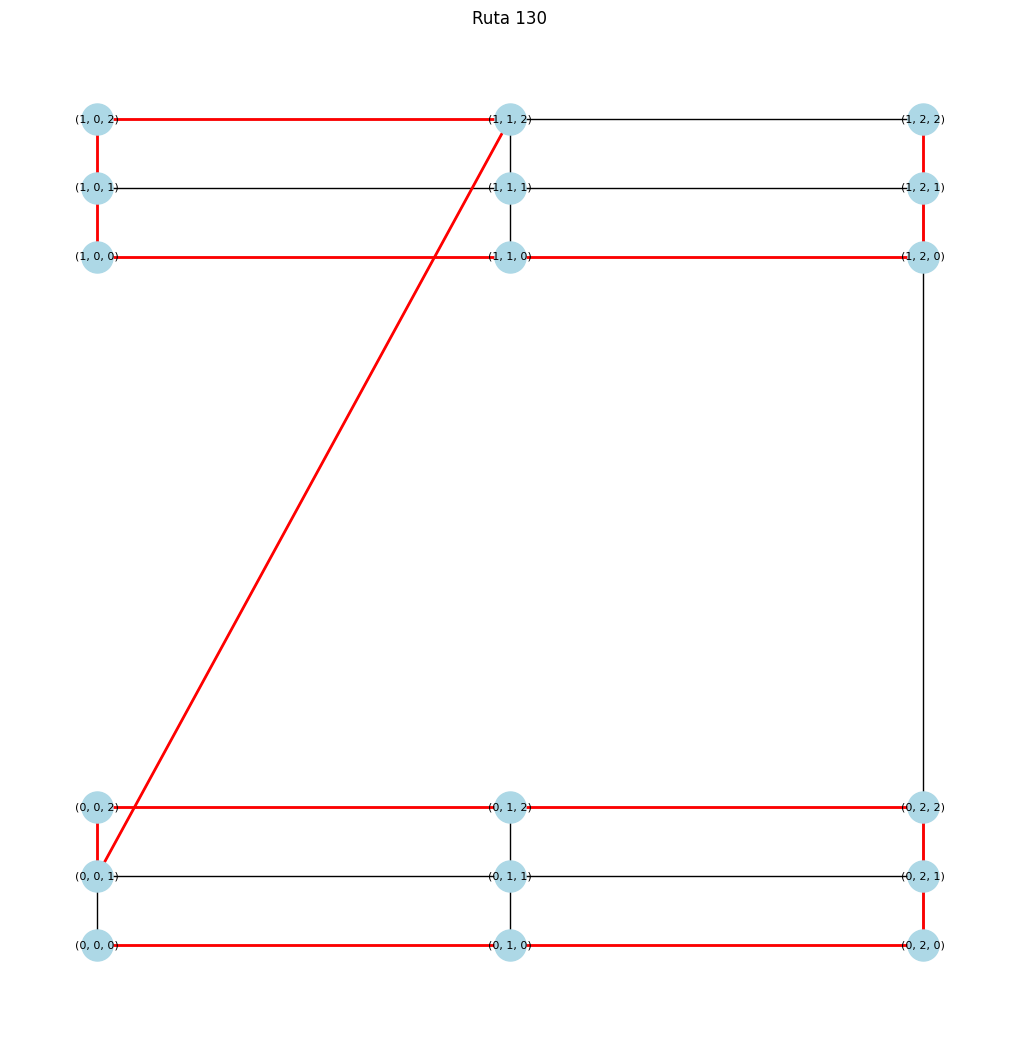

Ruta 131: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


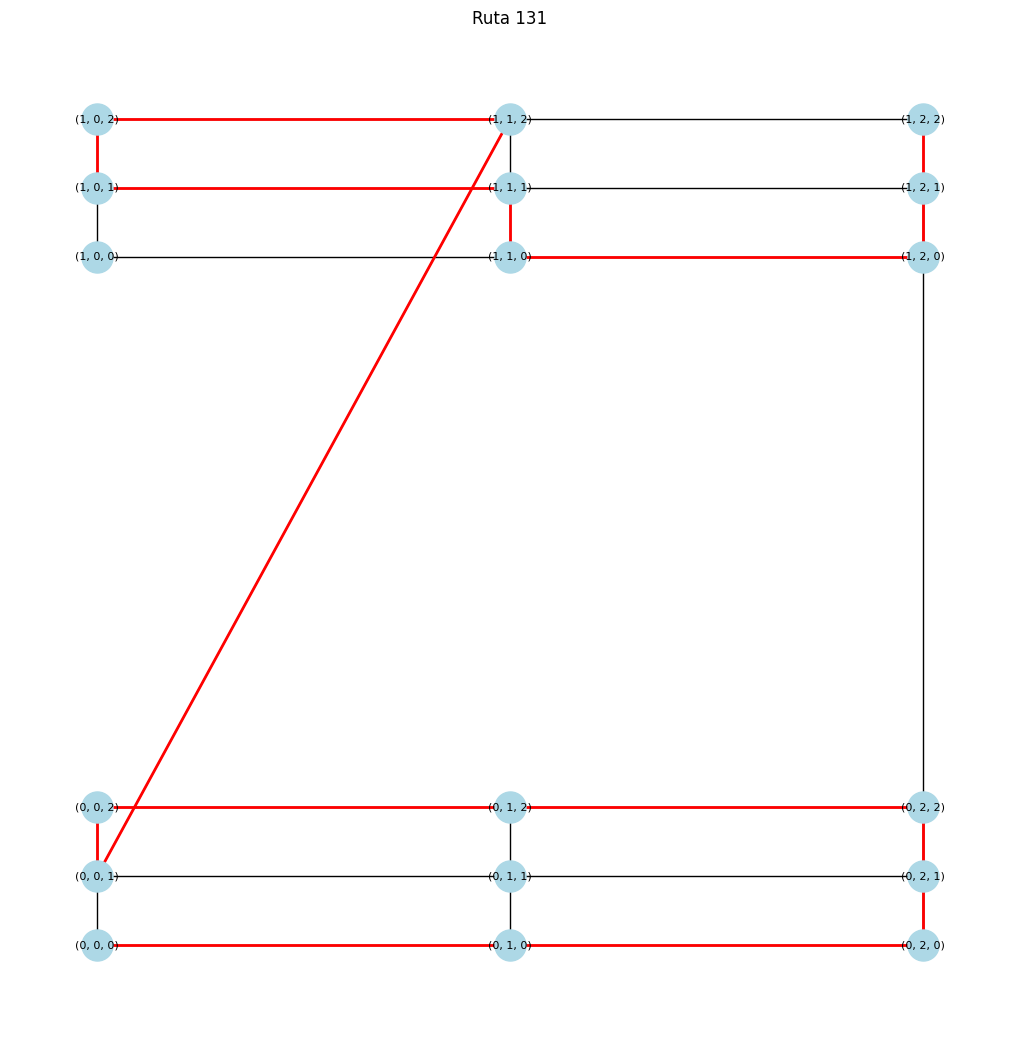

Ruta 132: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


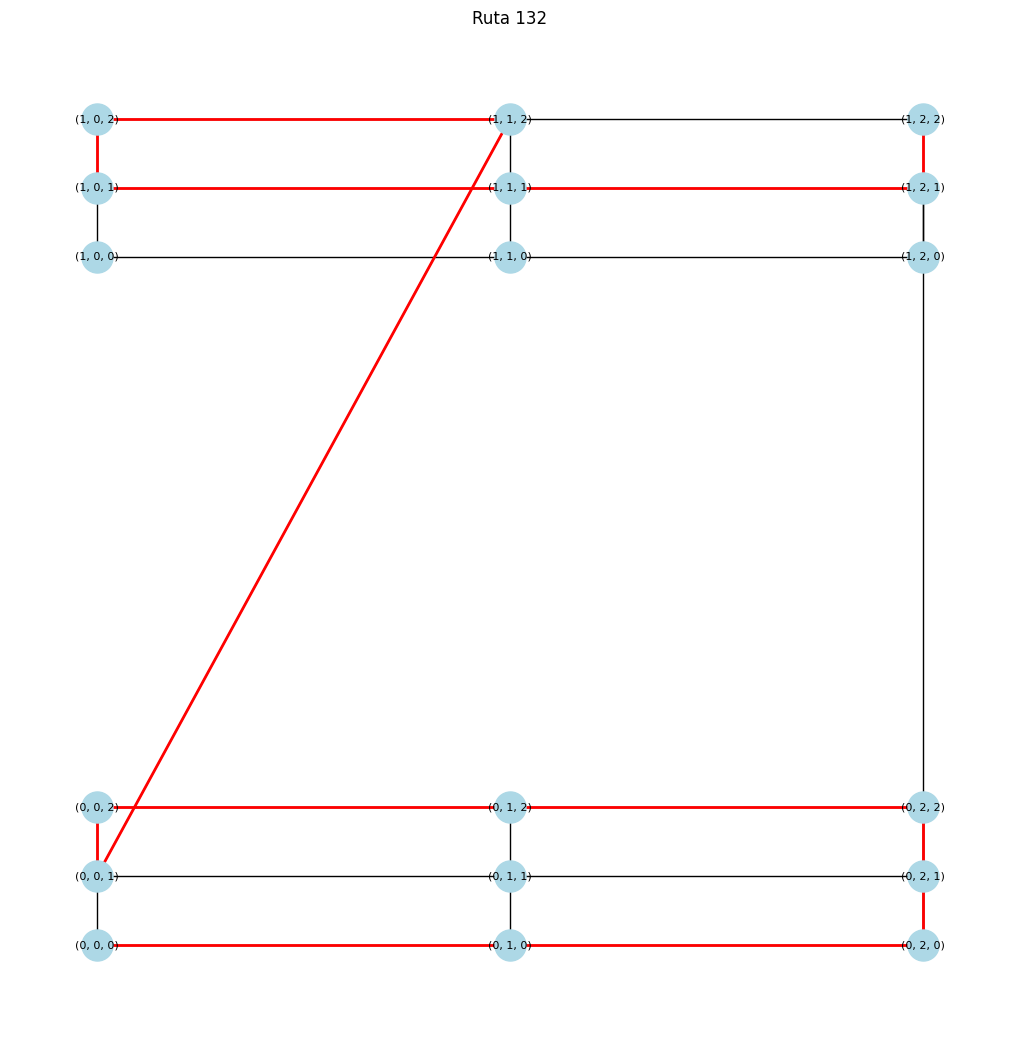

Ruta 133: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


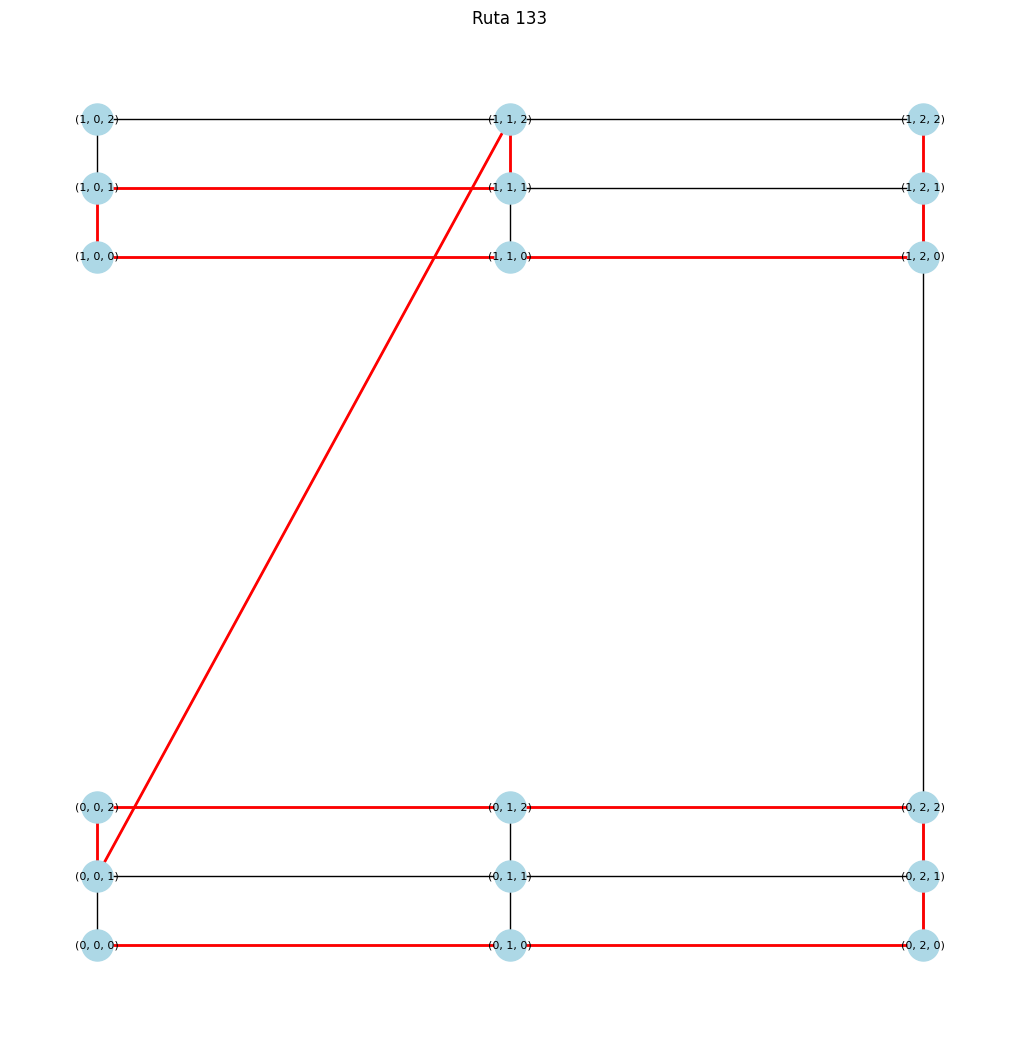

Ruta 134: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


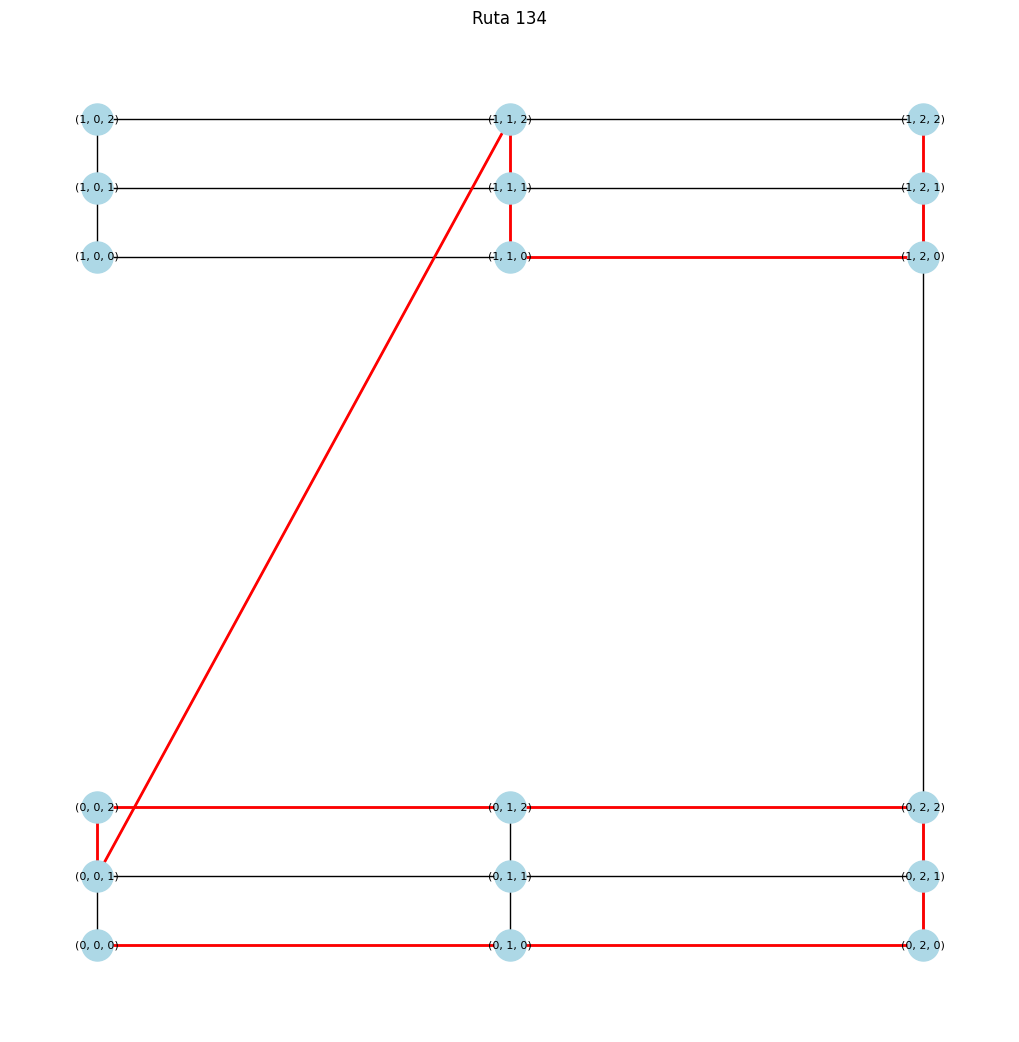

Ruta 135: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


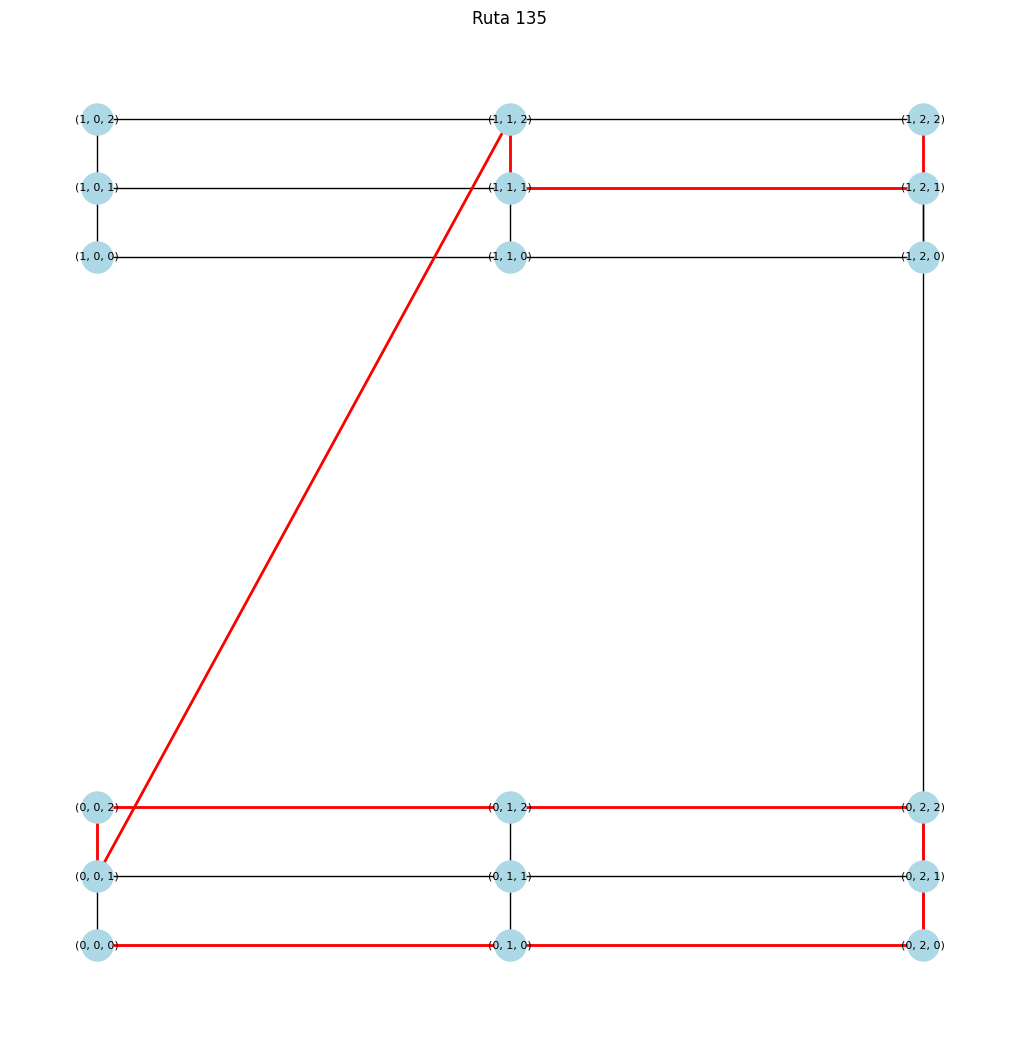

Ruta 136: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 0, 2), (0, 0, 1), (1, 1, 2), (1, 2, 2)]


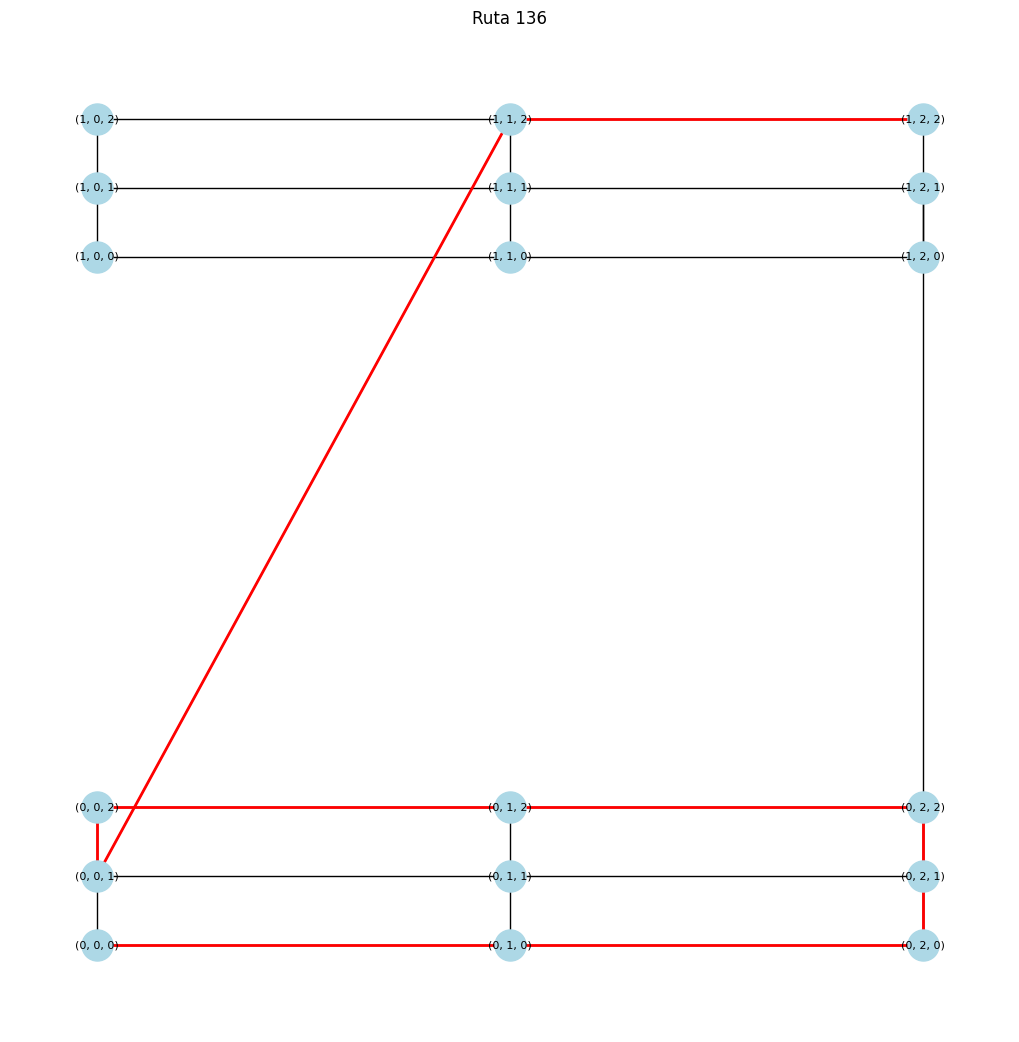

Ruta 137: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


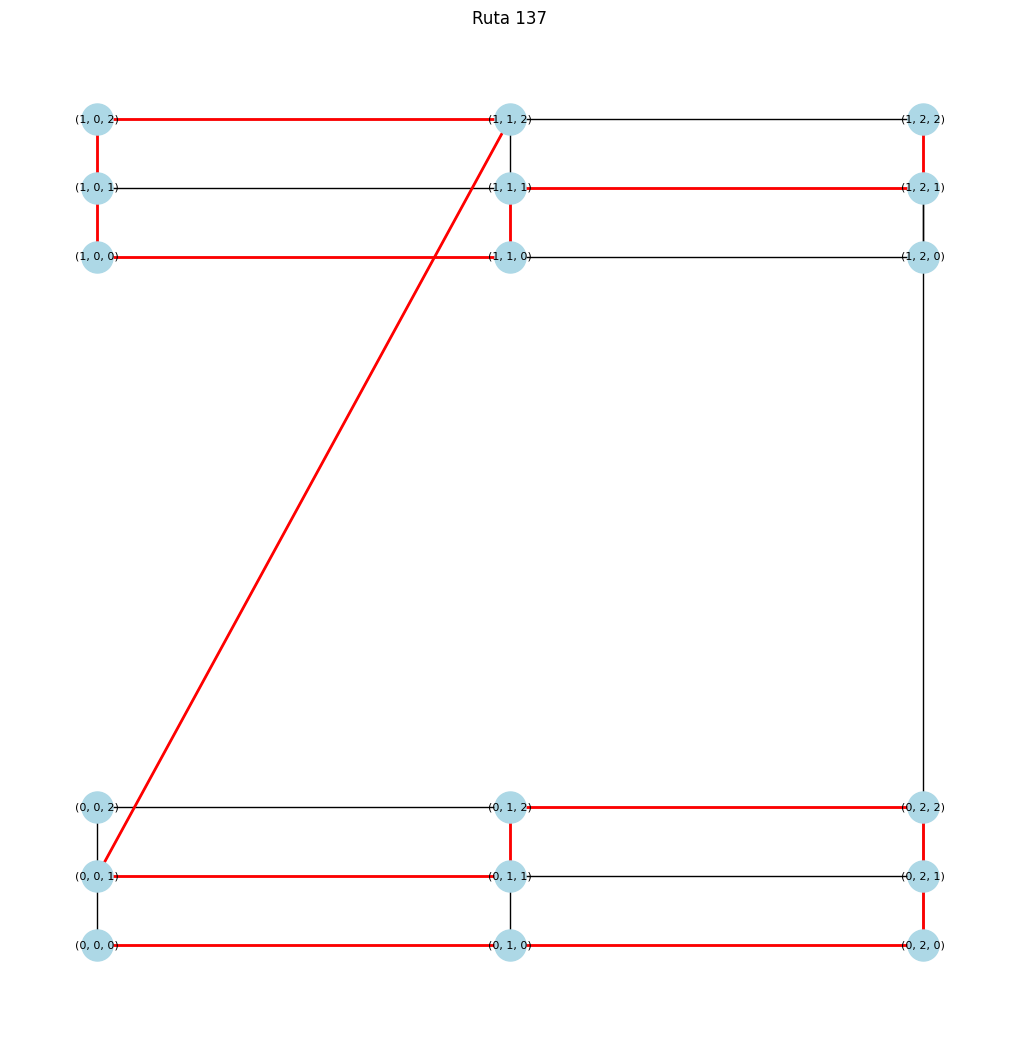

Ruta 138: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


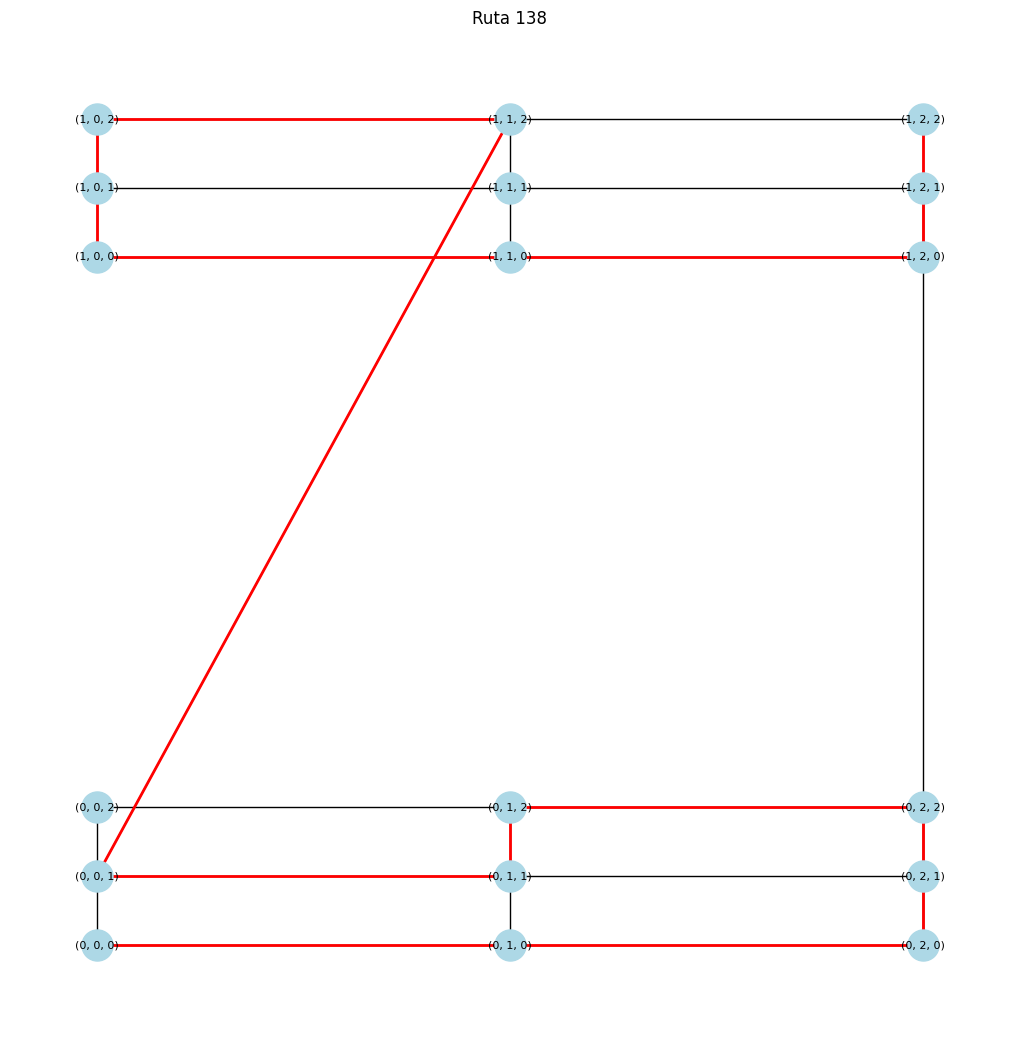

Ruta 139: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


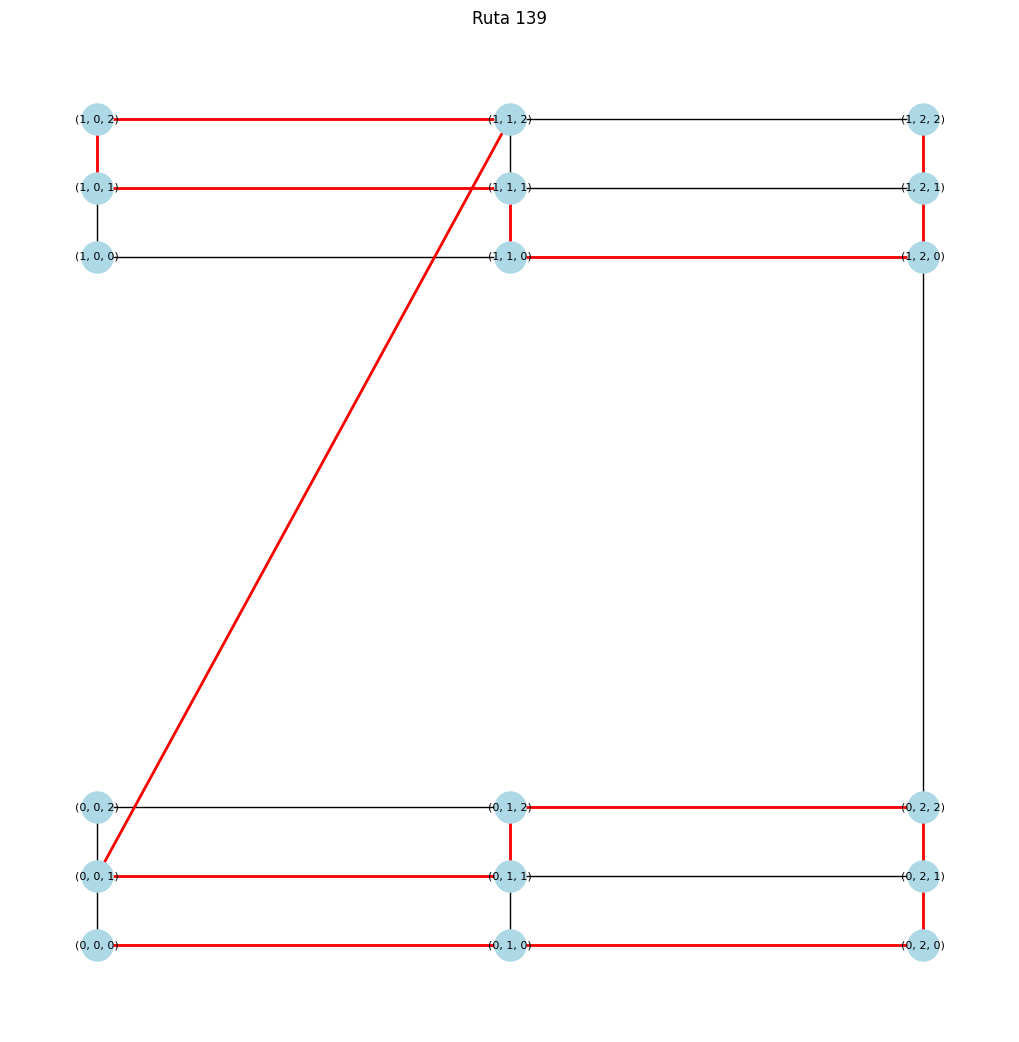

Ruta 140: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 0, 2), (1, 0, 1), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


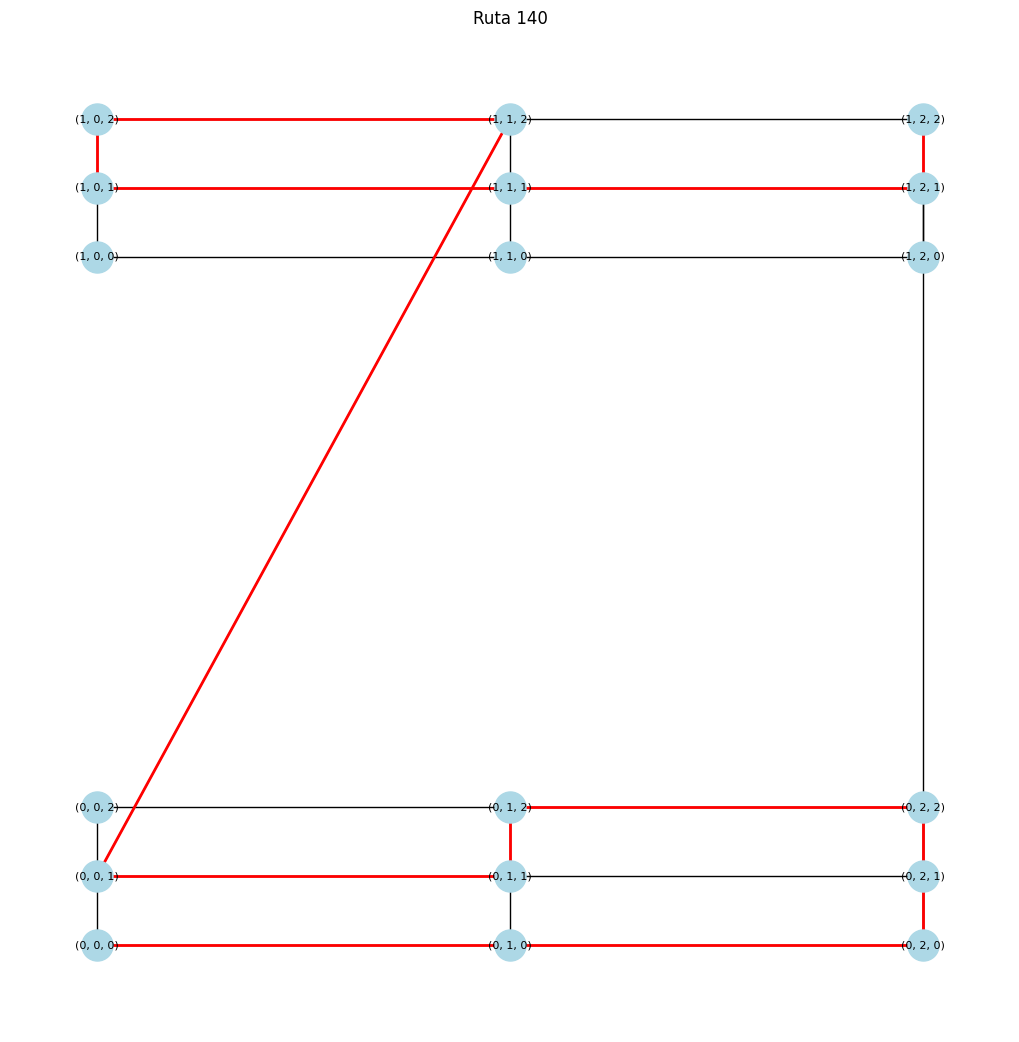

Ruta 141: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


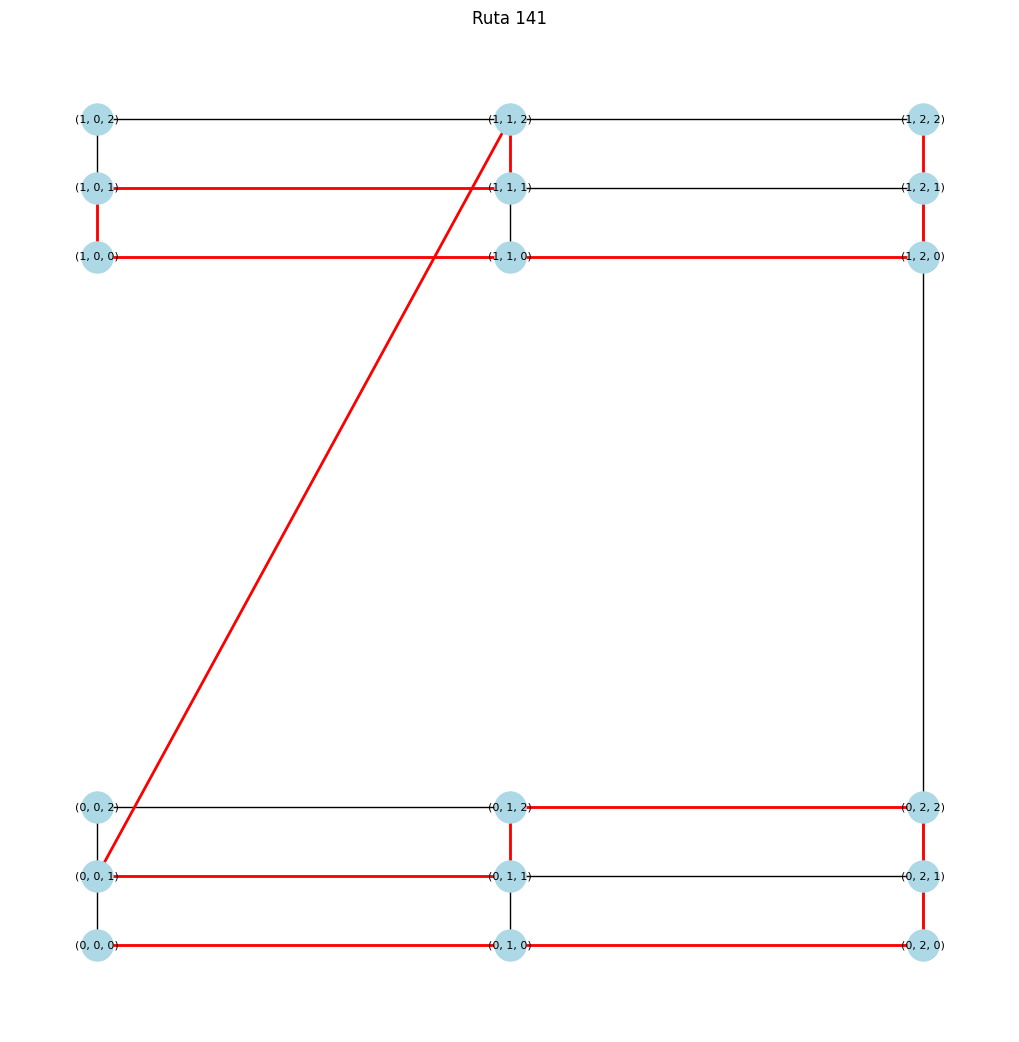

Ruta 142: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 1, 0), (1, 2, 0), (1, 2, 1), (1, 2, 2)]


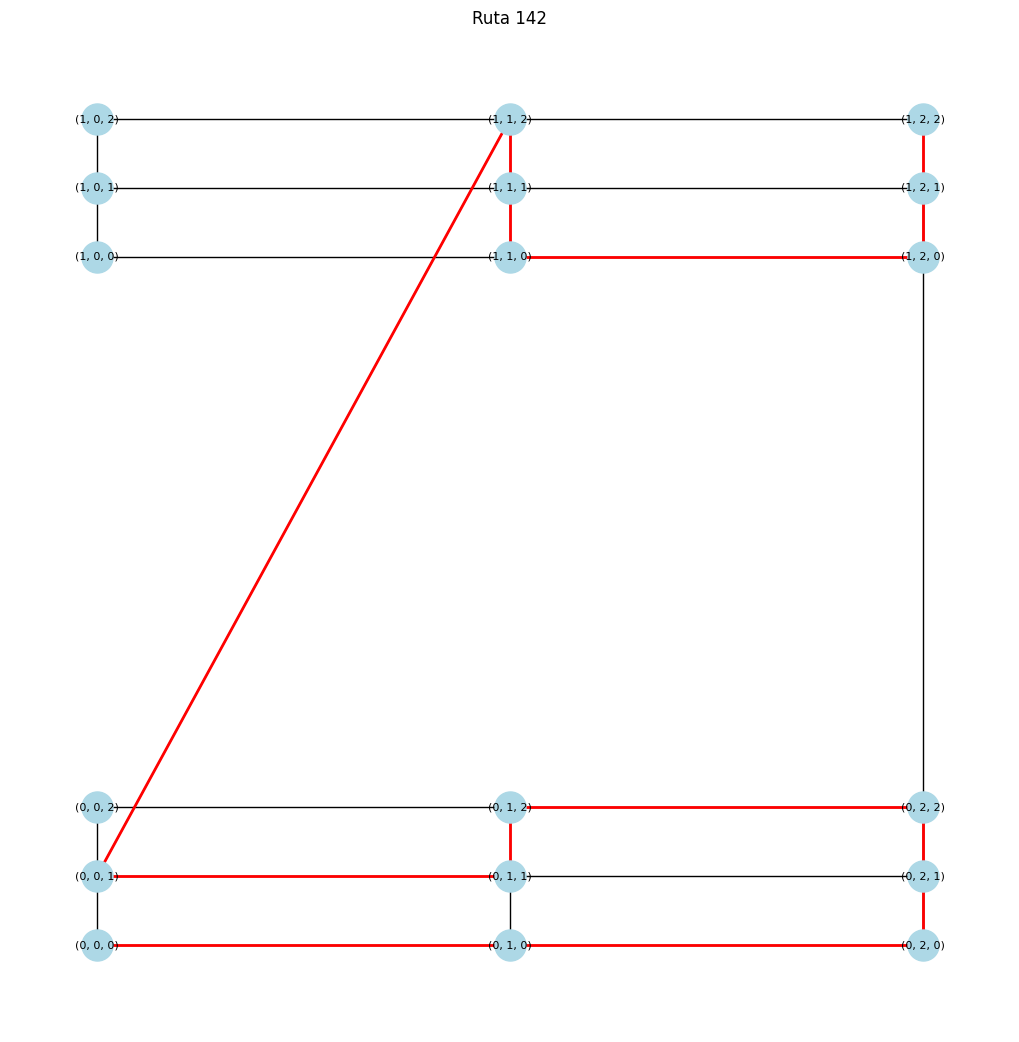

Ruta 143: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 1, 1), (1, 2, 1), (1, 2, 2)]


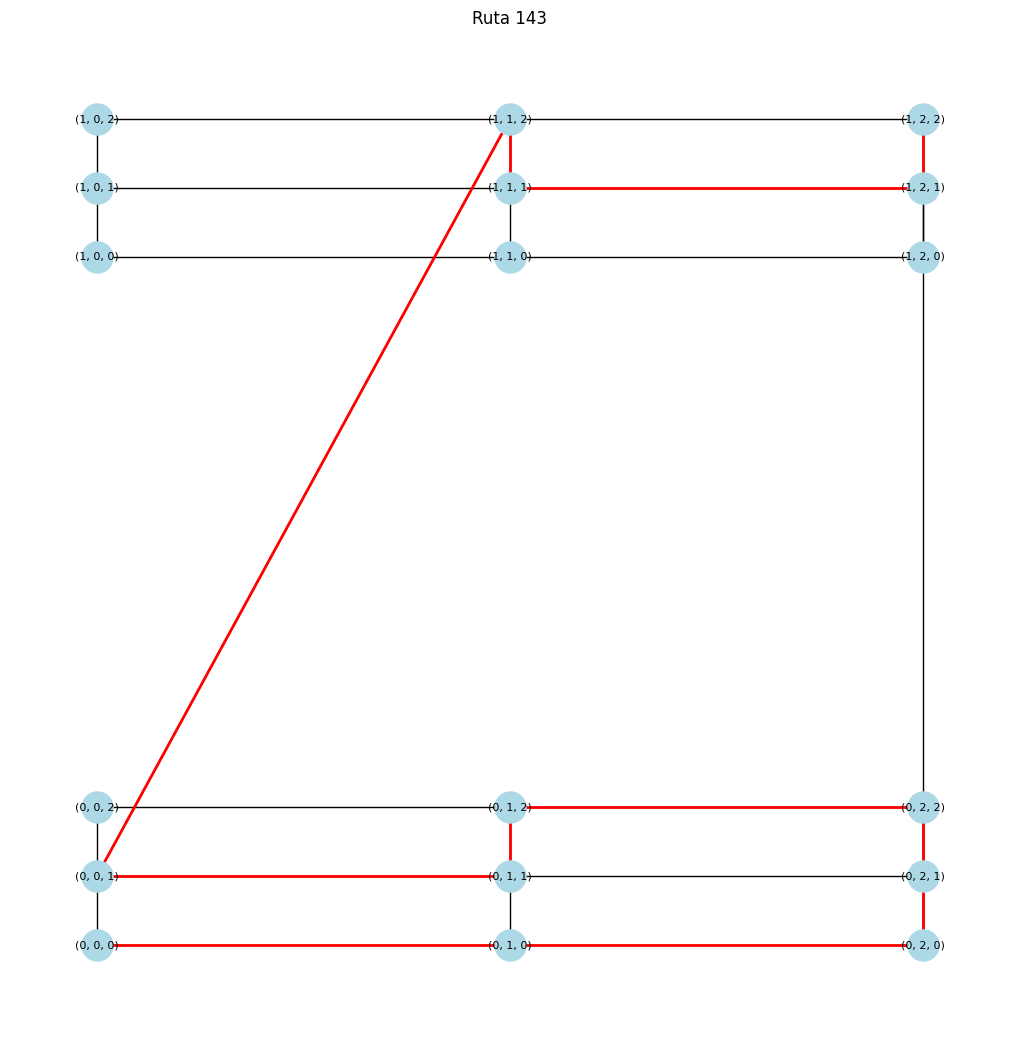

Ruta 144: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 1, 2), (0, 1, 1), (0, 0, 1), (1, 1, 2), (1, 2, 2)]


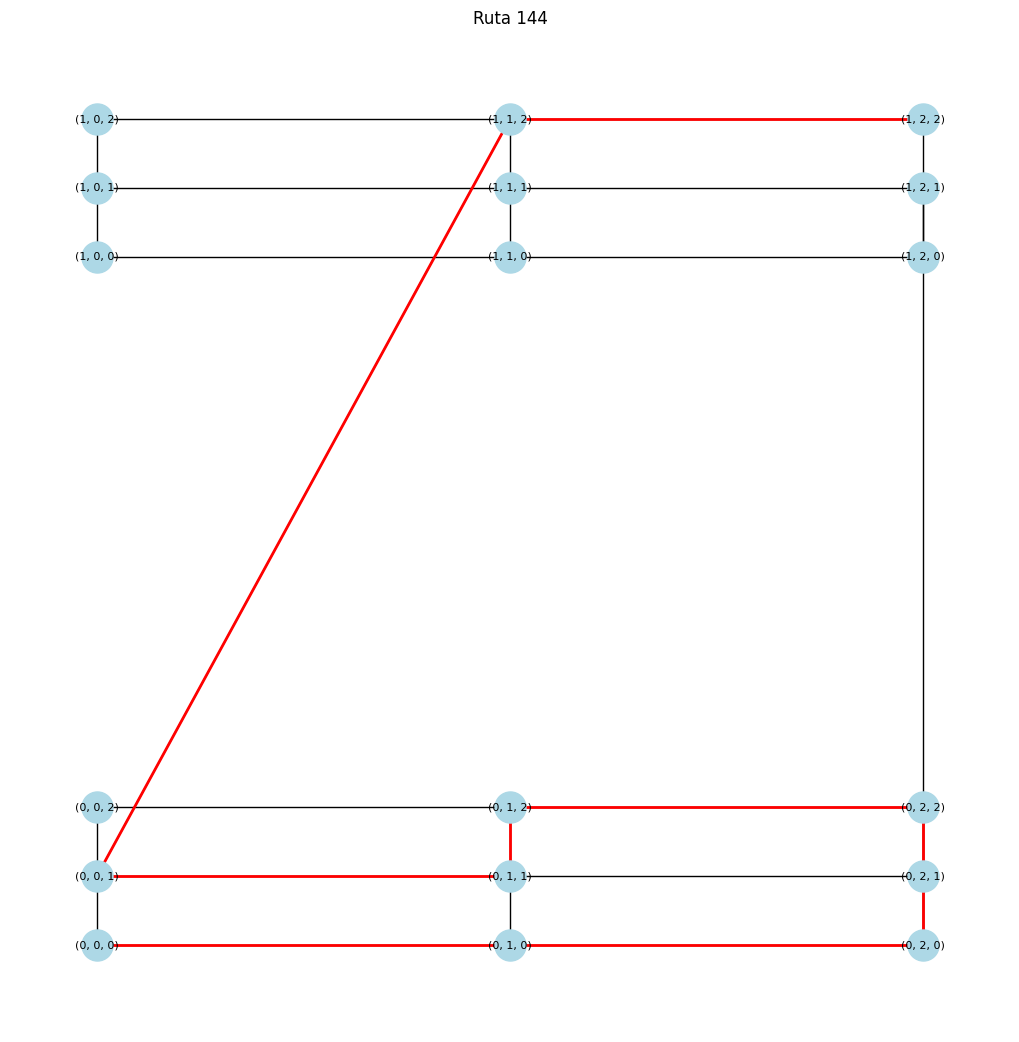

Ruta 145: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


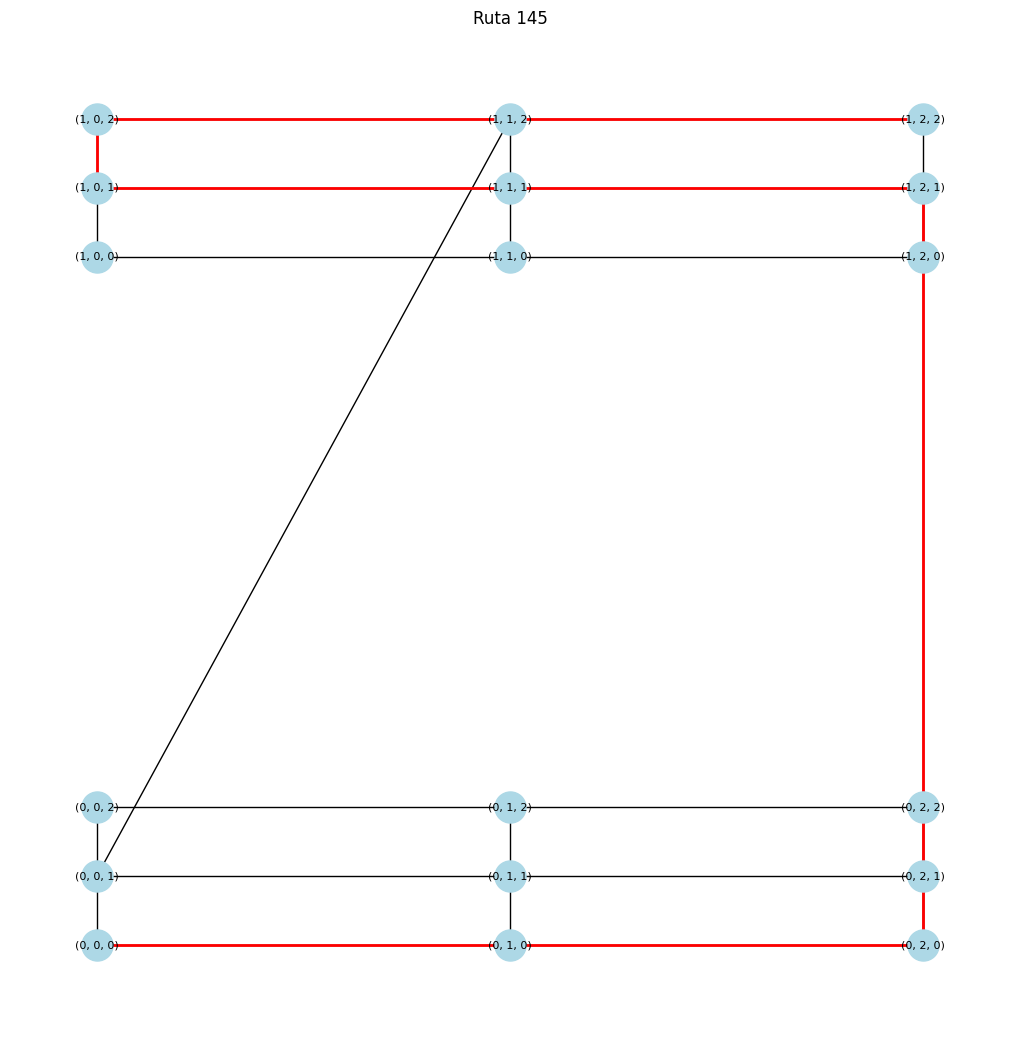

Ruta 146: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


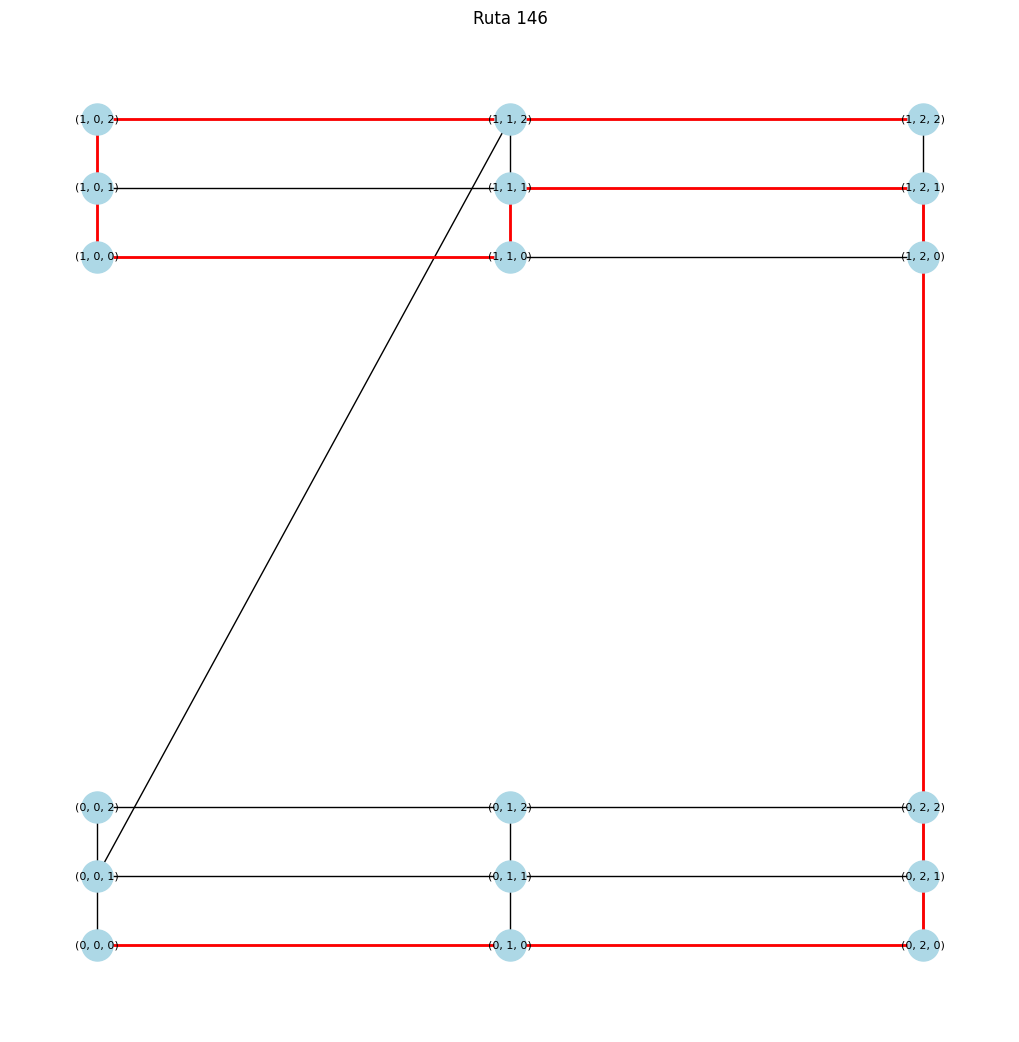

Ruta 147: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


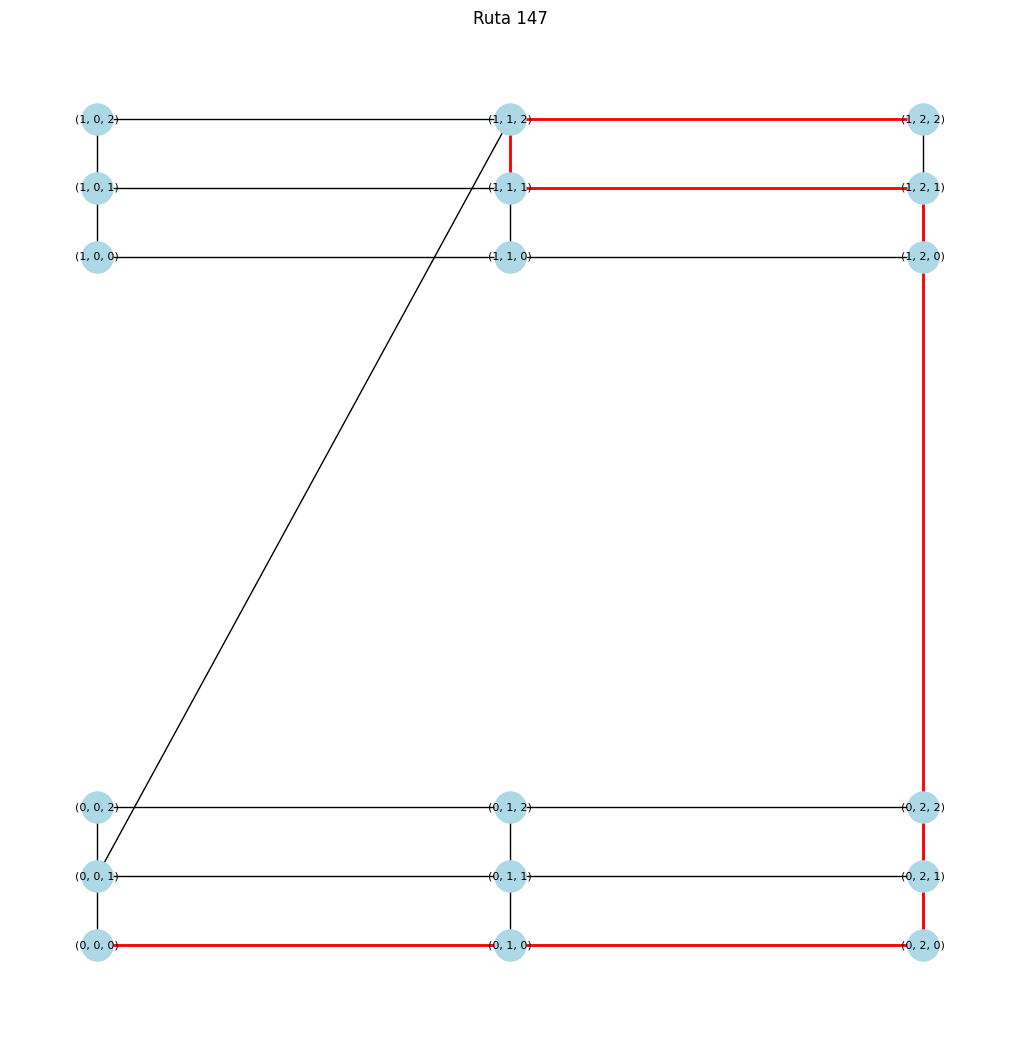

Ruta 148: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


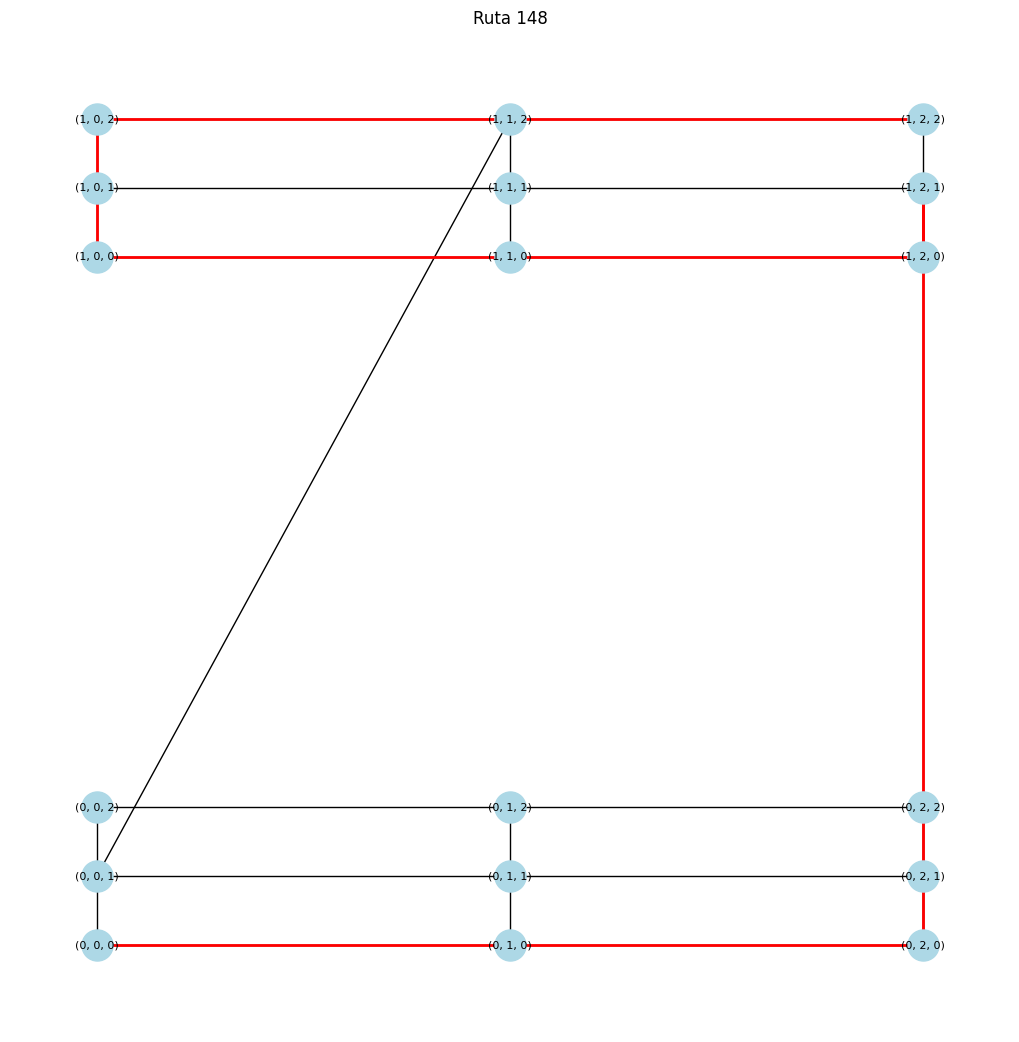

Ruta 149: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


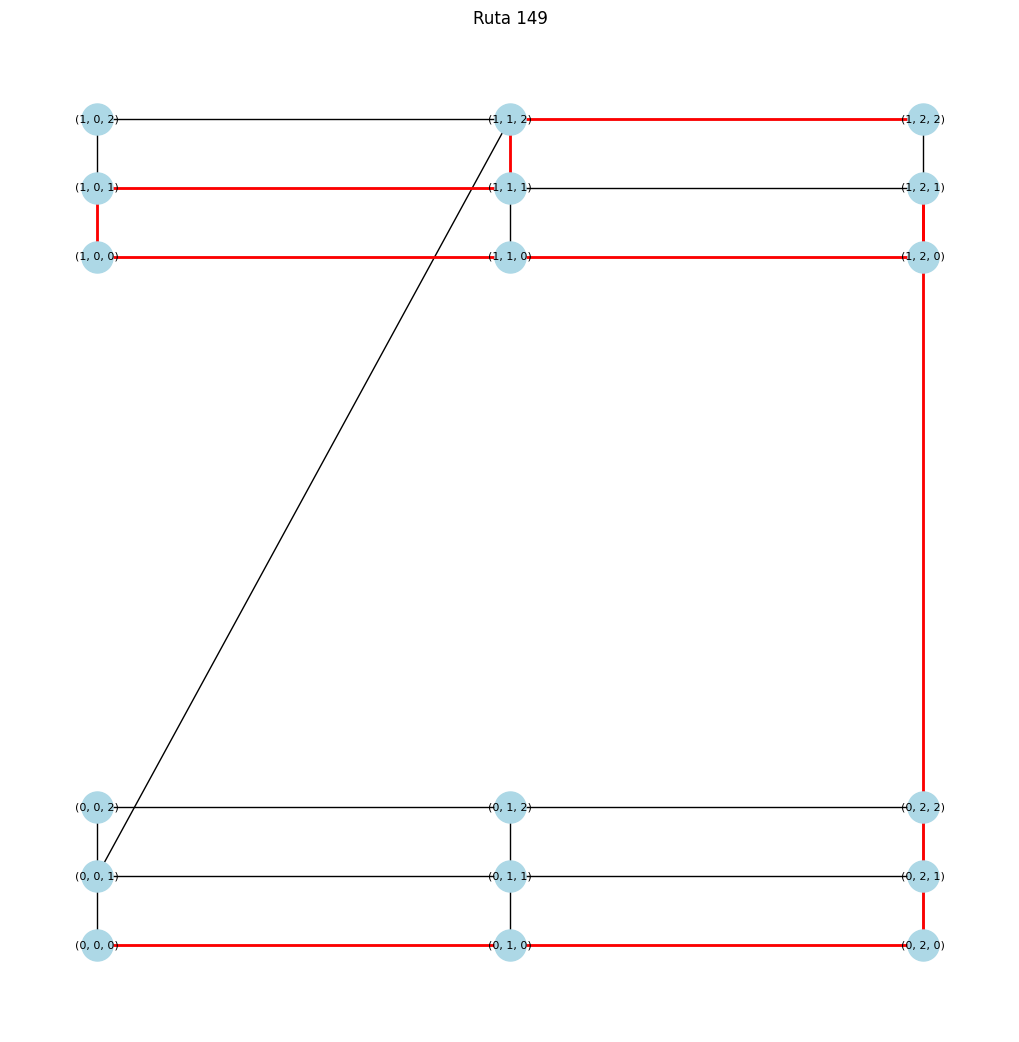

Ruta 150: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 0, 1), (1, 0, 2), (1, 1, 2), (1, 2, 2)]


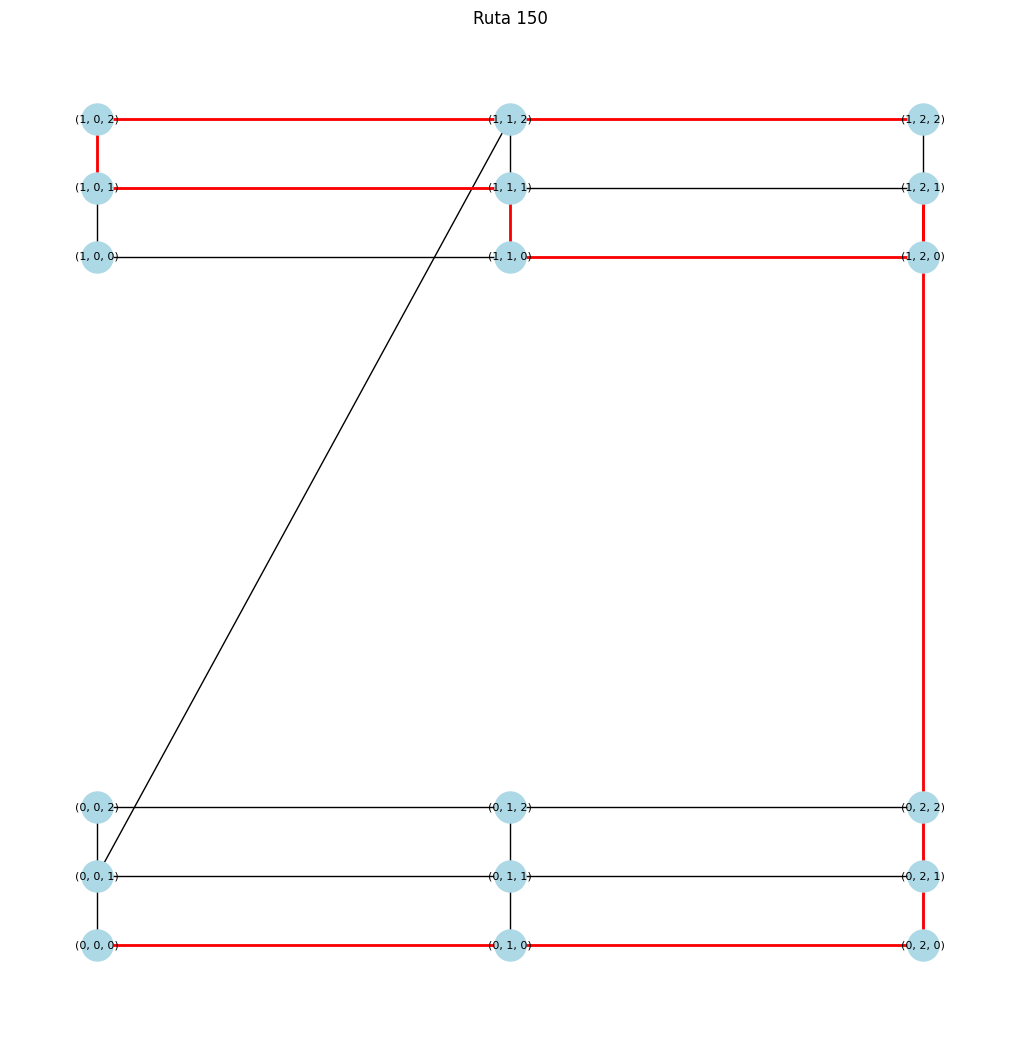

Ruta 151: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 0), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 2)]


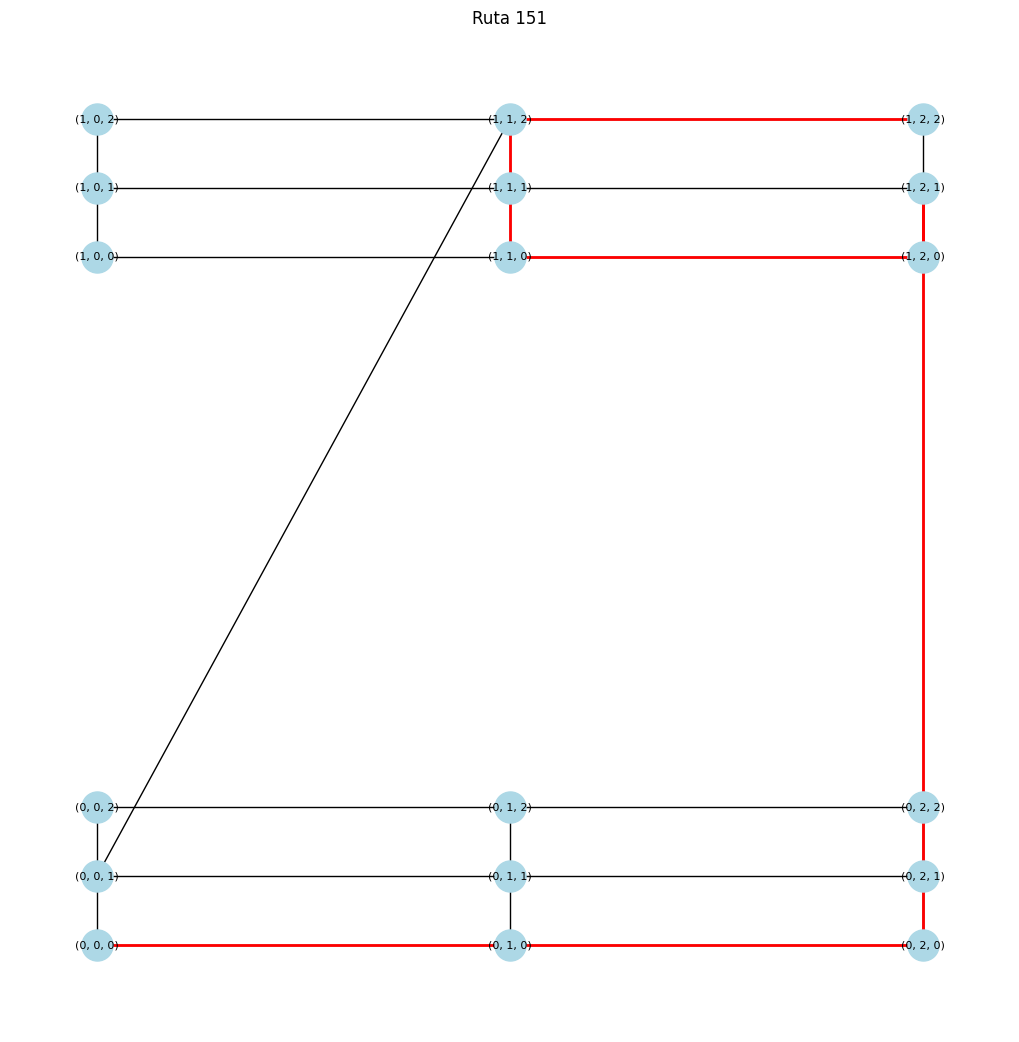

Ruta 152: [(0, 0, 0), (0, 1, 0), (0, 2, 0), (1, 2, 1), (1, 2, 2)]


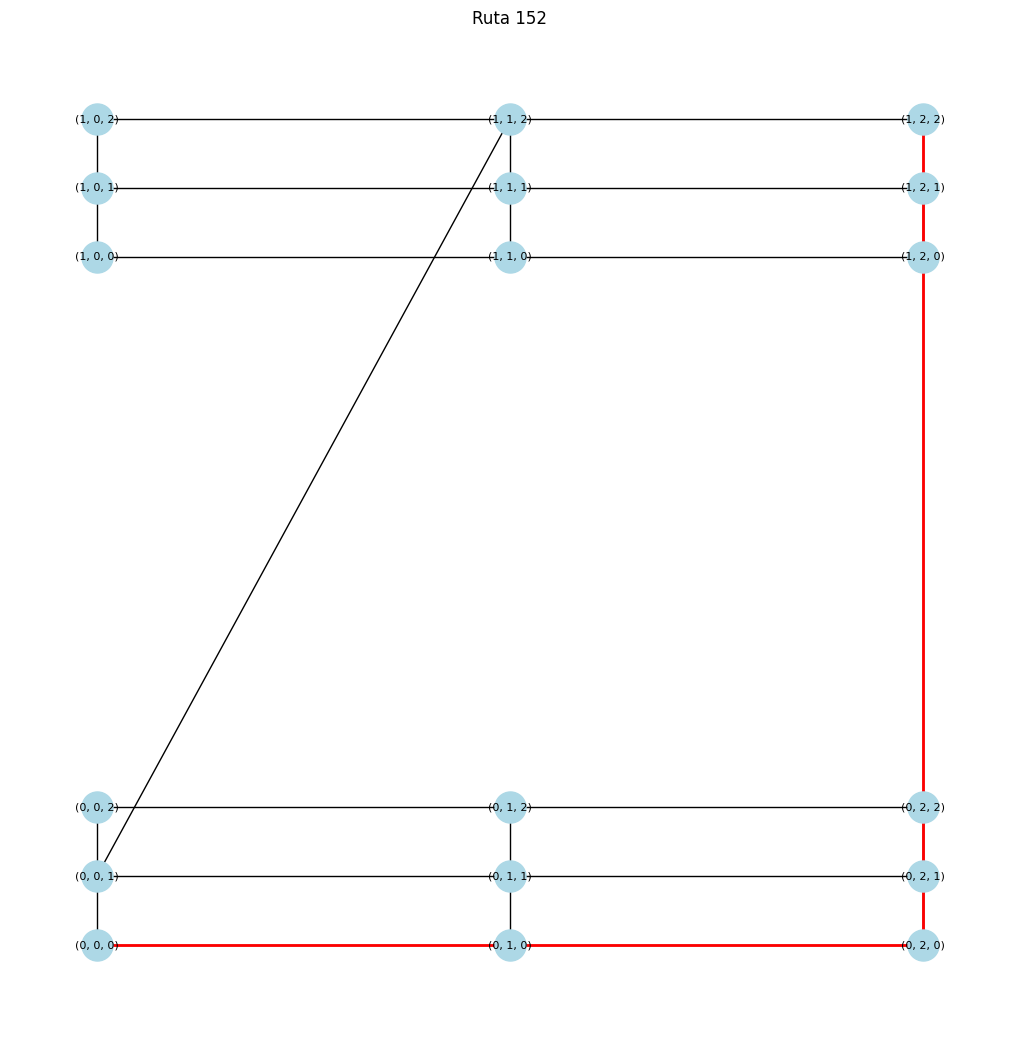

In [7]:
# Función principal
def main():
    # Cargar los datos desde archivo
    N, M, habitaciones, puentes, entrada, salida = cargar_laberinto('laberinto.txt')
    
    # Construir el grafo
    grafo = construir_grafo(N, M, puentes)
    
    # Visualizar el grafo original
    dibujar_grafo_original(grafo)

    # Encontrar todas las rutas usando backtracking
    rutas = encontrar_todas_las_rutas(grafo, entrada, salida)
    
    if rutas:
        print(f"Se encontraron {len(rutas)} rutas:")
        for i, ruta in enumerate(rutas, 1):
            print(f"Ruta {i}: {ruta}")
            dibujar_ruta_individual(grafo, ruta, i)  # Dibujar cada ruta individualmente
    else:
        print("No se encontró un camino.")

if __name__ == "__main__":
    main()
